# Predictiing heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

Will take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease

# 2. Data

The original data came from cleavland database from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is also a version of it available on Kaggle.
https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Preparing the tools

We're going to use pandas, matplotlib and NumPy for data analysis and manipulation. 

In [1]:
# Import all the tools we need 

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")
df.shape # rows, columns

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# The top 5 rows of the dataset
df.head() 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# The bottom 5 rows of the dataset
df.tail() 

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0

In [5]:
# Let's find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

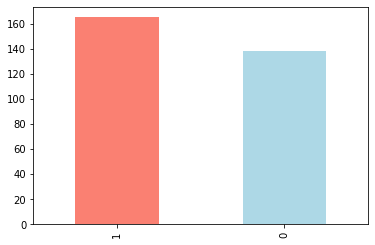

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

### Heart Disease Frequency according to Gender

For the target column, 1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [10]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex      0    1
target         
0       24  114
1       72   93

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

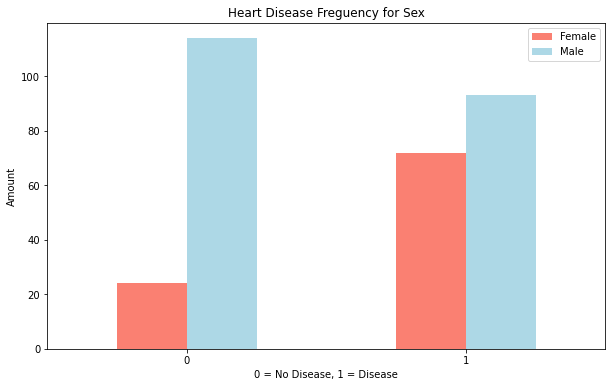

In [12]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Freguency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0) # Keeps the labels on the x-axis vertical

### Age vs. Max Heart Rate for Heart Disease

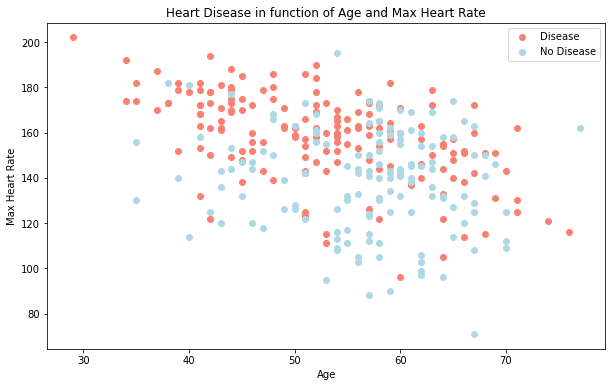

In [13]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

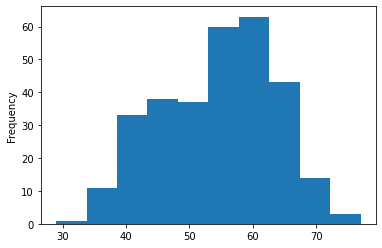

In [14]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart disease Frequency per Chest Pain type

In [15]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

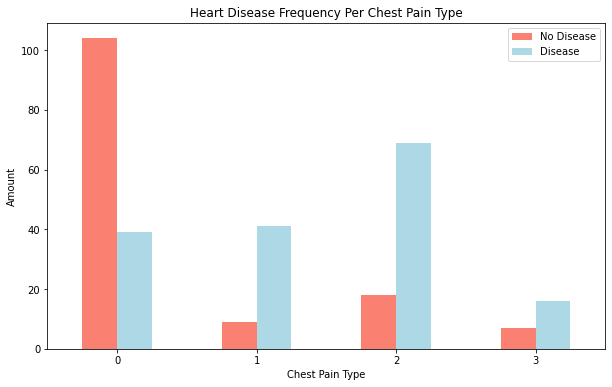

In [16]:
# Make the crosstab more visual 
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [17]:
# Make a correlation matrix
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

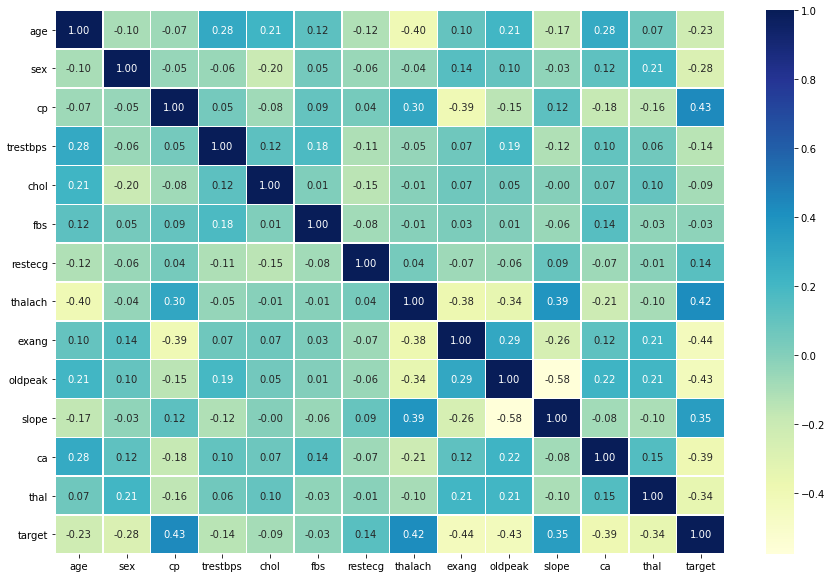

In [18]:
# Let's make out correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## 5. Modelling

In [19]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [20]:
# Split data into X and y 
X = df.drop("target", axis=1)

y = df["target"]

In [21]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [22]:
X_train

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
132   42    1   1       120   295    0        1      162      0      0.0   
202   58    1   0       150   270    0        0      111      1      0.8   
196   46    1   2       150   231    0        1      147      0      3.6   
75    55    0   1       135   250    0        0      161      0      1.4   
176   60    1   0       117   230    1        1      160      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
188   50    1   2       140   233    0        1      163      0      0.6   
71    51    1   2        94   227    0        1      154      1      0.0   
106   69    1   3       160   234    1        0      131      0      0.1   
270   46    1   0       120   249    0        0      144      0      0.8   
102   63    0   1       140   195    0        1      179      0      0.0   

     slope  ca  thal  
132      2   0     2  
202      2   0     3  
196      1   0     2  
75       1   0     2  
176      2   2     3  
..     ...  ..   ...  
188      1   1     3  
71       2   1     3  
106      1   1     2  
270      2   0     3  
102      2   2     2  

[242 rows x 13 columns]

In [23]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data split into training and test sets, it's time to build a machine learning model

We'll train it (find the patterns) on the training set.

We'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [24]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creat a function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : trianing data (no labels)
    X_test : testing data (no labels)
    y_train : training labels 
    y_test : test labels
    """
    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison
Can plot model scores by first converting them to a DataFrame.

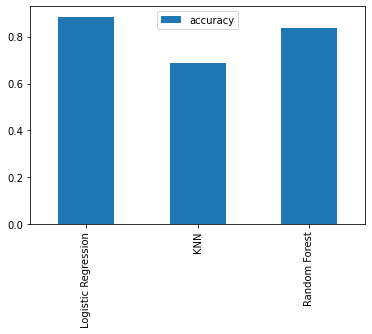

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should base our next steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning 
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning (by hand)

In [27]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Set KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list 
    test_scores.append(knn.score(X_test, y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


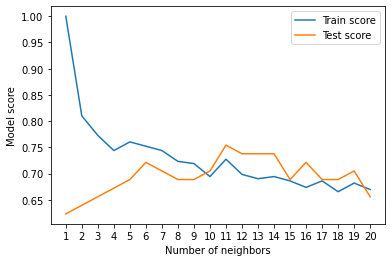

In [30]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hypreparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [31]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2), 
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, lets tune them using RandomizedSearchCV.

In [32]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), Let's do the same for RandomForestClassifier()...

In [35]:
# Setup random seed

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier()
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [38]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [39]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
# Check the best hyperparameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [41]:
# Evaluate the grid Search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

We get the same results as before with RandomizedSearchCV, this is because the hyperparameter grid we made has a maximum of 20 combinations.

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report 
* Precision 
* Recall
* F1-Score

... and it would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [42]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

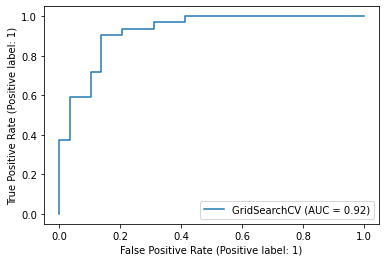

In [45]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)

In [46]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


Using Scikit-Learn's built in confusion matrix is a bit simple and uninformative for most people. To make it easier to understand and more communicative, we can use seaborn's `heatmap()`.

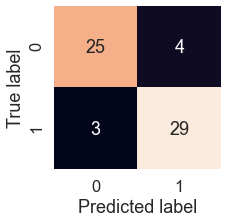

In [47]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds);

Now we have a ROC curve, AUC metric and a confusion matrix. Let's get a classification report as well as cross-validated precision, recall and f1-score.

In [48]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation an to do so we'll be using `cross_val_score()`.

In [49]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [50]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear' )

In [51]:
# cross-validated accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
# cross-validated precision

cv_prec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8207936507936507

In [53]:
# cross-validated recall

cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_rec = np.mean(cv_rec)
cv_rec

0.9212121212121213

In [54]:
# Cross_validated f1-score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

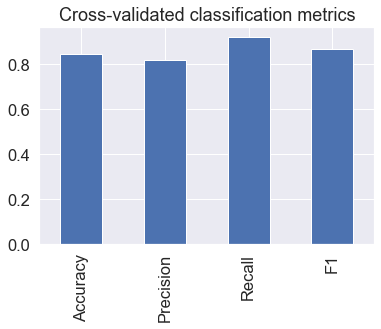

In [55]:
# Visualise cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_rec, 
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

### Feature Importance

Feature importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model...

In [56]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [57]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [58]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

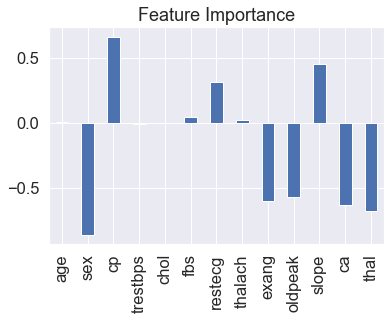

In [59]:
# Visualise feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [60]:
pd.crosstab(df["sex"], df["target"])

target    0   1
sex            
0        24  72
1       114  93

In [61]:
pd.crosstab(df["slope"], df["target"])

target   0    1
slope          
0       12    9
1       91   49
2       35  107

## 6. Experimentation

If you haven't hit your evaluation metric yet... ask yourself...

* Could you collect more data? Not really possible in this case.
* Could you try a better model? Like CatBoost or XGboost?
* Could you improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

All of the above was done following along to the "Complete Machine Learning & Data Science Bootcamp 2021" by Andrei Neagoie and Daniel Bourke. The following work and experimentation will be done independently by me, exploring the suggested next steps.

### More Combinations for Logistic Regression Hyperparameter Grid
When using GridSearchCV above, the score did not improve compared to RandomizedSearcgCV. This was due to there being only 20 possible combinations with the same hyperparameters for both. I will create a new Hyperparameter Grid with different hyperparameters and possibly more combinations to see whether the model can be improved.

In [62]:
# New hyperparameter grid with more hyperpararameters to test
new_log_reg_grid = {"C": np.logspace(-4, 4, 40),
                    "solver": ["liblinear", "newton-cg", "lbfgs"],
                    "penalty": ["l2"],
                    "max_iter": [100, 1000, 10000]}

# New grid hyperparameter search 
new_gs_log_reg = GridSearchCV(estimator = LogisticRegression(),
                              param_grid = new_log_reg_grid,
                              cv = 5, 
                              verbose = True)

# Fit new grid hyperparameter search model
new_gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

C:\Users\Munro\Documents\programming\MachineLearning\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.60371874e-04, 2.57191381e-04, 4.12462638e-04,
       6.61474064e-04, 1.06081836e-03, 1.70125428e-03, 2.72833338e-03,
       4.37547938e-03, 7.01703829e-03, 1.12533558e-02, 1.80472177e-02,
       2.89426612e-02, 4.64158883e-02, 7.44380301e-02, 1.19377664e-01,
       1.91448198e-01, 3.07029063e-01, 4.923882...
       1.26638017e+00, 2.03091762e+00, 3.25702066e+00, 5.22334507e+00,
       8.37677640e+00, 1.34339933e+01, 2.15443469e+01, 3.45510729e+01,
       5.54102033e+01, 8.88623816e+01, 1.42510267e+02, 2.28546386e+02,
       3.66524124e+02, 5.87801607e+02, 9.42668455e+02, 1.51177507e+03,
       2.42446202e+03, 3.88815518e+03, 6.23550734e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 10000], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs']},
             verbose=True)

There are many warnings about the lbfgs solver failing to converge. I noticed that increasing the number of iterations to 10000 solved this issue. I still included a number of values for "max_iter" so that there were more combinations to try as well as different solvers for the problem.

In [63]:
new_gs_log_reg.best_params_

{'C': 0.19144819761699575,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [64]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [65]:
new_gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [66]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [67]:
gs_log_reg.score(X_test, y_test) == new_gs_log_reg.score(X_test, y_test)

True

It can be seen from above that generally the performance of LogisticRegression model hasn't improved, even though we have explored more hyperparameter options. Therefore I will leave it as is and explore a few other models.

### Trying out CatBoost

In [75]:
from catboost import CatBoostClassifier

In [78]:
cat_model = CatBoostClassifier()

cat_model.fit(X_train, y_train)

cat_model.score(X_test, y_test)

Learning rate set to 0.005621
0:	learn: 0.6884219	total: 173ms	remaining: 2m 52s
1:	learn: 0.6846992	total: 174ms	remaining: 1m 26s
2:	learn: 0.6804482	total: 175ms	remaining: 58.2s
3:	learn: 0.6762280	total: 176ms	remaining: 43.8s
4:	learn: 0.6716854	total: 177ms	remaining: 35.2s
5:	learn: 0.6672902	total: 178ms	remaining: 29.4s
6:	learn: 0.6640072	total: 178ms	remaining: 25.3s
7:	learn: 0.6602127	total: 179ms	remaining: 22.2s
8:	learn: 0.6563948	total: 180ms	remaining: 19.8s
9:	learn: 0.6525316	total: 181ms	remaining: 17.9s
10:	learn: 0.6483925	total: 182ms	remaining: 16.3s
11:	learn: 0.6449119	total: 183ms	remaining: 15s
12:	learn: 0.6413090	total: 183ms	remaining: 13.9s
13:	learn: 0.6374641	total: 185ms	remaining: 13s
14:	learn: 0.6335822	total: 186ms	remaining: 12.2s
15:	learn: 0.6288496	total: 187ms	remaining: 11.5s
16:	learn: 0.6250951	total: 188ms	remaining: 10.9s
17:	learn: 0.6209988	total: 189ms	remaining: 10.3s
18:	learn: 0.6182407	total: 190ms	remaining: 9.78s
19:	learn: 0.

194:	learn: 0.3287585	total: 344ms	remaining: 1.42s
195:	learn: 0.3276402	total: 345ms	remaining: 1.41s
196:	learn: 0.3268327	total: 346ms	remaining: 1.41s
197:	learn: 0.3260096	total: 347ms	remaining: 1.4s
198:	learn: 0.3250287	total: 348ms	remaining: 1.4s
199:	learn: 0.3246849	total: 348ms	remaining: 1.39s
200:	learn: 0.3239244	total: 349ms	remaining: 1.39s
201:	learn: 0.3230601	total: 350ms	remaining: 1.38s
202:	learn: 0.3218867	total: 351ms	remaining: 1.38s
203:	learn: 0.3211467	total: 352ms	remaining: 1.37s
204:	learn: 0.3207712	total: 353ms	remaining: 1.37s
205:	learn: 0.3199743	total: 353ms	remaining: 1.36s
206:	learn: 0.3192023	total: 354ms	remaining: 1.36s
207:	learn: 0.3183557	total: 355ms	remaining: 1.35s
208:	learn: 0.3176068	total: 356ms	remaining: 1.35s
209:	learn: 0.3167791	total: 358ms	remaining: 1.34s
210:	learn: 0.3161975	total: 358ms	remaining: 1.34s
211:	learn: 0.3153618	total: 359ms	remaining: 1.33s
212:	learn: 0.3148271	total: 360ms	remaining: 1.33s
213:	learn: 0.

379:	learn: 0.2295009	total: 514ms	remaining: 839ms
380:	learn: 0.2289493	total: 515ms	remaining: 837ms
381:	learn: 0.2285010	total: 516ms	remaining: 836ms
382:	learn: 0.2283052	total: 517ms	remaining: 834ms
383:	learn: 0.2280532	total: 518ms	remaining: 832ms
384:	learn: 0.2278749	total: 519ms	remaining: 830ms
385:	learn: 0.2276692	total: 520ms	remaining: 827ms
386:	learn: 0.2273141	total: 521ms	remaining: 826ms
387:	learn: 0.2269729	total: 522ms	remaining: 823ms
388:	learn: 0.2265096	total: 523ms	remaining: 822ms
389:	learn: 0.2261179	total: 524ms	remaining: 820ms
390:	learn: 0.2257620	total: 525ms	remaining: 818ms
391:	learn: 0.2254125	total: 526ms	remaining: 816ms
392:	learn: 0.2250504	total: 527ms	remaining: 815ms
393:	learn: 0.2248149	total: 528ms	remaining: 813ms
394:	learn: 0.2245912	total: 529ms	remaining: 810ms
395:	learn: 0.2242488	total: 530ms	remaining: 808ms
396:	learn: 0.2240126	total: 531ms	remaining: 806ms
397:	learn: 0.2237290	total: 532ms	remaining: 805ms
398:	learn: 

571:	learn: 0.1754338	total: 685ms	remaining: 512ms
572:	learn: 0.1751642	total: 686ms	remaining: 511ms
573:	learn: 0.1749640	total: 687ms	remaining: 510ms
574:	learn: 0.1747783	total: 688ms	remaining: 508ms
575:	learn: 0.1745443	total: 688ms	remaining: 507ms
576:	learn: 0.1742287	total: 689ms	remaining: 505ms
577:	learn: 0.1738587	total: 690ms	remaining: 504ms
578:	learn: 0.1736812	total: 691ms	remaining: 503ms
579:	learn: 0.1734588	total: 692ms	remaining: 501ms
580:	learn: 0.1730505	total: 694ms	remaining: 500ms
581:	learn: 0.1727831	total: 694ms	remaining: 499ms
582:	learn: 0.1725381	total: 696ms	remaining: 497ms
583:	learn: 0.1723696	total: 697ms	remaining: 496ms
584:	learn: 0.1722166	total: 698ms	remaining: 495ms
585:	learn: 0.1720354	total: 699ms	remaining: 494ms
586:	learn: 0.1717117	total: 700ms	remaining: 493ms
587:	learn: 0.1715517	total: 701ms	remaining: 491ms
588:	learn: 0.1714111	total: 702ms	remaining: 490ms
589:	learn: 0.1711205	total: 703ms	remaining: 489ms
590:	learn: 

751:	learn: 0.1402011	total: 855ms	remaining: 282ms
752:	learn: 0.1399259	total: 856ms	remaining: 281ms
753:	learn: 0.1397720	total: 857ms	remaining: 280ms
754:	learn: 0.1395978	total: 858ms	remaining: 279ms
755:	learn: 0.1393155	total: 860ms	remaining: 277ms
756:	learn: 0.1392645	total: 861ms	remaining: 276ms
757:	learn: 0.1391511	total: 862ms	remaining: 275ms
758:	learn: 0.1390691	total: 863ms	remaining: 274ms
759:	learn: 0.1389130	total: 864ms	remaining: 273ms
760:	learn: 0.1387978	total: 865ms	remaining: 272ms
761:	learn: 0.1387133	total: 866ms	remaining: 271ms
762:	learn: 0.1385375	total: 867ms	remaining: 269ms
763:	learn: 0.1382641	total: 869ms	remaining: 268ms
764:	learn: 0.1381327	total: 870ms	remaining: 267ms
765:	learn: 0.1379782	total: 871ms	remaining: 266ms
766:	learn: 0.1378533	total: 871ms	remaining: 265ms
767:	learn: 0.1377874	total: 873ms	remaining: 264ms
768:	learn: 0.1376495	total: 874ms	remaining: 262ms
769:	learn: 0.1375240	total: 875ms	remaining: 261ms
770:	learn: 

926:	learn: 0.1135080	total: 1.02s	remaining: 80.6ms
927:	learn: 0.1133170	total: 1.02s	remaining: 79.5ms
928:	learn: 0.1131790	total: 1.02s	remaining: 78.4ms
929:	learn: 0.1130606	total: 1.03s	remaining: 77.3ms
930:	learn: 0.1129714	total: 1.03s	remaining: 76.2ms
931:	learn: 0.1127850	total: 1.03s	remaining: 75.1ms
932:	learn: 0.1125986	total: 1.03s	remaining: 74ms
933:	learn: 0.1124275	total: 1.03s	remaining: 72.9ms
934:	learn: 0.1123912	total: 1.03s	remaining: 71.7ms
935:	learn: 0.1121810	total: 1.03s	remaining: 70.6ms
936:	learn: 0.1121126	total: 1.03s	remaining: 69.5ms
937:	learn: 0.1120159	total: 1.03s	remaining: 68.4ms
938:	learn: 0.1119259	total: 1.04s	remaining: 67.3ms
939:	learn: 0.1117579	total: 1.04s	remaining: 66.2ms
940:	learn: 0.1115587	total: 1.04s	remaining: 65.1ms
941:	learn: 0.1114770	total: 1.04s	remaining: 64ms
942:	learn: 0.1113020	total: 1.04s	remaining: 62.9ms
943:	learn: 0.1111500	total: 1.04s	remaining: 61.8ms
944:	learn: 0.1110252	total: 1.04s	remaining: 60.7

0.8360655737704918

In [79]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Above we have trained a basic model using `CatBoostClassifier()` and checked its score. When compared to our old model scores we can see it performs similar to the `RandomForestClassifier()`. I will look into hyperparameter tuning next.

In [110]:
cat_boost_grid = {"iterations": [10, 100, 500],
                  "depth": [6, 8, 10],
                  "l2_leaf_reg": [3],
                  "border_count": [1, 20, 65, 120, 240]}

rs_cat_boost = RandomizedSearchCV(estimator = CatBoostClassifier(),
                              param_distributions = cat_boost_grid, 
                              cv = 5,
                              n_iter = 20,
                              verbose = True)

rs_cat_boost.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 0.6852391	total: 47ms	remaining: 4.66s
1:	learn: 0.6762556	total: 48.2ms	remaining: 2.36s
2:	learn: 0.6688341	total: 49.7ms	remaining: 1.61s
3:	learn: 0.6633972	total: 51.2ms	remaining: 1.23s
4:	learn: 0.6564706	total: 52.2ms	remaining: 993ms
5:	learn: 0.6484308	total: 53.4ms	remaining: 836ms
6:	learn: 0.6419208	total: 55ms	remaining: 730ms
7:	learn: 0.6369802	total: 56.4ms	remaining: 649ms
8:	learn: 0.6312306	total: 57.8ms	remaining: 584ms
9:	learn: 0.6273068	total: 59.3ms	remaining: 534ms
10:	learn: 0.6230326	total: 60.7ms	remaining: 491ms
11:	learn: 0.6168632	total: 62ms	remaining: 455ms
12:	learn: 0.6095751	total: 62.8ms	remaining: 420ms
13:	learn: 0.6038201	total: 64.1ms	remaining: 394ms
14:	learn: 0.5980429	total: 65.5ms	remaining: 371ms
15:	learn: 0.5934593	total: 66.8ms	remaining: 351ms
16:	learn: 0.5889295	total: 68.2ms	remaining: 333ms
17:	learn: 0.5852539	total: 69.6ms	remaining: 317ms
18:	learn: 0.57982

0:	learn: 0.6867677	total: 47.4ms	remaining: 4.7s
1:	learn: 0.6795911	total: 48.4ms	remaining: 2.37s
2:	learn: 0.6732588	total: 49.7ms	remaining: 1.61s
3:	learn: 0.6682652	total: 51ms	remaining: 1.22s
4:	learn: 0.6639221	total: 52.6ms	remaining: 1s
5:	learn: 0.6588785	total: 54ms	remaining: 846ms
6:	learn: 0.6529479	total: 55.3ms	remaining: 735ms
7:	learn: 0.6468359	total: 56.6ms	remaining: 651ms
8:	learn: 0.6428785	total: 57.9ms	remaining: 586ms
9:	learn: 0.6371336	total: 59.2ms	remaining: 533ms
10:	learn: 0.6322089	total: 60.6ms	remaining: 491ms
11:	learn: 0.6275774	total: 62ms	remaining: 455ms
12:	learn: 0.6240061	total: 63.3ms	remaining: 424ms
13:	learn: 0.6191397	total: 64.6ms	remaining: 397ms
14:	learn: 0.6139164	total: 65ms	remaining: 368ms
15:	learn: 0.6082921	total: 65.9ms	remaining: 346ms
16:	learn: 0.6020275	total: 66.3ms	remaining: 324ms
17:	learn: 0.5984050	total: 67.7ms	remaining: 309ms
18:	learn: 0.5932659	total: 69.2ms	remaining: 295ms
19:	learn: 0.5890972	total: 70.5ms

16:	learn: 0.5955444	total: 33.3ms	remaining: 163ms
17:	learn: 0.5915996	total: 34.9ms	remaining: 159ms
18:	learn: 0.5886903	total: 36.3ms	remaining: 155ms
19:	learn: 0.5830829	total: 36.9ms	remaining: 148ms
20:	learn: 0.5783944	total: 37.4ms	remaining: 141ms
21:	learn: 0.5746980	total: 38.7ms	remaining: 137ms
22:	learn: 0.5717485	total: 40ms	remaining: 134ms
23:	learn: 0.5662884	total: 40.6ms	remaining: 129ms
24:	learn: 0.5633820	total: 42.1ms	remaining: 126ms
25:	learn: 0.5595971	total: 43.6ms	remaining: 124ms
26:	learn: 0.5559619	total: 45ms	remaining: 122ms
27:	learn: 0.5527444	total: 46.4ms	remaining: 119ms
28:	learn: 0.5490298	total: 47.8ms	remaining: 117ms
29:	learn: 0.5458577	total: 49.3ms	remaining: 115ms
30:	learn: 0.5426047	total: 50.7ms	remaining: 113ms
31:	learn: 0.5375775	total: 51.3ms	remaining: 109ms
32:	learn: 0.5329336	total: 51.8ms	remaining: 105ms
33:	learn: 0.5292706	total: 52.6ms	remaining: 102ms
34:	learn: 0.5260850	total: 54ms	remaining: 100ms
35:	learn: 0.52385

1:	learn: 0.6760028	total: 16.4ms	remaining: 806ms
2:	learn: 0.6692092	total: 17.1ms	remaining: 554ms
3:	learn: 0.6629382	total: 18ms	remaining: 431ms
4:	learn: 0.6551658	total: 18.5ms	remaining: 351ms
5:	learn: 0.6503348	total: 19.2ms	remaining: 301ms
6:	learn: 0.6432018	total: 19.7ms	remaining: 261ms
7:	learn: 0.6368478	total: 20.4ms	remaining: 234ms
8:	learn: 0.6316853	total: 21.1ms	remaining: 213ms
9:	learn: 0.6260484	total: 21.8ms	remaining: 197ms
10:	learn: 0.6197453	total: 22.5ms	remaining: 182ms
11:	learn: 0.6135196	total: 23.2ms	remaining: 170ms
12:	learn: 0.6072211	total: 23.6ms	remaining: 158ms
13:	learn: 0.6013057	total: 24.4ms	remaining: 150ms
14:	learn: 0.5965431	total: 25.1ms	remaining: 142ms
15:	learn: 0.5909351	total: 25.7ms	remaining: 135ms
16:	learn: 0.5852910	total: 26.5ms	remaining: 130ms
17:	learn: 0.5808650	total: 27.3ms	remaining: 124ms
18:	learn: 0.5761415	total: 28.1ms	remaining: 120ms
19:	learn: 0.5722001	total: 28.8ms	remaining: 115ms
20:	learn: 0.5672065	to

0:	learn: 0.6847286	total: 32.7ms	remaining: 3.24s
1:	learn: 0.6775732	total: 33.4ms	remaining: 1.64s
2:	learn: 0.6702832	total: 34.1ms	remaining: 1.1s
3:	learn: 0.6640781	total: 34.8ms	remaining: 836ms
4:	learn: 0.6580184	total: 35.5ms	remaining: 674ms
5:	learn: 0.6522293	total: 36.1ms	remaining: 566ms
6:	learn: 0.6454287	total: 36.8ms	remaining: 489ms
7:	learn: 0.6397890	total: 37.5ms	remaining: 431ms
8:	learn: 0.6331113	total: 38.1ms	remaining: 386ms
9:	learn: 0.6289195	total: 38.8ms	remaining: 349ms
10:	learn: 0.6231130	total: 39.5ms	remaining: 320ms
11:	learn: 0.6173998	total: 40.4ms	remaining: 296ms
12:	learn: 0.6120072	total: 41.1ms	remaining: 275ms
13:	learn: 0.6071538	total: 41.8ms	remaining: 257ms
14:	learn: 0.6000029	total: 42.2ms	remaining: 239ms
15:	learn: 0.5938918	total: 42.8ms	remaining: 225ms
16:	learn: 0.5887168	total: 43.4ms	remaining: 212ms
17:	learn: 0.5830117	total: 43.8ms	remaining: 199ms
18:	learn: 0.5784925	total: 44.4ms	remaining: 189ms
19:	learn: 0.5730341	to

0:	learn: 0.6848329	total: 79.8ms	remaining: 7.9s
1:	learn: 0.6766295	total: 80.5ms	remaining: 3.94s
2:	learn: 0.6708137	total: 81.2ms	remaining: 2.62s
3:	learn: 0.6641350	total: 81.9ms	remaining: 1.96s
4:	learn: 0.6572824	total: 82.5ms	remaining: 1.57s
5:	learn: 0.6511812	total: 83ms	remaining: 1.3s
6:	learn: 0.6430824	total: 83.6ms	remaining: 1.11s
7:	learn: 0.6384426	total: 84.2ms	remaining: 968ms
8:	learn: 0.6316222	total: 84.7ms	remaining: 857ms
9:	learn: 0.6267659	total: 85.3ms	remaining: 768ms
10:	learn: 0.6207376	total: 85.9ms	remaining: 695ms
11:	learn: 0.6160854	total: 86.4ms	remaining: 634ms
12:	learn: 0.6107696	total: 87ms	remaining: 582ms
13:	learn: 0.6044024	total: 87.5ms	remaining: 538ms
14:	learn: 0.5983148	total: 88.1ms	remaining: 499ms
15:	learn: 0.5933657	total: 88.8ms	remaining: 466ms
16:	learn: 0.5878637	total: 89.3ms	remaining: 436ms
17:	learn: 0.5831963	total: 89.9ms	remaining: 409ms
18:	learn: 0.5772215	total: 90.4ms	remaining: 386ms
19:	learn: 0.5719864	total: 

90:	learn: 0.3820568	total: 98.6ms	remaining: 9.76ms
91:	learn: 0.3805342	total: 99.3ms	remaining: 8.63ms
92:	learn: 0.3792430	total: 99.9ms	remaining: 7.52ms
93:	learn: 0.3774839	total: 101ms	remaining: 6.42ms
94:	learn: 0.3757482	total: 101ms	remaining: 5.33ms
95:	learn: 0.3741663	total: 102ms	remaining: 4.24ms
96:	learn: 0.3722315	total: 102ms	remaining: 3.17ms
97:	learn: 0.3706045	total: 103ms	remaining: 2.1ms
98:	learn: 0.3689779	total: 104ms	remaining: 1.04ms
99:	learn: 0.3674872	total: 104ms	remaining: 0us
0:	learn: 0.6851856	total: 36.3ms	remaining: 3.6s
1:	learn: 0.6790458	total: 37ms	remaining: 1.81s
2:	learn: 0.6720086	total: 37.6ms	remaining: 1.22s
3:	learn: 0.6671581	total: 38.2ms	remaining: 916ms
4:	learn: 0.6604204	total: 38.8ms	remaining: 737ms
5:	learn: 0.6544164	total: 39.3ms	remaining: 616ms
6:	learn: 0.6471123	total: 39.9ms	remaining: 530ms
7:	learn: 0.6421133	total: 40.5ms	remaining: 465ms
8:	learn: 0.6368530	total: 41ms	remaining: 415ms
9:	learn: 0.6309332	total: 

96:	learn: 0.1551057	total: 102ms	remaining: 423ms
97:	learn: 0.1544558	total: 103ms	remaining: 421ms
98:	learn: 0.1537566	total: 103ms	remaining: 418ms
99:	learn: 0.1524418	total: 104ms	remaining: 416ms
100:	learn: 0.1514306	total: 105ms	remaining: 414ms
101:	learn: 0.1497121	total: 106ms	remaining: 413ms
102:	learn: 0.1485610	total: 107ms	remaining: 411ms
103:	learn: 0.1467132	total: 107ms	remaining: 409ms
104:	learn: 0.1449063	total: 108ms	remaining: 407ms
105:	learn: 0.1432022	total: 109ms	remaining: 405ms
106:	learn: 0.1415754	total: 110ms	remaining: 403ms
107:	learn: 0.1405666	total: 111ms	remaining: 402ms
108:	learn: 0.1390105	total: 111ms	remaining: 400ms
109:	learn: 0.1374215	total: 112ms	remaining: 398ms
110:	learn: 0.1365036	total: 113ms	remaining: 397ms
111:	learn: 0.1354968	total: 114ms	remaining: 396ms
112:	learn: 0.1344024	total: 115ms	remaining: 394ms
113:	learn: 0.1337613	total: 116ms	remaining: 392ms
114:	learn: 0.1317826	total: 117ms	remaining: 390ms
115:	learn: 0.13

305:	learn: 0.0381399	total: 270ms	remaining: 171ms
306:	learn: 0.0378956	total: 271ms	remaining: 170ms
307:	learn: 0.0377295	total: 272ms	remaining: 169ms
308:	learn: 0.0376055	total: 273ms	remaining: 169ms
309:	learn: 0.0374321	total: 274ms	remaining: 168ms
310:	learn: 0.0372957	total: 274ms	remaining: 167ms
311:	learn: 0.0370969	total: 275ms	remaining: 166ms
312:	learn: 0.0370192	total: 276ms	remaining: 165ms
313:	learn: 0.0369566	total: 277ms	remaining: 164ms
314:	learn: 0.0366913	total: 278ms	remaining: 163ms
315:	learn: 0.0365855	total: 278ms	remaining: 162ms
316:	learn: 0.0364794	total: 279ms	remaining: 161ms
317:	learn: 0.0363249	total: 280ms	remaining: 160ms
318:	learn: 0.0362026	total: 281ms	remaining: 159ms
319:	learn: 0.0360535	total: 282ms	remaining: 158ms
320:	learn: 0.0359850	total: 282ms	remaining: 157ms
321:	learn: 0.0358278	total: 283ms	remaining: 157ms
322:	learn: 0.0357211	total: 284ms	remaining: 156ms
323:	learn: 0.0355073	total: 285ms	remaining: 155ms
324:	learn: 

0:	learn: 0.6659589	total: 41.6ms	remaining: 20.7s
1:	learn: 0.6454765	total: 42.4ms	remaining: 10.6s
2:	learn: 0.6250389	total: 43.2ms	remaining: 7.15s
3:	learn: 0.6039055	total: 44.1ms	remaining: 5.46s
4:	learn: 0.5832772	total: 44.9ms	remaining: 4.45s
5:	learn: 0.5651024	total: 45.8ms	remaining: 3.77s
6:	learn: 0.5528534	total: 46.5ms	remaining: 3.28s
7:	learn: 0.5386590	total: 47.4ms	remaining: 2.92s
8:	learn: 0.5236959	total: 48.2ms	remaining: 2.63s
9:	learn: 0.5100893	total: 49ms	remaining: 2.4s
10:	learn: 0.4960384	total: 49.7ms	remaining: 2.21s
11:	learn: 0.4834217	total: 50.5ms	remaining: 2.05s
12:	learn: 0.4734027	total: 51.2ms	remaining: 1.92s
13:	learn: 0.4616149	total: 52.1ms	remaining: 1.81s
14:	learn: 0.4568352	total: 52.7ms	remaining: 1.7s
15:	learn: 0.4481894	total: 53.6ms	remaining: 1.62s
16:	learn: 0.4382977	total: 54.4ms	remaining: 1.55s
17:	learn: 0.4268505	total: 55.3ms	remaining: 1.48s
18:	learn: 0.4156816	total: 56.2ms	remaining: 1.42s
19:	learn: 0.4069941	total

193:	learn: 0.0818382	total: 198ms	remaining: 312ms
194:	learn: 0.0812963	total: 199ms	remaining: 312ms
195:	learn: 0.0806704	total: 200ms	remaining: 311ms
196:	learn: 0.0801701	total: 201ms	remaining: 309ms
197:	learn: 0.0793681	total: 202ms	remaining: 308ms
198:	learn: 0.0788242	total: 203ms	remaining: 307ms
199:	learn: 0.0781286	total: 204ms	remaining: 305ms
200:	learn: 0.0775189	total: 204ms	remaining: 304ms
201:	learn: 0.0766519	total: 205ms	remaining: 303ms
202:	learn: 0.0760831	total: 206ms	remaining: 302ms
203:	learn: 0.0754686	total: 207ms	remaining: 301ms
204:	learn: 0.0750365	total: 208ms	remaining: 299ms
205:	learn: 0.0744096	total: 209ms	remaining: 298ms
206:	learn: 0.0737490	total: 210ms	remaining: 297ms
207:	learn: 0.0731217	total: 211ms	remaining: 296ms
208:	learn: 0.0725290	total: 212ms	remaining: 295ms
209:	learn: 0.0717175	total: 212ms	remaining: 293ms
210:	learn: 0.0710103	total: 213ms	remaining: 292ms
211:	learn: 0.0702909	total: 214ms	remaining: 291ms
212:	learn: 

396:	learn: 0.0247960	total: 365ms	remaining: 94.7ms
397:	learn: 0.0246780	total: 366ms	remaining: 93.8ms
398:	learn: 0.0245343	total: 367ms	remaining: 92.9ms
399:	learn: 0.0244530	total: 368ms	remaining: 92ms
400:	learn: 0.0243820	total: 369ms	remaining: 91ms
401:	learn: 0.0242660	total: 370ms	remaining: 90.1ms
402:	learn: 0.0241646	total: 370ms	remaining: 89.1ms
403:	learn: 0.0240886	total: 371ms	remaining: 88.2ms
404:	learn: 0.0239904	total: 372ms	remaining: 87.3ms
405:	learn: 0.0238584	total: 373ms	remaining: 86.3ms
406:	learn: 0.0237820	total: 374ms	remaining: 85.4ms
407:	learn: 0.0237098	total: 374ms	remaining: 84.4ms
408:	learn: 0.0236103	total: 375ms	remaining: 83.5ms
409:	learn: 0.0235247	total: 376ms	remaining: 82.5ms
410:	learn: 0.0234192	total: 377ms	remaining: 81.6ms
411:	learn: 0.0232858	total: 378ms	remaining: 80.6ms
412:	learn: 0.0232044	total: 378ms	remaining: 79.7ms
413:	learn: 0.0231030	total: 379ms	remaining: 78.8ms
414:	learn: 0.0230506	total: 380ms	remaining: 77.8

222:	learn: 0.0689352	total: 236ms	remaining: 293ms
223:	learn: 0.0686683	total: 237ms	remaining: 292ms
224:	learn: 0.0682612	total: 237ms	remaining: 290ms
225:	learn: 0.0675383	total: 238ms	remaining: 289ms
226:	learn: 0.0670351	total: 239ms	remaining: 287ms
227:	learn: 0.0668872	total: 240ms	remaining: 286ms
228:	learn: 0.0664533	total: 241ms	remaining: 285ms
229:	learn: 0.0661529	total: 241ms	remaining: 283ms
230:	learn: 0.0658611	total: 242ms	remaining: 282ms
231:	learn: 0.0654528	total: 243ms	remaining: 281ms
232:	learn: 0.0649175	total: 244ms	remaining: 280ms
233:	learn: 0.0644312	total: 245ms	remaining: 279ms
234:	learn: 0.0639685	total: 246ms	remaining: 277ms
235:	learn: 0.0636382	total: 247ms	remaining: 276ms
236:	learn: 0.0629881	total: 248ms	remaining: 275ms
237:	learn: 0.0626764	total: 248ms	remaining: 273ms
238:	learn: 0.0624569	total: 249ms	remaining: 272ms
239:	learn: 0.0621245	total: 250ms	remaining: 271ms
240:	learn: 0.0617086	total: 251ms	remaining: 270ms
241:	learn: 

418:	learn: 0.0262563	total: 403ms	remaining: 77.9ms
419:	learn: 0.0261926	total: 404ms	remaining: 77ms
420:	learn: 0.0261039	total: 405ms	remaining: 76ms
421:	learn: 0.0260332	total: 406ms	remaining: 75ms
422:	learn: 0.0259385	total: 407ms	remaining: 74ms
423:	learn: 0.0258497	total: 408ms	remaining: 73.1ms
424:	learn: 0.0257341	total: 408ms	remaining: 72.1ms
425:	learn: 0.0256679	total: 409ms	remaining: 71.1ms
426:	learn: 0.0256084	total: 410ms	remaining: 70.1ms
427:	learn: 0.0255157	total: 411ms	remaining: 69.2ms
428:	learn: 0.0254733	total: 412ms	remaining: 68.2ms
429:	learn: 0.0254356	total: 413ms	remaining: 67.2ms
430:	learn: 0.0253756	total: 414ms	remaining: 66.2ms
431:	learn: 0.0252888	total: 415ms	remaining: 65.3ms
432:	learn: 0.0252021	total: 415ms	remaining: 64.3ms
433:	learn: 0.0251086	total: 417ms	remaining: 63.4ms
434:	learn: 0.0249875	total: 417ms	remaining: 62.4ms
435:	learn: 0.0249579	total: 418ms	remaining: 61.4ms
436:	learn: 0.0249085	total: 419ms	remaining: 60.4ms
4

229:	learn: 0.0701912	total: 238ms	remaining: 279ms
230:	learn: 0.0696300	total: 238ms	remaining: 278ms
231:	learn: 0.0691516	total: 239ms	remaining: 276ms
232:	learn: 0.0687765	total: 240ms	remaining: 275ms
233:	learn: 0.0684884	total: 241ms	remaining: 274ms
234:	learn: 0.0682521	total: 242ms	remaining: 273ms
235:	learn: 0.0678036	total: 242ms	remaining: 271ms
236:	learn: 0.0673700	total: 243ms	remaining: 270ms
237:	learn: 0.0667638	total: 244ms	remaining: 269ms
238:	learn: 0.0663077	total: 245ms	remaining: 267ms
239:	learn: 0.0657071	total: 246ms	remaining: 266ms
240:	learn: 0.0654665	total: 246ms	remaining: 265ms
241:	learn: 0.0647189	total: 247ms	remaining: 264ms
242:	learn: 0.0645296	total: 248ms	remaining: 263ms
243:	learn: 0.0639950	total: 249ms	remaining: 261ms
244:	learn: 0.0636114	total: 250ms	remaining: 261ms
245:	learn: 0.0632824	total: 251ms	remaining: 259ms
246:	learn: 0.0626070	total: 252ms	remaining: 258ms
247:	learn: 0.0621579	total: 253ms	remaining: 257ms
248:	learn: 

437:	learn: 0.0264304	total: 406ms	remaining: 57.5ms
438:	learn: 0.0263261	total: 407ms	remaining: 56.5ms
439:	learn: 0.0262312	total: 408ms	remaining: 55.6ms
440:	learn: 0.0261341	total: 409ms	remaining: 54.7ms
441:	learn: 0.0260420	total: 409ms	remaining: 53.7ms
442:	learn: 0.0259862	total: 410ms	remaining: 52.8ms
443:	learn: 0.0259109	total: 411ms	remaining: 51.8ms
444:	learn: 0.0258436	total: 412ms	remaining: 50.9ms
445:	learn: 0.0257649	total: 412ms	remaining: 49.9ms
446:	learn: 0.0256747	total: 413ms	remaining: 49ms
447:	learn: 0.0255989	total: 414ms	remaining: 48ms
448:	learn: 0.0255395	total: 415ms	remaining: 47.1ms
449:	learn: 0.0254802	total: 415ms	remaining: 46.2ms
450:	learn: 0.0253532	total: 416ms	remaining: 45.2ms
451:	learn: 0.0253304	total: 417ms	remaining: 44.3ms
452:	learn: 0.0252451	total: 418ms	remaining: 43.4ms
453:	learn: 0.0251219	total: 420ms	remaining: 42.5ms
454:	learn: 0.0250310	total: 421ms	remaining: 41.6ms
455:	learn: 0.0249565	total: 422ms	remaining: 40.7

275:	learn: 0.0502571	total: 267ms	remaining: 217ms
276:	learn: 0.0499860	total: 268ms	remaining: 216ms
277:	learn: 0.0496594	total: 269ms	remaining: 215ms
278:	learn: 0.0493080	total: 270ms	remaining: 214ms
279:	learn: 0.0490801	total: 271ms	remaining: 213ms
280:	learn: 0.0486437	total: 272ms	remaining: 212ms
281:	learn: 0.0483953	total: 273ms	remaining: 211ms
282:	learn: 0.0481912	total: 274ms	remaining: 210ms
283:	learn: 0.0479128	total: 274ms	remaining: 209ms
284:	learn: 0.0475100	total: 275ms	remaining: 208ms
285:	learn: 0.0472111	total: 276ms	remaining: 207ms
286:	learn: 0.0469302	total: 277ms	remaining: 205ms
287:	learn: 0.0466852	total: 278ms	remaining: 204ms
288:	learn: 0.0464790	total: 278ms	remaining: 203ms
289:	learn: 0.0463167	total: 279ms	remaining: 202ms
290:	learn: 0.0460514	total: 280ms	remaining: 201ms
291:	learn: 0.0459035	total: 281ms	remaining: 200ms
292:	learn: 0.0456294	total: 282ms	remaining: 199ms
293:	learn: 0.0454047	total: 283ms	remaining: 198ms
294:	learn: 

448:	learn: 0.0234233	total: 437ms	remaining: 49.7ms
449:	learn: 0.0233476	total: 438ms	remaining: 48.7ms
450:	learn: 0.0232965	total: 439ms	remaining: 47.7ms
451:	learn: 0.0232217	total: 440ms	remaining: 46.7ms
452:	learn: 0.0230932	total: 441ms	remaining: 45.7ms
453:	learn: 0.0229991	total: 442ms	remaining: 44.7ms
454:	learn: 0.0229195	total: 442ms	remaining: 43.8ms
455:	learn: 0.0228335	total: 443ms	remaining: 42.8ms
456:	learn: 0.0227273	total: 444ms	remaining: 41.8ms
457:	learn: 0.0226849	total: 445ms	remaining: 40.8ms
458:	learn: 0.0225949	total: 446ms	remaining: 39.8ms
459:	learn: 0.0225308	total: 447ms	remaining: 38.8ms
460:	learn: 0.0224534	total: 448ms	remaining: 37.9ms
461:	learn: 0.0223729	total: 448ms	remaining: 36.9ms
462:	learn: 0.0223186	total: 449ms	remaining: 35.9ms
463:	learn: 0.0222589	total: 450ms	remaining: 34.9ms
464:	learn: 0.0222057	total: 451ms	remaining: 34ms
465:	learn: 0.0221476	total: 452ms	remaining: 33ms
466:	learn: 0.0220711	total: 453ms	remaining: 32ms

56:	learn: 0.1929534	total: 103ms	remaining: 802ms
57:	learn: 0.1902226	total: 106ms	remaining: 806ms
58:	learn: 0.1895370	total: 106ms	remaining: 796ms
59:	learn: 0.1865360	total: 109ms	remaining: 798ms
60:	learn: 0.1841494	total: 110ms	remaining: 789ms
61:	learn: 0.1815648	total: 112ms	remaining: 790ms
62:	learn: 0.1791067	total: 114ms	remaining: 793ms
63:	learn: 0.1776222	total: 115ms	remaining: 783ms
64:	learn: 0.1751524	total: 117ms	remaining: 784ms
65:	learn: 0.1725416	total: 119ms	remaining: 785ms
66:	learn: 0.1721538	total: 120ms	remaining: 775ms
67:	learn: 0.1717185	total: 120ms	remaining: 765ms
68:	learn: 0.1687748	total: 123ms	remaining: 766ms
69:	learn: 0.1672840	total: 124ms	remaining: 759ms
70:	learn: 0.1649474	total: 126ms	remaining: 760ms
71:	learn: 0.1629693	total: 128ms	remaining: 762ms
72:	learn: 0.1605319	total: 131ms	remaining: 764ms
73:	learn: 0.1584445	total: 133ms	remaining: 765ms
74:	learn: 0.1580904	total: 133ms	remaining: 756ms
75:	learn: 0.1563268	total: 136

225:	learn: 0.0453800	total: 462ms	remaining: 560ms
226:	learn: 0.0451196	total: 464ms	remaining: 559ms
227:	learn: 0.0448306	total: 467ms	remaining: 557ms
228:	learn: 0.0445796	total: 469ms	remaining: 555ms
229:	learn: 0.0443436	total: 472ms	remaining: 554ms
230:	learn: 0.0441229	total: 474ms	remaining: 552ms
231:	learn: 0.0438264	total: 476ms	remaining: 550ms
232:	learn: 0.0435686	total: 479ms	remaining: 549ms
233:	learn: 0.0432968	total: 481ms	remaining: 547ms
234:	learn: 0.0430642	total: 484ms	remaining: 545ms
235:	learn: 0.0428430	total: 486ms	remaining: 543ms
236:	learn: 0.0426542	total: 488ms	remaining: 542ms
237:	learn: 0.0424220	total: 491ms	remaining: 540ms
238:	learn: 0.0421644	total: 493ms	remaining: 539ms
239:	learn: 0.0419365	total: 496ms	remaining: 537ms
240:	learn: 0.0417299	total: 498ms	remaining: 535ms
241:	learn: 0.0415072	total: 500ms	remaining: 533ms
242:	learn: 0.0412510	total: 502ms	remaining: 531ms
243:	learn: 0.0409789	total: 505ms	remaining: 530ms
244:	learn: 

463:	learn: 0.0182353	total: 1s	remaining: 77.6ms
464:	learn: 0.0181838	total: 1s	remaining: 75.5ms
465:	learn: 0.0181352	total: 1s	remaining: 73.3ms
466:	learn: 0.0180915	total: 1.01s	remaining: 71.2ms
467:	learn: 0.0180446	total: 1.01s	remaining: 69ms
468:	learn: 0.0180002	total: 1.01s	remaining: 66.9ms
469:	learn: 0.0179539	total: 1.01s	remaining: 64.7ms
470:	learn: 0.0179021	total: 1.02s	remaining: 62.6ms
471:	learn: 0.0178603	total: 1.02s	remaining: 60.5ms
472:	learn: 0.0178188	total: 1.02s	remaining: 58.3ms
473:	learn: 0.0177776	total: 1.02s	remaining: 56.2ms
474:	learn: 0.0177357	total: 1.02s	remaining: 54ms
475:	learn: 0.0176926	total: 1.03s	remaining: 51.8ms
476:	learn: 0.0176498	total: 1.03s	remaining: 49.7ms
477:	learn: 0.0176022	total: 1.03s	remaining: 47.5ms
478:	learn: 0.0175619	total: 1.03s	remaining: 45.4ms
479:	learn: 0.0175211	total: 1.04s	remaining: 43.2ms
480:	learn: 0.0174792	total: 1.04s	remaining: 41.1ms
481:	learn: 0.0174397	total: 1.04s	remaining: 38.9ms
482:	l

200:	learn: 0.0534380	total: 417ms	remaining: 620ms
201:	learn: 0.0530669	total: 419ms	remaining: 619ms
202:	learn: 0.0527581	total: 422ms	remaining: 617ms
203:	learn: 0.0524083	total: 424ms	remaining: 616ms
204:	learn: 0.0520931	total: 427ms	remaining: 614ms
205:	learn: 0.0520026	total: 427ms	remaining: 610ms
206:	learn: 0.0516532	total: 430ms	remaining: 608ms
207:	learn: 0.0513248	total: 432ms	remaining: 607ms
208:	learn: 0.0509946	total: 435ms	remaining: 606ms
209:	learn: 0.0506976	total: 437ms	remaining: 604ms
210:	learn: 0.0504033	total: 440ms	remaining: 602ms
211:	learn: 0.0500785	total: 442ms	remaining: 600ms
212:	learn: 0.0497694	total: 444ms	remaining: 598ms
213:	learn: 0.0494848	total: 446ms	remaining: 597ms
214:	learn: 0.0492128	total: 449ms	remaining: 595ms
215:	learn: 0.0489232	total: 451ms	remaining: 593ms
216:	learn: 0.0486292	total: 453ms	remaining: 591ms
217:	learn: 0.0483475	total: 455ms	remaining: 589ms
218:	learn: 0.0480753	total: 458ms	remaining: 587ms
219:	learn: 

430:	learn: 0.0206932	total: 954ms	remaining: 153ms
431:	learn: 0.0206359	total: 956ms	remaining: 150ms
432:	learn: 0.0205813	total: 958ms	remaining: 148ms
433:	learn: 0.0205237	total: 961ms	remaining: 146ms
434:	learn: 0.0204709	total: 963ms	remaining: 144ms
435:	learn: 0.0204165	total: 965ms	remaining: 142ms
436:	learn: 0.0203605	total: 968ms	remaining: 140ms
437:	learn: 0.0203042	total: 970ms	remaining: 137ms
438:	learn: 0.0202514	total: 972ms	remaining: 135ms
439:	learn: 0.0202017	total: 975ms	remaining: 133ms
440:	learn: 0.0201473	total: 977ms	remaining: 131ms
441:	learn: 0.0200921	total: 979ms	remaining: 128ms
442:	learn: 0.0200358	total: 981ms	remaining: 126ms
443:	learn: 0.0199760	total: 984ms	remaining: 124ms
444:	learn: 0.0199167	total: 986ms	remaining: 122ms
445:	learn: 0.0198658	total: 988ms	remaining: 120ms
446:	learn: 0.0198074	total: 991ms	remaining: 117ms
447:	learn: 0.0197571	total: 993ms	remaining: 115ms
448:	learn: 0.0197097	total: 995ms	remaining: 113ms
449:	learn: 

104:	learn: 0.1340518	total: 178ms	remaining: 671ms
105:	learn: 0.1326821	total: 181ms	remaining: 672ms
106:	learn: 0.1312434	total: 183ms	remaining: 673ms
107:	learn: 0.1310123	total: 184ms	remaining: 667ms
108:	learn: 0.1294277	total: 186ms	remaining: 667ms
109:	learn: 0.1284639	total: 188ms	remaining: 667ms
110:	learn: 0.1270741	total: 190ms	remaining: 667ms
111:	learn: 0.1269278	total: 191ms	remaining: 662ms
112:	learn: 0.1256699	total: 194ms	remaining: 663ms
113:	learn: 0.1244066	total: 196ms	remaining: 663ms
114:	learn: 0.1232766	total: 198ms	remaining: 664ms
115:	learn: 0.1221084	total: 201ms	remaining: 664ms
116:	learn: 0.1204137	total: 203ms	remaining: 664ms
117:	learn: 0.1189852	total: 206ms	remaining: 665ms
118:	learn: 0.1176710	total: 208ms	remaining: 665ms
119:	learn: 0.1163915	total: 210ms	remaining: 666ms
120:	learn: 0.1149895	total: 213ms	remaining: 666ms
121:	learn: 0.1138384	total: 216ms	remaining: 668ms
122:	learn: 0.1132009	total: 217ms	remaining: 664ms
123:	learn: 

271:	learn: 0.0398466	total: 550ms	remaining: 461ms
272:	learn: 0.0396540	total: 553ms	remaining: 460ms
273:	learn: 0.0394467	total: 555ms	remaining: 458ms
274:	learn: 0.0392315	total: 557ms	remaining: 456ms
275:	learn: 0.0390391	total: 560ms	remaining: 455ms
276:	learn: 0.0388492	total: 562ms	remaining: 453ms
277:	learn: 0.0386503	total: 565ms	remaining: 451ms
278:	learn: 0.0384686	total: 567ms	remaining: 449ms
279:	learn: 0.0382845	total: 569ms	remaining: 447ms
280:	learn: 0.0381027	total: 572ms	remaining: 445ms
281:	learn: 0.0379228	total: 574ms	remaining: 444ms
282:	learn: 0.0377119	total: 576ms	remaining: 442ms
283:	learn: 0.0375495	total: 578ms	remaining: 440ms
284:	learn: 0.0373551	total: 580ms	remaining: 438ms
285:	learn: 0.0371967	total: 583ms	remaining: 436ms
286:	learn: 0.0370182	total: 585ms	remaining: 434ms
287:	learn: 0.0368480	total: 587ms	remaining: 432ms
288:	learn: 0.0366799	total: 589ms	remaining: 430ms
289:	learn: 0.0365062	total: 592ms	remaining: 428ms
290:	learn: 

0:	learn: 0.6707217	total: 2.19ms	remaining: 1.09s
1:	learn: 0.6473905	total: 3.74ms	remaining: 932ms
2:	learn: 0.6250155	total: 5.2ms	remaining: 861ms
3:	learn: 0.6058938	total: 6.63ms	remaining: 822ms
4:	learn: 0.5868512	total: 8.88ms	remaining: 879ms
5:	learn: 0.5698005	total: 11.3ms	remaining: 934ms
6:	learn: 0.5526516	total: 13.2ms	remaining: 930ms
7:	learn: 0.5341401	total: 14.7ms	remaining: 907ms
8:	learn: 0.5189891	total: 16.9ms	remaining: 921ms
9:	learn: 0.5043716	total: 19.2ms	remaining: 939ms
10:	learn: 0.4902089	total: 21.5ms	remaining: 954ms
11:	learn: 0.4768792	total: 22.2ms	remaining: 905ms
12:	learn: 0.4649186	total: 24.4ms	remaining: 914ms
13:	learn: 0.4555953	total: 25.2ms	remaining: 873ms
14:	learn: 0.4432583	total: 27.5ms	remaining: 888ms
15:	learn: 0.4319346	total: 29ms	remaining: 876ms
16:	learn: 0.4200176	total: 30.4ms	remaining: 863ms
17:	learn: 0.4097181	total: 32.6ms	remaining: 872ms
18:	learn: 0.4004815	total: 34.9ms	remaining: 883ms
19:	learn: 0.3911626	tota

175:	learn: 0.0662647	total: 360ms	remaining: 664ms
176:	learn: 0.0657908	total: 363ms	remaining: 662ms
177:	learn: 0.0653256	total: 365ms	remaining: 660ms
178:	learn: 0.0649276	total: 367ms	remaining: 658ms
179:	learn: 0.0644307	total: 369ms	remaining: 657ms
180:	learn: 0.0638963	total: 372ms	remaining: 655ms
181:	learn: 0.0634077	total: 374ms	remaining: 653ms
182:	learn: 0.0629256	total: 376ms	remaining: 652ms
183:	learn: 0.0624257	total: 379ms	remaining: 650ms
184:	learn: 0.0619316	total: 381ms	remaining: 649ms
185:	learn: 0.0613969	total: 383ms	remaining: 647ms
186:	learn: 0.0609360	total: 385ms	remaining: 645ms
187:	learn: 0.0605562	total: 388ms	remaining: 643ms
188:	learn: 0.0601411	total: 390ms	remaining: 642ms
189:	learn: 0.0596843	total: 392ms	remaining: 640ms
190:	learn: 0.0593324	total: 395ms	remaining: 639ms
191:	learn: 0.0589276	total: 397ms	remaining: 637ms
192:	learn: 0.0585466	total: 400ms	remaining: 636ms
193:	learn: 0.0581564	total: 402ms	remaining: 634ms
194:	learn: 

402:	learn: 0.0225479	total: 895ms	remaining: 216ms
403:	learn: 0.0224622	total: 898ms	remaining: 213ms
404:	learn: 0.0223977	total: 900ms	remaining: 211ms
405:	learn: 0.0223253	total: 902ms	remaining: 209ms
406:	learn: 0.0222517	total: 905ms	remaining: 207ms
407:	learn: 0.0221887	total: 908ms	remaining: 205ms
408:	learn: 0.0221290	total: 910ms	remaining: 203ms
409:	learn: 0.0220466	total: 912ms	remaining: 200ms
410:	learn: 0.0219718	total: 915ms	remaining: 198ms
411:	learn: 0.0219106	total: 917ms	remaining: 196ms
412:	learn: 0.0218491	total: 920ms	remaining: 194ms
413:	learn: 0.0217923	total: 922ms	remaining: 192ms
414:	learn: 0.0217347	total: 925ms	remaining: 189ms
415:	learn: 0.0216776	total: 927ms	remaining: 187ms
416:	learn: 0.0216081	total: 929ms	remaining: 185ms
417:	learn: 0.0215517	total: 932ms	remaining: 183ms
418:	learn: 0.0214879	total: 934ms	remaining: 181ms
419:	learn: 0.0214174	total: 937ms	remaining: 178ms
420:	learn: 0.0213452	total: 939ms	remaining: 176ms
421:	learn: 

139:	learn: 0.0954271	total: 262ms	remaining: 675ms
140:	learn: 0.0951874	total: 263ms	remaining: 670ms
141:	learn: 0.0943283	total: 265ms	remaining: 669ms
142:	learn: 0.0936420	total: 268ms	remaining: 669ms
143:	learn: 0.0930723	total: 270ms	remaining: 668ms
144:	learn: 0.0922199	total: 272ms	remaining: 667ms
145:	learn: 0.0915753	total: 275ms	remaining: 666ms
146:	learn: 0.0907338	total: 277ms	remaining: 666ms
147:	learn: 0.0899596	total: 280ms	remaining: 665ms
148:	learn: 0.0892621	total: 282ms	remaining: 665ms
149:	learn: 0.0885030	total: 285ms	remaining: 665ms
150:	learn: 0.0881162	total: 286ms	remaining: 660ms
151:	learn: 0.0873343	total: 288ms	remaining: 659ms
152:	learn: 0.0867227	total: 290ms	remaining: 659ms
153:	learn: 0.0864684	total: 291ms	remaining: 654ms
154:	learn: 0.0857546	total: 293ms	remaining: 653ms
155:	learn: 0.0851837	total: 296ms	remaining: 652ms
156:	learn: 0.0846937	total: 297ms	remaining: 649ms
157:	learn: 0.0840802	total: 300ms	remaining: 649ms
158:	learn: 

371:	learn: 0.0336264	total: 798ms	remaining: 275ms
372:	learn: 0.0335467	total: 800ms	remaining: 273ms
373:	learn: 0.0334680	total: 803ms	remaining: 271ms
374:	learn: 0.0333885	total: 805ms	remaining: 268ms
375:	learn: 0.0333097	total: 808ms	remaining: 266ms
376:	learn: 0.0332267	total: 811ms	remaining: 264ms
377:	learn: 0.0331542	total: 813ms	remaining: 262ms
378:	learn: 0.0330772	total: 816ms	remaining: 260ms
379:	learn: 0.0329994	total: 818ms	remaining: 258ms
380:	learn: 0.0329245	total: 820ms	remaining: 256ms
381:	learn: 0.0328503	total: 823ms	remaining: 254ms
382:	learn: 0.0327803	total: 825ms	remaining: 252ms
383:	learn: 0.0327071	total: 828ms	remaining: 250ms
384:	learn: 0.0326322	total: 830ms	remaining: 248ms
385:	learn: 0.0325577	total: 832ms	remaining: 246ms
386:	learn: 0.0324877	total: 834ms	remaining: 244ms
387:	learn: 0.0324168	total: 837ms	remaining: 242ms
388:	learn: 0.0323449	total: 839ms	remaining: 240ms
389:	learn: 0.0322780	total: 842ms	remaining: 238ms
390:	learn: 

29:	learn: 0.5463116	total: 45.1ms	remaining: 105ms
30:	learn: 0.5406638	total: 45.7ms	remaining: 102ms
31:	learn: 0.5369763	total: 47ms	remaining: 100ms
32:	learn: 0.5347843	total: 48.4ms	remaining: 98.3ms
33:	learn: 0.5310506	total: 49.7ms	remaining: 96.5ms
34:	learn: 0.5285574	total: 51.1ms	remaining: 94.8ms
35:	learn: 0.5248025	total: 52.6ms	remaining: 93.4ms
36:	learn: 0.5219209	total: 54.2ms	remaining: 92.2ms
37:	learn: 0.5183790	total: 55.6ms	remaining: 90.7ms
38:	learn: 0.5158424	total: 57.1ms	remaining: 89.3ms
39:	learn: 0.5125805	total: 58.6ms	remaining: 87.9ms
40:	learn: 0.5096044	total: 60.2ms	remaining: 86.7ms
41:	learn: 0.5073376	total: 61.7ms	remaining: 85.2ms
42:	learn: 0.5045048	total: 63.2ms	remaining: 83.7ms
43:	learn: 0.5006063	total: 63.6ms	remaining: 81ms
44:	learn: 0.4975357	total: 65.1ms	remaining: 79.5ms
45:	learn: 0.4952362	total: 66.6ms	remaining: 78.2ms
46:	learn: 0.4928569	total: 68.1ms	remaining: 76.8ms
47:	learn: 0.4901657	total: 69.5ms	remaining: 75.3ms


51:	learn: 0.4822731	total: 77.6ms	remaining: 71.6ms
52:	learn: 0.4801270	total: 79.2ms	remaining: 70.2ms
53:	learn: 0.4775833	total: 80.6ms	remaining: 68.7ms
54:	learn: 0.4752095	total: 82.1ms	remaining: 67.1ms
55:	learn: 0.4724824	total: 83.4ms	remaining: 65.6ms
56:	learn: 0.4702075	total: 84.9ms	remaining: 64ms
57:	learn: 0.4677017	total: 86.3ms	remaining: 62.5ms
58:	learn: 0.4656115	total: 87.7ms	remaining: 61ms
59:	learn: 0.4631461	total: 89.2ms	remaining: 59.5ms
60:	learn: 0.4608780	total: 90.7ms	remaining: 58ms
61:	learn: 0.4590412	total: 92.3ms	remaining: 56.6ms
62:	learn: 0.4570526	total: 94ms	remaining: 55.2ms
63:	learn: 0.4548764	total: 95.4ms	remaining: 53.7ms
64:	learn: 0.4525557	total: 96.8ms	remaining: 52.1ms
65:	learn: 0.4502439	total: 98.3ms	remaining: 50.7ms
66:	learn: 0.4477948	total: 99.9ms	remaining: 49.2ms
67:	learn: 0.4458912	total: 102ms	remaining: 47.8ms
68:	learn: 0.4428593	total: 102ms	remaining: 46ms
69:	learn: 0.4412377	total: 104ms	remaining: 44.5ms
70:	le

28:	learn: 0.3153084	total: 112ms	remaining: 1.82s
29:	learn: 0.3085223	total: 118ms	remaining: 1.85s
30:	learn: 0.3018414	total: 124ms	remaining: 1.87s
31:	learn: 0.2948450	total: 127ms	remaining: 1.85s
32:	learn: 0.2881202	total: 128ms	remaining: 1.81s
33:	learn: 0.2820907	total: 129ms	remaining: 1.77s
34:	learn: 0.2762273	total: 135ms	remaining: 1.79s
35:	learn: 0.2704949	total: 140ms	remaining: 1.81s
36:	learn: 0.2650155	total: 146ms	remaining: 1.83s
37:	learn: 0.2597077	total: 151ms	remaining: 1.84s
38:	learn: 0.2554224	total: 156ms	remaining: 1.85s
39:	learn: 0.2505170	total: 161ms	remaining: 1.86s
40:	learn: 0.2460429	total: 166ms	remaining: 1.86s
41:	learn: 0.2413835	total: 171ms	remaining: 1.87s
42:	learn: 0.2372283	total: 176ms	remaining: 1.87s
43:	learn: 0.2326781	total: 181ms	remaining: 1.88s
44:	learn: 0.2285600	total: 186ms	remaining: 1.88s
45:	learn: 0.2270193	total: 187ms	remaining: 1.84s
46:	learn: 0.2233281	total: 192ms	remaining: 1.85s
47:	learn: 0.2196753	total: 197

190:	learn: 0.0500972	total: 836ms	remaining: 1.35s
191:	learn: 0.0497742	total: 841ms	remaining: 1.35s
192:	learn: 0.0494277	total: 846ms	remaining: 1.34s
193:	learn: 0.0491145	total: 851ms	remaining: 1.34s
194:	learn: 0.0488466	total: 855ms	remaining: 1.34s
195:	learn: 0.0485670	total: 860ms	remaining: 1.33s
196:	learn: 0.0482640	total: 865ms	remaining: 1.33s
197:	learn: 0.0479901	total: 869ms	remaining: 1.32s
198:	learn: 0.0476462	total: 874ms	remaining: 1.32s
199:	learn: 0.0473578	total: 879ms	remaining: 1.32s
200:	learn: 0.0470876	total: 883ms	remaining: 1.31s
201:	learn: 0.0467865	total: 888ms	remaining: 1.31s
202:	learn: 0.0464814	total: 892ms	remaining: 1.3s
203:	learn: 0.0461957	total: 897ms	remaining: 1.3s
204:	learn: 0.0459267	total: 901ms	remaining: 1.3s
205:	learn: 0.0456564	total: 906ms	remaining: 1.29s
206:	learn: 0.0453771	total: 911ms	remaining: 1.29s
207:	learn: 0.0450726	total: 915ms	remaining: 1.28s
208:	learn: 0.0447745	total: 920ms	remaining: 1.28s
209:	learn: 0.0

378:	learn: 0.0215093	total: 1.74s	remaining: 557ms
379:	learn: 0.0214496	total: 1.75s	remaining: 552ms
380:	learn: 0.0213815	total: 1.75s	remaining: 548ms
381:	learn: 0.0213172	total: 1.76s	remaining: 543ms
382:	learn: 0.0212539	total: 1.76s	remaining: 539ms
383:	learn: 0.0211923	total: 1.77s	remaining: 534ms
384:	learn: 0.0211332	total: 1.77s	remaining: 530ms
385:	learn: 0.0210619	total: 1.78s	remaining: 525ms
386:	learn: 0.0209897	total: 1.78s	remaining: 521ms
387:	learn: 0.0209300	total: 1.79s	remaining: 516ms
388:	learn: 0.0208654	total: 1.79s	remaining: 512ms
389:	learn: 0.0208093	total: 1.8s	remaining: 507ms
390:	learn: 0.0207529	total: 1.8s	remaining: 502ms
391:	learn: 0.0206942	total: 1.81s	remaining: 498ms
392:	learn: 0.0206262	total: 1.81s	remaining: 493ms
393:	learn: 0.0205579	total: 1.82s	remaining: 489ms
394:	learn: 0.0204956	total: 1.82s	remaining: 484ms
395:	learn: 0.0204326	total: 1.82s	remaining: 479ms
396:	learn: 0.0203737	total: 1.83s	remaining: 475ms
397:	learn: 0.

69:	learn: 0.1692433	total: 267ms	remaining: 1.64s
70:	learn: 0.1668139	total: 271ms	remaining: 1.64s
71:	learn: 0.1646154	total: 276ms	remaining: 1.64s
72:	learn: 0.1628958	total: 281ms	remaining: 1.64s
73:	learn: 0.1606012	total: 284ms	remaining: 1.63s
74:	learn: 0.1587083	total: 286ms	remaining: 1.62s
75:	learn: 0.1582552	total: 286ms	remaining: 1.6s
76:	learn: 0.1562235	total: 291ms	remaining: 1.6s
77:	learn: 0.1543133	total: 296ms	remaining: 1.6s
78:	learn: 0.1524312	total: 300ms	remaining: 1.6s
79:	learn: 0.1502537	total: 305ms	remaining: 1.6s
80:	learn: 0.1486145	total: 309ms	remaining: 1.6s
81:	learn: 0.1466999	total: 314ms	remaining: 1.6s
82:	learn: 0.1447566	total: 316ms	remaining: 1.58s
83:	learn: 0.1427084	total: 321ms	remaining: 1.59s
84:	learn: 0.1407634	total: 322ms	remaining: 1.57s
85:	learn: 0.1390613	total: 327ms	remaining: 1.57s
86:	learn: 0.1374872	total: 332ms	remaining: 1.58s
87:	learn: 0.1356802	total: 337ms	remaining: 1.58s
88:	learn: 0.1339886	total: 342ms	rema

264:	learn: 0.0349939	total: 1.17s	remaining: 1.04s
265:	learn: 0.0348107	total: 1.18s	remaining: 1.04s
266:	learn: 0.0346696	total: 1.18s	remaining: 1.03s
267:	learn: 0.0345109	total: 1.19s	remaining: 1.03s
268:	learn: 0.0343624	total: 1.19s	remaining: 1.02s
269:	learn: 0.0342029	total: 1.2s	remaining: 1.02s
270:	learn: 0.0340350	total: 1.2s	remaining: 1.02s
271:	learn: 0.0338860	total: 1.21s	remaining: 1.01s
272:	learn: 0.0337363	total: 1.21s	remaining: 1.01s
273:	learn: 0.0335702	total: 1.22s	remaining: 1s
274:	learn: 0.0334253	total: 1.22s	remaining: 1s
275:	learn: 0.0332819	total: 1.23s	remaining: 996ms
276:	learn: 0.0331277	total: 1.23s	remaining: 992ms
277:	learn: 0.0329878	total: 1.24s	remaining: 988ms
278:	learn: 0.0328258	total: 1.24s	remaining: 984ms
279:	learn: 0.0326781	total: 1.25s	remaining: 979ms
280:	learn: 0.0325387	total: 1.25s	remaining: 975ms
281:	learn: 0.0323940	total: 1.25s	remaining: 971ms
282:	learn: 0.0322585	total: 1.26s	remaining: 967ms
283:	learn: 0.032129

461:	learn: 0.0178236	total: 2.09s	remaining: 172ms
462:	learn: 0.0177798	total: 2.1s	remaining: 168ms
463:	learn: 0.0177430	total: 2.1s	remaining: 163ms
464:	learn: 0.0177039	total: 2.11s	remaining: 159ms
465:	learn: 0.0176614	total: 2.11s	remaining: 154ms
466:	learn: 0.0176166	total: 2.12s	remaining: 150ms
467:	learn: 0.0175762	total: 2.12s	remaining: 145ms
468:	learn: 0.0175336	total: 2.13s	remaining: 141ms
469:	learn: 0.0174880	total: 2.13s	remaining: 136ms
470:	learn: 0.0174468	total: 2.14s	remaining: 132ms
471:	learn: 0.0173994	total: 2.14s	remaining: 127ms
472:	learn: 0.0173522	total: 2.15s	remaining: 123ms
473:	learn: 0.0173077	total: 2.15s	remaining: 118ms
474:	learn: 0.0172609	total: 2.15s	remaining: 113ms
475:	learn: 0.0172146	total: 2.16s	remaining: 109ms
476:	learn: 0.0171620	total: 2.17s	remaining: 104ms
477:	learn: 0.0171231	total: 2.17s	remaining: 99.9ms
478:	learn: 0.0170847	total: 2.17s	remaining: 95.3ms
479:	learn: 0.0170489	total: 2.18s	remaining: 90.8ms
480:	learn:

138:	learn: 0.0830079	total: 551ms	remaining: 1.43s
139:	learn: 0.0822427	total: 556ms	remaining: 1.43s
140:	learn: 0.0814673	total: 561ms	remaining: 1.43s
141:	learn: 0.0808877	total: 565ms	remaining: 1.43s
142:	learn: 0.0799521	total: 567ms	remaining: 1.42s
143:	learn: 0.0792490	total: 572ms	remaining: 1.41s
144:	learn: 0.0785330	total: 576ms	remaining: 1.41s
145:	learn: 0.0778521	total: 581ms	remaining: 1.41s
146:	learn: 0.0772097	total: 586ms	remaining: 1.41s
147:	learn: 0.0764185	total: 591ms	remaining: 1.41s
148:	learn: 0.0757003	total: 595ms	remaining: 1.4s
149:	learn: 0.0751402	total: 600ms	remaining: 1.4s
150:	learn: 0.0744994	total: 605ms	remaining: 1.4s
151:	learn: 0.0738980	total: 610ms	remaining: 1.4s
152:	learn: 0.0732240	total: 614ms	remaining: 1.39s
153:	learn: 0.0725455	total: 619ms	remaining: 1.39s
154:	learn: 0.0718889	total: 624ms	remaining: 1.39s
155:	learn: 0.0712615	total: 628ms	remaining: 1.39s
156:	learn: 0.0706466	total: 633ms	remaining: 1.38s
157:	learn: 0.07

331:	learn: 0.0263329	total: 1.46s	remaining: 739ms
332:	learn: 0.0262221	total: 1.46s	remaining: 735ms
333:	learn: 0.0261228	total: 1.47s	remaining: 730ms
334:	learn: 0.0260277	total: 1.47s	remaining: 726ms
335:	learn: 0.0259360	total: 1.48s	remaining: 722ms
336:	learn: 0.0258479	total: 1.48s	remaining: 718ms
337:	learn: 0.0257568	total: 1.49s	remaining: 714ms
338:	learn: 0.0256569	total: 1.49s	remaining: 709ms
339:	learn: 0.0255644	total: 1.5s	remaining: 705ms
340:	learn: 0.0254599	total: 1.5s	remaining: 701ms
341:	learn: 0.0253461	total: 1.51s	remaining: 697ms
342:	learn: 0.0252589	total: 1.51s	remaining: 693ms
343:	learn: 0.0251772	total: 1.52s	remaining: 688ms
344:	learn: 0.0250868	total: 1.52s	remaining: 684ms
345:	learn: 0.0249807	total: 1.53s	remaining: 680ms
346:	learn: 0.0248724	total: 1.53s	remaining: 675ms
347:	learn: 0.0247885	total: 1.54s	remaining: 671ms
348:	learn: 0.0247020	total: 1.54s	remaining: 667ms
349:	learn: 0.0246155	total: 1.54s	remaining: 663ms
350:	learn: 0.

6:	learn: 0.5692302	total: 24.3ms	remaining: 1.71s
7:	learn: 0.5600955	total: 25ms	remaining: 1.54s
8:	learn: 0.5438415	total: 29.6ms	remaining: 1.62s
9:	learn: 0.5284339	total: 34.4ms	remaining: 1.69s
10:	learn: 0.5134550	total: 39.3ms	remaining: 1.75s
11:	learn: 0.5009414	total: 44.3ms	remaining: 1.8s
12:	learn: 0.4886925	total: 48.8ms	remaining: 1.83s
13:	learn: 0.4813751	total: 50ms	remaining: 1.74s
14:	learn: 0.4695001	total: 54.6ms	remaining: 1.76s
15:	learn: 0.4575549	total: 55.5ms	remaining: 1.68s
16:	learn: 0.4499434	total: 56.2ms	remaining: 1.59s
17:	learn: 0.4393909	total: 60.7ms	remaining: 1.63s
18:	learn: 0.4282161	total: 62.4ms	remaining: 1.58s
19:	learn: 0.4195092	total: 64.8ms	remaining: 1.55s
20:	learn: 0.4104708	total: 69.5ms	remaining: 1.58s
21:	learn: 0.3996827	total: 73.8ms	remaining: 1.6s
22:	learn: 0.3912336	total: 78.4ms	remaining: 1.63s
23:	learn: 0.3828217	total: 81ms	remaining: 1.61s
24:	learn: 0.3742733	total: 85.5ms	remaining: 1.62s
25:	learn: 0.3660207	tot

184:	learn: 0.0575784	total: 759ms	remaining: 1.29s
185:	learn: 0.0572329	total: 764ms	remaining: 1.29s
186:	learn: 0.0568701	total: 769ms	remaining: 1.29s
187:	learn: 0.0565149	total: 774ms	remaining: 1.28s
188:	learn: 0.0561120	total: 779ms	remaining: 1.28s
189:	learn: 0.0557466	total: 783ms	remaining: 1.28s
190:	learn: 0.0553130	total: 788ms	remaining: 1.27s
191:	learn: 0.0549437	total: 792ms	remaining: 1.27s
192:	learn: 0.0545885	total: 797ms	remaining: 1.27s
193:	learn: 0.0542381	total: 801ms	remaining: 1.26s
194:	learn: 0.0538605	total: 805ms	remaining: 1.26s
195:	learn: 0.0534684	total: 810ms	remaining: 1.26s
196:	learn: 0.0531115	total: 814ms	remaining: 1.25s
197:	learn: 0.0526883	total: 819ms	remaining: 1.25s
198:	learn: 0.0523578	total: 824ms	remaining: 1.25s
199:	learn: 0.0520487	total: 828ms	remaining: 1.24s
200:	learn: 0.0517524	total: 833ms	remaining: 1.24s
201:	learn: 0.0513935	total: 837ms	remaining: 1.24s
202:	learn: 0.0510662	total: 842ms	remaining: 1.23s
203:	learn: 

378:	learn: 0.0225697	total: 1.66s	remaining: 530ms
379:	learn: 0.0224837	total: 1.67s	remaining: 526ms
380:	learn: 0.0224119	total: 1.67s	remaining: 522ms
381:	learn: 0.0223539	total: 1.67s	remaining: 517ms
382:	learn: 0.0222843	total: 1.68s	remaining: 513ms
383:	learn: 0.0222229	total: 1.68s	remaining: 509ms
384:	learn: 0.0221442	total: 1.69s	remaining: 504ms
385:	learn: 0.0220661	total: 1.69s	remaining: 500ms
386:	learn: 0.0219987	total: 1.7s	remaining: 496ms
387:	learn: 0.0219356	total: 1.7s	remaining: 491ms
388:	learn: 0.0218622	total: 1.71s	remaining: 487ms
389:	learn: 0.0217923	total: 1.71s	remaining: 483ms
390:	learn: 0.0217360	total: 1.72s	remaining: 478ms
391:	learn: 0.0216748	total: 1.72s	remaining: 474ms
392:	learn: 0.0215852	total: 1.73s	remaining: 470ms
393:	learn: 0.0215158	total: 1.73s	remaining: 465ms
394:	learn: 0.0214406	total: 1.73s	remaining: 461ms
395:	learn: 0.0213577	total: 1.74s	remaining: 457ms
396:	learn: 0.0212945	total: 1.74s	remaining: 452ms
397:	learn: 0.

68:	learn: 0.1720034	total: 280ms	remaining: 1.75s
69:	learn: 0.1693511	total: 283ms	remaining: 1.74s
70:	learn: 0.1680123	total: 284ms	remaining: 1.71s
71:	learn: 0.1663140	total: 285ms	remaining: 1.7s
72:	learn: 0.1644106	total: 290ms	remaining: 1.7s
73:	learn: 0.1627474	total: 291ms	remaining: 1.68s
74:	learn: 0.1607956	total: 296ms	remaining: 1.68s
75:	learn: 0.1585966	total: 301ms	remaining: 1.68s
76:	learn: 0.1562577	total: 306ms	remaining: 1.68s
77:	learn: 0.1539919	total: 310ms	remaining: 1.68s
78:	learn: 0.1516062	total: 312ms	remaining: 1.66s
79:	learn: 0.1496173	total: 316ms	remaining: 1.66s
80:	learn: 0.1477050	total: 321ms	remaining: 1.66s
81:	learn: 0.1456541	total: 325ms	remaining: 1.66s
82:	learn: 0.1435112	total: 330ms	remaining: 1.66s
83:	learn: 0.1417620	total: 334ms	remaining: 1.65s
84:	learn: 0.1399139	total: 339ms	remaining: 1.65s
85:	learn: 0.1380577	total: 343ms	remaining: 1.65s
86:	learn: 0.1360859	total: 348ms	remaining: 1.65s
87:	learn: 0.1354746	total: 348ms

241:	learn: 0.0397507	total: 1.01s	remaining: 1.08s
242:	learn: 0.0395562	total: 1.02s	remaining: 1.08s
243:	learn: 0.0393619	total: 1.02s	remaining: 1.07s
244:	learn: 0.0391021	total: 1.03s	remaining: 1.07s
245:	learn: 0.0389012	total: 1.03s	remaining: 1.07s
246:	learn: 0.0386626	total: 1.04s	remaining: 1.06s
247:	learn: 0.0384658	total: 1.04s	remaining: 1.06s
248:	learn: 0.0382442	total: 1.05s	remaining: 1.06s
249:	learn: 0.0380426	total: 1.05s	remaining: 1.05s
250:	learn: 0.0378570	total: 1.06s	remaining: 1.05s
251:	learn: 0.0376842	total: 1.06s	remaining: 1.04s
252:	learn: 0.0375025	total: 1.07s	remaining: 1.04s
253:	learn: 0.0373096	total: 1.07s	remaining: 1.04s
254:	learn: 0.0371226	total: 1.08s	remaining: 1.03s
255:	learn: 0.0369362	total: 1.08s	remaining: 1.03s
256:	learn: 0.0367412	total: 1.09s	remaining: 1.03s
257:	learn: 0.0365718	total: 1.09s	remaining: 1.02s
258:	learn: 0.0364096	total: 1.09s	remaining: 1.02s
259:	learn: 0.0362523	total: 1.1s	remaining: 1.01s
260:	learn: 0

436:	learn: 0.0191284	total: 1.92s	remaining: 277ms
437:	learn: 0.0190738	total: 1.93s	remaining: 273ms
438:	learn: 0.0190185	total: 1.93s	remaining: 268ms
439:	learn: 0.0189622	total: 1.94s	remaining: 264ms
440:	learn: 0.0189102	total: 1.94s	remaining: 260ms
441:	learn: 0.0188539	total: 1.95s	remaining: 255ms
442:	learn: 0.0188008	total: 1.95s	remaining: 251ms
443:	learn: 0.0187482	total: 1.96s	remaining: 247ms
444:	learn: 0.0186929	total: 1.96s	remaining: 242ms
445:	learn: 0.0186429	total: 1.96s	remaining: 238ms
446:	learn: 0.0185957	total: 1.97s	remaining: 234ms
447:	learn: 0.0185497	total: 1.97s	remaining: 229ms
448:	learn: 0.0184947	total: 1.98s	remaining: 225ms
449:	learn: 0.0184489	total: 1.98s	remaining: 220ms
450:	learn: 0.0184045	total: 1.99s	remaining: 216ms
451:	learn: 0.0183574	total: 1.99s	remaining: 212ms
452:	learn: 0.0183110	total: 2s	remaining: 207ms
453:	learn: 0.0182640	total: 2s	remaining: 203ms
454:	learn: 0.0182193	total: 2.01s	remaining: 198ms
455:	learn: 0.0181

57:	learn: 0.1884617	total: 151ms	remaining: 1.15s
58:	learn: 0.1855591	total: 154ms	remaining: 1.15s
59:	learn: 0.1830057	total: 158ms	remaining: 1.16s
60:	learn: 0.1806298	total: 161ms	remaining: 1.16s
61:	learn: 0.1781091	total: 164ms	remaining: 1.16s
62:	learn: 0.1751695	total: 168ms	remaining: 1.16s
63:	learn: 0.1725911	total: 171ms	remaining: 1.17s
64:	learn: 0.1701510	total: 175ms	remaining: 1.17s
65:	learn: 0.1686126	total: 176ms	remaining: 1.15s
66:	learn: 0.1660996	total: 179ms	remaining: 1.16s
67:	learn: 0.1638152	total: 182ms	remaining: 1.16s
68:	learn: 0.1617592	total: 183ms	remaining: 1.14s
69:	learn: 0.1594732	total: 185ms	remaining: 1.14s
70:	learn: 0.1571030	total: 188ms	remaining: 1.14s
71:	learn: 0.1548528	total: 192ms	remaining: 1.14s
72:	learn: 0.1525675	total: 195ms	remaining: 1.14s
73:	learn: 0.1506037	total: 198ms	remaining: 1.14s
74:	learn: 0.1483627	total: 201ms	remaining: 1.14s
75:	learn: 0.1465314	total: 205ms	remaining: 1.14s
76:	learn: 0.1445182	total: 208

227:	learn: 0.0408687	total: 689ms	remaining: 822ms
228:	learn: 0.0406241	total: 692ms	remaining: 819ms
229:	learn: 0.0403873	total: 696ms	remaining: 817ms
230:	learn: 0.0401919	total: 699ms	remaining: 814ms
231:	learn: 0.0399534	total: 702ms	remaining: 811ms
232:	learn: 0.0397576	total: 706ms	remaining: 809ms
233:	learn: 0.0395405	total: 709ms	remaining: 806ms
234:	learn: 0.0393449	total: 713ms	remaining: 804ms
235:	learn: 0.0391315	total: 716ms	remaining: 801ms
236:	learn: 0.0389378	total: 719ms	remaining: 798ms
237:	learn: 0.0387344	total: 723ms	remaining: 795ms
238:	learn: 0.0385447	total: 726ms	remaining: 793ms
239:	learn: 0.0383560	total: 729ms	remaining: 790ms
240:	learn: 0.0381536	total: 733ms	remaining: 787ms
241:	learn: 0.0379451	total: 736ms	remaining: 785ms
242:	learn: 0.0377458	total: 740ms	remaining: 782ms
243:	learn: 0.0375600	total: 743ms	remaining: 779ms
244:	learn: 0.0373705	total: 746ms	remaining: 777ms
245:	learn: 0.0371318	total: 749ms	remaining: 774ms
246:	learn: 

389:	learn: 0.0209487	total: 1.23s	remaining: 347ms
390:	learn: 0.0208826	total: 1.23s	remaining: 344ms
391:	learn: 0.0208162	total: 1.24s	remaining: 341ms
392:	learn: 0.0207563	total: 1.24s	remaining: 338ms
393:	learn: 0.0206911	total: 1.24s	remaining: 334ms
394:	learn: 0.0206264	total: 1.25s	remaining: 331ms
395:	learn: 0.0205650	total: 1.25s	remaining: 328ms
396:	learn: 0.0205056	total: 1.25s	remaining: 325ms
397:	learn: 0.0204396	total: 1.26s	remaining: 322ms
398:	learn: 0.0203759	total: 1.26s	remaining: 319ms
399:	learn: 0.0203131	total: 1.26s	remaining: 316ms
400:	learn: 0.0202529	total: 1.27s	remaining: 313ms
401:	learn: 0.0201914	total: 1.27s	remaining: 309ms
402:	learn: 0.0201301	total: 1.27s	remaining: 306ms
403:	learn: 0.0200694	total: 1.28s	remaining: 303ms
404:	learn: 0.0200085	total: 1.28s	remaining: 300ms
405:	learn: 0.0199474	total: 1.28s	remaining: 297ms
406:	learn: 0.0198873	total: 1.29s	remaining: 294ms
407:	learn: 0.0198283	total: 1.29s	remaining: 291ms
408:	learn: 

60:	learn: 0.1839819	total: 181ms	remaining: 1.3s
61:	learn: 0.1810844	total: 185ms	remaining: 1.3s
62:	learn: 0.1784548	total: 188ms	remaining: 1.31s
63:	learn: 0.1759931	total: 192ms	remaining: 1.31s
64:	learn: 0.1733881	total: 195ms	remaining: 1.31s
65:	learn: 0.1707000	total: 197ms	remaining: 1.29s
66:	learn: 0.1682206	total: 200ms	remaining: 1.29s
67:	learn: 0.1655076	total: 201ms	remaining: 1.28s
68:	learn: 0.1634399	total: 204ms	remaining: 1.27s
69:	learn: 0.1615619	total: 205ms	remaining: 1.26s
70:	learn: 0.1594180	total: 208ms	remaining: 1.26s
71:	learn: 0.1572450	total: 212ms	remaining: 1.26s
72:	learn: 0.1550765	total: 215ms	remaining: 1.26s
73:	learn: 0.1530540	total: 219ms	remaining: 1.26s
74:	learn: 0.1510698	total: 222ms	remaining: 1.26s
75:	learn: 0.1493565	total: 225ms	remaining: 1.26s
76:	learn: 0.1476001	total: 228ms	remaining: 1.25s
77:	learn: 0.1457598	total: 232ms	remaining: 1.25s
78:	learn: 0.1439199	total: 235ms	remaining: 1.25s
79:	learn: 0.1419093	total: 238ms

228:	learn: 0.0420350	total: 721ms	remaining: 853ms
229:	learn: 0.0418082	total: 725ms	remaining: 851ms
230:	learn: 0.0415719	total: 728ms	remaining: 848ms
231:	learn: 0.0413400	total: 732ms	remaining: 845ms
232:	learn: 0.0411146	total: 735ms	remaining: 842ms
233:	learn: 0.0409072	total: 739ms	remaining: 840ms
234:	learn: 0.0406879	total: 742ms	remaining: 837ms
235:	learn: 0.0404857	total: 746ms	remaining: 834ms
236:	learn: 0.0402514	total: 749ms	remaining: 831ms
237:	learn: 0.0400417	total: 753ms	remaining: 829ms
238:	learn: 0.0398168	total: 756ms	remaining: 826ms
239:	learn: 0.0396244	total: 759ms	remaining: 823ms
240:	learn: 0.0394226	total: 763ms	remaining: 820ms
241:	learn: 0.0392106	total: 766ms	remaining: 817ms
242:	learn: 0.0390206	total: 770ms	remaining: 814ms
243:	learn: 0.0388224	total: 773ms	remaining: 811ms
244:	learn: 0.0386000	total: 776ms	remaining: 808ms
245:	learn: 0.0383705	total: 780ms	remaining: 805ms
246:	learn: 0.0381990	total: 783ms	remaining: 802ms
247:	learn: 

387:	learn: 0.0218902	total: 1.26s	remaining: 364ms
388:	learn: 0.0218257	total: 1.26s	remaining: 361ms
389:	learn: 0.0217551	total: 1.27s	remaining: 358ms
390:	learn: 0.0216949	total: 1.27s	remaining: 355ms
391:	learn: 0.0216219	total: 1.28s	remaining: 352ms
392:	learn: 0.0215596	total: 1.28s	remaining: 348ms
393:	learn: 0.0214947	total: 1.28s	remaining: 345ms
394:	learn: 0.0214292	total: 1.29s	remaining: 342ms
395:	learn: 0.0213601	total: 1.29s	remaining: 339ms
396:	learn: 0.0212928	total: 1.29s	remaining: 336ms
397:	learn: 0.0212278	total: 1.3s	remaining: 332ms
398:	learn: 0.0211614	total: 1.3s	remaining: 329ms
399:	learn: 0.0211054	total: 1.3s	remaining: 326ms
400:	learn: 0.0210276	total: 1.31s	remaining: 323ms
401:	learn: 0.0209645	total: 1.31s	remaining: 319ms
402:	learn: 0.0208974	total: 1.31s	remaining: 316ms
403:	learn: 0.0208353	total: 1.32s	remaining: 313ms
404:	learn: 0.0207794	total: 1.32s	remaining: 310ms
405:	learn: 0.0207122	total: 1.32s	remaining: 306ms
406:	learn: 0.0

93:	learn: 0.1276233	total: 265ms	remaining: 1.14s
94:	learn: 0.1262252	total: 268ms	remaining: 1.14s
95:	learn: 0.1248708	total: 272ms	remaining: 1.14s
96:	learn: 0.1233636	total: 275ms	remaining: 1.14s
97:	learn: 0.1217926	total: 279ms	remaining: 1.14s
98:	learn: 0.1203785	total: 282ms	remaining: 1.14s
99:	learn: 0.1188690	total: 286ms	remaining: 1.14s
100:	learn: 0.1173181	total: 289ms	remaining: 1.14s
101:	learn: 0.1168771	total: 289ms	remaining: 1.13s
102:	learn: 0.1156632	total: 293ms	remaining: 1.13s
103:	learn: 0.1144388	total: 296ms	remaining: 1.13s
104:	learn: 0.1129020	total: 299ms	remaining: 1.13s
105:	learn: 0.1115780	total: 303ms	remaining: 1.12s
106:	learn: 0.1105959	total: 306ms	remaining: 1.12s
107:	learn: 0.1093519	total: 309ms	remaining: 1.12s
108:	learn: 0.1082366	total: 312ms	remaining: 1.12s
109:	learn: 0.1069852	total: 316ms	remaining: 1.12s
110:	learn: 0.1058486	total: 319ms	remaining: 1.12s
111:	learn: 0.1047563	total: 322ms	remaining: 1.11s
112:	learn: 0.10370

256:	learn: 0.0363659	total: 806ms	remaining: 762ms
257:	learn: 0.0361831	total: 809ms	remaining: 759ms
258:	learn: 0.0360140	total: 813ms	remaining: 756ms
259:	learn: 0.0358204	total: 816ms	remaining: 753ms
260:	learn: 0.0356324	total: 820ms	remaining: 751ms
261:	learn: 0.0354505	total: 823ms	remaining: 748ms
262:	learn: 0.0352659	total: 827ms	remaining: 745ms
263:	learn: 0.0351017	total: 830ms	remaining: 742ms
264:	learn: 0.0349318	total: 833ms	remaining: 739ms
265:	learn: 0.0347555	total: 837ms	remaining: 736ms
266:	learn: 0.0346048	total: 840ms	remaining: 733ms
267:	learn: 0.0344328	total: 843ms	remaining: 730ms
268:	learn: 0.0342650	total: 847ms	remaining: 727ms
269:	learn: 0.0340887	total: 850ms	remaining: 724ms
270:	learn: 0.0339259	total: 854ms	remaining: 721ms
271:	learn: 0.0337713	total: 857ms	remaining: 719ms
272:	learn: 0.0336278	total: 861ms	remaining: 716ms
273:	learn: 0.0334776	total: 864ms	remaining: 713ms
274:	learn: 0.0333076	total: 867ms	remaining: 710ms
275:	learn: 

415:	learn: 0.0198398	total: 1.34s	remaining: 272ms
416:	learn: 0.0197826	total: 1.35s	remaining: 268ms
417:	learn: 0.0197224	total: 1.35s	remaining: 265ms
418:	learn: 0.0196675	total: 1.35s	remaining: 262ms
419:	learn: 0.0196129	total: 1.36s	remaining: 259ms
420:	learn: 0.0195617	total: 1.36s	remaining: 256ms
421:	learn: 0.0195090	total: 1.36s	remaining: 252ms
422:	learn: 0.0194560	total: 1.37s	remaining: 249ms
423:	learn: 0.0193998	total: 1.37s	remaining: 246ms
424:	learn: 0.0193477	total: 1.38s	remaining: 243ms
425:	learn: 0.0192816	total: 1.38s	remaining: 240ms
426:	learn: 0.0192319	total: 1.38s	remaining: 236ms
427:	learn: 0.0191793	total: 1.39s	remaining: 233ms
428:	learn: 0.0191288	total: 1.39s	remaining: 230ms
429:	learn: 0.0190575	total: 1.39s	remaining: 227ms
430:	learn: 0.0190027	total: 1.4s	remaining: 224ms
431:	learn: 0.0189513	total: 1.4s	remaining: 220ms
432:	learn: 0.0188973	total: 1.4s	remaining: 217ms
433:	learn: 0.0188492	total: 1.41s	remaining: 214ms
434:	learn: 0.0

121:	learn: 0.0940721	total: 367ms	remaining: 1.14s
122:	learn: 0.0932027	total: 371ms	remaining: 1.14s
123:	learn: 0.0924656	total: 374ms	remaining: 1.13s
124:	learn: 0.0915855	total: 378ms	remaining: 1.13s
125:	learn: 0.0907091	total: 381ms	remaining: 1.13s
126:	learn: 0.0898533	total: 385ms	remaining: 1.13s
127:	learn: 0.0891005	total: 388ms	remaining: 1.13s
128:	learn: 0.0881962	total: 392ms	remaining: 1.13s
129:	learn: 0.0874370	total: 395ms	remaining: 1.12s
130:	learn: 0.0866590	total: 398ms	remaining: 1.12s
131:	learn: 0.0860927	total: 399ms	remaining: 1.11s
132:	learn: 0.0851693	total: 402ms	remaining: 1.11s
133:	learn: 0.0845318	total: 406ms	remaining: 1.11s
134:	learn: 0.0838675	total: 409ms	remaining: 1.11s
135:	learn: 0.0831567	total: 412ms	remaining: 1.1s
136:	learn: 0.0823319	total: 416ms	remaining: 1.1s
137:	learn: 0.0818551	total: 419ms	remaining: 1.1s
138:	learn: 0.0811309	total: 422ms	remaining: 1.1s
139:	learn: 0.0804920	total: 423ms	remaining: 1.09s
140:	learn: 0.07

283:	learn: 0.0323035	total: 902ms	remaining: 686ms
284:	learn: 0.0321586	total: 905ms	remaining: 683ms
285:	learn: 0.0320284	total: 908ms	remaining: 680ms
286:	learn: 0.0318899	total: 912ms	remaining: 677ms
287:	learn: 0.0317521	total: 916ms	remaining: 674ms
288:	learn: 0.0316252	total: 919ms	remaining: 671ms
289:	learn: 0.0314828	total: 923ms	remaining: 668ms
290:	learn: 0.0312528	total: 926ms	remaining: 665ms
291:	learn: 0.0311282	total: 930ms	remaining: 662ms
292:	learn: 0.0309951	total: 933ms	remaining: 659ms
293:	learn: 0.0308569	total: 937ms	remaining: 656ms
294:	learn: 0.0307058	total: 940ms	remaining: 653ms
295:	learn: 0.0305777	total: 943ms	remaining: 650ms
296:	learn: 0.0304429	total: 947ms	remaining: 647ms
297:	learn: 0.0303135	total: 950ms	remaining: 644ms
298:	learn: 0.0301909	total: 954ms	remaining: 641ms
299:	learn: 0.0300677	total: 957ms	remaining: 638ms
300:	learn: 0.0299292	total: 961ms	remaining: 635ms
301:	learn: 0.0297937	total: 964ms	remaining: 632ms
302:	learn: 

442:	learn: 0.0183851	total: 1.44s	remaining: 186ms
443:	learn: 0.0183379	total: 1.45s	remaining: 182ms
444:	learn: 0.0182877	total: 1.45s	remaining: 179ms
445:	learn: 0.0182306	total: 1.45s	remaining: 176ms
446:	learn: 0.0181823	total: 1.46s	remaining: 173ms
447:	learn: 0.0181302	total: 1.46s	remaining: 169ms
448:	learn: 0.0180762	total: 1.46s	remaining: 166ms
449:	learn: 0.0180178	total: 1.47s	remaining: 163ms
450:	learn: 0.0179513	total: 1.47s	remaining: 160ms
451:	learn: 0.0179083	total: 1.47s	remaining: 156ms
452:	learn: 0.0178621	total: 1.48s	remaining: 153ms
453:	learn: 0.0178071	total: 1.48s	remaining: 150ms
454:	learn: 0.0177588	total: 1.48s	remaining: 147ms
455:	learn: 0.0177157	total: 1.49s	remaining: 143ms
456:	learn: 0.0176675	total: 1.49s	remaining: 140ms
457:	learn: 0.0176136	total: 1.49s	remaining: 137ms
458:	learn: 0.0175485	total: 1.5s	remaining: 134ms
459:	learn: 0.0174992	total: 1.5s	remaining: 130ms
460:	learn: 0.0174440	total: 1.5s	remaining: 127ms
461:	learn: 0.0

147:	learn: 0.0748933	total: 448ms	remaining: 1.07s
148:	learn: 0.0743003	total: 452ms	remaining: 1.06s
149:	learn: 0.0736414	total: 455ms	remaining: 1.06s
150:	learn: 0.0730804	total: 459ms	remaining: 1.06s
151:	learn: 0.0724595	total: 463ms	remaining: 1.06s
152:	learn: 0.0719045	total: 466ms	remaining: 1.06s
153:	learn: 0.0712880	total: 470ms	remaining: 1.05s
154:	learn: 0.0706658	total: 473ms	remaining: 1.05s
155:	learn: 0.0701330	total: 476ms	remaining: 1.05s
156:	learn: 0.0696244	total: 480ms	remaining: 1.05s
157:	learn: 0.0691276	total: 483ms	remaining: 1.04s
158:	learn: 0.0685958	total: 486ms	remaining: 1.04s
159:	learn: 0.0679575	total: 490ms	remaining: 1.04s
160:	learn: 0.0673888	total: 493ms	remaining: 1.04s
161:	learn: 0.0668842	total: 497ms	remaining: 1.04s
162:	learn: 0.0663691	total: 500ms	remaining: 1.03s
163:	learn: 0.0657970	total: 503ms	remaining: 1.03s
164:	learn: 0.0653149	total: 507ms	remaining: 1.03s
165:	learn: 0.0648338	total: 510ms	remaining: 1.03s
166:	learn: 

309:	learn: 0.0291707	total: 992ms	remaining: 608ms
310:	learn: 0.0290639	total: 996ms	remaining: 605ms
311:	learn: 0.0289187	total: 999ms	remaining: 602ms
312:	learn: 0.0287993	total: 1s	remaining: 599ms
313:	learn: 0.0286825	total: 1.01s	remaining: 596ms
314:	learn: 0.0285481	total: 1.01s	remaining: 593ms
315:	learn: 0.0284313	total: 1.01s	remaining: 590ms
316:	learn: 0.0283163	total: 1.02s	remaining: 587ms
317:	learn: 0.0282034	total: 1.02s	remaining: 584ms
318:	learn: 0.0280899	total: 1.02s	remaining: 581ms
319:	learn: 0.0279829	total: 1.03s	remaining: 578ms
320:	learn: 0.0278833	total: 1.03s	remaining: 575ms
321:	learn: 0.0277613	total: 1.03s	remaining: 572ms
322:	learn: 0.0276712	total: 1.04s	remaining: 569ms
323:	learn: 0.0275776	total: 1.04s	remaining: 565ms
324:	learn: 0.0274684	total: 1.04s	remaining: 562ms
325:	learn: 0.0273722	total: 1.05s	remaining: 559ms
326:	learn: 0.0272675	total: 1.05s	remaining: 556ms
327:	learn: 0.0271605	total: 1.05s	remaining: 553ms
328:	learn: 0.0

467:	learn: 0.0176859	total: 1.53s	remaining: 105ms
468:	learn: 0.0176389	total: 1.54s	remaining: 102ms
469:	learn: 0.0175974	total: 1.54s	remaining: 98.3ms
470:	learn: 0.0175511	total: 1.54s	remaining: 95.1ms
471:	learn: 0.0175103	total: 1.55s	remaining: 91.8ms
472:	learn: 0.0174662	total: 1.55s	remaining: 88.6ms
473:	learn: 0.0174174	total: 1.55s	remaining: 85.3ms
474:	learn: 0.0173622	total: 1.56s	remaining: 82ms
475:	learn: 0.0173172	total: 1.56s	remaining: 78.7ms
476:	learn: 0.0172758	total: 1.56s	remaining: 75.5ms
477:	learn: 0.0172319	total: 1.57s	remaining: 72.2ms
478:	learn: 0.0171894	total: 1.57s	remaining: 68.9ms
479:	learn: 0.0171498	total: 1.57s	remaining: 65.6ms
480:	learn: 0.0171041	total: 1.58s	remaining: 62.4ms
481:	learn: 0.0170636	total: 1.58s	remaining: 59.1ms
482:	learn: 0.0170231	total: 1.58s	remaining: 55.8ms
483:	learn: 0.0169819	total: 1.59s	remaining: 52.5ms
484:	learn: 0.0169398	total: 1.59s	remaining: 49.2ms
485:	learn: 0.0169033	total: 1.59s	remaining: 46ms

205:	learn: 0.0462524	total: 358ms	remaining: 511ms
206:	learn: 0.0459280	total: 360ms	remaining: 510ms
207:	learn: 0.0456269	total: 362ms	remaining: 508ms
208:	learn: 0.0453119	total: 364ms	remaining: 507ms
209:	learn: 0.0450196	total: 366ms	remaining: 505ms
210:	learn: 0.0447339	total: 368ms	remaining: 504ms
211:	learn: 0.0444879	total: 370ms	remaining: 502ms
212:	learn: 0.0442318	total: 372ms	remaining: 501ms
213:	learn: 0.0439776	total: 374ms	remaining: 500ms
214:	learn: 0.0437384	total: 376ms	remaining: 499ms
215:	learn: 0.0435250	total: 379ms	remaining: 498ms
216:	learn: 0.0432849	total: 381ms	remaining: 496ms
217:	learn: 0.0430591	total: 383ms	remaining: 495ms
218:	learn: 0.0428173	total: 385ms	remaining: 494ms
219:	learn: 0.0425733	total: 386ms	remaining: 492ms
220:	learn: 0.0423588	total: 388ms	remaining: 490ms
221:	learn: 0.0421247	total: 391ms	remaining: 489ms
222:	learn: 0.0418901	total: 393ms	remaining: 488ms
223:	learn: 0.0416569	total: 394ms	remaining: 486ms
224:	learn: 

388:	learn: 0.0211035	total: 713ms	remaining: 203ms
389:	learn: 0.0210371	total: 715ms	remaining: 202ms
390:	learn: 0.0209735	total: 717ms	remaining: 200ms
391:	learn: 0.0209094	total: 718ms	remaining: 198ms
392:	learn: 0.0208579	total: 720ms	remaining: 196ms
393:	learn: 0.0207982	total: 722ms	remaining: 194ms
394:	learn: 0.0207347	total: 724ms	remaining: 193ms
395:	learn: 0.0206656	total: 726ms	remaining: 191ms
396:	learn: 0.0206065	total: 729ms	remaining: 189ms
397:	learn: 0.0205426	total: 731ms	remaining: 187ms
398:	learn: 0.0204857	total: 733ms	remaining: 186ms
399:	learn: 0.0204165	total: 735ms	remaining: 184ms
400:	learn: 0.0203605	total: 737ms	remaining: 182ms
401:	learn: 0.0202939	total: 739ms	remaining: 180ms
402:	learn: 0.0202347	total: 741ms	remaining: 178ms
403:	learn: 0.0201742	total: 743ms	remaining: 177ms
404:	learn: 0.0201146	total: 745ms	remaining: 175ms
405:	learn: 0.0200537	total: 747ms	remaining: 173ms
406:	learn: 0.0199908	total: 749ms	remaining: 171ms
407:	learn: 

147:	learn: 0.0746889	total: 250ms	remaining: 594ms
148:	learn: 0.0740134	total: 252ms	remaining: 593ms
149:	learn: 0.0734318	total: 254ms	remaining: 592ms
150:	learn: 0.0728375	total: 256ms	remaining: 591ms
151:	learn: 0.0722457	total: 258ms	remaining: 590ms
152:	learn: 0.0716266	total: 260ms	remaining: 589ms
153:	learn: 0.0710937	total: 262ms	remaining: 589ms
154:	learn: 0.0705505	total: 264ms	remaining: 588ms
155:	learn: 0.0699559	total: 266ms	remaining: 587ms
156:	learn: 0.0693632	total: 268ms	remaining: 586ms
157:	learn: 0.0686901	total: 270ms	remaining: 585ms
158:	learn: 0.0682169	total: 272ms	remaining: 584ms
159:	learn: 0.0678634	total: 273ms	remaining: 580ms
160:	learn: 0.0673577	total: 275ms	remaining: 579ms
161:	learn: 0.0668362	total: 277ms	remaining: 577ms
162:	learn: 0.0663592	total: 279ms	remaining: 576ms
163:	learn: 0.0658491	total: 281ms	remaining: 575ms
164:	learn: 0.0657079	total: 281ms	remaining: 570ms
165:	learn: 0.0651873	total: 283ms	remaining: 569ms
166:	learn: 

330:	learn: 0.0268796	total: 604ms	remaining: 308ms
331:	learn: 0.0267871	total: 606ms	remaining: 306ms
332:	learn: 0.0266840	total: 607ms	remaining: 305ms
333:	learn: 0.0266009	total: 609ms	remaining: 303ms
334:	learn: 0.0264988	total: 611ms	remaining: 301ms
335:	learn: 0.0264064	total: 614ms	remaining: 299ms
336:	learn: 0.0263143	total: 616ms	remaining: 298ms
337:	learn: 0.0262251	total: 618ms	remaining: 296ms
338:	learn: 0.0261346	total: 620ms	remaining: 294ms
339:	learn: 0.0260400	total: 622ms	remaining: 293ms
340:	learn: 0.0259509	total: 625ms	remaining: 291ms
341:	learn: 0.0258391	total: 627ms	remaining: 290ms
342:	learn: 0.0257526	total: 629ms	remaining: 288ms
343:	learn: 0.0256659	total: 630ms	remaining: 286ms
344:	learn: 0.0255837	total: 633ms	remaining: 284ms
345:	learn: 0.0254953	total: 635ms	remaining: 282ms
346:	learn: 0.0254095	total: 637ms	remaining: 281ms
347:	learn: 0.0253201	total: 638ms	remaining: 279ms
348:	learn: 0.0252279	total: 640ms	remaining: 277ms
349:	learn: 

0:	learn: 0.6705418	total: 1.93ms	remaining: 962ms
1:	learn: 0.6502181	total: 2.78ms	remaining: 691ms
2:	learn: 0.6285671	total: 4.88ms	remaining: 808ms
3:	learn: 0.6131803	total: 6.22ms	remaining: 771ms
4:	learn: 0.5961480	total: 7.02ms	remaining: 695ms
5:	learn: 0.5791401	total: 8.86ms	remaining: 729ms
6:	learn: 0.5619373	total: 10.7ms	remaining: 754ms
7:	learn: 0.5515612	total: 11.2ms	remaining: 692ms
8:	learn: 0.5369283	total: 13.3ms	remaining: 726ms
9:	learn: 0.5231292	total: 15.1ms	remaining: 742ms
10:	learn: 0.5087091	total: 17ms	remaining: 754ms
11:	learn: 0.4961795	total: 18.8ms	remaining: 764ms
12:	learn: 0.4826265	total: 20.7ms	remaining: 777ms
13:	learn: 0.4706376	total: 22.8ms	remaining: 790ms
14:	learn: 0.4595124	total: 23.4ms	remaining: 756ms
15:	learn: 0.4478599	total: 25.4ms	remaining: 769ms
16:	learn: 0.4368408	total: 27.3ms	remaining: 777ms
17:	learn: 0.4268782	total: 29.4ms	remaining: 786ms
18:	learn: 0.4164248	total: 31.2ms	remaining: 789ms
19:	learn: 0.4069442	tot

193:	learn: 0.0518991	total: 351ms	remaining: 554ms
194:	learn: 0.0515340	total: 353ms	remaining: 552ms
195:	learn: 0.0511969	total: 355ms	remaining: 551ms
196:	learn: 0.0508401	total: 357ms	remaining: 549ms
197:	learn: 0.0504728	total: 359ms	remaining: 547ms
198:	learn: 0.0501547	total: 361ms	remaining: 546ms
199:	learn: 0.0498098	total: 363ms	remaining: 544ms
200:	learn: 0.0494987	total: 365ms	remaining: 543ms
201:	learn: 0.0491726	total: 367ms	remaining: 541ms
202:	learn: 0.0488538	total: 369ms	remaining: 540ms
203:	learn: 0.0485482	total: 371ms	remaining: 538ms
204:	learn: 0.0482324	total: 373ms	remaining: 537ms
205:	learn: 0.0479091	total: 375ms	remaining: 536ms
206:	learn: 0.0476048	total: 377ms	remaining: 534ms
207:	learn: 0.0473192	total: 379ms	remaining: 532ms
208:	learn: 0.0470405	total: 381ms	remaining: 530ms
209:	learn: 0.0467761	total: 383ms	remaining: 529ms
210:	learn: 0.0464965	total: 385ms	remaining: 527ms
211:	learn: 0.0462321	total: 387ms	remaining: 525ms
212:	learn: 

377:	learn: 0.0223556	total: 705ms	remaining: 228ms
378:	learn: 0.0222934	total: 707ms	remaining: 226ms
379:	learn: 0.0222258	total: 709ms	remaining: 224ms
380:	learn: 0.0221608	total: 711ms	remaining: 222ms
381:	learn: 0.0220930	total: 713ms	remaining: 220ms
382:	learn: 0.0219978	total: 715ms	remaining: 218ms
383:	learn: 0.0219309	total: 717ms	remaining: 216ms
384:	learn: 0.0218726	total: 719ms	remaining: 215ms
385:	learn: 0.0218077	total: 721ms	remaining: 213ms
386:	learn: 0.0217413	total: 723ms	remaining: 211ms
387:	learn: 0.0216767	total: 725ms	remaining: 209ms
388:	learn: 0.0216108	total: 727ms	remaining: 207ms
389:	learn: 0.0215462	total: 729ms	remaining: 206ms
390:	learn: 0.0214809	total: 731ms	remaining: 204ms
391:	learn: 0.0213876	total: 733ms	remaining: 202ms
392:	learn: 0.0213176	total: 735ms	remaining: 200ms
393:	learn: 0.0212577	total: 737ms	remaining: 198ms
394:	learn: 0.0211935	total: 738ms	remaining: 196ms
395:	learn: 0.0211243	total: 740ms	remaining: 194ms
396:	learn: 

125:	learn: 0.0907149	total: 228ms	remaining: 678ms
126:	learn: 0.0898695	total: 230ms	remaining: 676ms
127:	learn: 0.0895337	total: 231ms	remaining: 671ms
128:	learn: 0.0886484	total: 233ms	remaining: 670ms
129:	learn: 0.0880161	total: 234ms	remaining: 665ms
130:	learn: 0.0872130	total: 236ms	remaining: 664ms
131:	learn: 0.0865340	total: 238ms	remaining: 664ms
132:	learn: 0.0857634	total: 240ms	remaining: 663ms
133:	learn: 0.0848397	total: 242ms	remaining: 662ms
134:	learn: 0.0840346	total: 244ms	remaining: 661ms
135:	learn: 0.0833452	total: 247ms	remaining: 660ms
136:	learn: 0.0826065	total: 249ms	remaining: 659ms
137:	learn: 0.0819489	total: 251ms	remaining: 657ms
138:	learn: 0.0812521	total: 252ms	remaining: 655ms
139:	learn: 0.0805497	total: 254ms	remaining: 654ms
140:	learn: 0.0798562	total: 256ms	remaining: 653ms
141:	learn: 0.0791213	total: 258ms	remaining: 651ms
142:	learn: 0.0783581	total: 260ms	remaining: 649ms
143:	learn: 0.0777158	total: 262ms	remaining: 647ms
144:	learn: 

310:	learn: 0.0293816	total: 582ms	remaining: 354ms
311:	learn: 0.0292565	total: 584ms	remaining: 352ms
312:	learn: 0.0291323	total: 586ms	remaining: 350ms
313:	learn: 0.0289870	total: 588ms	remaining: 348ms
314:	learn: 0.0288826	total: 590ms	remaining: 346ms
315:	learn: 0.0287721	total: 592ms	remaining: 345ms
316:	learn: 0.0286549	total: 594ms	remaining: 343ms
317:	learn: 0.0285540	total: 596ms	remaining: 341ms
318:	learn: 0.0284474	total: 598ms	remaining: 340ms
319:	learn: 0.0283423	total: 601ms	remaining: 338ms
320:	learn: 0.0282470	total: 603ms	remaining: 336ms
321:	learn: 0.0281408	total: 605ms	remaining: 334ms
322:	learn: 0.0280294	total: 606ms	remaining: 332ms
323:	learn: 0.0279327	total: 608ms	remaining: 330ms
324:	learn: 0.0277974	total: 610ms	remaining: 329ms
325:	learn: 0.0276957	total: 612ms	remaining: 327ms
326:	learn: 0.0276030	total: 614ms	remaining: 325ms
327:	learn: 0.0274974	total: 616ms	remaining: 323ms
328:	learn: 0.0273942	total: 618ms	remaining: 321ms
329:	learn: 

491:	learn: 0.0166625	total: 936ms	remaining: 15.2ms
492:	learn: 0.0166142	total: 938ms	remaining: 13.3ms
493:	learn: 0.0165753	total: 940ms	remaining: 11.4ms
494:	learn: 0.0165374	total: 942ms	remaining: 9.52ms
495:	learn: 0.0164934	total: 944ms	remaining: 7.62ms
496:	learn: 0.0164517	total: 946ms	remaining: 5.71ms
497:	learn: 0.0164003	total: 949ms	remaining: 3.81ms
498:	learn: 0.0163637	total: 951ms	remaining: 1.9ms
499:	learn: 0.0163288	total: 953ms	remaining: 0us
0:	learn: 0.6720373	total: 2.03ms	remaining: 1.01s
1:	learn: 0.6497542	total: 2.92ms	remaining: 727ms
2:	learn: 0.6295945	total: 4.74ms	remaining: 785ms
3:	learn: 0.6117368	total: 6.57ms	remaining: 815ms
4:	learn: 0.6010960	total: 7.1ms	remaining: 703ms
5:	learn: 0.5835377	total: 8.65ms	remaining: 713ms
6:	learn: 0.5687629	total: 9.81ms	remaining: 691ms
7:	learn: 0.5536849	total: 11.1ms	remaining: 680ms
8:	learn: 0.5434940	total: 11.6ms	remaining: 633ms
9:	learn: 0.5274279	total: 12.5ms	remaining: 614ms
10:	learn: 0.51253

152:	learn: 0.0733178	total: 265ms	remaining: 601ms
153:	learn: 0.0726757	total: 267ms	remaining: 600ms
154:	learn: 0.0721531	total: 269ms	remaining: 598ms
155:	learn: 0.0714894	total: 271ms	remaining: 597ms
156:	learn: 0.0708753	total: 273ms	remaining: 596ms
157:	learn: 0.0702888	total: 275ms	remaining: 596ms
158:	learn: 0.0697553	total: 277ms	remaining: 595ms
159:	learn: 0.0692630	total: 279ms	remaining: 593ms
160:	learn: 0.0686894	total: 281ms	remaining: 592ms
161:	learn: 0.0681605	total: 283ms	remaining: 591ms
162:	learn: 0.0676553	total: 285ms	remaining: 590ms
163:	learn: 0.0671686	total: 287ms	remaining: 588ms
164:	learn: 0.0666318	total: 289ms	remaining: 587ms
165:	learn: 0.0662238	total: 291ms	remaining: 586ms
166:	learn: 0.0656506	total: 293ms	remaining: 584ms
167:	learn: 0.0651537	total: 295ms	remaining: 583ms
168:	learn: 0.0646144	total: 297ms	remaining: 581ms
169:	learn: 0.0641048	total: 299ms	remaining: 580ms
170:	learn: 0.0635626	total: 301ms	remaining: 579ms
171:	learn: 

337:	learn: 0.0261649	total: 620ms	remaining: 297ms
338:	learn: 0.0260689	total: 622ms	remaining: 295ms
339:	learn: 0.0259725	total: 624ms	remaining: 294ms
340:	learn: 0.0258781	total: 626ms	remaining: 292ms
341:	learn: 0.0257539	total: 628ms	remaining: 290ms
342:	learn: 0.0256496	total: 630ms	remaining: 288ms
343:	learn: 0.0255671	total: 632ms	remaining: 286ms
344:	learn: 0.0254773	total: 634ms	remaining: 285ms
345:	learn: 0.0253947	total: 636ms	remaining: 283ms
346:	learn: 0.0252990	total: 638ms	remaining: 281ms
347:	learn: 0.0252082	total: 640ms	remaining: 279ms
348:	learn: 0.0251222	total: 642ms	remaining: 278ms
349:	learn: 0.0250213	total: 643ms	remaining: 276ms
350:	learn: 0.0249388	total: 645ms	remaining: 274ms
351:	learn: 0.0248556	total: 647ms	remaining: 272ms
352:	learn: 0.0247718	total: 649ms	remaining: 270ms
353:	learn: 0.0246918	total: 651ms	remaining: 269ms
354:	learn: 0.0246099	total: 653ms	remaining: 267ms
355:	learn: 0.0245249	total: 655ms	remaining: 265ms
356:	learn: 

0:	learn: 0.6852391	total: 7.04ms	remaining: 63.4ms
1:	learn: 0.6762556	total: 8.11ms	remaining: 32.4ms
2:	learn: 0.6688341	total: 9.62ms	remaining: 22.4ms
3:	learn: 0.6633972	total: 11.2ms	remaining: 16.8ms
4:	learn: 0.6564706	total: 12.1ms	remaining: 12.1ms
5:	learn: 0.6484308	total: 13.2ms	remaining: 8.78ms
6:	learn: 0.6419208	total: 14.6ms	remaining: 6.27ms
7:	learn: 0.6369802	total: 16ms	remaining: 4.01ms
8:	learn: 0.6312306	total: 17.5ms	remaining: 1.94ms
9:	learn: 0.6273068	total: 18.9ms	remaining: 0us
0:	learn: 0.6861448	total: 15.7ms	remaining: 141ms
1:	learn: 0.6777625	total: 16.7ms	remaining: 66.9ms
2:	learn: 0.6716846	total: 18.1ms	remaining: 42.3ms
3:	learn: 0.6663541	total: 19.5ms	remaining: 29.2ms
4:	learn: 0.6603015	total: 20.4ms	remaining: 20.4ms
5:	learn: 0.6534659	total: 21.2ms	remaining: 14.2ms
6:	learn: 0.6484922	total: 22.5ms	remaining: 9.65ms
7:	learn: 0.6437883	total: 24ms	remaining: 6ms
8:	learn: 0.6395210	total: 25.5ms	remaining: 2.83ms
9:	learn: 0.6361470	tot

57:	learn: 0.4640078	total: 79.6ms	remaining: 57.6ms
58:	learn: 0.4621658	total: 80.4ms	remaining: 55.9ms
59:	learn: 0.4599945	total: 81.2ms	remaining: 54.1ms
60:	learn: 0.4572020	total: 81.9ms	remaining: 52.4ms
61:	learn: 0.4551597	total: 82.9ms	remaining: 50.8ms
62:	learn: 0.4529436	total: 83.8ms	remaining: 49.2ms
63:	learn: 0.4503021	total: 84.2ms	remaining: 47.4ms
64:	learn: 0.4477740	total: 84.9ms	remaining: 45.7ms
65:	learn: 0.4454435	total: 85.6ms	remaining: 44.1ms
66:	learn: 0.4432548	total: 86.4ms	remaining: 42.5ms
67:	learn: 0.4411272	total: 87.1ms	remaining: 41ms
68:	learn: 0.4392404	total: 87.9ms	remaining: 39.5ms
69:	learn: 0.4368147	total: 88.3ms	remaining: 37.8ms
70:	learn: 0.4348215	total: 89ms	remaining: 36.4ms
71:	learn: 0.4329025	total: 89.8ms	remaining: 34.9ms
72:	learn: 0.4308445	total: 90.7ms	remaining: 33.5ms
73:	learn: 0.4291945	total: 91.4ms	remaining: 32.1ms
74:	learn: 0.4270002	total: 92.1ms	remaining: 30.7ms
75:	learn: 0.4253095	total: 92.8ms	remaining: 29.3

71:	learn: 0.1597779	total: 73.3ms	remaining: 435ms
72:	learn: 0.1578002	total: 74.3ms	remaining: 435ms
73:	learn: 0.1556626	total: 75.4ms	remaining: 434ms
74:	learn: 0.1537842	total: 76.6ms	remaining: 434ms
75:	learn: 0.1516448	total: 77.7ms	remaining: 434ms
76:	learn: 0.1498095	total: 78.8ms	remaining: 433ms
77:	learn: 0.1485211	total: 79.7ms	remaining: 431ms
78:	learn: 0.1465753	total: 80.7ms	remaining: 430ms
79:	learn: 0.1449132	total: 81.9ms	remaining: 430ms
80:	learn: 0.1429218	total: 83ms	remaining: 429ms
81:	learn: 0.1410119	total: 84.2ms	remaining: 429ms
82:	learn: 0.1392737	total: 85.2ms	remaining: 428ms
83:	learn: 0.1375699	total: 86.2ms	remaining: 427ms
84:	learn: 0.1355931	total: 87.2ms	remaining: 426ms
85:	learn: 0.1340995	total: 88.2ms	remaining: 425ms
86:	learn: 0.1323695	total: 89.2ms	remaining: 423ms
87:	learn: 0.1308703	total: 90.4ms	remaining: 423ms
88:	learn: 0.1291615	total: 91.9ms	remaining: 424ms
89:	learn: 0.1277967	total: 92.9ms	remaining: 423ms
90:	learn: 0.1

241:	learn: 0.0375022	total: 245ms	remaining: 261ms
242:	learn: 0.0373104	total: 246ms	remaining: 260ms
243:	learn: 0.0370807	total: 247ms	remaining: 259ms
244:	learn: 0.0368738	total: 248ms	remaining: 258ms
245:	learn: 0.0366518	total: 249ms	remaining: 257ms
246:	learn: 0.0363779	total: 250ms	remaining: 256ms
247:	learn: 0.0361597	total: 251ms	remaining: 255ms
248:	learn: 0.0359790	total: 252ms	remaining: 254ms
249:	learn: 0.0357887	total: 253ms	remaining: 253ms
250:	learn: 0.0355990	total: 254ms	remaining: 252ms
251:	learn: 0.0354027	total: 255ms	remaining: 251ms
252:	learn: 0.0351951	total: 256ms	remaining: 250ms
253:	learn: 0.0350029	total: 258ms	remaining: 249ms
254:	learn: 0.0348367	total: 259ms	remaining: 249ms
255:	learn: 0.0346261	total: 260ms	remaining: 248ms
256:	learn: 0.0344237	total: 261ms	remaining: 247ms
257:	learn: 0.0342266	total: 262ms	remaining: 246ms
258:	learn: 0.0340366	total: 263ms	remaining: 245ms
259:	learn: 0.0338313	total: 264ms	remaining: 244ms
260:	learn: 

410:	learn: 0.0177647	total: 415ms	remaining: 89.8ms
411:	learn: 0.0177037	total: 416ms	remaining: 88.8ms
412:	learn: 0.0176546	total: 417ms	remaining: 87.8ms
413:	learn: 0.0175988	total: 418ms	remaining: 86.7ms
414:	learn: 0.0175290	total: 419ms	remaining: 85.8ms
415:	learn: 0.0174738	total: 420ms	remaining: 84.8ms
416:	learn: 0.0173900	total: 421ms	remaining: 83.8ms
417:	learn: 0.0173387	total: 422ms	remaining: 82.8ms
418:	learn: 0.0172746	total: 423ms	remaining: 81.8ms
419:	learn: 0.0172148	total: 424ms	remaining: 80.7ms
420:	learn: 0.0171483	total: 425ms	remaining: 79.7ms
421:	learn: 0.0170984	total: 426ms	remaining: 78.8ms
422:	learn: 0.0170406	total: 427ms	remaining: 77.8ms
423:	learn: 0.0169865	total: 428ms	remaining: 76.8ms
424:	learn: 0.0169389	total: 429ms	remaining: 75.8ms
425:	learn: 0.0168946	total: 431ms	remaining: 74.8ms
426:	learn: 0.0168507	total: 432ms	remaining: 73.8ms
427:	learn: 0.0168038	total: 433ms	remaining: 72.8ms
428:	learn: 0.0167524	total: 434ms	remaining: 

213:	learn: 0.0465809	total: 208ms	remaining: 278ms
214:	learn: 0.0462625	total: 209ms	remaining: 277ms
215:	learn: 0.0459645	total: 210ms	remaining: 277ms
216:	learn: 0.0456594	total: 211ms	remaining: 276ms
217:	learn: 0.0453727	total: 212ms	remaining: 275ms
218:	learn: 0.0450904	total: 213ms	remaining: 274ms
219:	learn: 0.0447897	total: 214ms	remaining: 273ms
220:	learn: 0.0444859	total: 215ms	remaining: 272ms
221:	learn: 0.0441897	total: 217ms	remaining: 271ms
222:	learn: 0.0438324	total: 218ms	remaining: 270ms
223:	learn: 0.0435875	total: 219ms	remaining: 270ms
224:	learn: 0.0433013	total: 220ms	remaining: 269ms
225:	learn: 0.0430441	total: 221ms	remaining: 268ms
226:	learn: 0.0427292	total: 222ms	remaining: 267ms
227:	learn: 0.0424622	total: 223ms	remaining: 266ms
228:	learn: 0.0422055	total: 224ms	remaining: 265ms
229:	learn: 0.0419543	total: 225ms	remaining: 264ms
230:	learn: 0.0416970	total: 226ms	remaining: 263ms
231:	learn: 0.0414630	total: 227ms	remaining: 262ms
232:	learn: 

386:	learn: 0.0200314	total: 380ms	remaining: 111ms
387:	learn: 0.0199633	total: 381ms	remaining: 110ms
388:	learn: 0.0198986	total: 382ms	remaining: 109ms
389:	learn: 0.0198295	total: 383ms	remaining: 108ms
390:	learn: 0.0197699	total: 384ms	remaining: 107ms
391:	learn: 0.0196826	total: 385ms	remaining: 106ms
392:	learn: 0.0196232	total: 386ms	remaining: 105ms
393:	learn: 0.0195514	total: 387ms	remaining: 104ms
394:	learn: 0.0194935	total: 388ms	remaining: 103ms
395:	learn: 0.0194351	total: 389ms	remaining: 102ms
396:	learn: 0.0193552	total: 390ms	remaining: 101ms
397:	learn: 0.0192885	total: 391ms	remaining: 100ms
398:	learn: 0.0192316	total: 392ms	remaining: 99.2ms
399:	learn: 0.0191582	total: 393ms	remaining: 98.3ms
400:	learn: 0.0190917	total: 394ms	remaining: 97.3ms
401:	learn: 0.0190339	total: 395ms	remaining: 96.4ms
402:	learn: 0.0189733	total: 396ms	remaining: 95.4ms
403:	learn: 0.0189134	total: 397ms	remaining: 94.4ms
404:	learn: 0.0188499	total: 398ms	remaining: 93.5ms
405:	

162:	learn: 0.0707705	total: 201ms	remaining: 415ms
163:	learn: 0.0701706	total: 202ms	remaining: 414ms
164:	learn: 0.0699904	total: 203ms	remaining: 412ms
165:	learn: 0.0695019	total: 204ms	remaining: 410ms
166:	learn: 0.0689372	total: 205ms	remaining: 408ms
167:	learn: 0.0684825	total: 206ms	remaining: 406ms
168:	learn: 0.0679529	total: 207ms	remaining: 405ms
169:	learn: 0.0672889	total: 208ms	remaining: 403ms
170:	learn: 0.0665865	total: 209ms	remaining: 401ms
171:	learn: 0.0661368	total: 210ms	remaining: 400ms
172:	learn: 0.0655246	total: 211ms	remaining: 399ms
173:	learn: 0.0650651	total: 212ms	remaining: 397ms
174:	learn: 0.0646405	total: 213ms	remaining: 395ms
175:	learn: 0.0641624	total: 214ms	remaining: 394ms
176:	learn: 0.0637958	total: 215ms	remaining: 392ms
177:	learn: 0.0633405	total: 216ms	remaining: 391ms
178:	learn: 0.0627332	total: 217ms	remaining: 389ms
179:	learn: 0.0623168	total: 218ms	remaining: 388ms
180:	learn: 0.0619760	total: 219ms	remaining: 387ms
181:	learn: 

332:	learn: 0.0262716	total: 372ms	remaining: 187ms
333:	learn: 0.0261558	total: 373ms	remaining: 185ms
334:	learn: 0.0260498	total: 374ms	remaining: 184ms
335:	learn: 0.0259337	total: 375ms	remaining: 183ms
336:	learn: 0.0258190	total: 376ms	remaining: 182ms
337:	learn: 0.0256758	total: 377ms	remaining: 181ms
338:	learn: 0.0255996	total: 378ms	remaining: 180ms
339:	learn: 0.0255000	total: 379ms	remaining: 178ms
340:	learn: 0.0253975	total: 380ms	remaining: 177ms
341:	learn: 0.0253139	total: 381ms	remaining: 176ms
342:	learn: 0.0251938	total: 382ms	remaining: 175ms
343:	learn: 0.0251078	total: 383ms	remaining: 174ms
344:	learn: 0.0249655	total: 384ms	remaining: 173ms
345:	learn: 0.0248693	total: 386ms	remaining: 172ms
346:	learn: 0.0247895	total: 387ms	remaining: 171ms
347:	learn: 0.0246791	total: 388ms	remaining: 169ms
348:	learn: 0.0245686	total: 389ms	remaining: 168ms
349:	learn: 0.0244235	total: 390ms	remaining: 167ms
350:	learn: 0.0243093	total: 391ms	remaining: 166ms
351:	learn: 

0:	learn: 0.6712711	total: 23.5ms	remaining: 11.7s
1:	learn: 0.6550203	total: 24.7ms	remaining: 6.15s
2:	learn: 0.6351879	total: 25.9ms	remaining: 4.28s
3:	learn: 0.6158123	total: 26.9ms	remaining: 3.33s
4:	learn: 0.5939016	total: 27.9ms	remaining: 2.76s
5:	learn: 0.5830006	total: 28.5ms	remaining: 2.34s
6:	learn: 0.5652226	total: 29.4ms	remaining: 2.07s
7:	learn: 0.5504490	total: 30.4ms	remaining: 1.87s
8:	learn: 0.5319169	total: 31.5ms	remaining: 1.72s
9:	learn: 0.5178471	total: 32.4ms	remaining: 1.59s
10:	learn: 0.5045034	total: 33.4ms	remaining: 1.49s
11:	learn: 0.4912974	total: 34.4ms	remaining: 1.4s
12:	learn: 0.4788602	total: 35.4ms	remaining: 1.33s
13:	learn: 0.4651119	total: 36.4ms	remaining: 1.26s
14:	learn: 0.4534325	total: 37.4ms	remaining: 1.21s
15:	learn: 0.4411841	total: 38.4ms	remaining: 1.16s
16:	learn: 0.4347407	total: 39.1ms	remaining: 1.11s
17:	learn: 0.4234374	total: 40.1ms	remaining: 1.07s
18:	learn: 0.4153238	total: 41.3ms	remaining: 1.04s
19:	learn: 0.4057945	to

167:	learn: 0.0731141	total: 185ms	remaining: 365ms
168:	learn: 0.0727922	total: 186ms	remaining: 365ms
169:	learn: 0.0721039	total: 187ms	remaining: 364ms
170:	learn: 0.0715487	total: 188ms	remaining: 362ms
171:	learn: 0.0709863	total: 189ms	remaining: 361ms
172:	learn: 0.0704150	total: 190ms	remaining: 360ms
173:	learn: 0.0699476	total: 191ms	remaining: 358ms
174:	learn: 0.0694467	total: 192ms	remaining: 357ms
175:	learn: 0.0692132	total: 193ms	remaining: 355ms
176:	learn: 0.0687185	total: 194ms	remaining: 354ms
177:	learn: 0.0681337	total: 195ms	remaining: 352ms
178:	learn: 0.0674854	total: 196ms	remaining: 351ms
179:	learn: 0.0669048	total: 197ms	remaining: 350ms
180:	learn: 0.0663813	total: 198ms	remaining: 349ms
181:	learn: 0.0658937	total: 199ms	remaining: 348ms
182:	learn: 0.0653798	total: 200ms	remaining: 347ms
183:	learn: 0.0648790	total: 201ms	remaining: 346ms
184:	learn: 0.0643331	total: 202ms	remaining: 345ms
185:	learn: 0.0639539	total: 204ms	remaining: 344ms
186:	learn: 

326:	learn: 0.0283270	total: 357ms	remaining: 189ms
327:	learn: 0.0281805	total: 358ms	remaining: 188ms
328:	learn: 0.0280844	total: 359ms	remaining: 187ms
329:	learn: 0.0279713	total: 360ms	remaining: 186ms
330:	learn: 0.0278731	total: 361ms	remaining: 185ms
331:	learn: 0.0277327	total: 363ms	remaining: 183ms
332:	learn: 0.0275950	total: 364ms	remaining: 182ms
333:	learn: 0.0274225	total: 365ms	remaining: 181ms
334:	learn: 0.0272879	total: 366ms	remaining: 180ms
335:	learn: 0.0271762	total: 367ms	remaining: 179ms
336:	learn: 0.0270751	total: 368ms	remaining: 178ms
337:	learn: 0.0269915	total: 369ms	remaining: 177ms
338:	learn: 0.0268768	total: 370ms	remaining: 176ms
339:	learn: 0.0267625	total: 371ms	remaining: 175ms
340:	learn: 0.0266549	total: 372ms	remaining: 174ms
341:	learn: 0.0265816	total: 373ms	remaining: 172ms
342:	learn: 0.0264800	total: 374ms	remaining: 171ms
343:	learn: 0.0263711	total: 375ms	remaining: 170ms
344:	learn: 0.0262894	total: 377ms	remaining: 169ms
345:	learn: 

498:	learn: 0.0156571	total: 529ms	remaining: 1.06ms
499:	learn: 0.0156149	total: 530ms	remaining: 0us
0:	learn: 0.6698308	total: 31.3ms	remaining: 15.6s
1:	learn: 0.6509250	total: 32.3ms	remaining: 8.05s
2:	learn: 0.6311650	total: 33.3ms	remaining: 5.51s
3:	learn: 0.6137287	total: 34.2ms	remaining: 4.24s
4:	learn: 0.5920836	total: 34.9ms	remaining: 3.45s
5:	learn: 0.5754253	total: 35.6ms	remaining: 2.93s
6:	learn: 0.5625227	total: 36.4ms	remaining: 2.56s
7:	learn: 0.5465719	total: 37.3ms	remaining: 2.29s
8:	learn: 0.5315521	total: 38.3ms	remaining: 2.09s
9:	learn: 0.5192537	total: 39.3ms	remaining: 1.92s
10:	learn: 0.5058092	total: 40.2ms	remaining: 1.79s
11:	learn: 0.4914328	total: 41.1ms	remaining: 1.67s
12:	learn: 0.4823427	total: 41.7ms	remaining: 1.56s
13:	learn: 0.4704580	total: 42.6ms	remaining: 1.48s
14:	learn: 0.4602990	total: 43.9ms	remaining: 1.42s
15:	learn: 0.4461077	total: 44.9ms	remaining: 1.36s
16:	learn: 0.4355882	total: 45.9ms	remaining: 1.3s
17:	learn: 0.4254219	tot

292:	learn: 0.0308787	total: 311ms	remaining: 220ms
293:	learn: 0.0307303	total: 312ms	remaining: 219ms
294:	learn: 0.0306043	total: 313ms	remaining: 218ms
295:	learn: 0.0304560	total: 314ms	remaining: 216ms
296:	learn: 0.0303147	total: 315ms	remaining: 215ms
297:	learn: 0.0301444	total: 316ms	remaining: 214ms
298:	learn: 0.0300049	total: 317ms	remaining: 213ms
299:	learn: 0.0298495	total: 318ms	remaining: 212ms
300:	learn: 0.0297137	total: 319ms	remaining: 211ms
301:	learn: 0.0295954	total: 320ms	remaining: 210ms
302:	learn: 0.0294485	total: 321ms	remaining: 209ms
303:	learn: 0.0292971	total: 322ms	remaining: 208ms
304:	learn: 0.0291612	total: 323ms	remaining: 207ms
305:	learn: 0.0290410	total: 324ms	remaining: 206ms
306:	learn: 0.0288896	total: 325ms	remaining: 204ms
307:	learn: 0.0287157	total: 326ms	remaining: 203ms
308:	learn: 0.0285547	total: 327ms	remaining: 202ms
309:	learn: 0.0284260	total: 328ms	remaining: 201ms
310:	learn: 0.0282753	total: 329ms	remaining: 200ms
311:	learn: 

454:	learn: 0.0165543	total: 482ms	remaining: 47.7ms
455:	learn: 0.0164913	total: 484ms	remaining: 46.7ms
456:	learn: 0.0164428	total: 485ms	remaining: 45.6ms
457:	learn: 0.0163927	total: 486ms	remaining: 44.6ms
458:	learn: 0.0163341	total: 487ms	remaining: 43.5ms
459:	learn: 0.0162776	total: 488ms	remaining: 42.4ms
460:	learn: 0.0162202	total: 489ms	remaining: 41.4ms
461:	learn: 0.0161794	total: 490ms	remaining: 40.3ms
462:	learn: 0.0161386	total: 491ms	remaining: 39.2ms
463:	learn: 0.0160964	total: 492ms	remaining: 38.2ms
464:	learn: 0.0160505	total: 493ms	remaining: 37.1ms
465:	learn: 0.0160080	total: 494ms	remaining: 36.1ms
466:	learn: 0.0159586	total: 495ms	remaining: 35ms
467:	learn: 0.0159104	total: 496ms	remaining: 33.9ms
468:	learn: 0.0158709	total: 497ms	remaining: 32.9ms
469:	learn: 0.0158251	total: 498ms	remaining: 31.8ms
470:	learn: 0.0157798	total: 499ms	remaining: 30.7ms
471:	learn: 0.0157318	total: 500ms	remaining: 29.7ms
472:	learn: 0.0156782	total: 501ms	remaining: 28

6:	learn: 0.6566104	total: 20.1ms	remaining: 8.63ms
7:	learn: 0.6528820	total: 24.7ms	remaining: 6.17ms
8:	learn: 0.6482504	total: 27ms	remaining: 3ms
9:	learn: 0.6436949	total: 31.7ms	remaining: 0us
0:	learn: 0.6882485	total: 4.47ms	remaining: 40.2ms
1:	learn: 0.6812006	total: 5.92ms	remaining: 23.7ms
2:	learn: 0.6774371	total: 10ms	remaining: 23.3ms
3:	learn: 0.6699137	total: 11.1ms	remaining: 16.6ms
4:	learn: 0.6608760	total: 11.9ms	remaining: 11.9ms
5:	learn: 0.6569801	total: 16.2ms	remaining: 10.8ms
6:	learn: 0.6506723	total: 16.8ms	remaining: 7.21ms
7:	learn: 0.6452907	total: 21.1ms	remaining: 5.27ms
8:	learn: 0.6413656	total: 25.1ms	remaining: 2.79ms
9:	learn: 0.6379802	total: 29.3ms	remaining: 0us
0:	learn: 0.6884148	total: 4.16ms	remaining: 37.4ms
1:	learn: 0.6818599	total: 5.72ms	remaining: 22.9ms
2:	learn: 0.6781117	total: 10ms	remaining: 23.4ms
3:	learn: 0.6707386	total: 11.1ms	remaining: 16.7ms
4:	learn: 0.6613974	total: 11.7ms	remaining: 11.7ms
5:	learn: 0.6577580	total: 

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000283C746AF40>,
                   n_iter=20,
                   param_distributions={'border_count': [1, 20, 65, 120, 240],
                                        'depth': [6, 8, 10],
                                        'iterations': [10, 100, 500],
                                        'l2_leaf_reg': [3]},
                   verbose=True)

In [111]:
rs_cat_boost.best_params_

{'l2_leaf_reg': 3, 'iterations': 100, 'depth': 6, 'border_count': 120}

In [112]:
rs_cat_boost.score(X_test, y_test)

0.8524590163934426

In [113]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [115]:
cat_boost_grid = {"iterations": [10, 100, 500],
                  "depth": [6, 8, 10],
                  "l2_leaf_reg": [3],
                  "border_count": [1, 20, 65, 120, 240]}

gs_cat_boost = GridSearchCV(estimator = CatBoostClassifier(),
                              param_grid = cat_boost_grid, 
                              cv = 5,
                              verbose = True)

gs_cat_boost.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
0:	learn: 0.6861009	total: 765us	remaining: 6.89ms
1:	learn: 0.6778717	total: 1.42ms	remaining: 5.69ms
2:	learn: 0.6708637	total: 2.2ms	remaining: 5.14ms
3:	learn: 0.6610630	total: 2.85ms	remaining: 4.28ms
4:	learn: 0.6542890	total: 3.69ms	remaining: 3.69ms
5:	learn: 0.6455431	total: 4.13ms	remaining: 2.75ms
6:	learn: 0.6387227	total: 4.9ms	remaining: 2.1ms
7:	learn: 0.6338652	total: 5.78ms	remaining: 1.45ms
8:	learn: 0.6258580	total: 6.58ms	remaining: 731us
9:	learn: 0.6202021	total: 6.87ms	remaining: 0us
0:	learn: 0.6864574	total: 17.2ms	remaining: 155ms
1:	learn: 0.6780094	total: 17.9ms	remaining: 71.6ms
2:	learn: 0.6706017	total: 18.7ms	remaining: 43.5ms
3:	learn: 0.6636334	total: 19.4ms	remaining: 29.1ms
4:	learn: 0.6574601	total: 20.2ms	remaining: 20.2ms
5:	learn: 0.6508384	total: 20.7ms	remaining: 13.8ms
6:	learn: 0.6444635	total: 21.3ms	remaining: 9.12ms
7:	learn: 0.6384195	total: 22ms	remaining: 5.51ms
8:	learn: 0.6

1:	learn: 0.6779644	total: 1.51ms	remaining: 74.2ms
2:	learn: 0.6717132	total: 2.43ms	remaining: 78.6ms
3:	learn: 0.6646810	total: 3.28ms	remaining: 78.7ms
4:	learn: 0.6565189	total: 4.1ms	remaining: 78ms
5:	learn: 0.6509440	total: 4.81ms	remaining: 75.4ms
6:	learn: 0.6450028	total: 5.64ms	remaining: 74.9ms
7:	learn: 0.6377504	total: 6.44ms	remaining: 74.1ms
8:	learn: 0.6316866	total: 7.22ms	remaining: 73ms
9:	learn: 0.6260089	total: 8ms	remaining: 72ms
10:	learn: 0.6193261	total: 8.84ms	remaining: 71.5ms
11:	learn: 0.6148856	total: 9.8ms	remaining: 71.9ms
12:	learn: 0.6096078	total: 10.7ms	remaining: 71.8ms
13:	learn: 0.6047487	total: 11.6ms	remaining: 71ms
14:	learn: 0.5983651	total: 12.1ms	remaining: 68.6ms
15:	learn: 0.5930174	total: 12.9ms	remaining: 67.6ms
16:	learn: 0.5883327	total: 13.7ms	remaining: 66.8ms
17:	learn: 0.5835252	total: 14.6ms	remaining: 66.3ms
18:	learn: 0.5787122	total: 15.2ms	remaining: 64.6ms
19:	learn: 0.5748700	total: 15.9ms	remaining: 63.8ms
20:	learn: 0.57

95:	learn: 0.3799851	total: 73.7ms	remaining: 3.07ms
96:	learn: 0.3784758	total: 74.8ms	remaining: 2.31ms
97:	learn: 0.3769444	total: 75.7ms	remaining: 1.54ms
98:	learn: 0.3754698	total: 76.5ms	remaining: 772us
99:	learn: 0.3742446	total: 76.9ms	remaining: 0us
0:	learn: 0.6856345	total: 940us	remaining: 93.1ms
1:	learn: 0.6787240	total: 1.49ms	remaining: 72.8ms
2:	learn: 0.6728522	total: 2.24ms	remaining: 72.5ms
3:	learn: 0.6664456	total: 3.02ms	remaining: 72.5ms
4:	learn: 0.6586065	total: 3.81ms	remaining: 72.5ms
5:	learn: 0.6546397	total: 4.61ms	remaining: 72.3ms
6:	learn: 0.6492273	total: 5.4ms	remaining: 71.7ms
7:	learn: 0.6411992	total: 5.99ms	remaining: 68.9ms
8:	learn: 0.6352837	total: 6.78ms	remaining: 68.5ms
9:	learn: 0.6298916	total: 7.59ms	remaining: 68.3ms
10:	learn: 0.6242330	total: 8.65ms	remaining: 70ms
11:	learn: 0.6197866	total: 9.54ms	remaining: 69.9ms
12:	learn: 0.6141734	total: 10.3ms	remaining: 69.1ms
13:	learn: 0.6096802	total: 11.1ms	remaining: 68.5ms
14:	learn: 

54:	learn: 0.2214708	total: 51.8ms	remaining: 419ms
55:	learn: 0.2181942	total: 52.9ms	remaining: 419ms
56:	learn: 0.2153138	total: 53.9ms	remaining: 419ms
57:	learn: 0.2124752	total: 55ms	remaining: 419ms
58:	learn: 0.2094779	total: 56.1ms	remaining: 419ms
59:	learn: 0.2070864	total: 57.4ms	remaining: 421ms
60:	learn: 0.2056725	total: 58.2ms	remaining: 419ms
61:	learn: 0.2031788	total: 59.3ms	remaining: 419ms
62:	learn: 0.2022918	total: 59.9ms	remaining: 416ms
63:	learn: 0.1996779	total: 60.9ms	remaining: 415ms
64:	learn: 0.1970545	total: 62ms	remaining: 415ms
65:	learn: 0.1942448	total: 63.1ms	remaining: 415ms
66:	learn: 0.1921543	total: 64.2ms	remaining: 415ms
67:	learn: 0.1918978	total: 64.7ms	remaining: 411ms
68:	learn: 0.1897043	total: 65.7ms	remaining: 411ms
69:	learn: 0.1879766	total: 66.8ms	remaining: 410ms
70:	learn: 0.1853178	total: 67.8ms	remaining: 409ms
71:	learn: 0.1831507	total: 68.7ms	remaining: 409ms
72:	learn: 0.1809894	total: 69.7ms	remaining: 408ms
73:	learn: 0.179

228:	learn: 0.0561383	total: 224ms	remaining: 265ms
229:	learn: 0.0557541	total: 225ms	remaining: 265ms
230:	learn: 0.0554830	total: 226ms	remaining: 264ms
231:	learn: 0.0552027	total: 227ms	remaining: 263ms
232:	learn: 0.0549310	total: 228ms	remaining: 262ms
233:	learn: 0.0545643	total: 229ms	remaining: 261ms
234:	learn: 0.0542895	total: 230ms	remaining: 260ms
235:	learn: 0.0540026	total: 232ms	remaining: 259ms
236:	learn: 0.0537347	total: 233ms	remaining: 258ms
237:	learn: 0.0534538	total: 234ms	remaining: 257ms
238:	learn: 0.0531598	total: 235ms	remaining: 257ms
239:	learn: 0.0528161	total: 236ms	remaining: 256ms
240:	learn: 0.0524779	total: 237ms	remaining: 255ms
241:	learn: 0.0521333	total: 238ms	remaining: 254ms
242:	learn: 0.0518563	total: 239ms	remaining: 253ms
243:	learn: 0.0514651	total: 240ms	remaining: 252ms
244:	learn: 0.0511962	total: 241ms	remaining: 251ms
245:	learn: 0.0509439	total: 242ms	remaining: 250ms
246:	learn: 0.0506856	total: 243ms	remaining: 249ms
247:	learn: 

397:	learn: 0.0270852	total: 397ms	remaining: 102ms
398:	learn: 0.0269963	total: 398ms	remaining: 101ms
399:	learn: 0.0269161	total: 399ms	remaining: 99.7ms
400:	learn: 0.0268366	total: 400ms	remaining: 98.8ms
401:	learn: 0.0267818	total: 401ms	remaining: 97.8ms
402:	learn: 0.0266941	total: 402ms	remaining: 96.9ms
403:	learn: 0.0265841	total: 403ms	remaining: 95.9ms
404:	learn: 0.0265070	total: 404ms	remaining: 94.9ms
405:	learn: 0.0263995	total: 405ms	remaining: 93.9ms
406:	learn: 0.0263229	total: 406ms	remaining: 92.9ms
407:	learn: 0.0262196	total: 407ms	remaining: 91.9ms
408:	learn: 0.0261446	total: 409ms	remaining: 90.9ms
409:	learn: 0.0260612	total: 410ms	remaining: 89.9ms
410:	learn: 0.0259777	total: 411ms	remaining: 88.9ms
411:	learn: 0.0258932	total: 412ms	remaining: 87.9ms
412:	learn: 0.0258417	total: 413ms	remaining: 86.9ms
413:	learn: 0.0257454	total: 414ms	remaining: 85.9ms
414:	learn: 0.0256439	total: 415ms	remaining: 84.9ms
415:	learn: 0.0255676	total: 416ms	remaining: 83

197:	learn: 0.0678345	total: 210ms	remaining: 320ms
198:	learn: 0.0673600	total: 211ms	remaining: 319ms
199:	learn: 0.0669497	total: 212ms	remaining: 318ms
200:	learn: 0.0665407	total: 213ms	remaining: 317ms
201:	learn: 0.0661970	total: 214ms	remaining: 316ms
202:	learn: 0.0658043	total: 215ms	remaining: 315ms
203:	learn: 0.0654089	total: 216ms	remaining: 314ms
204:	learn: 0.0649555	total: 217ms	remaining: 312ms
205:	learn: 0.0644049	total: 218ms	remaining: 311ms
206:	learn: 0.0640322	total: 219ms	remaining: 310ms
207:	learn: 0.0636812	total: 220ms	remaining: 309ms
208:	learn: 0.0633273	total: 221ms	remaining: 308ms
209:	learn: 0.0629813	total: 222ms	remaining: 307ms
210:	learn: 0.0626722	total: 223ms	remaining: 306ms
211:	learn: 0.0622268	total: 225ms	remaining: 305ms
212:	learn: 0.0618326	total: 226ms	remaining: 304ms
213:	learn: 0.0614862	total: 227ms	remaining: 303ms
214:	learn: 0.0611053	total: 228ms	remaining: 302ms
215:	learn: 0.0606068	total: 229ms	remaining: 302ms
216:	learn: 

356:	learn: 0.0315494	total: 381ms	remaining: 152ms
357:	learn: 0.0314644	total: 382ms	remaining: 152ms
358:	learn: 0.0313636	total: 383ms	remaining: 150ms
359:	learn: 0.0312495	total: 384ms	remaining: 149ms
360:	learn: 0.0311296	total: 385ms	remaining: 148ms
361:	learn: 0.0309935	total: 386ms	remaining: 147ms
362:	learn: 0.0308881	total: 387ms	remaining: 146ms
363:	learn: 0.0307498	total: 389ms	remaining: 145ms
364:	learn: 0.0306479	total: 390ms	remaining: 144ms
365:	learn: 0.0305690	total: 391ms	remaining: 143ms
366:	learn: 0.0304687	total: 392ms	remaining: 142ms
367:	learn: 0.0303696	total: 393ms	remaining: 141ms
368:	learn: 0.0302494	total: 394ms	remaining: 140ms
369:	learn: 0.0301490	total: 395ms	remaining: 139ms
370:	learn: 0.0300464	total: 396ms	remaining: 138ms
371:	learn: 0.0299242	total: 398ms	remaining: 137ms
372:	learn: 0.0298373	total: 399ms	remaining: 136ms
373:	learn: 0.0297430	total: 400ms	remaining: 135ms
374:	learn: 0.0296669	total: 401ms	remaining: 134ms
375:	learn: 

179:	learn: 0.0890736	total: 176ms	remaining: 313ms
180:	learn: 0.0885758	total: 177ms	remaining: 312ms
181:	learn: 0.0881055	total: 178ms	remaining: 311ms
182:	learn: 0.0875256	total: 179ms	remaining: 310ms
183:	learn: 0.0868904	total: 180ms	remaining: 309ms
184:	learn: 0.0862562	total: 181ms	remaining: 308ms
185:	learn: 0.0856032	total: 182ms	remaining: 307ms
186:	learn: 0.0850178	total: 183ms	remaining: 306ms
187:	learn: 0.0845222	total: 184ms	remaining: 305ms
188:	learn: 0.0838834	total: 185ms	remaining: 304ms
189:	learn: 0.0833382	total: 186ms	remaining: 303ms
190:	learn: 0.0826497	total: 187ms	remaining: 302ms
191:	learn: 0.0820498	total: 188ms	remaining: 301ms
192:	learn: 0.0814931	total: 189ms	remaining: 300ms
193:	learn: 0.0810626	total: 190ms	remaining: 300ms
194:	learn: 0.0804949	total: 191ms	remaining: 299ms
195:	learn: 0.0800247	total: 192ms	remaining: 298ms
196:	learn: 0.0795299	total: 193ms	remaining: 297ms
197:	learn: 0.0790128	total: 194ms	remaining: 296ms
198:	learn: 

351:	learn: 0.0369488	total: 349ms	remaining: 147ms
352:	learn: 0.0367947	total: 350ms	remaining: 146ms
353:	learn: 0.0366510	total: 351ms	remaining: 145ms
354:	learn: 0.0365215	total: 352ms	remaining: 144ms
355:	learn: 0.0363619	total: 353ms	remaining: 143ms
356:	learn: 0.0362062	total: 354ms	remaining: 142ms
357:	learn: 0.0360972	total: 355ms	remaining: 141ms
358:	learn: 0.0359576	total: 356ms	remaining: 140ms
359:	learn: 0.0358515	total: 357ms	remaining: 139ms
360:	learn: 0.0357161	total: 358ms	remaining: 138ms
361:	learn: 0.0355989	total: 359ms	remaining: 137ms
362:	learn: 0.0354603	total: 360ms	remaining: 136ms
363:	learn: 0.0353179	total: 361ms	remaining: 135ms
364:	learn: 0.0351844	total: 362ms	remaining: 134ms
365:	learn: 0.0350544	total: 363ms	remaining: 133ms
366:	learn: 0.0349001	total: 364ms	remaining: 132ms
367:	learn: 0.0347713	total: 365ms	remaining: 131ms
368:	learn: 0.0346497	total: 366ms	remaining: 130ms
369:	learn: 0.0345378	total: 367ms	remaining: 129ms
370:	learn: 

158:	learn: 0.0972175	total: 165ms	remaining: 354ms
159:	learn: 0.0964594	total: 166ms	remaining: 353ms
160:	learn: 0.0958306	total: 167ms	remaining: 352ms
161:	learn: 0.0953081	total: 168ms	remaining: 351ms
162:	learn: 0.0947559	total: 169ms	remaining: 350ms
163:	learn: 0.0939545	total: 170ms	remaining: 349ms
164:	learn: 0.0933760	total: 171ms	remaining: 348ms
165:	learn: 0.0928592	total: 172ms	remaining: 347ms
166:	learn: 0.0920582	total: 173ms	remaining: 346ms
167:	learn: 0.0913218	total: 174ms	remaining: 345ms
168:	learn: 0.0906792	total: 175ms	remaining: 344ms
169:	learn: 0.0899898	total: 177ms	remaining: 343ms
170:	learn: 0.0892810	total: 178ms	remaining: 342ms
171:	learn: 0.0888788	total: 179ms	remaining: 341ms
172:	learn: 0.0883619	total: 180ms	remaining: 340ms
173:	learn: 0.0877264	total: 181ms	remaining: 339ms
174:	learn: 0.0871799	total: 182ms	remaining: 338ms
175:	learn: 0.0866064	total: 183ms	remaining: 337ms
176:	learn: 0.0859341	total: 184ms	remaining: 336ms
177:	learn: 

320:	learn: 0.0389218	total: 337ms	remaining: 188ms
321:	learn: 0.0387697	total: 338ms	remaining: 187ms
322:	learn: 0.0386147	total: 340ms	remaining: 186ms
323:	learn: 0.0384654	total: 341ms	remaining: 185ms
324:	learn: 0.0382984	total: 342ms	remaining: 184ms
325:	learn: 0.0381353	total: 343ms	remaining: 183ms
326:	learn: 0.0379626	total: 344ms	remaining: 182ms
327:	learn: 0.0378143	total: 345ms	remaining: 181ms
328:	learn: 0.0376843	total: 346ms	remaining: 180ms
329:	learn: 0.0375267	total: 347ms	remaining: 179ms
330:	learn: 0.0373845	total: 348ms	remaining: 178ms
331:	learn: 0.0371642	total: 349ms	remaining: 177ms
332:	learn: 0.0370220	total: 350ms	remaining: 176ms
333:	learn: 0.0368807	total: 351ms	remaining: 175ms
334:	learn: 0.0367439	total: 352ms	remaining: 174ms
335:	learn: 0.0365925	total: 353ms	remaining: 172ms
336:	learn: 0.0364495	total: 354ms	remaining: 171ms
337:	learn: 0.0363025	total: 355ms	remaining: 170ms
338:	learn: 0.0361808	total: 356ms	remaining: 169ms
339:	learn: 

478:	learn: 0.0228881	total: 509ms	remaining: 22.3ms
479:	learn: 0.0228210	total: 510ms	remaining: 21.3ms
480:	learn: 0.0227762	total: 511ms	remaining: 20.2ms
481:	learn: 0.0227096	total: 512ms	remaining: 19.1ms
482:	learn: 0.0226659	total: 514ms	remaining: 18.1ms
483:	learn: 0.0226009	total: 515ms	remaining: 17ms
484:	learn: 0.0225489	total: 516ms	remaining: 15.9ms
485:	learn: 0.0225041	total: 517ms	remaining: 14.9ms
486:	learn: 0.0224490	total: 518ms	remaining: 13.8ms
487:	learn: 0.0223730	total: 519ms	remaining: 12.8ms
488:	learn: 0.0223173	total: 520ms	remaining: 11.7ms
489:	learn: 0.0222426	total: 522ms	remaining: 10.6ms
490:	learn: 0.0221878	total: 523ms	remaining: 9.58ms
491:	learn: 0.0221306	total: 524ms	remaining: 8.52ms
492:	learn: 0.0220789	total: 525ms	remaining: 7.46ms
493:	learn: 0.0220227	total: 526ms	remaining: 6.39ms
494:	learn: 0.0219673	total: 528ms	remaining: 5.33ms
495:	learn: 0.0219075	total: 529ms	remaining: 4.26ms
496:	learn: 0.0218574	total: 530ms	remaining: 3.

270:	learn: 0.0567089	total: 291ms	remaining: 246ms
271:	learn: 0.0564820	total: 292ms	remaining: 245ms
272:	learn: 0.0562117	total: 294ms	remaining: 244ms
273:	learn: 0.0560262	total: 295ms	remaining: 243ms
274:	learn: 0.0558302	total: 296ms	remaining: 242ms
275:	learn: 0.0555864	total: 297ms	remaining: 241ms
276:	learn: 0.0553521	total: 298ms	remaining: 240ms
277:	learn: 0.0551242	total: 299ms	remaining: 239ms
278:	learn: 0.0549057	total: 300ms	remaining: 238ms
279:	learn: 0.0547314	total: 301ms	remaining: 237ms
280:	learn: 0.0545138	total: 302ms	remaining: 236ms
281:	learn: 0.0542452	total: 304ms	remaining: 235ms
282:	learn: 0.0540865	total: 305ms	remaining: 234ms
283:	learn: 0.0539121	total: 306ms	remaining: 233ms
284:	learn: 0.0537592	total: 307ms	remaining: 232ms
285:	learn: 0.0535474	total: 308ms	remaining: 231ms
286:	learn: 0.0533843	total: 310ms	remaining: 230ms
287:	learn: 0.0531797	total: 311ms	remaining: 229ms
288:	learn: 0.0529450	total: 312ms	remaining: 228ms
289:	learn: 

0:	learn: 0.6885507	total: 1.93ms	remaining: 17.3ms
1:	learn: 0.6816204	total: 3.75ms	remaining: 15ms
2:	learn: 0.6763428	total: 5.12ms	remaining: 11.9ms
3:	learn: 0.6677166	total: 5.81ms	remaining: 8.72ms
4:	learn: 0.6587043	total: 6.39ms	remaining: 6.39ms
5:	learn: 0.6542665	total: 8.39ms	remaining: 5.59ms
6:	learn: 0.6509444	total: 10.5ms	remaining: 4.51ms
7:	learn: 0.6471847	total: 12.7ms	remaining: 3.18ms
8:	learn: 0.6408443	total: 13.7ms	remaining: 1.52ms
9:	learn: 0.6334520	total: 14.3ms	remaining: 0us
0:	learn: 0.6887502	total: 2.08ms	remaining: 18.7ms
1:	learn: 0.6833375	total: 4.11ms	remaining: 16.4ms
2:	learn: 0.6782754	total: 6.19ms	remaining: 14.4ms
3:	learn: 0.6722524	total: 7.14ms	remaining: 10.7ms
4:	learn: 0.6632016	total: 7.67ms	remaining: 7.67ms
5:	learn: 0.6586971	total: 9.7ms	remaining: 6.47ms
6:	learn: 0.6530464	total: 11.1ms	remaining: 4.75ms
7:	learn: 0.6475099	total: 12.3ms	remaining: 3.09ms
8:	learn: 0.6429984	total: 14.3ms	remaining: 1.59ms
9:	learn: 0.638871

55:	learn: 0.4662413	total: 88.9ms	remaining: 69.8ms
56:	learn: 0.4636615	total: 90.3ms	remaining: 68.1ms
57:	learn: 0.4605661	total: 91.2ms	remaining: 66ms
58:	learn: 0.4588722	total: 93.3ms	remaining: 64.8ms
59:	learn: 0.4558270	total: 94.2ms	remaining: 62.8ms
60:	learn: 0.4538276	total: 96.2ms	remaining: 61.5ms
61:	learn: 0.4512448	total: 97.2ms	remaining: 59.6ms
62:	learn: 0.4492430	total: 99.3ms	remaining: 58.3ms
63:	learn: 0.4465840	total: 101ms	remaining: 56.6ms
64:	learn: 0.4449299	total: 103ms	remaining: 55.3ms
65:	learn: 0.4430933	total: 105ms	remaining: 54.1ms
66:	learn: 0.4414210	total: 107ms	remaining: 52.8ms
67:	learn: 0.4395435	total: 109ms	remaining: 51.5ms
68:	learn: 0.4378407	total: 111ms	remaining: 50.1ms
69:	learn: 0.4352125	total: 113ms	remaining: 48.4ms
70:	learn: 0.4333290	total: 115ms	remaining: 46.9ms
71:	learn: 0.4303661	total: 116ms	remaining: 45ms
72:	learn: 0.4284210	total: 118ms	remaining: 43.5ms
73:	learn: 0.4265848	total: 120ms	remaining: 42.1ms
74:	lear

52:	learn: 0.4842593	total: 93.4ms	remaining: 82.9ms
53:	learn: 0.4822301	total: 95.6ms	remaining: 81.4ms
54:	learn: 0.4790992	total: 96.4ms	remaining: 78.9ms
55:	learn: 0.4762598	total: 97.4ms	remaining: 76.5ms
56:	learn: 0.4739973	total: 99.4ms	remaining: 75ms
57:	learn: 0.4717335	total: 101ms	remaining: 73.4ms
58:	learn: 0.4678085	total: 102ms	remaining: 70.8ms
59:	learn: 0.4658052	total: 104ms	remaining: 69.4ms
60:	learn: 0.4632318	total: 106ms	remaining: 67.5ms
61:	learn: 0.4613114	total: 108ms	remaining: 66ms
62:	learn: 0.4592614	total: 110ms	remaining: 64.5ms
63:	learn: 0.4577096	total: 110ms	remaining: 62.1ms
64:	learn: 0.4550886	total: 112ms	remaining: 60.2ms
65:	learn: 0.4518124	total: 112ms	remaining: 57.9ms
66:	learn: 0.4501068	total: 115ms	remaining: 56.4ms
67:	learn: 0.4482688	total: 117ms	remaining: 55ms
68:	learn: 0.4451029	total: 117ms	remaining: 52.7ms
69:	learn: 0.4414846	total: 118ms	remaining: 50.4ms
70:	learn: 0.4393559	total: 120ms	remaining: 48.9ms
71:	learn: 0.

32:	learn: 0.2791062	total: 70.7ms	remaining: 1s
33:	learn: 0.2739733	total: 73.1ms	remaining: 1s
34:	learn: 0.2686673	total: 74.8ms	remaining: 994ms
35:	learn: 0.2635647	total: 77.2ms	remaining: 995ms
36:	learn: 0.2582233	total: 78ms	remaining: 976ms
37:	learn: 0.2535115	total: 80.2ms	remaining: 975ms
38:	learn: 0.2485933	total: 81.6ms	remaining: 965ms
39:	learn: 0.2476585	total: 82.1ms	remaining: 944ms
40:	learn: 0.2439637	total: 82.7ms	remaining: 926ms
41:	learn: 0.2401567	total: 84.8ms	remaining: 925ms
42:	learn: 0.2359127	total: 87.2ms	remaining: 927ms
43:	learn: 0.2317877	total: 89.7ms	remaining: 929ms
44:	learn: 0.2286779	total: 90.6ms	remaining: 916ms
45:	learn: 0.2253632	total: 93ms	remaining: 918ms
46:	learn: 0.2213735	total: 95.5ms	remaining: 920ms
47:	learn: 0.2168327	total: 97.8ms	remaining: 921ms
48:	learn: 0.2126790	total: 100ms	remaining: 924ms
49:	learn: 0.2091984	total: 103ms	remaining: 925ms
50:	learn: 0.2071365	total: 103ms	remaining: 911ms
51:	learn: 0.2063409	tota

203:	learn: 0.0521254	total: 426ms	remaining: 618ms
204:	learn: 0.0517887	total: 428ms	remaining: 616ms
205:	learn: 0.0514351	total: 430ms	remaining: 614ms
206:	learn: 0.0510878	total: 433ms	remaining: 613ms
207:	learn: 0.0507028	total: 435ms	remaining: 611ms
208:	learn: 0.0503370	total: 438ms	remaining: 610ms
209:	learn: 0.0499419	total: 441ms	remaining: 609ms
210:	learn: 0.0496785	total: 443ms	remaining: 607ms
211:	learn: 0.0493966	total: 446ms	remaining: 605ms
212:	learn: 0.0491093	total: 448ms	remaining: 604ms
213:	learn: 0.0487980	total: 451ms	remaining: 602ms
214:	learn: 0.0484548	total: 453ms	remaining: 601ms
215:	learn: 0.0481592	total: 456ms	remaining: 599ms
216:	learn: 0.0478731	total: 458ms	remaining: 598ms
217:	learn: 0.0476112	total: 461ms	remaining: 596ms
218:	learn: 0.0473504	total: 463ms	remaining: 595ms
219:	learn: 0.0470983	total: 466ms	remaining: 593ms
220:	learn: 0.0468198	total: 468ms	remaining: 591ms
221:	learn: 0.0465500	total: 471ms	remaining: 589ms
222:	learn: 

429:	learn: 0.0199631	total: 958ms	remaining: 156ms
430:	learn: 0.0198997	total: 961ms	remaining: 154ms
431:	learn: 0.0198398	total: 963ms	remaining: 152ms
432:	learn: 0.0197890	total: 965ms	remaining: 149ms
433:	learn: 0.0197375	total: 967ms	remaining: 147ms
434:	learn: 0.0196863	total: 970ms	remaining: 145ms
435:	learn: 0.0196337	total: 972ms	remaining: 143ms
436:	learn: 0.0195770	total: 976ms	remaining: 141ms
437:	learn: 0.0195189	total: 978ms	remaining: 138ms
438:	learn: 0.0194691	total: 980ms	remaining: 136ms
439:	learn: 0.0194197	total: 983ms	remaining: 134ms
440:	learn: 0.0193626	total: 985ms	remaining: 132ms
441:	learn: 0.0193132	total: 987ms	remaining: 130ms
442:	learn: 0.0192583	total: 989ms	remaining: 127ms
443:	learn: 0.0192041	total: 992ms	remaining: 125ms
444:	learn: 0.0191556	total: 994ms	remaining: 123ms
445:	learn: 0.0191031	total: 997ms	remaining: 121ms
446:	learn: 0.0190535	total: 999ms	remaining: 118ms
447:	learn: 0.0190061	total: 1s	remaining: 116ms
448:	learn: 0.0

169:	learn: 0.0658517	total: 342ms	remaining: 664ms
170:	learn: 0.0653617	total: 344ms	remaining: 662ms
171:	learn: 0.0649136	total: 346ms	remaining: 661ms
172:	learn: 0.0644608	total: 355ms	remaining: 671ms
173:	learn: 0.0640183	total: 357ms	remaining: 670ms
174:	learn: 0.0635329	total: 360ms	remaining: 668ms
175:	learn: 0.0630534	total: 362ms	remaining: 666ms
176:	learn: 0.0626072	total: 364ms	remaining: 665ms
177:	learn: 0.0621661	total: 367ms	remaining: 663ms
178:	learn: 0.0617138	total: 369ms	remaining: 661ms
179:	learn: 0.0612452	total: 371ms	remaining: 660ms
180:	learn: 0.0607950	total: 374ms	remaining: 658ms
181:	learn: 0.0604161	total: 376ms	remaining: 657ms
182:	learn: 0.0600115	total: 378ms	remaining: 655ms
183:	learn: 0.0596220	total: 380ms	remaining: 653ms
184:	learn: 0.0592393	total: 383ms	remaining: 651ms
185:	learn: 0.0588760	total: 385ms	remaining: 650ms
186:	learn: 0.0584640	total: 387ms	remaining: 648ms
187:	learn: 0.0580740	total: 390ms	remaining: 646ms
188:	learn: 

397:	learn: 0.0227684	total: 879ms	remaining: 225ms
398:	learn: 0.0226983	total: 882ms	remaining: 223ms
399:	learn: 0.0226288	total: 884ms	remaining: 221ms
400:	learn: 0.0225627	total: 886ms	remaining: 219ms
401:	learn: 0.0224964	total: 888ms	remaining: 217ms
402:	learn: 0.0224258	total: 891ms	remaining: 214ms
403:	learn: 0.0223558	total: 893ms	remaining: 212ms
404:	learn: 0.0222916	total: 896ms	remaining: 210ms
405:	learn: 0.0222230	total: 898ms	remaining: 208ms
406:	learn: 0.0221590	total: 901ms	remaining: 206ms
407:	learn: 0.0220927	total: 903ms	remaining: 204ms
408:	learn: 0.0220272	total: 905ms	remaining: 201ms
409:	learn: 0.0219558	total: 907ms	remaining: 199ms
410:	learn: 0.0218954	total: 910ms	remaining: 197ms
411:	learn: 0.0218355	total: 912ms	remaining: 195ms
412:	learn: 0.0217655	total: 915ms	remaining: 193ms
413:	learn: 0.0217046	total: 917ms	remaining: 190ms
414:	learn: 0.0216411	total: 919ms	remaining: 188ms
415:	learn: 0.0215810	total: 921ms	remaining: 186ms
416:	learn: 

144:	learn: 0.0930335	total: 264ms	remaining: 645ms
145:	learn: 0.0921069	total: 266ms	remaining: 645ms
146:	learn: 0.0913817	total: 269ms	remaining: 646ms
147:	learn: 0.0907989	total: 271ms	remaining: 645ms
148:	learn: 0.0898761	total: 274ms	remaining: 645ms
149:	learn: 0.0891619	total: 276ms	remaining: 644ms
150:	learn: 0.0883329	total: 279ms	remaining: 644ms
151:	learn: 0.0876655	total: 281ms	remaining: 643ms
152:	learn: 0.0868345	total: 283ms	remaining: 643ms
153:	learn: 0.0860970	total: 286ms	remaining: 642ms
154:	learn: 0.0854032	total: 288ms	remaining: 641ms
155:	learn: 0.0848851	total: 290ms	remaining: 640ms
156:	learn: 0.0842817	total: 293ms	remaining: 640ms
157:	learn: 0.0834470	total: 295ms	remaining: 639ms
158:	learn: 0.0827656	total: 297ms	remaining: 638ms
159:	learn: 0.0822075	total: 300ms	remaining: 637ms
160:	learn: 0.0815542	total: 302ms	remaining: 636ms
161:	learn: 0.0807441	total: 304ms	remaining: 635ms
162:	learn: 0.0801315	total: 307ms	remaining: 634ms
163:	learn: 

374:	learn: 0.0259545	total: 799ms	remaining: 266ms
375:	learn: 0.0258599	total: 802ms	remaining: 264ms
376:	learn: 0.0257695	total: 804ms	remaining: 262ms
377:	learn: 0.0256732	total: 806ms	remaining: 260ms
378:	learn: 0.0255808	total: 809ms	remaining: 258ms
379:	learn: 0.0254893	total: 811ms	remaining: 256ms
380:	learn: 0.0254074	total: 814ms	remaining: 254ms
381:	learn: 0.0253140	total: 816ms	remaining: 252ms
382:	learn: 0.0252236	total: 818ms	remaining: 250ms
383:	learn: 0.0251341	total: 821ms	remaining: 248ms
384:	learn: 0.0250484	total: 823ms	remaining: 246ms
385:	learn: 0.0249694	total: 825ms	remaining: 244ms
386:	learn: 0.0248819	total: 828ms	remaining: 242ms
387:	learn: 0.0247924	total: 830ms	remaining: 240ms
388:	learn: 0.0247092	total: 832ms	remaining: 237ms
389:	learn: 0.0246232	total: 834ms	remaining: 235ms
390:	learn: 0.0245441	total: 836ms	remaining: 233ms
391:	learn: 0.0244628	total: 839ms	remaining: 231ms
392:	learn: 0.0243786	total: 841ms	remaining: 229ms
393:	learn: 

112:	learn: 0.1130131	total: 212ms	remaining: 725ms
113:	learn: 0.1121650	total: 213ms	remaining: 722ms
114:	learn: 0.1111630	total: 216ms	remaining: 722ms
115:	learn: 0.1101695	total: 218ms	remaining: 721ms
116:	learn: 0.1089702	total: 220ms	remaining: 721ms
117:	learn: 0.1079190	total: 223ms	remaining: 720ms
118:	learn: 0.1066787	total: 225ms	remaining: 720ms
119:	learn: 0.1057669	total: 228ms	remaining: 721ms
120:	learn: 0.1047800	total: 230ms	remaining: 721ms
121:	learn: 0.1038050	total: 232ms	remaining: 720ms
122:	learn: 0.1029304	total: 235ms	remaining: 720ms
123:	learn: 0.1020203	total: 237ms	remaining: 719ms
124:	learn: 0.1012241	total: 240ms	remaining: 719ms
125:	learn: 0.1002354	total: 242ms	remaining: 719ms
126:	learn: 0.0998164	total: 243ms	remaining: 713ms
127:	learn: 0.0988783	total: 245ms	remaining: 712ms
128:	learn: 0.0980293	total: 247ms	remaining: 711ms
129:	learn: 0.0970671	total: 249ms	remaining: 710ms
130:	learn: 0.0960534	total: 252ms	remaining: 710ms
131:	learn: 

343:	learn: 0.0275304	total: 750ms	remaining: 340ms
344:	learn: 0.0274353	total: 753ms	remaining: 338ms
345:	learn: 0.0273467	total: 755ms	remaining: 336ms
346:	learn: 0.0272590	total: 757ms	remaining: 334ms
347:	learn: 0.0271463	total: 760ms	remaining: 332ms
348:	learn: 0.0270599	total: 762ms	remaining: 330ms
349:	learn: 0.0269670	total: 764ms	remaining: 328ms
350:	learn: 0.0268762	total: 767ms	remaining: 325ms
351:	learn: 0.0267631	total: 769ms	remaining: 323ms
352:	learn: 0.0266562	total: 771ms	remaining: 321ms
353:	learn: 0.0265749	total: 774ms	remaining: 319ms
354:	learn: 0.0264787	total: 776ms	remaining: 317ms
355:	learn: 0.0263770	total: 778ms	remaining: 315ms
356:	learn: 0.0262896	total: 780ms	remaining: 313ms
357:	learn: 0.0262019	total: 783ms	remaining: 310ms
358:	learn: 0.0261209	total: 785ms	remaining: 308ms
359:	learn: 0.0260059	total: 788ms	remaining: 306ms
360:	learn: 0.0258923	total: 790ms	remaining: 304ms
361:	learn: 0.0258154	total: 792ms	remaining: 302ms
362:	learn: 

72:	learn: 0.1754033	total: 140ms	remaining: 816ms
73:	learn: 0.1728461	total: 142ms	remaining: 817ms
74:	learn: 0.1722251	total: 143ms	remaining: 808ms
75:	learn: 0.1699790	total: 145ms	remaining: 809ms
76:	learn: 0.1684751	total: 146ms	remaining: 801ms
77:	learn: 0.1664382	total: 148ms	remaining: 801ms
78:	learn: 0.1645991	total: 150ms	remaining: 797ms
79:	learn: 0.1623610	total: 153ms	remaining: 804ms
80:	learn: 0.1602167	total: 156ms	remaining: 805ms
81:	learn: 0.1584262	total: 158ms	remaining: 805ms
82:	learn: 0.1564127	total: 160ms	remaining: 806ms
83:	learn: 0.1544277	total: 163ms	remaining: 806ms
84:	learn: 0.1540591	total: 163ms	remaining: 797ms
85:	learn: 0.1524460	total: 165ms	remaining: 796ms
86:	learn: 0.1503923	total: 168ms	remaining: 796ms
87:	learn: 0.1484649	total: 170ms	remaining: 796ms
88:	learn: 0.1466112	total: 172ms	remaining: 796ms
89:	learn: 0.1453104	total: 173ms	remaining: 790ms
90:	learn: 0.1439778	total: 175ms	remaining: 785ms
91:	learn: 0.1435082	total: 175

252:	learn: 0.0491807	total: 511ms	remaining: 499ms
253:	learn: 0.0489739	total: 513ms	remaining: 497ms
254:	learn: 0.0487713	total: 515ms	remaining: 495ms
255:	learn: 0.0485817	total: 518ms	remaining: 493ms
256:	learn: 0.0483781	total: 520ms	remaining: 492ms
257:	learn: 0.0481731	total: 522ms	remaining: 490ms
258:	learn: 0.0479710	total: 525ms	remaining: 488ms
259:	learn: 0.0477733	total: 527ms	remaining: 487ms
260:	learn: 0.0475876	total: 530ms	remaining: 485ms
261:	learn: 0.0474027	total: 532ms	remaining: 483ms
262:	learn: 0.0472053	total: 534ms	remaining: 482ms
263:	learn: 0.0469933	total: 537ms	remaining: 480ms
264:	learn: 0.0468005	total: 539ms	remaining: 478ms
265:	learn: 0.0466161	total: 541ms	remaining: 476ms
266:	learn: 0.0464275	total: 544ms	remaining: 474ms
267:	learn: 0.0462454	total: 546ms	remaining: 472ms
268:	learn: 0.0460704	total: 548ms	remaining: 471ms
269:	learn: 0.0458964	total: 550ms	remaining: 469ms
270:	learn: 0.0457236	total: 553ms	remaining: 467ms
271:	learn: 

485:	learn: 0.0269973	total: 1.05s	remaining: 30.2ms
486:	learn: 0.0269562	total: 1.05s	remaining: 28ms
487:	learn: 0.0269159	total: 1.05s	remaining: 25.9ms
488:	learn: 0.0268708	total: 1.05s	remaining: 23.7ms
489:	learn: 0.0268282	total: 1.06s	remaining: 21.6ms
490:	learn: 0.0267799	total: 1.06s	remaining: 19.4ms
491:	learn: 0.0267398	total: 1.06s	remaining: 17.3ms
492:	learn: 0.0266953	total: 1.06s	remaining: 15.1ms
493:	learn: 0.0266555	total: 1.07s	remaining: 13ms
494:	learn: 0.0266181	total: 1.07s	remaining: 10.8ms
495:	learn: 0.0265788	total: 1.07s	remaining: 8.64ms
496:	learn: 0.0265418	total: 1.07s	remaining: 6.48ms
497:	learn: 0.0265004	total: 1.07s	remaining: 4.32ms
498:	learn: 0.0264595	total: 1.08s	remaining: 2.16ms
499:	learn: 0.0264211	total: 1.08s	remaining: 0us
0:	learn: 0.6883881	total: 3.56ms	remaining: 32.1ms
1:	learn: 0.6847889	total: 10.7ms	remaining: 42.8ms
2:	learn: 0.6754428	total: 11.5ms	remaining: 26.8ms
3:	learn: 0.6661393	total: 12.2ms	remaining: 18.3ms
4:	l

41:	learn: 0.5076535	total: 123ms	remaining: 170ms
42:	learn: 0.5032111	total: 124ms	remaining: 164ms
43:	learn: 0.4980902	total: 124ms	remaining: 158ms
44:	learn: 0.4960757	total: 131ms	remaining: 160ms
45:	learn: 0.4937691	total: 135ms	remaining: 159ms
46:	learn: 0.4913538	total: 137ms	remaining: 155ms
47:	learn: 0.4874122	total: 138ms	remaining: 149ms
48:	learn: 0.4839685	total: 139ms	remaining: 145ms
49:	learn: 0.4819242	total: 143ms	remaining: 143ms
50:	learn: 0.4782570	total: 143ms	remaining: 138ms
51:	learn: 0.4758716	total: 144ms	remaining: 133ms
52:	learn: 0.4716982	total: 145ms	remaining: 128ms
53:	learn: 0.4689864	total: 147ms	remaining: 125ms
54:	learn: 0.4664586	total: 149ms	remaining: 122ms
55:	learn: 0.4642167	total: 151ms	remaining: 119ms
56:	learn: 0.4613501	total: 152ms	remaining: 114ms
57:	learn: 0.4597273	total: 158ms	remaining: 115ms
58:	learn: 0.4576197	total: 160ms	remaining: 111ms
59:	learn: 0.4545707	total: 161ms	remaining: 107ms
60:	learn: 0.4508600	total: 161

8:	learn: 0.6395238	total: 21ms	remaining: 213ms
9:	learn: 0.6356552	total: 25.3ms	remaining: 228ms
10:	learn: 0.6304506	total: 26.5ms	remaining: 215ms
11:	learn: 0.6271062	total: 33.3ms	remaining: 245ms
12:	learn: 0.6244549	total: 41ms	remaining: 274ms
13:	learn: 0.6188293	total: 42.2ms	remaining: 259ms
14:	learn: 0.6121275	total: 42.5ms	remaining: 241ms
15:	learn: 0.6092200	total: 46.1ms	remaining: 242ms
16:	learn: 0.6046894	total: 46.9ms	remaining: 229ms
17:	learn: 0.6010278	total: 48.8ms	remaining: 222ms
18:	learn: 0.5980749	total: 56ms	remaining: 239ms
19:	learn: 0.5938136	total: 57.1ms	remaining: 228ms
20:	learn: 0.5896524	total: 58.1ms	remaining: 219ms
21:	learn: 0.5874733	total: 65ms	remaining: 230ms
22:	learn: 0.5824226	total: 65.8ms	remaining: 220ms
23:	learn: 0.5787674	total: 66ms	remaining: 209ms
24:	learn: 0.5721654	total: 66.3ms	remaining: 199ms
25:	learn: 0.5685269	total: 68.2ms	remaining: 194ms
26:	learn: 0.5662479	total: 74.9ms	remaining: 203ms
27:	learn: 0.5635453	tot

76:	learn: 0.4240341	total: 198ms	remaining: 59.1ms
77:	learn: 0.4223040	total: 200ms	remaining: 56.3ms
78:	learn: 0.4198997	total: 201ms	remaining: 53.4ms
79:	learn: 0.4183638	total: 205ms	remaining: 51.2ms
80:	learn: 0.4161189	total: 206ms	remaining: 48.3ms
81:	learn: 0.4148826	total: 213ms	remaining: 46.8ms
82:	learn: 0.4132674	total: 216ms	remaining: 44.1ms
83:	learn: 0.4113475	total: 217ms	remaining: 41.3ms
84:	learn: 0.4099903	total: 225ms	remaining: 39.6ms
85:	learn: 0.4087207	total: 232ms	remaining: 37.7ms
86:	learn: 0.4063549	total: 232ms	remaining: 34.7ms
87:	learn: 0.4048203	total: 236ms	remaining: 32.1ms
88:	learn: 0.4036052	total: 243ms	remaining: 30ms
89:	learn: 0.4018034	total: 244ms	remaining: 27.1ms
90:	learn: 0.4006570	total: 251ms	remaining: 24.8ms
91:	learn: 0.3995293	total: 258ms	remaining: 22.4ms
92:	learn: 0.3977561	total: 259ms	remaining: 19.5ms
93:	learn: 0.3963989	total: 263ms	remaining: 16.8ms
94:	learn: 0.3949774	total: 266ms	remaining: 14ms
95:	learn: 0.393

166:	learn: 0.0651298	total: 804ms	remaining: 1.6s
167:	learn: 0.0646483	total: 812ms	remaining: 1.6s
168:	learn: 0.0640979	total: 819ms	remaining: 1.6s
169:	learn: 0.0635751	total: 826ms	remaining: 1.6s
170:	learn: 0.0630936	total: 834ms	remaining: 1.6s
171:	learn: 0.0625309	total: 841ms	remaining: 1.6s
172:	learn: 0.0621451	total: 849ms	remaining: 1.6s
173:	learn: 0.0616811	total: 856ms	remaining: 1.6s
174:	learn: 0.0612550	total: 864ms	remaining: 1.6s
175:	learn: 0.0608495	total: 871ms	remaining: 1.6s
176:	learn: 0.0604410	total: 879ms	remaining: 1.6s
177:	learn: 0.0599547	total: 881ms	remaining: 1.59s
178:	learn: 0.0595834	total: 888ms	remaining: 1.59s
179:	learn: 0.0591372	total: 896ms	remaining: 1.59s
180:	learn: 0.0587384	total: 903ms	remaining: 1.59s
181:	learn: 0.0583255	total: 910ms	remaining: 1.59s
182:	learn: 0.0579364	total: 918ms	remaining: 1.59s
183:	learn: 0.0575266	total: 925ms	remaining: 1.59s
184:	learn: 0.0571082	total: 932ms	remaining: 1.59s
185:	learn: 0.0567444	t

342:	learn: 0.0265990	total: 2.1s	remaining: 961ms
343:	learn: 0.0265134	total: 2.11s	remaining: 956ms
344:	learn: 0.0264316	total: 2.12s	remaining: 951ms
345:	learn: 0.0263472	total: 2.12s	remaining: 945ms
346:	learn: 0.0262664	total: 2.13s	remaining: 940ms
347:	learn: 0.0261862	total: 2.14s	remaining: 934ms
348:	learn: 0.0261065	total: 2.15s	remaining: 929ms
349:	learn: 0.0260160	total: 2.15s	remaining: 923ms
350:	learn: 0.0259374	total: 2.16s	remaining: 917ms
351:	learn: 0.0258523	total: 2.17s	remaining: 912ms
352:	learn: 0.0257746	total: 2.18s	remaining: 906ms
353:	learn: 0.0256975	total: 2.18s	remaining: 900ms
354:	learn: 0.0256098	total: 2.19s	remaining: 895ms
355:	learn: 0.0255337	total: 2.2s	remaining: 889ms
356:	learn: 0.0254581	total: 2.21s	remaining: 883ms
357:	learn: 0.0253720	total: 2.21s	remaining: 878ms
358:	learn: 0.0252940	total: 2.22s	remaining: 872ms
359:	learn: 0.0252165	total: 2.23s	remaining: 866ms
360:	learn: 0.0251427	total: 2.23s	remaining: 860ms
361:	learn: 0.

19:	learn: 0.3864558	total: 54.5ms	remaining: 1.31s
20:	learn: 0.3777744	total: 61.9ms	remaining: 1.41s
21:	learn: 0.3686419	total: 64.3ms	remaining: 1.4s
22:	learn: 0.3610210	total: 72.2ms	remaining: 1.5s
23:	learn: 0.3561813	total: 72.9ms	remaining: 1.45s
24:	learn: 0.3493936	total: 80.2ms	remaining: 1.52s
25:	learn: 0.3432883	total: 81ms	remaining: 1.48s
26:	learn: 0.3359516	total: 88.2ms	remaining: 1.54s
27:	learn: 0.3283032	total: 92.1ms	remaining: 1.55s
28:	learn: 0.3210595	total: 93ms	remaining: 1.51s
29:	learn: 0.3143168	total: 93.9ms	remaining: 1.47s
30:	learn: 0.3093324	total: 94.5ms	remaining: 1.43s
31:	learn: 0.3027400	total: 96.6ms	remaining: 1.41s
32:	learn: 0.2967425	total: 97.7ms	remaining: 1.38s
33:	learn: 0.2905155	total: 99.8ms	remaining: 1.37s
34:	learn: 0.2850945	total: 104ms	remaining: 1.38s
35:	learn: 0.2802471	total: 104ms	remaining: 1.34s
36:	learn: 0.2753079	total: 109ms	remaining: 1.36s
37:	learn: 0.2706938	total: 109ms	remaining: 1.33s
38:	learn: 0.2698153	t

186:	learn: 0.0577547	total: 970ms	remaining: 1.62s
187:	learn: 0.0573808	total: 978ms	remaining: 1.62s
188:	learn: 0.0570326	total: 985ms	remaining: 1.62s
189:	learn: 0.0566921	total: 993ms	remaining: 1.62s
190:	learn: 0.0563275	total: 1s	remaining: 1.62s
191:	learn: 0.0559983	total: 1.01s	remaining: 1.62s
192:	learn: 0.0556421	total: 1.01s	remaining: 1.61s
193:	learn: 0.0552724	total: 1.02s	remaining: 1.61s
194:	learn: 0.0549227	total: 1.03s	remaining: 1.61s
195:	learn: 0.0545785	total: 1.04s	remaining: 1.61s
196:	learn: 0.0542688	total: 1.04s	remaining: 1.61s
197:	learn: 0.0539497	total: 1.05s	remaining: 1.6s
198:	learn: 0.0536283	total: 1.06s	remaining: 1.6s
199:	learn: 0.0533145	total: 1.07s	remaining: 1.6s
200:	learn: 0.0529903	total: 1.07s	remaining: 1.6s
201:	learn: 0.0526545	total: 1.08s	remaining: 1.59s
202:	learn: 0.0523492	total: 1.09s	remaining: 1.59s
203:	learn: 0.0520443	total: 1.1s	remaining: 1.59s
204:	learn: 0.0517385	total: 1.1s	remaining: 1.59s
205:	learn: 0.0514182

361:	learn: 0.0264821	total: 2.27s	remaining: 865ms
362:	learn: 0.0264012	total: 2.28s	remaining: 859ms
363:	learn: 0.0263204	total: 2.28s	remaining: 854ms
364:	learn: 0.0262405	total: 2.29s	remaining: 848ms
365:	learn: 0.0261584	total: 2.3s	remaining: 842ms
366:	learn: 0.0260816	total: 2.31s	remaining: 836ms
367:	learn: 0.0260006	total: 2.31s	remaining: 830ms
368:	learn: 0.0259184	total: 2.32s	remaining: 824ms
369:	learn: 0.0258409	total: 2.33s	remaining: 818ms
370:	learn: 0.0257635	total: 2.34s	remaining: 812ms
371:	learn: 0.0256828	total: 2.34s	remaining: 806ms
372:	learn: 0.0256042	total: 2.35s	remaining: 801ms
373:	learn: 0.0255262	total: 2.36s	remaining: 795ms
374:	learn: 0.0254470	total: 2.37s	remaining: 789ms
375:	learn: 0.0253741	total: 2.37s	remaining: 783ms
376:	learn: 0.0252974	total: 2.38s	remaining: 777ms
377:	learn: 0.0252232	total: 2.39s	remaining: 771ms
378:	learn: 0.0251475	total: 2.4s	remaining: 765ms
379:	learn: 0.0250744	total: 2.4s	remaining: 759ms
380:	learn: 0.0

50:	learn: 0.2301838	total: 187ms	remaining: 1.64s
51:	learn: 0.2258999	total: 191ms	remaining: 1.65s
52:	learn: 0.2224394	total: 199ms	remaining: 1.67s
53:	learn: 0.2190814	total: 206ms	remaining: 1.7s
54:	learn: 0.2184874	total: 207ms	remaining: 1.67s
55:	learn: 0.2170328	total: 207ms	remaining: 1.64s
56:	learn: 0.2140738	total: 208ms	remaining: 1.62s
57:	learn: 0.2109742	total: 215ms	remaining: 1.64s
58:	learn: 0.2084089	total: 216ms	remaining: 1.62s
59:	learn: 0.2047389	total: 224ms	remaining: 1.64s
60:	learn: 0.2017123	total: 231ms	remaining: 1.66s
61:	learn: 0.2002006	total: 232ms	remaining: 1.64s
62:	learn: 0.1971838	total: 239ms	remaining: 1.66s
63:	learn: 0.1955450	total: 240ms	remaining: 1.63s
64:	learn: 0.1927174	total: 247ms	remaining: 1.65s
65:	learn: 0.1893933	total: 255ms	remaining: 1.67s
66:	learn: 0.1865569	total: 262ms	remaining: 1.69s
67:	learn: 0.1852945	total: 263ms	remaining: 1.67s
68:	learn: 0.1823397	total: 270ms	remaining: 1.69s
69:	learn: 0.1798352	total: 274m

233:	learn: 0.0462128	total: 1.31s	remaining: 1.49s
234:	learn: 0.0459550	total: 1.32s	remaining: 1.49s
235:	learn: 0.0457012	total: 1.32s	remaining: 1.48s
236:	learn: 0.0454260	total: 1.33s	remaining: 1.48s
237:	learn: 0.0451767	total: 1.34s	remaining: 1.48s
238:	learn: 0.0449283	total: 1.35s	remaining: 1.47s
239:	learn: 0.0446624	total: 1.35s	remaining: 1.47s
240:	learn: 0.0444033	total: 1.36s	remaining: 1.47s
241:	learn: 0.0441758	total: 1.37s	remaining: 1.46s
242:	learn: 0.0439457	total: 1.38s	remaining: 1.46s
243:	learn: 0.0437182	total: 1.39s	remaining: 1.45s
244:	learn: 0.0434909	total: 1.39s	remaining: 1.45s
245:	learn: 0.0432589	total: 1.4s	remaining: 1.45s
246:	learn: 0.0430497	total: 1.41s	remaining: 1.44s
247:	learn: 0.0428259	total: 1.42s	remaining: 1.44s
248:	learn: 0.0426178	total: 1.42s	remaining: 1.44s
249:	learn: 0.0424035	total: 1.43s	remaining: 1.43s
250:	learn: 0.0421857	total: 1.44s	remaining: 1.43s
251:	learn: 0.0419759	total: 1.45s	remaining: 1.42s
252:	learn: 0

406:	learn: 0.0232054	total: 2.6s	remaining: 594ms
407:	learn: 0.0231392	total: 2.6s	remaining: 587ms
408:	learn: 0.0230705	total: 2.61s	remaining: 581ms
409:	learn: 0.0230061	total: 2.62s	remaining: 575ms
410:	learn: 0.0229372	total: 2.63s	remaining: 569ms
411:	learn: 0.0228736	total: 2.63s	remaining: 563ms
412:	learn: 0.0228103	total: 2.64s	remaining: 557ms
413:	learn: 0.0227475	total: 2.65s	remaining: 550ms
414:	learn: 0.0226850	total: 2.66s	remaining: 544ms
415:	learn: 0.0226224	total: 2.66s	remaining: 538ms
416:	learn: 0.0225566	total: 2.67s	remaining: 532ms
417:	learn: 0.0224940	total: 2.68s	remaining: 526ms
418:	learn: 0.0224247	total: 2.69s	remaining: 519ms
419:	learn: 0.0223601	total: 2.69s	remaining: 513ms
420:	learn: 0.0222996	total: 2.7s	remaining: 507ms
421:	learn: 0.0222357	total: 2.71s	remaining: 501ms
422:	learn: 0.0221759	total: 2.72s	remaining: 494ms
423:	learn: 0.0221126	total: 2.72s	remaining: 488ms
424:	learn: 0.0220525	total: 2.73s	remaining: 482ms
425:	learn: 0.0

89:	learn: 0.1397347	total: 365ms	remaining: 1.66s
90:	learn: 0.1380680	total: 373ms	remaining: 1.68s
91:	learn: 0.1365553	total: 380ms	remaining: 1.69s
92:	learn: 0.1346163	total: 388ms	remaining: 1.7s
93:	learn: 0.1337055	total: 389ms	remaining: 1.68s
94:	learn: 0.1322530	total: 396ms	remaining: 1.69s
95:	learn: 0.1306667	total: 403ms	remaining: 1.7s
96:	learn: 0.1300757	total: 404ms	remaining: 1.68s
97:	learn: 0.1285083	total: 411ms	remaining: 1.69s
98:	learn: 0.1270173	total: 418ms	remaining: 1.69s
99:	learn: 0.1255423	total: 425ms	remaining: 1.7s
100:	learn: 0.1239797	total: 433ms	remaining: 1.71s
101:	learn: 0.1225412	total: 440ms	remaining: 1.72s
102:	learn: 0.1211620	total: 447ms	remaining: 1.72s
103:	learn: 0.1198209	total: 455ms	remaining: 1.73s
104:	learn: 0.1182270	total: 459ms	remaining: 1.73s
105:	learn: 0.1168845	total: 461ms	remaining: 1.71s
106:	learn: 0.1162996	total: 461ms	remaining: 1.69s
107:	learn: 0.1150733	total: 464ms	remaining: 1.68s
108:	learn: 0.1138849	tota

259:	learn: 0.0398961	total: 1.47s	remaining: 1.36s
260:	learn: 0.0397042	total: 1.48s	remaining: 1.35s
261:	learn: 0.0395121	total: 1.49s	remaining: 1.35s
262:	learn: 0.0393241	total: 1.49s	remaining: 1.34s
263:	learn: 0.0391382	total: 1.5s	remaining: 1.34s
264:	learn: 0.0389519	total: 1.51s	remaining: 1.34s
265:	learn: 0.0387670	total: 1.51s	remaining: 1.33s
266:	learn: 0.0385863	total: 1.52s	remaining: 1.33s
267:	learn: 0.0384208	total: 1.53s	remaining: 1.32s
268:	learn: 0.0382412	total: 1.54s	remaining: 1.32s
269:	learn: 0.0380654	total: 1.54s	remaining: 1.32s
270:	learn: 0.0378887	total: 1.55s	remaining: 1.31s
271:	learn: 0.0377137	total: 1.56s	remaining: 1.31s
272:	learn: 0.0375450	total: 1.57s	remaining: 1.3s
273:	learn: 0.0373851	total: 1.57s	remaining: 1.3s
274:	learn: 0.0372152	total: 1.58s	remaining: 1.29s
275:	learn: 0.0370464	total: 1.59s	remaining: 1.29s
276:	learn: 0.0368812	total: 1.6s	remaining: 1.28s
277:	learn: 0.0367171	total: 1.6s	remaining: 1.28s
278:	learn: 0.036

431:	learn: 0.0217175	total: 2.76s	remaining: 434ms
432:	learn: 0.0216603	total: 2.76s	remaining: 428ms
433:	learn: 0.0216017	total: 2.77s	remaining: 422ms
434:	learn: 0.0215467	total: 2.78s	remaining: 415ms
435:	learn: 0.0214904	total: 2.79s	remaining: 409ms
436:	learn: 0.0214337	total: 2.79s	remaining: 403ms
437:	learn: 0.0213778	total: 2.8s	remaining: 397ms
438:	learn: 0.0213222	total: 2.81s	remaining: 390ms
439:	learn: 0.0212664	total: 2.81s	remaining: 384ms
440:	learn: 0.0212114	total: 2.82s	remaining: 378ms
441:	learn: 0.0211568	total: 2.83s	remaining: 371ms
442:	learn: 0.0211026	total: 2.84s	remaining: 365ms
443:	learn: 0.0210479	total: 2.84s	remaining: 359ms
444:	learn: 0.0209940	total: 2.85s	remaining: 352ms
445:	learn: 0.0209359	total: 2.86s	remaining: 346ms
446:	learn: 0.0208814	total: 2.87s	remaining: 340ms
447:	learn: 0.0208268	total: 2.87s	remaining: 334ms
448:	learn: 0.0207740	total: 2.88s	remaining: 327ms
449:	learn: 0.0207215	total: 2.89s	remaining: 321ms
450:	learn: 0

91:	learn: 0.1411034	total: 373ms	remaining: 1.65s
92:	learn: 0.1391568	total: 374ms	remaining: 1.64s
93:	learn: 0.1381480	total: 374ms	remaining: 1.62s
94:	learn: 0.1365514	total: 382ms	remaining: 1.63s
95:	learn: 0.1361056	total: 383ms	remaining: 1.61s
96:	learn: 0.1346135	total: 391ms	remaining: 1.62s
97:	learn: 0.1330776	total: 398ms	remaining: 1.63s
98:	learn: 0.1315070	total: 405ms	remaining: 1.64s
99:	learn: 0.1299373	total: 407ms	remaining: 1.63s
100:	learn: 0.1284632	total: 415ms	remaining: 1.64s
101:	learn: 0.1278632	total: 416ms	remaining: 1.62s
102:	learn: 0.1264819	total: 423ms	remaining: 1.63s
103:	learn: 0.1250210	total: 427ms	remaining: 1.63s
104:	learn: 0.1236364	total: 435ms	remaining: 1.63s
105:	learn: 0.1226175	total: 436ms	remaining: 1.62s
106:	learn: 0.1212998	total: 443ms	remaining: 1.63s
107:	learn: 0.1200992	total: 444ms	remaining: 1.61s
108:	learn: 0.1189178	total: 451ms	remaining: 1.62s
109:	learn: 0.1176699	total: 455ms	remaining: 1.61s
110:	learn: 0.1164846

259:	learn: 0.0481298	total: 1.47s	remaining: 1.36s
260:	learn: 0.0479553	total: 1.48s	remaining: 1.35s
261:	learn: 0.0477713	total: 1.49s	remaining: 1.35s
262:	learn: 0.0475954	total: 1.49s	remaining: 1.35s
263:	learn: 0.0474275	total: 1.5s	remaining: 1.34s
264:	learn: 0.0472610	total: 1.51s	remaining: 1.34s
265:	learn: 0.0470962	total: 1.52s	remaining: 1.33s
266:	learn: 0.0469328	total: 1.52s	remaining: 1.33s
267:	learn: 0.0467709	total: 1.53s	remaining: 1.32s
268:	learn: 0.0466105	total: 1.54s	remaining: 1.32s
269:	learn: 0.0464494	total: 1.54s	remaining: 1.32s
270:	learn: 0.0462918	total: 1.55s	remaining: 1.31s
271:	learn: 0.0461355	total: 1.56s	remaining: 1.31s
272:	learn: 0.0459806	total: 1.57s	remaining: 1.3s
273:	learn: 0.0458208	total: 1.57s	remaining: 1.3s
274:	learn: 0.0456691	total: 1.58s	remaining: 1.29s
275:	learn: 0.0455247	total: 1.59s	remaining: 1.29s
276:	learn: 0.0453747	total: 1.59s	remaining: 1.28s
277:	learn: 0.0452262	total: 1.6s	remaining: 1.28s
278:	learn: 0.04

434:	learn: 0.0310850	total: 2.77s	remaining: 414ms
435:	learn: 0.0310236	total: 2.78s	remaining: 408ms
436:	learn: 0.0309698	total: 2.78s	remaining: 401ms
437:	learn: 0.0309164	total: 2.79s	remaining: 395ms
438:	learn: 0.0308639	total: 2.8s	remaining: 389ms
439:	learn: 0.0308110	total: 2.81s	remaining: 383ms
440:	learn: 0.0307592	total: 2.81s	remaining: 376ms
441:	learn: 0.0307069	total: 2.82s	remaining: 370ms
442:	learn: 0.0306548	total: 2.83s	remaining: 364ms
443:	learn: 0.0306008	total: 2.84s	remaining: 358ms
444:	learn: 0.0305500	total: 2.84s	remaining: 351ms
445:	learn: 0.0304987	total: 2.85s	remaining: 345ms
446:	learn: 0.0304484	total: 2.86s	remaining: 339ms
447:	learn: 0.0303982	total: 2.87s	remaining: 333ms
448:	learn: 0.0303465	total: 2.87s	remaining: 326ms
449:	learn: 0.0302968	total: 2.88s	remaining: 320ms
450:	learn: 0.0302446	total: 2.89s	remaining: 314ms
451:	learn: 0.0301948	total: 2.9s	remaining: 308ms
452:	learn: 0.0301452	total: 2.9s	remaining: 301ms
453:	learn: 0.0

0:	learn: 0.6862856	total: 48.6ms	remaining: 4.81s
1:	learn: 0.6780089	total: 49.2ms	remaining: 2.41s
2:	learn: 0.6707843	total: 49.7ms	remaining: 1.61s
3:	learn: 0.6649137	total: 50.3ms	remaining: 1.21s
4:	learn: 0.6575969	total: 50.9ms	remaining: 967ms
5:	learn: 0.6514046	total: 51.5ms	remaining: 806ms
6:	learn: 0.6440123	total: 52.1ms	remaining: 692ms
7:	learn: 0.6382166	total: 52.7ms	remaining: 606ms
8:	learn: 0.6311313	total: 53.2ms	remaining: 538ms
9:	learn: 0.6251322	total: 53.7ms	remaining: 483ms
10:	learn: 0.6202175	total: 54.2ms	remaining: 439ms
11:	learn: 0.6149156	total: 54.9ms	remaining: 402ms
12:	learn: 0.6093062	total: 55.4ms	remaining: 371ms
13:	learn: 0.6033923	total: 56ms	remaining: 344ms
14:	learn: 0.5968037	total: 56.5ms	remaining: 320ms
15:	learn: 0.5909906	total: 56.9ms	remaining: 299ms
16:	learn: 0.5848740	total: 57.3ms	remaining: 280ms
17:	learn: 0.5799156	total: 57.6ms	remaining: 262ms
18:	learn: 0.5745367	total: 58.1ms	remaining: 248ms
19:	learn: 0.5702135	tot

82:	learn: 0.4049612	total: 90ms	remaining: 18.4ms
83:	learn: 0.4039152	total: 90.6ms	remaining: 17.3ms
84:	learn: 0.4018553	total: 91.2ms	remaining: 16.1ms
85:	learn: 0.4002837	total: 91.7ms	remaining: 14.9ms
86:	learn: 0.3986078	total: 92.3ms	remaining: 13.8ms
87:	learn: 0.3971756	total: 92.8ms	remaining: 12.7ms
88:	learn: 0.3951197	total: 93.3ms	remaining: 11.5ms
89:	learn: 0.3937037	total: 93.8ms	remaining: 10.4ms
90:	learn: 0.3922945	total: 94.3ms	remaining: 9.33ms
91:	learn: 0.3907513	total: 94.8ms	remaining: 8.25ms
92:	learn: 0.3894970	total: 95.5ms	remaining: 7.18ms
93:	learn: 0.3881552	total: 96ms	remaining: 6.13ms
94:	learn: 0.3870261	total: 96.3ms	remaining: 5.07ms
95:	learn: 0.3854629	total: 96.7ms	remaining: 4.03ms
96:	learn: 0.3836205	total: 97.2ms	remaining: 3ms
97:	learn: 0.3821282	total: 97.7ms	remaining: 1.99ms
98:	learn: 0.3806526	total: 98.2ms	remaining: 991us
99:	learn: 0.3791892	total: 98.7ms	remaining: 0us
0:	learn: 0.6859976	total: 61.2ms	remaining: 6.06s
1:	lea

236:	learn: 0.0525336	total: 232ms	remaining: 258ms
237:	learn: 0.0521008	total: 233ms	remaining: 257ms
238:	learn: 0.0517479	total: 234ms	remaining: 256ms
239:	learn: 0.0512931	total: 235ms	remaining: 254ms
240:	learn: 0.0510901	total: 236ms	remaining: 253ms
241:	learn: 0.0506443	total: 236ms	remaining: 252ms
242:	learn: 0.0504855	total: 237ms	remaining: 251ms
243:	learn: 0.0501383	total: 238ms	remaining: 249ms
244:	learn: 0.0498063	total: 238ms	remaining: 248ms
245:	learn: 0.0494180	total: 239ms	remaining: 247ms
246:	learn: 0.0491052	total: 240ms	remaining: 246ms
247:	learn: 0.0488386	total: 240ms	remaining: 244ms
248:	learn: 0.0484559	total: 241ms	remaining: 243ms
249:	learn: 0.0482307	total: 242ms	remaining: 242ms
250:	learn: 0.0478272	total: 243ms	remaining: 241ms
251:	learn: 0.0476048	total: 243ms	remaining: 240ms
252:	learn: 0.0474338	total: 244ms	remaining: 238ms
253:	learn: 0.0470817	total: 245ms	remaining: 237ms
254:	learn: 0.0468439	total: 246ms	remaining: 236ms
255:	learn: 

468:	learn: 0.0185121	total: 400ms	remaining: 26.5ms
469:	learn: 0.0184287	total: 401ms	remaining: 25.6ms
470:	learn: 0.0183665	total: 402ms	remaining: 24.7ms
471:	learn: 0.0183160	total: 403ms	remaining: 23.9ms
472:	learn: 0.0182611	total: 403ms	remaining: 23ms
473:	learn: 0.0182175	total: 404ms	remaining: 22.2ms
474:	learn: 0.0181923	total: 405ms	remaining: 21.3ms
475:	learn: 0.0181557	total: 406ms	remaining: 20.5ms
476:	learn: 0.0180817	total: 407ms	remaining: 19.6ms
477:	learn: 0.0180153	total: 407ms	remaining: 18.8ms
478:	learn: 0.0179509	total: 408ms	remaining: 17.9ms
479:	learn: 0.0179039	total: 409ms	remaining: 17ms
480:	learn: 0.0178668	total: 410ms	remaining: 16.2ms
481:	learn: 0.0178200	total: 411ms	remaining: 15.3ms
482:	learn: 0.0177735	total: 411ms	remaining: 14.5ms
483:	learn: 0.0177039	total: 412ms	remaining: 13.6ms
484:	learn: 0.0176329	total: 413ms	remaining: 12.8ms
485:	learn: 0.0175722	total: 414ms	remaining: 11.9ms
486:	learn: 0.0175293	total: 415ms	remaining: 11.1

309:	learn: 0.0379458	total: 296ms	remaining: 181ms
310:	learn: 0.0376587	total: 297ms	remaining: 180ms
311:	learn: 0.0374566	total: 298ms	remaining: 179ms
312:	learn: 0.0372501	total: 298ms	remaining: 178ms
313:	learn: 0.0370006	total: 299ms	remaining: 177ms
314:	learn: 0.0367636	total: 300ms	remaining: 176ms
315:	learn: 0.0366063	total: 301ms	remaining: 175ms
316:	learn: 0.0364753	total: 301ms	remaining: 174ms
317:	learn: 0.0363307	total: 302ms	remaining: 173ms
318:	learn: 0.0361914	total: 303ms	remaining: 172ms
319:	learn: 0.0359898	total: 303ms	remaining: 171ms
320:	learn: 0.0357309	total: 304ms	remaining: 170ms
321:	learn: 0.0355508	total: 305ms	remaining: 169ms
322:	learn: 0.0353833	total: 306ms	remaining: 168ms
323:	learn: 0.0352076	total: 306ms	remaining: 166ms
324:	learn: 0.0350278	total: 307ms	remaining: 165ms
325:	learn: 0.0348978	total: 308ms	remaining: 164ms
326:	learn: 0.0347114	total: 309ms	remaining: 163ms
327:	learn: 0.0345222	total: 310ms	remaining: 162ms
328:	learn: 

0:	learn: 0.6694357	total: 46.5ms	remaining: 23.2s
1:	learn: 0.6519837	total: 47.2ms	remaining: 11.8s
2:	learn: 0.6335909	total: 48ms	remaining: 7.95s
3:	learn: 0.6148734	total: 48.7ms	remaining: 6.04s
4:	learn: 0.5982146	total: 49.4ms	remaining: 4.89s
5:	learn: 0.5801048	total: 50.1ms	remaining: 4.13s
6:	learn: 0.5708081	total: 50.7ms	remaining: 3.57s
7:	learn: 0.5553935	total: 51.4ms	remaining: 3.16s
8:	learn: 0.5360225	total: 52.1ms	remaining: 2.84s
9:	learn: 0.5240434	total: 52.8ms	remaining: 2.59s
10:	learn: 0.5114573	total: 53.6ms	remaining: 2.38s
11:	learn: 0.5004799	total: 54.3ms	remaining: 2.21s
12:	learn: 0.4884271	total: 55ms	remaining: 2.06s
13:	learn: 0.4791904	total: 55.7ms	remaining: 1.93s
14:	learn: 0.4683920	total: 56.6ms	remaining: 1.83s
15:	learn: 0.4579796	total: 57.4ms	remaining: 1.74s
16:	learn: 0.4492240	total: 58.2ms	remaining: 1.65s
17:	learn: 0.4390703	total: 59ms	remaining: 1.58s
18:	learn: 0.4283290	total: 59.7ms	remaining: 1.51s
19:	learn: 0.4179274	total: 

220:	learn: 0.0688525	total: 208ms	remaining: 263ms
221:	learn: 0.0682768	total: 209ms	remaining: 262ms
222:	learn: 0.0677664	total: 210ms	remaining: 261ms
223:	learn: 0.0674071	total: 211ms	remaining: 260ms
224:	learn: 0.0669174	total: 212ms	remaining: 259ms
225:	learn: 0.0664403	total: 212ms	remaining: 257ms
226:	learn: 0.0659344	total: 213ms	remaining: 256ms
227:	learn: 0.0653022	total: 214ms	remaining: 255ms
228:	learn: 0.0649344	total: 214ms	remaining: 254ms
229:	learn: 0.0647043	total: 215ms	remaining: 253ms
230:	learn: 0.0643891	total: 216ms	remaining: 251ms
231:	learn: 0.0639838	total: 217ms	remaining: 250ms
232:	learn: 0.0637185	total: 217ms	remaining: 249ms
233:	learn: 0.0634213	total: 218ms	remaining: 248ms
234:	learn: 0.0631114	total: 219ms	remaining: 247ms
235:	learn: 0.0627306	total: 220ms	remaining: 246ms
236:	learn: 0.0624991	total: 220ms	remaining: 244ms
237:	learn: 0.0621754	total: 221ms	remaining: 243ms
238:	learn: 0.0616656	total: 222ms	remaining: 242ms
239:	learn: 

455:	learn: 0.0230292	total: 378ms	remaining: 36.4ms
456:	learn: 0.0229121	total: 378ms	remaining: 35.6ms
457:	learn: 0.0228157	total: 379ms	remaining: 34.8ms
458:	learn: 0.0227809	total: 380ms	remaining: 33.9ms
459:	learn: 0.0226701	total: 381ms	remaining: 33.1ms
460:	learn: 0.0225673	total: 381ms	remaining: 32.3ms
461:	learn: 0.0224782	total: 382ms	remaining: 31.4ms
462:	learn: 0.0224004	total: 383ms	remaining: 30.6ms
463:	learn: 0.0223039	total: 384ms	remaining: 29.8ms
464:	learn: 0.0222385	total: 384ms	remaining: 28.9ms
465:	learn: 0.0221692	total: 385ms	remaining: 28.1ms
466:	learn: 0.0221300	total: 386ms	remaining: 27.2ms
467:	learn: 0.0220518	total: 386ms	remaining: 26.4ms
468:	learn: 0.0220122	total: 387ms	remaining: 25.6ms
469:	learn: 0.0219235	total: 388ms	remaining: 24.8ms
470:	learn: 0.0218778	total: 389ms	remaining: 23.9ms
471:	learn: 0.0217999	total: 389ms	remaining: 23.1ms
472:	learn: 0.0216991	total: 390ms	remaining: 22.3ms
473:	learn: 0.0216148	total: 391ms	remaining: 

140:	learn: 0.1208665	total: 116ms	remaining: 296ms
141:	learn: 0.1198419	total: 117ms	remaining: 296ms
142:	learn: 0.1187699	total: 118ms	remaining: 295ms
143:	learn: 0.1175222	total: 119ms	remaining: 294ms
144:	learn: 0.1169140	total: 120ms	remaining: 293ms
145:	learn: 0.1160086	total: 120ms	remaining: 291ms
146:	learn: 0.1151564	total: 121ms	remaining: 291ms
147:	learn: 0.1146511	total: 122ms	remaining: 289ms
148:	learn: 0.1139927	total: 123ms	remaining: 289ms
149:	learn: 0.1130334	total: 123ms	remaining: 288ms
150:	learn: 0.1123410	total: 124ms	remaining: 286ms
151:	learn: 0.1118775	total: 125ms	remaining: 285ms
152:	learn: 0.1111713	total: 126ms	remaining: 285ms
153:	learn: 0.1101595	total: 126ms	remaining: 284ms
154:	learn: 0.1090562	total: 127ms	remaining: 282ms
155:	learn: 0.1079443	total: 128ms	remaining: 281ms
156:	learn: 0.1071470	total: 128ms	remaining: 281ms
157:	learn: 0.1066976	total: 129ms	remaining: 280ms
158:	learn: 0.1062075	total: 130ms	remaining: 279ms
159:	learn: 

370:	learn: 0.0313689	total: 284ms	remaining: 98.7ms
371:	learn: 0.0312375	total: 285ms	remaining: 97.9ms
372:	learn: 0.0311195	total: 285ms	remaining: 97.2ms
373:	learn: 0.0310120	total: 286ms	remaining: 96.5ms
374:	learn: 0.0308923	total: 287ms	remaining: 95.7ms
375:	learn: 0.0307586	total: 288ms	remaining: 94.9ms
376:	learn: 0.0306295	total: 289ms	remaining: 94.1ms
377:	learn: 0.0305719	total: 289ms	remaining: 93.4ms
378:	learn: 0.0304963	total: 290ms	remaining: 92.6ms
379:	learn: 0.0303642	total: 291ms	remaining: 91.8ms
380:	learn: 0.0302134	total: 291ms	remaining: 91ms
381:	learn: 0.0300797	total: 292ms	remaining: 90.2ms
382:	learn: 0.0299726	total: 293ms	remaining: 89.5ms
383:	learn: 0.0298825	total: 294ms	remaining: 88.7ms
384:	learn: 0.0297653	total: 294ms	remaining: 87.9ms
385:	learn: 0.0296343	total: 295ms	remaining: 87.1ms
386:	learn: 0.0295546	total: 296ms	remaining: 86.4ms
387:	learn: 0.0294522	total: 296ms	remaining: 85.6ms
388:	learn: 0.0293269	total: 297ms	remaining: 84

223:	learn: 0.0711195	total: 217ms	remaining: 268ms
224:	learn: 0.0706311	total: 218ms	remaining: 266ms
225:	learn: 0.0702039	total: 219ms	remaining: 265ms
226:	learn: 0.0698284	total: 220ms	remaining: 264ms
227:	learn: 0.0693762	total: 220ms	remaining: 263ms
228:	learn: 0.0687642	total: 221ms	remaining: 262ms
229:	learn: 0.0682816	total: 222ms	remaining: 260ms
230:	learn: 0.0675906	total: 223ms	remaining: 259ms
231:	learn: 0.0672254	total: 223ms	remaining: 258ms
232:	learn: 0.0668153	total: 224ms	remaining: 257ms
233:	learn: 0.0662160	total: 225ms	remaining: 255ms
234:	learn: 0.0657250	total: 226ms	remaining: 254ms
235:	learn: 0.0652772	total: 226ms	remaining: 253ms
236:	learn: 0.0648643	total: 227ms	remaining: 252ms
237:	learn: 0.0643165	total: 228ms	remaining: 251ms
238:	learn: 0.0637930	total: 229ms	remaining: 250ms
239:	learn: 0.0634505	total: 230ms	remaining: 249ms
240:	learn: 0.0629813	total: 230ms	remaining: 248ms
241:	learn: 0.0623870	total: 231ms	remaining: 246ms
242:	learn: 

447:	learn: 0.0234112	total: 385ms	remaining: 44.7ms
448:	learn: 0.0233137	total: 386ms	remaining: 43.9ms
449:	learn: 0.0232202	total: 387ms	remaining: 43ms
450:	learn: 0.0231049	total: 388ms	remaining: 42.2ms
451:	learn: 0.0230407	total: 389ms	remaining: 41.3ms
452:	learn: 0.0229549	total: 390ms	remaining: 40.4ms
453:	learn: 0.0228673	total: 390ms	remaining: 39.6ms
454:	learn: 0.0227980	total: 392ms	remaining: 38.7ms
455:	learn: 0.0227350	total: 392ms	remaining: 37.9ms
456:	learn: 0.0226744	total: 393ms	remaining: 37ms
457:	learn: 0.0225987	total: 394ms	remaining: 36.1ms
458:	learn: 0.0225195	total: 395ms	remaining: 35.2ms
459:	learn: 0.0224628	total: 395ms	remaining: 34.4ms
460:	learn: 0.0223989	total: 396ms	remaining: 33.5ms
461:	learn: 0.0223269	total: 397ms	remaining: 32.6ms
462:	learn: 0.0222548	total: 397ms	remaining: 31.8ms
463:	learn: 0.0221789	total: 398ms	remaining: 30.9ms
464:	learn: 0.0221064	total: 399ms	remaining: 30ms
465:	learn: 0.0220453	total: 400ms	remaining: 29.2ms

1:	learn: 0.6798146	total: 29.8ms	remaining: 1.46s
2:	learn: 0.6761406	total: 30.5ms	remaining: 987ms
3:	learn: 0.6720441	total: 31.3ms	remaining: 752ms
4:	learn: 0.6657291	total: 31.9ms	remaining: 607ms
5:	learn: 0.6590005	total: 32.5ms	remaining: 509ms
6:	learn: 0.6547970	total: 33.2ms	remaining: 441ms
7:	learn: 0.6509211	total: 34.2ms	remaining: 393ms
8:	learn: 0.6472093	total: 35.1ms	remaining: 354ms
9:	learn: 0.6439455	total: 35.8ms	remaining: 323ms
10:	learn: 0.6396297	total: 36.6ms	remaining: 296ms
11:	learn: 0.6359736	total: 37.4ms	remaining: 274ms
12:	learn: 0.6275626	total: 37.8ms	remaining: 253ms
13:	learn: 0.6232543	total: 38.5ms	remaining: 237ms
14:	learn: 0.6182903	total: 39.3ms	remaining: 223ms
15:	learn: 0.6114349	total: 39.7ms	remaining: 208ms
16:	learn: 0.6058955	total: 40.4ms	remaining: 197ms
17:	learn: 0.6000805	total: 41.2ms	remaining: 188ms
18:	learn: 0.5956814	total: 42.2ms	remaining: 180ms
19:	learn: 0.5912948	total: 43ms	remaining: 172ms
20:	learn: 0.5855787	to

73:	learn: 0.4291945	total: 75.4ms	remaining: 26.5ms
74:	learn: 0.4270002	total: 76.2ms	remaining: 25.4ms
75:	learn: 0.4253095	total: 77ms	remaining: 24.3ms
76:	learn: 0.4224610	total: 77.4ms	remaining: 23.1ms
77:	learn: 0.4207778	total: 78.1ms	remaining: 22ms
78:	learn: 0.4184230	total: 79ms	remaining: 21ms
79:	learn: 0.4165803	total: 79.6ms	remaining: 19.9ms
80:	learn: 0.4149186	total: 80.5ms	remaining: 18.9ms
81:	learn: 0.4131951	total: 81.2ms	remaining: 17.8ms
82:	learn: 0.4111139	total: 82ms	remaining: 16.8ms
83:	learn: 0.4093055	total: 82.7ms	remaining: 15.7ms
84:	learn: 0.4073561	total: 83.5ms	remaining: 14.7ms
85:	learn: 0.4056053	total: 84.3ms	remaining: 13.7ms
86:	learn: 0.4033871	total: 85ms	remaining: 12.7ms
87:	learn: 0.4021672	total: 85.8ms	remaining: 11.7ms
88:	learn: 0.4003261	total: 86.8ms	remaining: 10.7ms
89:	learn: 0.3990291	total: 87.6ms	remaining: 9.73ms
90:	learn: 0.3975173	total: 88.3ms	remaining: 8.74ms
91:	learn: 0.3955736	total: 89.1ms	remaining: 7.75ms
92:	l

67:	learn: 0.1684530	total: 68.8ms	remaining: 437ms
68:	learn: 0.1658107	total: 69.8ms	remaining: 436ms
69:	learn: 0.1642262	total: 70.8ms	remaining: 435ms
70:	learn: 0.1618758	total: 71.7ms	remaining: 433ms
71:	learn: 0.1597779	total: 72.7ms	remaining: 432ms
72:	learn: 0.1578002	total: 73.6ms	remaining: 431ms
73:	learn: 0.1556626	total: 74.8ms	remaining: 430ms
74:	learn: 0.1537842	total: 75.8ms	remaining: 430ms
75:	learn: 0.1516448	total: 76.8ms	remaining: 429ms
76:	learn: 0.1498095	total: 77.8ms	remaining: 427ms
77:	learn: 0.1485211	total: 78.8ms	remaining: 426ms
78:	learn: 0.1465753	total: 79.8ms	remaining: 425ms
79:	learn: 0.1449132	total: 81ms	remaining: 425ms
80:	learn: 0.1429218	total: 82ms	remaining: 424ms
81:	learn: 0.1410119	total: 83.3ms	remaining: 424ms
82:	learn: 0.1392737	total: 84.3ms	remaining: 424ms
83:	learn: 0.1375699	total: 85.4ms	remaining: 423ms
84:	learn: 0.1355931	total: 86.4ms	remaining: 422ms
85:	learn: 0.1340995	total: 87.4ms	remaining: 421ms
86:	learn: 0.132

244:	learn: 0.0368738	total: 241ms	remaining: 251ms
245:	learn: 0.0366518	total: 242ms	remaining: 250ms
246:	learn: 0.0363779	total: 243ms	remaining: 249ms
247:	learn: 0.0361597	total: 244ms	remaining: 248ms
248:	learn: 0.0359790	total: 246ms	remaining: 248ms
249:	learn: 0.0357887	total: 247ms	remaining: 247ms
250:	learn: 0.0355990	total: 248ms	remaining: 246ms
251:	learn: 0.0354027	total: 249ms	remaining: 245ms
252:	learn: 0.0351951	total: 250ms	remaining: 244ms
253:	learn: 0.0350029	total: 251ms	remaining: 243ms
254:	learn: 0.0348367	total: 252ms	remaining: 242ms
255:	learn: 0.0346261	total: 253ms	remaining: 241ms
256:	learn: 0.0344237	total: 254ms	remaining: 240ms
257:	learn: 0.0342266	total: 255ms	remaining: 239ms
258:	learn: 0.0340366	total: 256ms	remaining: 238ms
259:	learn: 0.0338313	total: 257ms	remaining: 238ms
260:	learn: 0.0336687	total: 258ms	remaining: 237ms
261:	learn: 0.0334760	total: 259ms	remaining: 236ms
262:	learn: 0.0332922	total: 260ms	remaining: 235ms
263:	learn: 

413:	learn: 0.0175988	total: 416ms	remaining: 86.4ms
414:	learn: 0.0175290	total: 417ms	remaining: 85.5ms
415:	learn: 0.0174738	total: 419ms	remaining: 84.5ms
416:	learn: 0.0173900	total: 420ms	remaining: 83.5ms
417:	learn: 0.0173387	total: 421ms	remaining: 82.5ms
418:	learn: 0.0172746	total: 422ms	remaining: 81.5ms
419:	learn: 0.0172148	total: 422ms	remaining: 80.5ms
420:	learn: 0.0171483	total: 423ms	remaining: 79.4ms
421:	learn: 0.0170984	total: 425ms	remaining: 78.5ms
422:	learn: 0.0170406	total: 426ms	remaining: 77.5ms
423:	learn: 0.0169865	total: 427ms	remaining: 76.5ms
424:	learn: 0.0169389	total: 428ms	remaining: 75.4ms
425:	learn: 0.0168946	total: 428ms	remaining: 74.4ms
426:	learn: 0.0168507	total: 429ms	remaining: 73.4ms
427:	learn: 0.0168038	total: 430ms	remaining: 72.4ms
428:	learn: 0.0167524	total: 432ms	remaining: 71.4ms
429:	learn: 0.0167039	total: 433ms	remaining: 70.5ms
430:	learn: 0.0166473	total: 434ms	remaining: 69.5ms
431:	learn: 0.0166055	total: 435ms	remaining: 

200:	learn: 0.0508156	total: 211ms	remaining: 314ms
201:	learn: 0.0504689	total: 212ms	remaining: 313ms
202:	learn: 0.0500487	total: 213ms	remaining: 312ms
203:	learn: 0.0496939	total: 214ms	remaining: 311ms
204:	learn: 0.0493667	total: 215ms	remaining: 310ms
205:	learn: 0.0490602	total: 216ms	remaining: 309ms
206:	learn: 0.0487390	total: 217ms	remaining: 308ms
207:	learn: 0.0484805	total: 218ms	remaining: 306ms
208:	learn: 0.0480744	total: 219ms	remaining: 305ms
209:	learn: 0.0476834	total: 220ms	remaining: 304ms
210:	learn: 0.0473964	total: 221ms	remaining: 303ms
211:	learn: 0.0471680	total: 222ms	remaining: 302ms
212:	learn: 0.0468892	total: 223ms	remaining: 301ms
213:	learn: 0.0465809	total: 224ms	remaining: 300ms
214:	learn: 0.0462625	total: 225ms	remaining: 299ms
215:	learn: 0.0459645	total: 226ms	remaining: 298ms
216:	learn: 0.0456594	total: 227ms	remaining: 297ms
217:	learn: 0.0453727	total: 228ms	remaining: 296ms
218:	learn: 0.0450904	total: 230ms	remaining: 294ms
219:	learn: 

368:	learn: 0.0213626	total: 382ms	remaining: 136ms
369:	learn: 0.0212962	total: 383ms	remaining: 135ms
370:	learn: 0.0212152	total: 384ms	remaining: 134ms
371:	learn: 0.0211433	total: 385ms	remaining: 132ms
372:	learn: 0.0210740	total: 386ms	remaining: 131ms
373:	learn: 0.0209934	total: 387ms	remaining: 130ms
374:	learn: 0.0209136	total: 388ms	remaining: 129ms
375:	learn: 0.0208417	total: 389ms	remaining: 128ms
376:	learn: 0.0207650	total: 390ms	remaining: 127ms
377:	learn: 0.0206917	total: 391ms	remaining: 126ms
378:	learn: 0.0206235	total: 392ms	remaining: 125ms
379:	learn: 0.0205232	total: 393ms	remaining: 124ms
380:	learn: 0.0204510	total: 394ms	remaining: 123ms
381:	learn: 0.0203756	total: 395ms	remaining: 122ms
382:	learn: 0.0203018	total: 396ms	remaining: 121ms
383:	learn: 0.0202437	total: 397ms	remaining: 120ms
384:	learn: 0.0201650	total: 398ms	remaining: 119ms
385:	learn: 0.0200993	total: 399ms	remaining: 118ms
386:	learn: 0.0200314	total: 401ms	remaining: 117ms
387:	learn: 

163:	learn: 0.0701706	total: 192ms	remaining: 394ms
164:	learn: 0.0699904	total: 193ms	remaining: 392ms
165:	learn: 0.0695019	total: 194ms	remaining: 390ms
166:	learn: 0.0689372	total: 195ms	remaining: 389ms
167:	learn: 0.0684825	total: 196ms	remaining: 387ms
168:	learn: 0.0679529	total: 197ms	remaining: 386ms
169:	learn: 0.0672889	total: 198ms	remaining: 384ms
170:	learn: 0.0665865	total: 199ms	remaining: 383ms
171:	learn: 0.0661368	total: 200ms	remaining: 381ms
172:	learn: 0.0655246	total: 201ms	remaining: 380ms
173:	learn: 0.0650651	total: 202ms	remaining: 378ms
174:	learn: 0.0646405	total: 203ms	remaining: 377ms
175:	learn: 0.0641624	total: 204ms	remaining: 376ms
176:	learn: 0.0637958	total: 205ms	remaining: 375ms
177:	learn: 0.0633405	total: 207ms	remaining: 374ms
178:	learn: 0.0627332	total: 208ms	remaining: 372ms
179:	learn: 0.0623168	total: 209ms	remaining: 371ms
180:	learn: 0.0619760	total: 210ms	remaining: 370ms
181:	learn: 0.0615704	total: 211ms	remaining: 369ms
182:	learn: 

333:	learn: 0.0261558	total: 364ms	remaining: 181ms
334:	learn: 0.0260498	total: 365ms	remaining: 180ms
335:	learn: 0.0259337	total: 366ms	remaining: 179ms
336:	learn: 0.0258190	total: 367ms	remaining: 177ms
337:	learn: 0.0256758	total: 368ms	remaining: 176ms
338:	learn: 0.0255996	total: 369ms	remaining: 175ms
339:	learn: 0.0255000	total: 370ms	remaining: 174ms
340:	learn: 0.0253975	total: 371ms	remaining: 173ms
341:	learn: 0.0253139	total: 372ms	remaining: 172ms
342:	learn: 0.0251938	total: 373ms	remaining: 171ms
343:	learn: 0.0251078	total: 374ms	remaining: 170ms
344:	learn: 0.0249655	total: 375ms	remaining: 169ms
345:	learn: 0.0248693	total: 376ms	remaining: 167ms
346:	learn: 0.0247895	total: 377ms	remaining: 166ms
347:	learn: 0.0246791	total: 379ms	remaining: 165ms
348:	learn: 0.0245686	total: 380ms	remaining: 164ms
349:	learn: 0.0244235	total: 381ms	remaining: 163ms
350:	learn: 0.0243093	total: 382ms	remaining: 162ms
351:	learn: 0.0242081	total: 383ms	remaining: 161ms
352:	learn: 

0:	learn: 0.6712711	total: 32.3ms	remaining: 16.1s
1:	learn: 0.6550203	total: 33.3ms	remaining: 8.29s
2:	learn: 0.6351879	total: 34.3ms	remaining: 5.69s
3:	learn: 0.6158123	total: 35.3ms	remaining: 4.38s
4:	learn: 0.5939016	total: 36.3ms	remaining: 3.6s
5:	learn: 0.5830006	total: 36.9ms	remaining: 3.04s
6:	learn: 0.5652226	total: 37.9ms	remaining: 2.67s
7:	learn: 0.5504490	total: 38.8ms	remaining: 2.39s
8:	learn: 0.5319169	total: 39.8ms	remaining: 2.17s
9:	learn: 0.5178471	total: 40.7ms	remaining: 1.99s
10:	learn: 0.5045034	total: 41.6ms	remaining: 1.85s
11:	learn: 0.4912974	total: 42.5ms	remaining: 1.73s
12:	learn: 0.4788602	total: 43.6ms	remaining: 1.63s
13:	learn: 0.4651119	total: 44.7ms	remaining: 1.55s
14:	learn: 0.4534325	total: 45.6ms	remaining: 1.48s
15:	learn: 0.4411841	total: 46.6ms	remaining: 1.41s
16:	learn: 0.4347407	total: 47.2ms	remaining: 1.34s
17:	learn: 0.4234374	total: 48.1ms	remaining: 1.29s
18:	learn: 0.4153238	total: 49ms	remaining: 1.24s
19:	learn: 0.4057945	tota

169:	learn: 0.0721039	total: 202ms	remaining: 392ms
170:	learn: 0.0715487	total: 203ms	remaining: 391ms
171:	learn: 0.0709863	total: 205ms	remaining: 390ms
172:	learn: 0.0704150	total: 206ms	remaining: 389ms
173:	learn: 0.0699476	total: 207ms	remaining: 387ms
174:	learn: 0.0694467	total: 208ms	remaining: 386ms
175:	learn: 0.0692132	total: 208ms	remaining: 383ms
176:	learn: 0.0687185	total: 209ms	remaining: 382ms
177:	learn: 0.0681337	total: 210ms	remaining: 380ms
178:	learn: 0.0674854	total: 211ms	remaining: 379ms
179:	learn: 0.0669048	total: 212ms	remaining: 378ms
180:	learn: 0.0663813	total: 213ms	remaining: 376ms
181:	learn: 0.0658937	total: 214ms	remaining: 375ms
182:	learn: 0.0653798	total: 215ms	remaining: 373ms
183:	learn: 0.0648790	total: 216ms	remaining: 372ms
184:	learn: 0.0643331	total: 217ms	remaining: 370ms
185:	learn: 0.0639539	total: 219ms	remaining: 369ms
186:	learn: 0.0634890	total: 220ms	remaining: 368ms
187:	learn: 0.0631170	total: 221ms	remaining: 367ms
188:	learn: 

340:	learn: 0.0266549	total: 374ms	remaining: 174ms
341:	learn: 0.0265816	total: 375ms	remaining: 173ms
342:	learn: 0.0264800	total: 376ms	remaining: 172ms
343:	learn: 0.0263711	total: 377ms	remaining: 171ms
344:	learn: 0.0262894	total: 378ms	remaining: 170ms
345:	learn: 0.0261888	total: 379ms	remaining: 169ms
346:	learn: 0.0260594	total: 380ms	remaining: 167ms
347:	learn: 0.0259656	total: 381ms	remaining: 166ms
348:	learn: 0.0258695	total: 382ms	remaining: 165ms
349:	learn: 0.0257613	total: 383ms	remaining: 164ms
350:	learn: 0.0256588	total: 384ms	remaining: 163ms
351:	learn: 0.0255614	total: 385ms	remaining: 162ms
352:	learn: 0.0254583	total: 386ms	remaining: 161ms
353:	learn: 0.0253492	total: 387ms	remaining: 160ms
354:	learn: 0.0252223	total: 388ms	remaining: 159ms
355:	learn: 0.0251480	total: 389ms	remaining: 157ms
356:	learn: 0.0250778	total: 390ms	remaining: 156ms
357:	learn: 0.0249753	total: 391ms	remaining: 155ms
358:	learn: 0.0248263	total: 392ms	remaining: 154ms
359:	learn: 

0:	learn: 0.6698308	total: 30.8ms	remaining: 15.4s
1:	learn: 0.6509250	total: 32.2ms	remaining: 8.01s
2:	learn: 0.6311650	total: 33.3ms	remaining: 5.51s
3:	learn: 0.6137287	total: 34.3ms	remaining: 4.25s
4:	learn: 0.5920836	total: 35ms	remaining: 3.47s
5:	learn: 0.5754253	total: 35.7ms	remaining: 2.94s
6:	learn: 0.5625227	total: 36.4ms	remaining: 2.56s
7:	learn: 0.5465719	total: 37.4ms	remaining: 2.3s
8:	learn: 0.5315521	total: 38.5ms	remaining: 2.1s
9:	learn: 0.5192537	total: 39.8ms	remaining: 1.95s
10:	learn: 0.5058092	total: 40.8ms	remaining: 1.81s
11:	learn: 0.4914328	total: 41.7ms	remaining: 1.7s
12:	learn: 0.4823427	total: 42.3ms	remaining: 1.58s
13:	learn: 0.4704580	total: 43.2ms	remaining: 1.5s
14:	learn: 0.4602990	total: 44.2ms	remaining: 1.43s
15:	learn: 0.4461077	total: 45.2ms	remaining: 1.37s
16:	learn: 0.4355882	total: 46.2ms	remaining: 1.31s
17:	learn: 0.4254219	total: 47.2ms	remaining: 1.26s
18:	learn: 0.4173769	total: 48.2ms	remaining: 1.22s
19:	learn: 0.4090373	total: 

165:	learn: 0.0723216	total: 189ms	remaining: 381ms
166:	learn: 0.0717414	total: 191ms	remaining: 381ms
167:	learn: 0.0710730	total: 192ms	remaining: 380ms
168:	learn: 0.0703561	total: 193ms	remaining: 378ms
169:	learn: 0.0698879	total: 194ms	remaining: 377ms
170:	learn: 0.0692947	total: 195ms	remaining: 375ms
171:	learn: 0.0687956	total: 196ms	remaining: 374ms
172:	learn: 0.0682165	total: 197ms	remaining: 372ms
173:	learn: 0.0677018	total: 198ms	remaining: 371ms
174:	learn: 0.0671196	total: 199ms	remaining: 369ms
175:	learn: 0.0665897	total: 200ms	remaining: 368ms
176:	learn: 0.0661954	total: 201ms	remaining: 366ms
177:	learn: 0.0656017	total: 202ms	remaining: 365ms
178:	learn: 0.0650084	total: 203ms	remaining: 364ms
179:	learn: 0.0645742	total: 204ms	remaining: 362ms
180:	learn: 0.0640678	total: 205ms	remaining: 361ms
181:	learn: 0.0634835	total: 206ms	remaining: 360ms
182:	learn: 0.0629359	total: 207ms	remaining: 359ms
183:	learn: 0.0624313	total: 208ms	remaining: 358ms
184:	learn: 

336:	learn: 0.0250787	total: 361ms	remaining: 175ms
337:	learn: 0.0249669	total: 362ms	remaining: 174ms
338:	learn: 0.0248881	total: 363ms	remaining: 173ms
339:	learn: 0.0247646	total: 364ms	remaining: 171ms
340:	learn: 0.0246539	total: 365ms	remaining: 170ms
341:	learn: 0.0245537	total: 366ms	remaining: 169ms
342:	learn: 0.0244334	total: 367ms	remaining: 168ms
343:	learn: 0.0243416	total: 368ms	remaining: 167ms
344:	learn: 0.0242360	total: 369ms	remaining: 166ms
345:	learn: 0.0241443	total: 371ms	remaining: 165ms
346:	learn: 0.0240288	total: 372ms	remaining: 164ms
347:	learn: 0.0239263	total: 373ms	remaining: 163ms
348:	learn: 0.0238116	total: 374ms	remaining: 162ms
349:	learn: 0.0237240	total: 375ms	remaining: 161ms
350:	learn: 0.0236257	total: 376ms	remaining: 160ms
351:	learn: 0.0235235	total: 377ms	remaining: 159ms
352:	learn: 0.0234277	total: 378ms	remaining: 157ms
353:	learn: 0.0233361	total: 379ms	remaining: 156ms
354:	learn: 0.0232400	total: 380ms	remaining: 155ms
355:	learn: 

0:	learn: 0.6828166	total: 538us	remaining: 4.85ms
1:	learn: 0.6735744	total: 1.16ms	remaining: 4.66ms
2:	learn: 0.6688474	total: 2.72ms	remaining: 6.35ms
3:	learn: 0.6632133	total: 4.18ms	remaining: 6.27ms
4:	learn: 0.6570188	total: 4.8ms	remaining: 4.8ms
5:	learn: 0.6532432	total: 6.22ms	remaining: 4.14ms
6:	learn: 0.6441690	total: 6.72ms	remaining: 2.88ms
7:	learn: 0.6388342	total: 8.87ms	remaining: 2.22ms
8:	learn: 0.6342551	total: 10.5ms	remaining: 1.17ms
9:	learn: 0.6275185	total: 12.1ms	remaining: 0us
0:	learn: 0.6868305	total: 1.69ms	remaining: 15.2ms
1:	learn: 0.6824498	total: 3.53ms	remaining: 14.1ms
2:	learn: 0.6758755	total: 4.32ms	remaining: 10.1ms
3:	learn: 0.6716225	total: 5.83ms	remaining: 8.74ms
4:	learn: 0.6658254	total: 6.28ms	remaining: 6.28ms
5:	learn: 0.6610106	total: 7.24ms	remaining: 4.83ms
6:	learn: 0.6569932	total: 9.08ms	remaining: 3.89ms
7:	learn: 0.6526984	total: 10.6ms	remaining: 2.64ms
8:	learn: 0.6475552	total: 11.9ms	remaining: 1.33ms
9:	learn: 0.643664

31:	learn: 0.5559438	total: 40.2ms	remaining: 85.5ms
32:	learn: 0.5533255	total: 42.1ms	remaining: 85.4ms
33:	learn: 0.5507321	total: 43.8ms	remaining: 85.1ms
34:	learn: 0.5480437	total: 45.4ms	remaining: 84.2ms
35:	learn: 0.5457839	total: 46.8ms	remaining: 83.1ms
36:	learn: 0.5419500	total: 48.2ms	remaining: 82ms
37:	learn: 0.5394528	total: 49.8ms	remaining: 81.2ms
38:	learn: 0.5370150	total: 51.3ms	remaining: 80.3ms
39:	learn: 0.5321118	total: 51.9ms	remaining: 77.9ms
40:	learn: 0.5288740	total: 53.3ms	remaining: 76.7ms
41:	learn: 0.5268103	total: 54.8ms	remaining: 75.7ms
42:	learn: 0.5244643	total: 56.6ms	remaining: 75ms
43:	learn: 0.5215890	total: 58.3ms	remaining: 74.2ms
44:	learn: 0.5193071	total: 59.9ms	remaining: 73.3ms
45:	learn: 0.5167965	total: 61.4ms	remaining: 72.1ms
46:	learn: 0.5136440	total: 62.9ms	remaining: 70.9ms
47:	learn: 0.5114361	total: 64.6ms	remaining: 70ms
48:	learn: 0.5071136	total: 65.5ms	remaining: 68.2ms
49:	learn: 0.5042152	total: 67ms	remaining: 67ms
50:

63:	learn: 0.4703761	total: 77ms	remaining: 43.3ms
64:	learn: 0.4683742	total: 78.7ms	remaining: 42.4ms
65:	learn: 0.4647306	total: 79.2ms	remaining: 40.8ms
66:	learn: 0.4630450	total: 80.9ms	remaining: 39.9ms
67:	learn: 0.4614843	total: 82.5ms	remaining: 38.8ms
68:	learn: 0.4591792	total: 84ms	remaining: 37.7ms
69:	learn: 0.4576416	total: 85.4ms	remaining: 36.6ms
70:	learn: 0.4553702	total: 87.2ms	remaining: 35.6ms
71:	learn: 0.4524170	total: 87.8ms	remaining: 34.1ms
72:	learn: 0.4491537	total: 88.3ms	remaining: 32.7ms
73:	learn: 0.4463991	total: 88.7ms	remaining: 31.2ms
74:	learn: 0.4441976	total: 90.3ms	remaining: 30.1ms
75:	learn: 0.4424377	total: 91.7ms	remaining: 29ms
76:	learn: 0.4400852	total: 93.2ms	remaining: 27.8ms
77:	learn: 0.4385150	total: 94.7ms	remaining: 26.7ms
78:	learn: 0.4367186	total: 96.6ms	remaining: 25.7ms
79:	learn: 0.4353047	total: 98.1ms	remaining: 24.5ms
80:	learn: 0.4324526	total: 98.8ms	remaining: 23.2ms
81:	learn: 0.4308811	total: 100ms	remaining: 22.1ms


72:	learn: 0.1553524	total: 116ms	remaining: 677ms
73:	learn: 0.1534772	total: 118ms	remaining: 679ms
74:	learn: 0.1514630	total: 120ms	remaining: 679ms
75:	learn: 0.1499037	total: 121ms	remaining: 673ms
76:	learn: 0.1480321	total: 123ms	remaining: 674ms
77:	learn: 0.1463522	total: 125ms	remaining: 675ms
78:	learn: 0.1442521	total: 127ms	remaining: 675ms
79:	learn: 0.1425665	total: 129ms	remaining: 675ms
80:	learn: 0.1406854	total: 131ms	remaining: 676ms
81:	learn: 0.1388780	total: 133ms	remaining: 678ms
82:	learn: 0.1367643	total: 135ms	remaining: 677ms
83:	learn: 0.1352153	total: 136ms	remaining: 674ms
84:	learn: 0.1335769	total: 138ms	remaining: 673ms
85:	learn: 0.1316097	total: 140ms	remaining: 672ms
86:	learn: 0.1297475	total: 141ms	remaining: 671ms
87:	learn: 0.1288282	total: 142ms	remaining: 665ms
88:	learn: 0.1270032	total: 144ms	remaining: 664ms
89:	learn: 0.1263451	total: 144ms	remaining: 657ms
90:	learn: 0.1253256	total: 145ms	remaining: 652ms
91:	learn: 0.1237886	total: 147

265:	learn: 0.0335004	total: 469ms	remaining: 412ms
266:	learn: 0.0333478	total: 471ms	remaining: 411ms
267:	learn: 0.0331737	total: 473ms	remaining: 409ms
268:	learn: 0.0330255	total: 475ms	remaining: 408ms
269:	learn: 0.0328688	total: 477ms	remaining: 407ms
270:	learn: 0.0326985	total: 480ms	remaining: 406ms
271:	learn: 0.0325608	total: 482ms	remaining: 404ms
272:	learn: 0.0324118	total: 484ms	remaining: 402ms
273:	learn: 0.0322761	total: 486ms	remaining: 401ms
274:	learn: 0.0321103	total: 488ms	remaining: 399ms
275:	learn: 0.0319769	total: 490ms	remaining: 398ms
276:	learn: 0.0318177	total: 492ms	remaining: 396ms
277:	learn: 0.0316711	total: 494ms	remaining: 394ms
278:	learn: 0.0315268	total: 496ms	remaining: 393ms
279:	learn: 0.0313918	total: 498ms	remaining: 391ms
280:	learn: 0.0312621	total: 499ms	remaining: 389ms
281:	learn: 0.0311318	total: 501ms	remaining: 387ms
282:	learn: 0.0309774	total: 503ms	remaining: 386ms
283:	learn: 0.0308422	total: 505ms	remaining: 384ms
284:	learn: 

448:	learn: 0.0178142	total: 823ms	remaining: 93.5ms
449:	learn: 0.0177660	total: 825ms	remaining: 91.7ms
450:	learn: 0.0177197	total: 827ms	remaining: 89.8ms
451:	learn: 0.0176796	total: 829ms	remaining: 88ms
452:	learn: 0.0176363	total: 831ms	remaining: 86.2ms
453:	learn: 0.0175898	total: 833ms	remaining: 84.5ms
454:	learn: 0.0175481	total: 836ms	remaining: 82.7ms
455:	learn: 0.0175043	total: 838ms	remaining: 80.9ms
456:	learn: 0.0174630	total: 840ms	remaining: 79.1ms
457:	learn: 0.0174169	total: 842ms	remaining: 77.3ms
458:	learn: 0.0173748	total: 844ms	remaining: 75.4ms
459:	learn: 0.0173306	total: 846ms	remaining: 73.6ms
460:	learn: 0.0172859	total: 848ms	remaining: 71.8ms
461:	learn: 0.0172412	total: 850ms	remaining: 69.9ms
462:	learn: 0.0172012	total: 852ms	remaining: 68.1ms
463:	learn: 0.0171605	total: 854ms	remaining: 66.3ms
464:	learn: 0.0171165	total: 856ms	remaining: 64.4ms
465:	learn: 0.0170748	total: 858ms	remaining: 62.6ms
466:	learn: 0.0170313	total: 860ms	remaining: 60

106:	learn: 0.1086615	total: 180ms	remaining: 661ms
107:	learn: 0.1076469	total: 182ms	remaining: 661ms
108:	learn: 0.1065481	total: 184ms	remaining: 660ms
109:	learn: 0.1053989	total: 186ms	remaining: 659ms
110:	learn: 0.1042591	total: 188ms	remaining: 659ms
111:	learn: 0.1032165	total: 190ms	remaining: 658ms
112:	learn: 0.1020330	total: 191ms	remaining: 653ms
113:	learn: 0.1011437	total: 193ms	remaining: 652ms
114:	learn: 0.1001445	total: 194ms	remaining: 651ms
115:	learn: 0.0992823	total: 196ms	remaining: 650ms
116:	learn: 0.0988151	total: 197ms	remaining: 645ms
117:	learn: 0.0986028	total: 198ms	remaining: 640ms
118:	learn: 0.0976290	total: 200ms	remaining: 639ms
119:	learn: 0.0965849	total: 201ms	remaining: 638ms
120:	learn: 0.0960584	total: 202ms	remaining: 633ms
121:	learn: 0.0952078	total: 204ms	remaining: 632ms
122:	learn: 0.0942530	total: 206ms	remaining: 632ms
123:	learn: 0.0933199	total: 208ms	remaining: 631ms
124:	learn: 0.0920692	total: 210ms	remaining: 630ms
125:	learn: 

295:	learn: 0.0308035	total: 534ms	remaining: 368ms
296:	learn: 0.0306551	total: 536ms	remaining: 366ms
297:	learn: 0.0305336	total: 538ms	remaining: 365ms
298:	learn: 0.0304204	total: 540ms	remaining: 363ms
299:	learn: 0.0302990	total: 541ms	remaining: 361ms
300:	learn: 0.0301910	total: 544ms	remaining: 359ms
301:	learn: 0.0300535	total: 546ms	remaining: 358ms
302:	learn: 0.0299436	total: 548ms	remaining: 356ms
303:	learn: 0.0298260	total: 550ms	remaining: 354ms
304:	learn: 0.0297090	total: 552ms	remaining: 353ms
305:	learn: 0.0295968	total: 554ms	remaining: 351ms
306:	learn: 0.0294840	total: 556ms	remaining: 349ms
307:	learn: 0.0293682	total: 557ms	remaining: 348ms
308:	learn: 0.0292578	total: 559ms	remaining: 346ms
309:	learn: 0.0291378	total: 561ms	remaining: 344ms
310:	learn: 0.0290071	total: 563ms	remaining: 342ms
311:	learn: 0.0288769	total: 565ms	remaining: 341ms
312:	learn: 0.0287684	total: 567ms	remaining: 339ms
313:	learn: 0.0286467	total: 569ms	remaining: 337ms
314:	learn: 

481:	learn: 0.0174094	total: 893ms	remaining: 33.3ms
482:	learn: 0.0173706	total: 895ms	remaining: 31.5ms
483:	learn: 0.0173300	total: 897ms	remaining: 29.6ms
484:	learn: 0.0172902	total: 899ms	remaining: 27.8ms
485:	learn: 0.0172509	total: 901ms	remaining: 26ms
486:	learn: 0.0172103	total: 903ms	remaining: 24.1ms
487:	learn: 0.0171708	total: 905ms	remaining: 22.3ms
488:	learn: 0.0171142	total: 907ms	remaining: 20.4ms
489:	learn: 0.0170758	total: 909ms	remaining: 18.6ms
490:	learn: 0.0170375	total: 911ms	remaining: 16.7ms
491:	learn: 0.0169931	total: 913ms	remaining: 14.8ms
492:	learn: 0.0169542	total: 915ms	remaining: 13ms
493:	learn: 0.0169147	total: 917ms	remaining: 11.1ms
494:	learn: 0.0168768	total: 919ms	remaining: 9.28ms
495:	learn: 0.0168392	total: 921ms	remaining: 7.43ms
496:	learn: 0.0168042	total: 923ms	remaining: 5.57ms
497:	learn: 0.0167639	total: 925ms	remaining: 3.71ms
498:	learn: 0.0167269	total: 927ms	remaining: 1.86ms
499:	learn: 0.0166940	total: 928ms	remaining: 0us


141:	learn: 0.0769640	total: 254ms	remaining: 639ms
142:	learn: 0.0762118	total: 256ms	remaining: 638ms
143:	learn: 0.0754728	total: 258ms	remaining: 638ms
144:	learn: 0.0747777	total: 259ms	remaining: 634ms
145:	learn: 0.0741798	total: 261ms	remaining: 632ms
146:	learn: 0.0735387	total: 263ms	remaining: 631ms
147:	learn: 0.0729520	total: 265ms	remaining: 631ms
148:	learn: 0.0722976	total: 267ms	remaining: 629ms
149:	learn: 0.0717881	total: 269ms	remaining: 627ms
150:	learn: 0.0712089	total: 271ms	remaining: 626ms
151:	learn: 0.0705994	total: 273ms	remaining: 625ms
152:	learn: 0.0700563	total: 275ms	remaining: 623ms
153:	learn: 0.0693992	total: 277ms	remaining: 621ms
154:	learn: 0.0687902	total: 278ms	remaining: 620ms
155:	learn: 0.0682447	total: 281ms	remaining: 619ms
156:	learn: 0.0677083	total: 282ms	remaining: 617ms
157:	learn: 0.0671526	total: 284ms	remaining: 615ms
158:	learn: 0.0665687	total: 286ms	remaining: 613ms
159:	learn: 0.0660619	total: 288ms	remaining: 612ms
160:	learn: 

324:	learn: 0.0268547	total: 609ms	remaining: 328ms
325:	learn: 0.0267463	total: 611ms	remaining: 326ms
326:	learn: 0.0266391	total: 613ms	remaining: 324ms
327:	learn: 0.0265422	total: 615ms	remaining: 323ms
328:	learn: 0.0264447	total: 617ms	remaining: 321ms
329:	learn: 0.0263374	total: 619ms	remaining: 319ms
330:	learn: 0.0262459	total: 622ms	remaining: 317ms
331:	learn: 0.0261533	total: 624ms	remaining: 316ms
332:	learn: 0.0260588	total: 626ms	remaining: 314ms
333:	learn: 0.0259622	total: 628ms	remaining: 312ms
334:	learn: 0.0258728	total: 630ms	remaining: 310ms
335:	learn: 0.0257615	total: 632ms	remaining: 308ms
336:	learn: 0.0256719	total: 634ms	remaining: 306ms
337:	learn: 0.0255789	total: 636ms	remaining: 305ms
338:	learn: 0.0254896	total: 638ms	remaining: 303ms
339:	learn: 0.0254053	total: 639ms	remaining: 301ms
340:	learn: 0.0253160	total: 641ms	remaining: 299ms
341:	learn: 0.0252309	total: 644ms	remaining: 297ms
342:	learn: 0.0251518	total: 646ms	remaining: 296ms
343:	learn: 

0:	learn: 0.6728698	total: 1.98ms	remaining: 989ms
1:	learn: 0.6530462	total: 3.26ms	remaining: 812ms
2:	learn: 0.6339043	total: 5.14ms	remaining: 851ms
3:	learn: 0.6149056	total: 6.38ms	remaining: 791ms
4:	learn: 0.5991920	total: 8.44ms	remaining: 835ms
5:	learn: 0.5815041	total: 10.5ms	remaining: 862ms
6:	learn: 0.5691689	total: 11.2ms	remaining: 790ms
7:	learn: 0.5546748	total: 13ms	remaining: 802ms
8:	learn: 0.5389112	total: 15ms	remaining: 818ms
9:	learn: 0.5282754	total: 15.6ms	remaining: 764ms
10:	learn: 0.5150845	total: 17.5ms	remaining: 777ms
11:	learn: 0.5016943	total: 19.3ms	remaining: 785ms
12:	learn: 0.4884101	total: 21.1ms	remaining: 789ms
13:	learn: 0.4770729	total: 23.1ms	remaining: 803ms
14:	learn: 0.4662752	total: 25ms	remaining: 809ms
15:	learn: 0.4537713	total: 26.7ms	remaining: 808ms
16:	learn: 0.4415529	total: 28.6ms	remaining: 812ms
17:	learn: 0.4303636	total: 30.4ms	remaining: 815ms
18:	learn: 0.4198384	total: 31.2ms	remaining: 790ms
19:	learn: 0.4094180	total: 

188:	learn: 0.0556696	total: 345ms	remaining: 568ms
189:	learn: 0.0553611	total: 347ms	remaining: 566ms
190:	learn: 0.0549963	total: 349ms	remaining: 565ms
191:	learn: 0.0546229	total: 351ms	remaining: 563ms
192:	learn: 0.0542801	total: 353ms	remaining: 561ms
193:	learn: 0.0538715	total: 355ms	remaining: 560ms
194:	learn: 0.0535674	total: 357ms	remaining: 558ms
195:	learn: 0.0532143	total: 359ms	remaining: 557ms
196:	learn: 0.0528422	total: 361ms	remaining: 555ms
197:	learn: 0.0525224	total: 363ms	remaining: 554ms
198:	learn: 0.0521928	total: 365ms	remaining: 552ms
199:	learn: 0.0518197	total: 367ms	remaining: 551ms
200:	learn: 0.0514996	total: 369ms	remaining: 549ms
201:	learn: 0.0511791	total: 371ms	remaining: 548ms
202:	learn: 0.0508571	total: 373ms	remaining: 546ms
203:	learn: 0.0505724	total: 375ms	remaining: 544ms
204:	learn: 0.0502669	total: 377ms	remaining: 542ms
205:	learn: 0.0499607	total: 379ms	remaining: 541ms
206:	learn: 0.0496493	total: 381ms	remaining: 539ms
207:	learn: 

369:	learn: 0.0236366	total: 700ms	remaining: 246ms
370:	learn: 0.0235505	total: 702ms	remaining: 244ms
371:	learn: 0.0234768	total: 704ms	remaining: 242ms
372:	learn: 0.0234035	total: 706ms	remaining: 240ms
373:	learn: 0.0233348	total: 708ms	remaining: 238ms
374:	learn: 0.0232510	total: 710ms	remaining: 237ms
375:	learn: 0.0231760	total: 712ms	remaining: 235ms
376:	learn: 0.0231057	total: 714ms	remaining: 233ms
377:	learn: 0.0230223	total: 716ms	remaining: 231ms
378:	learn: 0.0229507	total: 718ms	remaining: 229ms
379:	learn: 0.0228834	total: 720ms	remaining: 227ms
380:	learn: 0.0228159	total: 722ms	remaining: 226ms
381:	learn: 0.0227104	total: 724ms	remaining: 224ms
382:	learn: 0.0226420	total: 726ms	remaining: 222ms
383:	learn: 0.0225774	total: 728ms	remaining: 220ms
384:	learn: 0.0225163	total: 730ms	remaining: 218ms
385:	learn: 0.0224278	total: 732ms	remaining: 216ms
386:	learn: 0.0223533	total: 734ms	remaining: 214ms
387:	learn: 0.0222932	total: 736ms	remaining: 212ms
388:	learn: 

124:	learn: 0.0943108	total: 214ms	remaining: 642ms
125:	learn: 0.0934039	total: 216ms	remaining: 642ms
126:	learn: 0.0925498	total: 218ms	remaining: 641ms
127:	learn: 0.0915205	total: 220ms	remaining: 639ms
128:	learn: 0.0905769	total: 222ms	remaining: 638ms
129:	learn: 0.0897486	total: 224ms	remaining: 637ms
130:	learn: 0.0887344	total: 226ms	remaining: 636ms
131:	learn: 0.0879468	total: 228ms	remaining: 635ms
132:	learn: 0.0870544	total: 230ms	remaining: 634ms
133:	learn: 0.0862986	total: 232ms	remaining: 633ms
134:	learn: 0.0855022	total: 234ms	remaining: 633ms
135:	learn: 0.0847546	total: 236ms	remaining: 632ms
136:	learn: 0.0840856	total: 238ms	remaining: 631ms
137:	learn: 0.0832218	total: 240ms	remaining: 630ms
138:	learn: 0.0824955	total: 242ms	remaining: 629ms
139:	learn: 0.0818083	total: 244ms	remaining: 628ms
140:	learn: 0.0809991	total: 246ms	remaining: 626ms
141:	learn: 0.0802883	total: 248ms	remaining: 626ms
142:	learn: 0.0796189	total: 250ms	remaining: 625ms
143:	learn: 

305:	learn: 0.0297002	total: 568ms	remaining: 360ms
306:	learn: 0.0295690	total: 570ms	remaining: 358ms
307:	learn: 0.0294484	total: 572ms	remaining: 357ms
308:	learn: 0.0293329	total: 574ms	remaining: 355ms
309:	learn: 0.0292037	total: 576ms	remaining: 353ms
310:	learn: 0.0290982	total: 578ms	remaining: 351ms
311:	learn: 0.0289720	total: 580ms	remaining: 349ms
312:	learn: 0.0288313	total: 582ms	remaining: 348ms
313:	learn: 0.0287209	total: 584ms	remaining: 346ms
314:	learn: 0.0286056	total: 586ms	remaining: 344ms
315:	learn: 0.0284791	total: 588ms	remaining: 342ms
316:	learn: 0.0283646	total: 590ms	remaining: 340ms
317:	learn: 0.0282529	total: 592ms	remaining: 339ms
318:	learn: 0.0281321	total: 594ms	remaining: 337ms
319:	learn: 0.0280274	total: 596ms	remaining: 335ms
320:	learn: 0.0279257	total: 598ms	remaining: 333ms
321:	learn: 0.0278175	total: 599ms	remaining: 331ms
322:	learn: 0.0277170	total: 601ms	remaining: 329ms
323:	learn: 0.0275976	total: 603ms	remaining: 328ms
324:	learn: 

487:	learn: 0.0167714	total: 922ms	remaining: 22.7ms
488:	learn: 0.0167290	total: 924ms	remaining: 20.8ms
489:	learn: 0.0166897	total: 926ms	remaining: 18.9ms
490:	learn: 0.0166538	total: 928ms	remaining: 17ms
491:	learn: 0.0166183	total: 930ms	remaining: 15.1ms
492:	learn: 0.0165766	total: 932ms	remaining: 13.2ms
493:	learn: 0.0165343	total: 935ms	remaining: 11.4ms
494:	learn: 0.0164943	total: 937ms	remaining: 9.46ms
495:	learn: 0.0164570	total: 939ms	remaining: 7.57ms
496:	learn: 0.0164209	total: 941ms	remaining: 5.68ms
497:	learn: 0.0163798	total: 943ms	remaining: 3.79ms
498:	learn: 0.0163434	total: 945ms	remaining: 1.89ms
499:	learn: 0.0162988	total: 947ms	remaining: 0us
0:	learn: 0.6827462	total: 6.88ms	remaining: 61.9ms
1:	learn: 0.6741455	total: 7.37ms	remaining: 29.5ms
2:	learn: 0.6670289	total: 7.99ms	remaining: 18.6ms
3:	learn: 0.6603707	total: 8.56ms	remaining: 12.8ms
4:	learn: 0.6536770	total: 9.12ms	remaining: 9.12ms
5:	learn: 0.6456632	total: 9.42ms	remaining: 6.28ms
6:	l

0:	learn: 0.6848329	total: 26.7ms	remaining: 2.65s
1:	learn: 0.6766295	total: 27.2ms	remaining: 1.33s
2:	learn: 0.6708137	total: 27.8ms	remaining: 899ms
3:	learn: 0.6641350	total: 28.4ms	remaining: 681ms
4:	learn: 0.6572824	total: 28.9ms	remaining: 550ms
5:	learn: 0.6511812	total: 29.6ms	remaining: 463ms
6:	learn: 0.6430824	total: 30.5ms	remaining: 405ms
7:	learn: 0.6384426	total: 31.2ms	remaining: 359ms
8:	learn: 0.6316222	total: 31.8ms	remaining: 321ms
9:	learn: 0.6267659	total: 32.4ms	remaining: 291ms
10:	learn: 0.6207376	total: 33.1ms	remaining: 268ms
11:	learn: 0.6160854	total: 34ms	remaining: 250ms
12:	learn: 0.6107696	total: 34.7ms	remaining: 232ms
13:	learn: 0.6044024	total: 35.3ms	remaining: 217ms
14:	learn: 0.5983148	total: 35.9ms	remaining: 204ms
15:	learn: 0.5933657	total: 36.5ms	remaining: 191ms
16:	learn: 0.5878637	total: 37ms	remaining: 181ms
17:	learn: 0.5831963	total: 37.6ms	remaining: 171ms
18:	learn: 0.5772215	total: 38.1ms	remaining: 162ms
19:	learn: 0.5719864	total

0:	learn: 0.6851856	total: 5.53ms	remaining: 548ms
1:	learn: 0.6790458	total: 6.17ms	remaining: 303ms
2:	learn: 0.6720086	total: 6.76ms	remaining: 219ms
3:	learn: 0.6671581	total: 7.37ms	remaining: 177ms
4:	learn: 0.6604204	total: 7.92ms	remaining: 151ms
5:	learn: 0.6544164	total: 8.5ms	remaining: 133ms
6:	learn: 0.6471123	total: 9.08ms	remaining: 121ms
7:	learn: 0.6421133	total: 9.69ms	remaining: 111ms
8:	learn: 0.6368530	total: 10.4ms	remaining: 105ms
9:	learn: 0.6309332	total: 11ms	remaining: 99.3ms
10:	learn: 0.6256474	total: 11.6ms	remaining: 93.9ms
11:	learn: 0.6204030	total: 12.2ms	remaining: 89.3ms
12:	learn: 0.6159937	total: 12.7ms	remaining: 85.3ms
13:	learn: 0.6109605	total: 13.3ms	remaining: 81.7ms
14:	learn: 0.6046174	total: 13.9ms	remaining: 78.6ms
15:	learn: 0.5990922	total: 14.5ms	remaining: 75.9ms
16:	learn: 0.5931775	total: 15ms	remaining: 73.3ms
17:	learn: 0.5888885	total: 15.6ms	remaining: 70.9ms
18:	learn: 0.5844223	total: 16.2ms	remaining: 68.9ms
19:	learn: 0.5794

11:	learn: 0.4710629	total: 18.2ms	remaining: 741ms
12:	learn: 0.4617166	total: 19.2ms	remaining: 719ms
13:	learn: 0.4497567	total: 20.1ms	remaining: 696ms
14:	learn: 0.4419095	total: 20.8ms	remaining: 674ms
15:	learn: 0.4318210	total: 21.6ms	remaining: 654ms
16:	learn: 0.4256190	total: 22.4ms	remaining: 637ms
17:	learn: 0.4164395	total: 23.2ms	remaining: 622ms
18:	learn: 0.4069154	total: 24ms	remaining: 607ms
19:	learn: 0.3971692	total: 24.7ms	remaining: 594ms
20:	learn: 0.3868264	total: 25.7ms	remaining: 585ms
21:	learn: 0.3796899	total: 26.3ms	remaining: 571ms
22:	learn: 0.3724676	total: 27.3ms	remaining: 565ms
23:	learn: 0.3650161	total: 28.2ms	remaining: 558ms
24:	learn: 0.3587394	total: 29ms	remaining: 551ms
25:	learn: 0.3519697	total: 29.8ms	remaining: 543ms
26:	learn: 0.3447130	total: 30.7ms	remaining: 538ms
27:	learn: 0.3391961	total: 31.5ms	remaining: 531ms
28:	learn: 0.3327181	total: 32.3ms	remaining: 525ms
29:	learn: 0.3269320	total: 33.2ms	remaining: 520ms
30:	learn: 0.321

227:	learn: 0.0591763	total: 187ms	remaining: 223ms
228:	learn: 0.0586765	total: 188ms	remaining: 223ms
229:	learn: 0.0582760	total: 189ms	remaining: 222ms
230:	learn: 0.0580740	total: 190ms	remaining: 221ms
231:	learn: 0.0576885	total: 190ms	remaining: 220ms
232:	learn: 0.0571471	total: 191ms	remaining: 219ms
233:	learn: 0.0567097	total: 192ms	remaining: 218ms
234:	learn: 0.0563054	total: 193ms	remaining: 218ms
235:	learn: 0.0559108	total: 194ms	remaining: 217ms
236:	learn: 0.0555212	total: 195ms	remaining: 216ms
237:	learn: 0.0550213	total: 195ms	remaining: 215ms
238:	learn: 0.0548488	total: 196ms	remaining: 214ms
239:	learn: 0.0545809	total: 197ms	remaining: 214ms
240:	learn: 0.0544312	total: 198ms	remaining: 213ms
241:	learn: 0.0541772	total: 199ms	remaining: 212ms
242:	learn: 0.0539939	total: 200ms	remaining: 211ms
243:	learn: 0.0534667	total: 201ms	remaining: 211ms
244:	learn: 0.0530146	total: 201ms	remaining: 210ms
245:	learn: 0.0526779	total: 202ms	remaining: 209ms
246:	learn: 

405:	learn: 0.0250675	total: 359ms	remaining: 83.1ms
406:	learn: 0.0249802	total: 360ms	remaining: 82.2ms
407:	learn: 0.0248806	total: 361ms	remaining: 81.3ms
408:	learn: 0.0247681	total: 361ms	remaining: 80.4ms
409:	learn: 0.0246362	total: 362ms	remaining: 79.5ms
410:	learn: 0.0245763	total: 363ms	remaining: 78.6ms
411:	learn: 0.0245151	total: 364ms	remaining: 77.7ms
412:	learn: 0.0244256	total: 365ms	remaining: 76.8ms
413:	learn: 0.0243388	total: 366ms	remaining: 75.9ms
414:	learn: 0.0242547	total: 367ms	remaining: 75.1ms
415:	learn: 0.0241758	total: 368ms	remaining: 74.2ms
416:	learn: 0.0240481	total: 368ms	remaining: 73.3ms
417:	learn: 0.0239424	total: 369ms	remaining: 72.4ms
418:	learn: 0.0238373	total: 370ms	remaining: 71.5ms
419:	learn: 0.0237508	total: 371ms	remaining: 70.6ms
420:	learn: 0.0237056	total: 372ms	remaining: 69.7ms
421:	learn: 0.0236281	total: 372ms	remaining: 68.8ms
422:	learn: 0.0235436	total: 373ms	remaining: 67.9ms
423:	learn: 0.0234445	total: 374ms	remaining: 

260:	learn: 0.0498369	total: 237ms	remaining: 217ms
261:	learn: 0.0496269	total: 238ms	remaining: 217ms
262:	learn: 0.0492485	total: 239ms	remaining: 216ms
263:	learn: 0.0489068	total: 240ms	remaining: 215ms
264:	learn: 0.0485741	total: 241ms	remaining: 214ms
265:	learn: 0.0482291	total: 242ms	remaining: 213ms
266:	learn: 0.0478815	total: 243ms	remaining: 212ms
267:	learn: 0.0476039	total: 243ms	remaining: 211ms
268:	learn: 0.0473021	total: 244ms	remaining: 210ms
269:	learn: 0.0469281	total: 245ms	remaining: 209ms
270:	learn: 0.0466095	total: 246ms	remaining: 208ms
271:	learn: 0.0463277	total: 247ms	remaining: 207ms
272:	learn: 0.0461243	total: 248ms	remaining: 206ms
273:	learn: 0.0458424	total: 249ms	remaining: 205ms
274:	learn: 0.0456181	total: 249ms	remaining: 204ms
275:	learn: 0.0453290	total: 250ms	remaining: 203ms
276:	learn: 0.0451140	total: 251ms	remaining: 202ms
277:	learn: 0.0448619	total: 252ms	remaining: 201ms
278:	learn: 0.0446041	total: 253ms	remaining: 200ms
279:	learn: 

461:	learn: 0.0192429	total: 407ms	remaining: 33.5ms
462:	learn: 0.0191934	total: 408ms	remaining: 32.6ms
463:	learn: 0.0191180	total: 409ms	remaining: 31.7ms
464:	learn: 0.0190404	total: 410ms	remaining: 30.8ms
465:	learn: 0.0189567	total: 411ms	remaining: 30ms
466:	learn: 0.0188930	total: 412ms	remaining: 29.1ms
467:	learn: 0.0188509	total: 412ms	remaining: 28.2ms
468:	learn: 0.0187750	total: 413ms	remaining: 27.3ms
469:	learn: 0.0187076	total: 414ms	remaining: 26.4ms
470:	learn: 0.0186460	total: 415ms	remaining: 25.5ms
471:	learn: 0.0186104	total: 416ms	remaining: 24.7ms
472:	learn: 0.0185257	total: 417ms	remaining: 23.8ms
473:	learn: 0.0184697	total: 417ms	remaining: 22.9ms
474:	learn: 0.0184057	total: 418ms	remaining: 22ms
475:	learn: 0.0183506	total: 419ms	remaining: 21.1ms
476:	learn: 0.0182905	total: 420ms	remaining: 20.3ms
477:	learn: 0.0182362	total: 421ms	remaining: 19.4ms
478:	learn: 0.0181563	total: 422ms	remaining: 18.5ms
479:	learn: 0.0180915	total: 423ms	remaining: 17.6

314:	learn: 0.0407512	total: 282ms	remaining: 166ms
315:	learn: 0.0406006	total: 283ms	remaining: 165ms
316:	learn: 0.0403113	total: 284ms	remaining: 164ms
317:	learn: 0.0400748	total: 285ms	remaining: 163ms
318:	learn: 0.0398937	total: 286ms	remaining: 162ms
319:	learn: 0.0397475	total: 287ms	remaining: 161ms
320:	learn: 0.0395110	total: 288ms	remaining: 161ms
321:	learn: 0.0393683	total: 289ms	remaining: 160ms
322:	learn: 0.0391434	total: 289ms	remaining: 159ms
323:	learn: 0.0390063	total: 290ms	remaining: 158ms
324:	learn: 0.0387551	total: 291ms	remaining: 157ms
325:	learn: 0.0385725	total: 292ms	remaining: 156ms
326:	learn: 0.0384587	total: 293ms	remaining: 155ms
327:	learn: 0.0382049	total: 294ms	remaining: 154ms
328:	learn: 0.0380632	total: 294ms	remaining: 153ms
329:	learn: 0.0379044	total: 295ms	remaining: 152ms
330:	learn: 0.0376870	total: 296ms	remaining: 151ms
331:	learn: 0.0374392	total: 297ms	remaining: 150ms
332:	learn: 0.0373087	total: 298ms	remaining: 149ms
333:	learn: 

0:	learn: 0.6703053	total: 9.89ms	remaining: 4.93s
1:	learn: 0.6531430	total: 10.8ms	remaining: 2.68s
2:	learn: 0.6404652	total: 11.6ms	remaining: 1.93s
3:	learn: 0.6188881	total: 12.5ms	remaining: 1.55s
4:	learn: 0.6048253	total: 13.2ms	remaining: 1.31s
5:	learn: 0.5861506	total: 14ms	remaining: 1.15s
6:	learn: 0.5725793	total: 14.9ms	remaining: 1.05s
7:	learn: 0.5557861	total: 15.7ms	remaining: 965ms
8:	learn: 0.5428195	total: 16.4ms	remaining: 896ms
9:	learn: 0.5323944	total: 17.2ms	remaining: 842ms
10:	learn: 0.5165542	total: 17.9ms	remaining: 797ms
11:	learn: 0.5014774	total: 18.8ms	remaining: 763ms
12:	learn: 0.4926659	total: 19.5ms	remaining: 731ms
13:	learn: 0.4806834	total: 20.3ms	remaining: 705ms
14:	learn: 0.4686991	total: 21.1ms	remaining: 681ms
15:	learn: 0.4567566	total: 21.9ms	remaining: 663ms
16:	learn: 0.4483679	total: 22.8ms	remaining: 647ms
17:	learn: 0.4400701	total: 23.6ms	remaining: 632ms
18:	learn: 0.4302898	total: 24.3ms	remaining: 616ms
19:	learn: 0.4203772	tot

352:	learn: 0.0362511	total: 349ms	remaining: 145ms
353:	learn: 0.0361791	total: 349ms	remaining: 144ms
354:	learn: 0.0360995	total: 350ms	remaining: 143ms
355:	learn: 0.0360240	total: 351ms	remaining: 142ms
356:	learn: 0.0358384	total: 352ms	remaining: 141ms
357:	learn: 0.0356593	total: 353ms	remaining: 140ms
358:	learn: 0.0354559	total: 353ms	remaining: 139ms
359:	learn: 0.0353011	total: 354ms	remaining: 138ms
360:	learn: 0.0352434	total: 355ms	remaining: 137ms
361:	learn: 0.0352013	total: 356ms	remaining: 136ms
362:	learn: 0.0350663	total: 356ms	remaining: 135ms
363:	learn: 0.0349874	total: 357ms	remaining: 133ms
364:	learn: 0.0349166	total: 358ms	remaining: 132ms
365:	learn: 0.0348012	total: 359ms	remaining: 131ms
366:	learn: 0.0346342	total: 360ms	remaining: 130ms
367:	learn: 0.0344522	total: 360ms	remaining: 129ms
368:	learn: 0.0342777	total: 361ms	remaining: 128ms
369:	learn: 0.0341036	total: 362ms	remaining: 127ms
370:	learn: 0.0340240	total: 363ms	remaining: 126ms
371:	learn: 

211:	learn: 0.0741059	total: 205ms	remaining: 278ms
212:	learn: 0.0738444	total: 206ms	remaining: 277ms
213:	learn: 0.0733181	total: 207ms	remaining: 276ms
214:	learn: 0.0729010	total: 208ms	remaining: 275ms
215:	learn: 0.0726210	total: 209ms	remaining: 274ms
216:	learn: 0.0721310	total: 209ms	remaining: 273ms
217:	learn: 0.0713821	total: 210ms	remaining: 272ms
218:	learn: 0.0711900	total: 211ms	remaining: 271ms
219:	learn: 0.0706900	total: 212ms	remaining: 270ms
220:	learn: 0.0703701	total: 213ms	remaining: 268ms
221:	learn: 0.0700367	total: 213ms	remaining: 267ms
222:	learn: 0.0695636	total: 214ms	remaining: 266ms
223:	learn: 0.0692622	total: 215ms	remaining: 265ms
224:	learn: 0.0687815	total: 216ms	remaining: 264ms
225:	learn: 0.0686292	total: 217ms	remaining: 263ms
226:	learn: 0.0681339	total: 218ms	remaining: 262ms
227:	learn: 0.0676171	total: 218ms	remaining: 261ms
228:	learn: 0.0670381	total: 219ms	remaining: 260ms
229:	learn: 0.0664310	total: 220ms	remaining: 259ms
230:	learn: 

396:	learn: 0.0285069	total: 376ms	remaining: 97.5ms
397:	learn: 0.0283520	total: 377ms	remaining: 96.5ms
398:	learn: 0.0282446	total: 378ms	remaining: 95.6ms
399:	learn: 0.0281165	total: 378ms	remaining: 94.6ms
400:	learn: 0.0279955	total: 379ms	remaining: 93.6ms
401:	learn: 0.0279388	total: 380ms	remaining: 92.7ms
402:	learn: 0.0278184	total: 381ms	remaining: 91.7ms
403:	learn: 0.0276486	total: 382ms	remaining: 90.7ms
404:	learn: 0.0275559	total: 383ms	remaining: 89.8ms
405:	learn: 0.0274659	total: 384ms	remaining: 88.8ms
406:	learn: 0.0273334	total: 385ms	remaining: 87.9ms
407:	learn: 0.0271971	total: 385ms	remaining: 86.9ms
408:	learn: 0.0270583	total: 386ms	remaining: 86ms
409:	learn: 0.0269194	total: 387ms	remaining: 85ms
410:	learn: 0.0268262	total: 388ms	remaining: 84.1ms
411:	learn: 0.0267296	total: 389ms	remaining: 83.1ms
412:	learn: 0.0266671	total: 390ms	remaining: 82.2ms
413:	learn: 0.0265546	total: 391ms	remaining: 81.2ms
414:	learn: 0.0264813	total: 392ms	remaining: 80.2

19:	learn: 0.5714789	total: 19.9ms	remaining: 79.5ms
20:	learn: 0.5671489	total: 20.9ms	remaining: 78.6ms
21:	learn: 0.5627015	total: 21.7ms	remaining: 76.8ms
22:	learn: 0.5581501	total: 22.5ms	remaining: 75.2ms
23:	learn: 0.5511895	total: 22.9ms	remaining: 72.4ms
24:	learn: 0.5478418	total: 23.9ms	remaining: 71.5ms
25:	learn: 0.5428348	total: 24.8ms	remaining: 70.5ms
26:	learn: 0.5374487	total: 25.4ms	remaining: 68.7ms
27:	learn: 0.5340300	total: 26.4ms	remaining: 67.9ms
28:	learn: 0.5300367	total: 27.5ms	remaining: 67.3ms
29:	learn: 0.5264682	total: 28.5ms	remaining: 66.5ms
30:	learn: 0.5220968	total: 29.2ms	remaining: 65.1ms
31:	learn: 0.5196937	total: 30.3ms	remaining: 64.4ms
32:	learn: 0.5160526	total: 31.4ms	remaining: 63.7ms
33:	learn: 0.5105028	total: 32.2ms	remaining: 62.4ms
34:	learn: 0.5082384	total: 33.3ms	remaining: 61.9ms
35:	learn: 0.5049716	total: 34.5ms	remaining: 61.4ms
36:	learn: 0.5020038	total: 35.6ms	remaining: 60.6ms
37:	learn: 0.4995356	total: 36.7ms	remaining: 

91:	learn: 0.3906084	total: 107ms	remaining: 9.35ms
92:	learn: 0.3889997	total: 109ms	remaining: 8.18ms
93:	learn: 0.3873900	total: 110ms	remaining: 7.01ms
94:	learn: 0.3855025	total: 111ms	remaining: 5.84ms
95:	learn: 0.3841880	total: 112ms	remaining: 4.67ms
96:	learn: 0.3828500	total: 113ms	remaining: 3.5ms
97:	learn: 0.3814955	total: 114ms	remaining: 2.33ms
98:	learn: 0.3799867	total: 115ms	remaining: 1.17ms
99:	learn: 0.3781129	total: 117ms	remaining: 0us
0:	learn: 0.6872839	total: 3.38ms	remaining: 334ms
1:	learn: 0.6797585	total: 4.36ms	remaining: 214ms
2:	learn: 0.6737680	total: 5.71ms	remaining: 184ms
3:	learn: 0.6692273	total: 6.85ms	remaining: 164ms
4:	learn: 0.6652109	total: 7.89ms	remaining: 150ms
5:	learn: 0.6604851	total: 8.95ms	remaining: 140ms
6:	learn: 0.6547948	total: 10ms	remaining: 133ms
7:	learn: 0.6493102	total: 11.1ms	remaining: 127ms
8:	learn: 0.6446728	total: 12.2ms	remaining: 123ms
9:	learn: 0.6402003	total: 13.8ms	remaining: 124ms
10:	learn: 0.6357346	total: 

15:	learn: 0.4170687	total: 42.2ms	remaining: 1.27s
16:	learn: 0.4075517	total: 43.6ms	remaining: 1.24s
17:	learn: 0.3986625	total: 44.9ms	remaining: 1.2s
18:	learn: 0.3890123	total: 46.4ms	remaining: 1.17s
19:	learn: 0.3809823	total: 47.7ms	remaining: 1.14s
20:	learn: 0.3714168	total: 49ms	remaining: 1.12s
21:	learn: 0.3620720	total: 50.3ms	remaining: 1.09s
22:	learn: 0.3544868	total: 51.7ms	remaining: 1.07s
23:	learn: 0.3471254	total: 53.1ms	remaining: 1.05s
24:	learn: 0.3386385	total: 54.7ms	remaining: 1.04s
25:	learn: 0.3354978	total: 55.6ms	remaining: 1.01s
26:	learn: 0.3271284	total: 56.9ms	remaining: 997ms
27:	learn: 0.3216419	total: 58.2ms	remaining: 981ms
28:	learn: 0.3147063	total: 59.6ms	remaining: 968ms
29:	learn: 0.3078293	total: 61.2ms	remaining: 959ms
30:	learn: 0.3065056	total: 61.7ms	remaining: 934ms
31:	learn: 0.3001730	total: 63ms	remaining: 922ms
32:	learn: 0.2935209	total: 64.3ms	remaining: 909ms
33:	learn: 0.2874066	total: 65.5ms	remaining: 897ms
34:	learn: 0.2853

295:	learn: 0.0282596	total: 395ms	remaining: 272ms
296:	learn: 0.0281136	total: 396ms	remaining: 271ms
297:	learn: 0.0279612	total: 397ms	remaining: 269ms
298:	learn: 0.0278154	total: 399ms	remaining: 268ms
299:	learn: 0.0276923	total: 400ms	remaining: 267ms
300:	learn: 0.0275514	total: 401ms	remaining: 265ms
301:	learn: 0.0274479	total: 402ms	remaining: 264ms
302:	learn: 0.0272576	total: 404ms	remaining: 262ms
303:	learn: 0.0270919	total: 405ms	remaining: 261ms
304:	learn: 0.0269519	total: 406ms	remaining: 260ms
305:	learn: 0.0267886	total: 408ms	remaining: 258ms
306:	learn: 0.0266748	total: 409ms	remaining: 257ms
307:	learn: 0.0265444	total: 411ms	remaining: 256ms
308:	learn: 0.0264214	total: 412ms	remaining: 255ms
309:	learn: 0.0262773	total: 413ms	remaining: 253ms
310:	learn: 0.0261557	total: 415ms	remaining: 252ms
311:	learn: 0.0260372	total: 416ms	remaining: 251ms
312:	learn: 0.0259237	total: 417ms	remaining: 249ms
313:	learn: 0.0257992	total: 419ms	remaining: 248ms
314:	learn: 

12:	learn: 0.4768686	total: 41.1ms	remaining: 1.54s
13:	learn: 0.4644415	total: 42.7ms	remaining: 1.48s
14:	learn: 0.4514489	total: 44ms	remaining: 1.42s
15:	learn: 0.4408855	total: 45.3ms	remaining: 1.37s
16:	learn: 0.4336599	total: 46.2ms	remaining: 1.31s
17:	learn: 0.4230845	total: 47.6ms	remaining: 1.27s
18:	learn: 0.4115015	total: 48.5ms	remaining: 1.23s
19:	learn: 0.4042720	total: 49.5ms	remaining: 1.19s
20:	learn: 0.3954458	total: 50.9ms	remaining: 1.16s
21:	learn: 0.3877935	total: 52.3ms	remaining: 1.14s
22:	learn: 0.3800033	total: 53.3ms	remaining: 1.1s
23:	learn: 0.3721815	total: 54.8ms	remaining: 1.09s
24:	learn: 0.3633685	total: 56.3ms	remaining: 1.07s
25:	learn: 0.3552327	total: 57.7ms	remaining: 1.05s
26:	learn: 0.3484901	total: 59ms	remaining: 1.03s
27:	learn: 0.3420793	total: 60.6ms	remaining: 1.02s
28:	learn: 0.3345667	total: 62.2ms	remaining: 1.01s
29:	learn: 0.3278137	total: 68.8ms	remaining: 1.08s
30:	learn: 0.3211107	total: 70.5ms	remaining: 1.07s
31:	learn: 0.3150

252:	learn: 0.0369437	total: 386ms	remaining: 377ms
253:	learn: 0.0367381	total: 388ms	remaining: 376ms
254:	learn: 0.0365414	total: 389ms	remaining: 374ms
255:	learn: 0.0363169	total: 391ms	remaining: 372ms
256:	learn: 0.0361389	total: 392ms	remaining: 371ms
257:	learn: 0.0359708	total: 393ms	remaining: 369ms
258:	learn: 0.0357458	total: 395ms	remaining: 367ms
259:	learn: 0.0355569	total: 396ms	remaining: 366ms
260:	learn: 0.0353388	total: 397ms	remaining: 364ms
261:	learn: 0.0351250	total: 399ms	remaining: 362ms
262:	learn: 0.0349184	total: 400ms	remaining: 361ms
263:	learn: 0.0347169	total: 402ms	remaining: 359ms
264:	learn: 0.0345180	total: 403ms	remaining: 357ms
265:	learn: 0.0343134	total: 404ms	remaining: 356ms
266:	learn: 0.0340979	total: 406ms	remaining: 354ms
267:	learn: 0.0338984	total: 408ms	remaining: 353ms
268:	learn: 0.0337128	total: 409ms	remaining: 351ms
269:	learn: 0.0335405	total: 410ms	remaining: 349ms
270:	learn: 0.0333803	total: 411ms	remaining: 348ms
271:	learn: 

488:	learn: 0.0143512	total: 732ms	remaining: 16.5ms
489:	learn: 0.0143160	total: 734ms	remaining: 15ms
490:	learn: 0.0142831	total: 735ms	remaining: 13.5ms
491:	learn: 0.0142425	total: 736ms	remaining: 12ms
492:	learn: 0.0142024	total: 738ms	remaining: 10.5ms
493:	learn: 0.0141704	total: 739ms	remaining: 8.98ms
494:	learn: 0.0141372	total: 741ms	remaining: 7.48ms
495:	learn: 0.0141051	total: 742ms	remaining: 5.98ms
496:	learn: 0.0140651	total: 743ms	remaining: 4.49ms
497:	learn: 0.0140253	total: 745ms	remaining: 2.99ms
498:	learn: 0.0139838	total: 759ms	remaining: 1.52ms
499:	learn: 0.0139372	total: 761ms	remaining: 0us
0:	learn: 0.6688977	total: 9.68ms	remaining: 4.83s
1:	learn: 0.6491927	total: 11ms	remaining: 2.73s
2:	learn: 0.6304534	total: 12.2ms	remaining: 2.02s
3:	learn: 0.6092872	total: 13.5ms	remaining: 1.67s
4:	learn: 0.5882211	total: 14.9ms	remaining: 1.48s
5:	learn: 0.5766504	total: 15.4ms	remaining: 1.27s
6:	learn: 0.5576969	total: 16.6ms	remaining: 1.17s
7:	learn: 0.5408

209:	learn: 0.0519520	total: 286ms	remaining: 395ms
210:	learn: 0.0515402	total: 287ms	remaining: 394ms
211:	learn: 0.0511451	total: 289ms	remaining: 392ms
212:	learn: 0.0508113	total: 290ms	remaining: 391ms
213:	learn: 0.0504468	total: 292ms	remaining: 390ms
214:	learn: 0.0500250	total: 293ms	remaining: 388ms
215:	learn: 0.0495867	total: 294ms	remaining: 387ms
216:	learn: 0.0493118	total: 296ms	remaining: 386ms
217:	learn: 0.0490970	total: 297ms	remaining: 385ms
218:	learn: 0.0487670	total: 299ms	remaining: 383ms
219:	learn: 0.0484542	total: 300ms	remaining: 382ms
220:	learn: 0.0481208	total: 301ms	remaining: 380ms
221:	learn: 0.0477905	total: 303ms	remaining: 379ms
222:	learn: 0.0474843	total: 304ms	remaining: 378ms
223:	learn: 0.0471853	total: 306ms	remaining: 377ms
224:	learn: 0.0468564	total: 307ms	remaining: 376ms
225:	learn: 0.0465419	total: 309ms	remaining: 374ms
226:	learn: 0.0462453	total: 311ms	remaining: 374ms
227:	learn: 0.0460808	total: 312ms	remaining: 373ms
228:	learn: 

449:	learn: 0.0171631	total: 631ms	remaining: 70.1ms
450:	learn: 0.0171167	total: 632ms	remaining: 68.7ms
451:	learn: 0.0170576	total: 634ms	remaining: 67.3ms
452:	learn: 0.0169901	total: 635ms	remaining: 65.9ms
453:	learn: 0.0169269	total: 637ms	remaining: 64.5ms
454:	learn: 0.0168647	total: 638ms	remaining: 63.1ms
455:	learn: 0.0168023	total: 640ms	remaining: 61.7ms
456:	learn: 0.0167389	total: 641ms	remaining: 60.3ms
457:	learn: 0.0167113	total: 642ms	remaining: 58.9ms
458:	learn: 0.0166700	total: 644ms	remaining: 57.5ms
459:	learn: 0.0166174	total: 645ms	remaining: 56.1ms
460:	learn: 0.0165863	total: 647ms	remaining: 54.7ms
461:	learn: 0.0165426	total: 648ms	remaining: 53.3ms
462:	learn: 0.0164844	total: 649ms	remaining: 51.9ms
463:	learn: 0.0164206	total: 651ms	remaining: 50.5ms
464:	learn: 0.0163703	total: 652ms	remaining: 49.1ms
465:	learn: 0.0163318	total: 653ms	remaining: 47.7ms
466:	learn: 0.0162856	total: 655ms	remaining: 46.3ms
467:	learn: 0.0162445	total: 656ms	remaining: 

169:	learn: 0.0718636	total: 246ms	remaining: 478ms
170:	learn: 0.0712615	total: 247ms	remaining: 476ms
171:	learn: 0.0706305	total: 249ms	remaining: 474ms
172:	learn: 0.0701499	total: 250ms	remaining: 473ms
173:	learn: 0.0695623	total: 251ms	remaining: 471ms
174:	learn: 0.0689860	total: 253ms	remaining: 470ms
175:	learn: 0.0684024	total: 254ms	remaining: 468ms
176:	learn: 0.0679959	total: 255ms	remaining: 466ms
177:	learn: 0.0674756	total: 257ms	remaining: 465ms
178:	learn: 0.0669678	total: 258ms	remaining: 463ms
179:	learn: 0.0663230	total: 259ms	remaining: 461ms
180:	learn: 0.0659147	total: 261ms	remaining: 460ms
181:	learn: 0.0655132	total: 262ms	remaining: 458ms
182:	learn: 0.0650486	total: 263ms	remaining: 456ms
183:	learn: 0.0646512	total: 265ms	remaining: 455ms
184:	learn: 0.0641462	total: 266ms	remaining: 453ms
185:	learn: 0.0636283	total: 268ms	remaining: 452ms
186:	learn: 0.0630686	total: 269ms	remaining: 450ms
187:	learn: 0.0626537	total: 270ms	remaining: 448ms
188:	learn: 

425:	learn: 0.0187390	total: 594ms	remaining: 103ms
426:	learn: 0.0186799	total: 595ms	remaining: 102ms
427:	learn: 0.0186431	total: 597ms	remaining: 100ms
428:	learn: 0.0185942	total: 598ms	remaining: 99ms
429:	learn: 0.0185167	total: 599ms	remaining: 97.6ms
430:	learn: 0.0184591	total: 601ms	remaining: 96.2ms
431:	learn: 0.0184000	total: 602ms	remaining: 94.8ms
432:	learn: 0.0183361	total: 603ms	remaining: 93.4ms
433:	learn: 0.0182797	total: 605ms	remaining: 92ms
434:	learn: 0.0182132	total: 606ms	remaining: 90.6ms
435:	learn: 0.0181690	total: 608ms	remaining: 89.2ms
436:	learn: 0.0181257	total: 609ms	remaining: 87.8ms
437:	learn: 0.0180676	total: 610ms	remaining: 86.4ms
438:	learn: 0.0180062	total: 612ms	remaining: 85ms
439:	learn: 0.0179503	total: 613ms	remaining: 83.6ms
440:	learn: 0.0178971	total: 615ms	remaining: 82.3ms
441:	learn: 0.0178616	total: 616ms	remaining: 80.9ms
442:	learn: 0.0178048	total: 618ms	remaining: 79.5ms
443:	learn: 0.0177450	total: 619ms	remaining: 78.1ms
44

166:	learn: 0.0740594	total: 215ms	remaining: 429ms
167:	learn: 0.0733535	total: 216ms	remaining: 428ms
168:	learn: 0.0729898	total: 218ms	remaining: 427ms
169:	learn: 0.0723338	total: 219ms	remaining: 426ms
170:	learn: 0.0718322	total: 221ms	remaining: 425ms
171:	learn: 0.0712457	total: 222ms	remaining: 424ms
172:	learn: 0.0706921	total: 224ms	remaining: 423ms
173:	learn: 0.0701377	total: 225ms	remaining: 422ms
174:	learn: 0.0696853	total: 227ms	remaining: 421ms
175:	learn: 0.0690898	total: 228ms	remaining: 420ms
176:	learn: 0.0685246	total: 229ms	remaining: 419ms
177:	learn: 0.0680414	total: 231ms	remaining: 418ms
178:	learn: 0.0674699	total: 232ms	remaining: 416ms
179:	learn: 0.0669738	total: 234ms	remaining: 415ms
180:	learn: 0.0664319	total: 235ms	remaining: 415ms
181:	learn: 0.0660597	total: 237ms	remaining: 414ms
182:	learn: 0.0656196	total: 238ms	remaining: 413ms
183:	learn: 0.0650957	total: 239ms	remaining: 411ms
184:	learn: 0.0646935	total: 241ms	remaining: 410ms
185:	learn: 

423:	learn: 0.0183532	total: 562ms	remaining: 101ms
424:	learn: 0.0182986	total: 563ms	remaining: 99.4ms
425:	learn: 0.0182467	total: 565ms	remaining: 98.1ms
426:	learn: 0.0181704	total: 566ms	remaining: 96.8ms
427:	learn: 0.0181209	total: 568ms	remaining: 95.5ms
428:	learn: 0.0180641	total: 569ms	remaining: 94.2ms
429:	learn: 0.0180191	total: 571ms	remaining: 92.9ms
430:	learn: 0.0179679	total: 572ms	remaining: 91.5ms
431:	learn: 0.0179102	total: 573ms	remaining: 90.2ms
432:	learn: 0.0178617	total: 575ms	remaining: 88.9ms
433:	learn: 0.0177998	total: 576ms	remaining: 87.6ms
434:	learn: 0.0177315	total: 577ms	remaining: 86.3ms
435:	learn: 0.0176818	total: 579ms	remaining: 84.9ms
436:	learn: 0.0176327	total: 580ms	remaining: 83.6ms
437:	learn: 0.0175836	total: 581ms	remaining: 82.3ms
438:	learn: 0.0175220	total: 583ms	remaining: 81ms
439:	learn: 0.0174676	total: 584ms	remaining: 79.7ms
440:	learn: 0.0174210	total: 586ms	remaining: 78.3ms
441:	learn: 0.0173691	total: 587ms	remaining: 77m

91:	learn: 0.3848974	total: 206ms	remaining: 17.9ms
92:	learn: 0.3829803	total: 207ms	remaining: 15.6ms
93:	learn: 0.3816026	total: 209ms	remaining: 13.4ms
94:	learn: 0.3804959	total: 212ms	remaining: 11.2ms
95:	learn: 0.3779109	total: 213ms	remaining: 8.88ms
96:	learn: 0.3766316	total: 216ms	remaining: 6.69ms
97:	learn: 0.3751384	total: 219ms	remaining: 4.48ms
98:	learn: 0.3724014	total: 220ms	remaining: 2.22ms
99:	learn: 0.3712068	total: 223ms	remaining: 0us
0:	learn: 0.6893943	total: 2.96ms	remaining: 293ms
1:	learn: 0.6850525	total: 5.85ms	remaining: 287ms
2:	learn: 0.6804682	total: 6.17ms	remaining: 200ms
3:	learn: 0.6772423	total: 9.07ms	remaining: 218ms
4:	learn: 0.6695488	total: 10ms	remaining: 190ms
5:	learn: 0.6622962	total: 10.8ms	remaining: 169ms
6:	learn: 0.6583648	total: 13.6ms	remaining: 181ms
7:	learn: 0.6525743	total: 13.9ms	remaining: 160ms
8:	learn: 0.6487052	total: 16.7ms	remaining: 169ms
9:	learn: 0.6403228	total: 17.2ms	remaining: 154ms
10:	learn: 0.6340336	total:

80:	learn: 0.4290450	total: 207ms	remaining: 48.6ms
81:	learn: 0.4272025	total: 210ms	remaining: 46.2ms
82:	learn: 0.4256667	total: 214ms	remaining: 43.7ms
83:	learn: 0.4232118	total: 214ms	remaining: 40.8ms
84:	learn: 0.4206550	total: 216ms	remaining: 38.1ms
85:	learn: 0.4182589	total: 217ms	remaining: 35.3ms
86:	learn: 0.4166440	total: 220ms	remaining: 32.8ms
87:	learn: 0.4143646	total: 222ms	remaining: 30.2ms
88:	learn: 0.4128506	total: 225ms	remaining: 27.8ms
89:	learn: 0.4112049	total: 228ms	remaining: 25.3ms
90:	learn: 0.4081974	total: 229ms	remaining: 22.6ms
91:	learn: 0.4065841	total: 232ms	remaining: 20.1ms
92:	learn: 0.4049977	total: 235ms	remaining: 17.7ms
93:	learn: 0.4033984	total: 238ms	remaining: 15.2ms
94:	learn: 0.4019816	total: 241ms	remaining: 12.7ms
95:	learn: 0.4001802	total: 244ms	remaining: 10.2ms
96:	learn: 0.3987704	total: 247ms	remaining: 7.65ms
97:	learn: 0.3972728	total: 251ms	remaining: 5.12ms
98:	learn: 0.3957550	total: 254ms	remaining: 2.56ms
99:	learn: 0

79:	learn: 0.4299884	total: 185ms	remaining: 46.1ms
80:	learn: 0.4284574	total: 188ms	remaining: 44ms
81:	learn: 0.4264441	total: 191ms	remaining: 41.8ms
82:	learn: 0.4241535	total: 194ms	remaining: 39.6ms
83:	learn: 0.4226579	total: 197ms	remaining: 37.5ms
84:	learn: 0.4208570	total: 200ms	remaining: 35.3ms
85:	learn: 0.4194633	total: 203ms	remaining: 33.1ms
86:	learn: 0.4178700	total: 206ms	remaining: 30.8ms
87:	learn: 0.4154086	total: 207ms	remaining: 28.3ms
88:	learn: 0.4138660	total: 211ms	remaining: 26ms
89:	learn: 0.4123813	total: 213ms	remaining: 23.7ms
90:	learn: 0.4108147	total: 216ms	remaining: 21.4ms
91:	learn: 0.4081479	total: 217ms	remaining: 18.9ms
92:	learn: 0.4064243	total: 220ms	remaining: 16.5ms
93:	learn: 0.4050902	total: 223ms	remaining: 14.2ms
94:	learn: 0.4035615	total: 226ms	remaining: 11.9ms
95:	learn: 0.4022876	total: 228ms	remaining: 9.51ms
96:	learn: 0.4009761	total: 231ms	remaining: 7.15ms
97:	learn: 0.3997024	total: 234ms	remaining: 4.78ms
98:	learn: 0.398

154:	learn: 0.0657666	total: 456ms	remaining: 1.01s
155:	learn: 0.0652800	total: 459ms	remaining: 1.01s
156:	learn: 0.0647658	total: 463ms	remaining: 1.01s
157:	learn: 0.0643183	total: 466ms	remaining: 1.01s
158:	learn: 0.0637895	total: 470ms	remaining: 1.01s
159:	learn: 0.0633269	total: 473ms	remaining: 1s
160:	learn: 0.0628566	total: 477ms	remaining: 1s
161:	learn: 0.0623451	total: 480ms	remaining: 1s
162:	learn: 0.0621290	total: 481ms	remaining: 994ms
163:	learn: 0.0616086	total: 484ms	remaining: 992ms
164:	learn: 0.0611625	total: 488ms	remaining: 990ms
165:	learn: 0.0606694	total: 491ms	remaining: 988ms
166:	learn: 0.0602621	total: 495ms	remaining: 986ms
167:	learn: 0.0598720	total: 498ms	remaining: 984ms
168:	learn: 0.0594534	total: 501ms	remaining: 982ms
169:	learn: 0.0590441	total: 505ms	remaining: 979ms
170:	learn: 0.0586265	total: 508ms	remaining: 977ms
171:	learn: 0.0581621	total: 511ms	remaining: 975ms
172:	learn: 0.0577547	total: 515ms	remaining: 973ms
173:	learn: 0.0573450

323:	learn: 0.0262528	total: 1.02s	remaining: 552ms
324:	learn: 0.0261604	total: 1.02s	remaining: 549ms
325:	learn: 0.0260635	total: 1.02s	remaining: 546ms
326:	learn: 0.0259635	total: 1.03s	remaining: 543ms
327:	learn: 0.0258777	total: 1.03s	remaining: 540ms
328:	learn: 0.0257893	total: 1.03s	remaining: 537ms
329:	learn: 0.0256890	total: 1.04s	remaining: 534ms
330:	learn: 0.0255918	total: 1.04s	remaining: 531ms
331:	learn: 0.0255013	total: 1.04s	remaining: 528ms
332:	learn: 0.0254001	total: 1.05s	remaining: 525ms
333:	learn: 0.0252732	total: 1.05s	remaining: 522ms
334:	learn: 0.0251883	total: 1.05s	remaining: 519ms
335:	learn: 0.0250944	total: 1.06s	remaining: 516ms
336:	learn: 0.0250053	total: 1.06s	remaining: 513ms
337:	learn: 0.0249247	total: 1.06s	remaining: 510ms
338:	learn: 0.0248197	total: 1.07s	remaining: 507ms
339:	learn: 0.0247268	total: 1.07s	remaining: 504ms
340:	learn: 0.0246454	total: 1.07s	remaining: 501ms
341:	learn: 0.0245528	total: 1.08s	remaining: 498ms
342:	learn: 

482:	learn: 0.0162093	total: 1.55s	remaining: 54.7ms
483:	learn: 0.0161698	total: 1.56s	remaining: 51.5ms
484:	learn: 0.0161306	total: 1.56s	remaining: 48.3ms
485:	learn: 0.0160917	total: 1.56s	remaining: 45.1ms
486:	learn: 0.0160586	total: 1.57s	remaining: 41.9ms
487:	learn: 0.0160196	total: 1.57s	remaining: 38.7ms
488:	learn: 0.0159812	total: 1.57s	remaining: 35.4ms
489:	learn: 0.0159430	total: 1.58s	remaining: 32.2ms
490:	learn: 0.0159080	total: 1.58s	remaining: 29ms
491:	learn: 0.0158712	total: 1.58s	remaining: 25.8ms
492:	learn: 0.0158371	total: 1.59s	remaining: 22.6ms
493:	learn: 0.0157995	total: 1.59s	remaining: 19.3ms
494:	learn: 0.0157658	total: 1.59s	remaining: 16.1ms
495:	learn: 0.0157289	total: 1.6s	remaining: 12.9ms
496:	learn: 0.0156908	total: 1.6s	remaining: 9.67ms
497:	learn: 0.0156534	total: 1.6s	remaining: 6.45ms
498:	learn: 0.0156158	total: 1.61s	remaining: 3.23ms
499:	learn: 0.0155800	total: 1.61s	remaining: 0us
0:	learn: 0.6725957	total: 3.29ms	remaining: 1.64s
1:	

186:	learn: 0.0542900	total: 588ms	remaining: 984ms
187:	learn: 0.0539271	total: 591ms	remaining: 981ms
188:	learn: 0.0535792	total: 595ms	remaining: 979ms
189:	learn: 0.0531874	total: 599ms	remaining: 977ms
190:	learn: 0.0528624	total: 602ms	remaining: 974ms
191:	learn: 0.0524572	total: 606ms	remaining: 972ms
192:	learn: 0.0520580	total: 610ms	remaining: 970ms
193:	learn: 0.0517324	total: 613ms	remaining: 967ms
194:	learn: 0.0513839	total: 617ms	remaining: 964ms
195:	learn: 0.0510221	total: 620ms	remaining: 961ms
196:	learn: 0.0506456	total: 623ms	remaining: 959ms
197:	learn: 0.0503631	total: 626ms	remaining: 955ms
198:	learn: 0.0500661	total: 630ms	remaining: 952ms
199:	learn: 0.0497682	total: 633ms	remaining: 950ms
200:	learn: 0.0494745	total: 636ms	remaining: 947ms
201:	learn: 0.0491839	total: 640ms	remaining: 944ms
202:	learn: 0.0488267	total: 643ms	remaining: 941ms
203:	learn: 0.0484831	total: 647ms	remaining: 938ms
204:	learn: 0.0482009	total: 650ms	remaining: 936ms
205:	learn: 

346:	learn: 0.0250381	total: 1.13s	remaining: 499ms
347:	learn: 0.0249601	total: 1.14s	remaining: 496ms
348:	learn: 0.0248605	total: 1.14s	remaining: 493ms
349:	learn: 0.0247618	total: 1.14s	remaining: 490ms
350:	learn: 0.0246602	total: 1.15s	remaining: 487ms
351:	learn: 0.0245626	total: 1.15s	remaining: 483ms
352:	learn: 0.0244701	total: 1.15s	remaining: 480ms
353:	learn: 0.0243869	total: 1.16s	remaining: 477ms
354:	learn: 0.0243124	total: 1.16s	remaining: 474ms
355:	learn: 0.0242359	total: 1.16s	remaining: 471ms
356:	learn: 0.0241560	total: 1.17s	remaining: 468ms
357:	learn: 0.0240761	total: 1.17s	remaining: 464ms
358:	learn: 0.0240069	total: 1.17s	remaining: 461ms
359:	learn: 0.0239362	total: 1.18s	remaining: 458ms
360:	learn: 0.0238365	total: 1.18s	remaining: 455ms
361:	learn: 0.0237488	total: 1.18s	remaining: 452ms
362:	learn: 0.0236612	total: 1.19s	remaining: 448ms
363:	learn: 0.0235885	total: 1.19s	remaining: 445ms
364:	learn: 0.0235159	total: 1.2s	remaining: 442ms
365:	learn: 0

29:	learn: 0.3239546	total: 92.5ms	remaining: 1.45s
30:	learn: 0.3187584	total: 94.1ms	remaining: 1.42s
31:	learn: 0.3120986	total: 97.5ms	remaining: 1.43s
32:	learn: 0.3065390	total: 98.6ms	remaining: 1.4s
33:	learn: 0.3002753	total: 102ms	remaining: 1.4s
34:	learn: 0.2940037	total: 104ms	remaining: 1.38s
35:	learn: 0.2870710	total: 108ms	remaining: 1.39s
36:	learn: 0.2818148	total: 111ms	remaining: 1.39s
37:	learn: 0.2766572	total: 115ms	remaining: 1.4s
38:	learn: 0.2727298	total: 118ms	remaining: 1.4s
39:	learn: 0.2679517	total: 121ms	remaining: 1.4s
40:	learn: 0.2635332	total: 125ms	remaining: 1.4s
41:	learn: 0.2584976	total: 128ms	remaining: 1.4s
42:	learn: 0.2538863	total: 132ms	remaining: 1.4s
43:	learn: 0.2493297	total: 135ms	remaining: 1.4s
44:	learn: 0.2459958	total: 137ms	remaining: 1.39s
45:	learn: 0.2432658	total: 138ms	remaining: 1.36s
46:	learn: 0.2398060	total: 142ms	remaining: 1.36s
47:	learn: 0.2363974	total: 143ms	remaining: 1.35s
48:	learn: 0.2321648	total: 147ms	re

239:	learn: 0.0398488	total: 807ms	remaining: 874ms
240:	learn: 0.0396558	total: 811ms	remaining: 871ms
241:	learn: 0.0394108	total: 814ms	remaining: 867ms
242:	learn: 0.0392098	total: 817ms	remaining: 864ms
243:	learn: 0.0389846	total: 820ms	remaining: 861ms
244:	learn: 0.0387726	total: 824ms	remaining: 858ms
245:	learn: 0.0385205	total: 827ms	remaining: 854ms
246:	learn: 0.0383073	total: 831ms	remaining: 851ms
247:	learn: 0.0380897	total: 835ms	remaining: 848ms
248:	learn: 0.0378957	total: 839ms	remaining: 845ms
249:	learn: 0.0376876	total: 842ms	remaining: 842ms
250:	learn: 0.0374870	total: 845ms	remaining: 838ms
251:	learn: 0.0373056	total: 849ms	remaining: 835ms
252:	learn: 0.0371050	total: 852ms	remaining: 832ms
253:	learn: 0.0369048	total: 855ms	remaining: 828ms
254:	learn: 0.0367316	total: 859ms	remaining: 825ms
255:	learn: 0.0365542	total: 862ms	remaining: 822ms
256:	learn: 0.0363659	total: 866ms	remaining: 819ms
257:	learn: 0.0361831	total: 869ms	remaining: 815ms
258:	learn: 

398:	learn: 0.0208872	total: 1.35s	remaining: 341ms
399:	learn: 0.0208265	total: 1.35s	remaining: 338ms
400:	learn: 0.0207650	total: 1.35s	remaining: 335ms
401:	learn: 0.0207045	total: 1.36s	remaining: 331ms
402:	learn: 0.0206377	total: 1.36s	remaining: 328ms
403:	learn: 0.0205618	total: 1.37s	remaining: 325ms
404:	learn: 0.0205048	total: 1.37s	remaining: 321ms
405:	learn: 0.0204416	total: 1.37s	remaining: 318ms
406:	learn: 0.0203819	total: 1.38s	remaining: 314ms
407:	learn: 0.0203228	total: 1.38s	remaining: 311ms
408:	learn: 0.0202560	total: 1.38s	remaining: 308ms
409:	learn: 0.0201790	total: 1.39s	remaining: 304ms
410:	learn: 0.0201250	total: 1.39s	remaining: 301ms
411:	learn: 0.0200595	total: 1.39s	remaining: 298ms
412:	learn: 0.0200028	total: 1.4s	remaining: 294ms
413:	learn: 0.0199439	total: 1.4s	remaining: 291ms
414:	learn: 0.0198960	total: 1.4s	remaining: 287ms
415:	learn: 0.0198398	total: 1.41s	remaining: 284ms
416:	learn: 0.0197826	total: 1.41s	remaining: 281ms
417:	learn: 0.0

92:	learn: 0.1265528	total: 281ms	remaining: 1.23s
93:	learn: 0.1252136	total: 284ms	remaining: 1.23s
94:	learn: 0.1238684	total: 288ms	remaining: 1.23s
95:	learn: 0.1225438	total: 291ms	remaining: 1.22s
96:	learn: 0.1211806	total: 295ms	remaining: 1.22s
97:	learn: 0.1200102	total: 298ms	remaining: 1.22s
98:	learn: 0.1186522	total: 302ms	remaining: 1.22s
99:	learn: 0.1175559	total: 305ms	remaining: 1.22s
100:	learn: 0.1162539	total: 309ms	remaining: 1.22s
101:	learn: 0.1157534	total: 310ms	remaining: 1.21s
102:	learn: 0.1144033	total: 313ms	remaining: 1.21s
103:	learn: 0.1133028	total: 316ms	remaining: 1.2s
104:	learn: 0.1121443	total: 317ms	remaining: 1.19s
105:	learn: 0.1107952	total: 321ms	remaining: 1.19s
106:	learn: 0.1096741	total: 324ms	remaining: 1.19s
107:	learn: 0.1083515	total: 328ms	remaining: 1.19s
108:	learn: 0.1072796	total: 331ms	remaining: 1.19s
109:	learn: 0.1064335	total: 335ms	remaining: 1.19s
110:	learn: 0.1055206	total: 338ms	remaining: 1.18s
111:	learn: 0.1044497

256:	learn: 0.0369719	total: 823ms	remaining: 778ms
257:	learn: 0.0367523	total: 826ms	remaining: 775ms
258:	learn: 0.0365723	total: 829ms	remaining: 772ms
259:	learn: 0.0363999	total: 833ms	remaining: 769ms
260:	learn: 0.0362152	total: 836ms	remaining: 766ms
261:	learn: 0.0360235	total: 840ms	remaining: 763ms
262:	learn: 0.0358376	total: 844ms	remaining: 761ms
263:	learn: 0.0356624	total: 848ms	remaining: 758ms
264:	learn: 0.0354551	total: 851ms	remaining: 755ms
265:	learn: 0.0352831	total: 855ms	remaining: 752ms
266:	learn: 0.0351256	total: 858ms	remaining: 749ms
267:	learn: 0.0349483	total: 861ms	remaining: 746ms
268:	learn: 0.0347878	total: 865ms	remaining: 743ms
269:	learn: 0.0346253	total: 868ms	remaining: 740ms
270:	learn: 0.0344642	total: 872ms	remaining: 737ms
271:	learn: 0.0343031	total: 875ms	remaining: 733ms
272:	learn: 0.0341468	total: 878ms	remaining: 730ms
273:	learn: 0.0339927	total: 882ms	remaining: 727ms
274:	learn: 0.0338357	total: 885ms	remaining: 724ms
275:	learn: 

416:	learn: 0.0198153	total: 1.36s	remaining: 272ms
417:	learn: 0.0197483	total: 1.37s	remaining: 268ms
418:	learn: 0.0196932	total: 1.37s	remaining: 265ms
419:	learn: 0.0196302	total: 1.38s	remaining: 262ms
420:	learn: 0.0195712	total: 1.38s	remaining: 259ms
421:	learn: 0.0195119	total: 1.38s	remaining: 256ms
422:	learn: 0.0194531	total: 1.39s	remaining: 252ms
423:	learn: 0.0194105	total: 1.39s	remaining: 249ms
424:	learn: 0.0193521	total: 1.39s	remaining: 246ms
425:	learn: 0.0193035	total: 1.4s	remaining: 242ms
426:	learn: 0.0192455	total: 1.4s	remaining: 239ms
427:	learn: 0.0191965	total: 1.4s	remaining: 236ms
428:	learn: 0.0191384	total: 1.41s	remaining: 233ms
429:	learn: 0.0190875	total: 1.41s	remaining: 229ms
430:	learn: 0.0190296	total: 1.41s	remaining: 226ms
431:	learn: 0.0189704	total: 1.42s	remaining: 223ms
432:	learn: 0.0189196	total: 1.42s	remaining: 219ms
433:	learn: 0.0188550	total: 1.42s	remaining: 216ms
434:	learn: 0.0188029	total: 1.42s	remaining: 213ms
435:	learn: 0.0

117:	learn: 0.0986087	total: 363ms	remaining: 1.17s
118:	learn: 0.0976359	total: 366ms	remaining: 1.17s
119:	learn: 0.0963842	total: 370ms	remaining: 1.17s
120:	learn: 0.0955605	total: 373ms	remaining: 1.17s
121:	learn: 0.0945087	total: 377ms	remaining: 1.17s
122:	learn: 0.0934953	total: 380ms	remaining: 1.16s
123:	learn: 0.0926166	total: 384ms	remaining: 1.16s
124:	learn: 0.0917275	total: 387ms	remaining: 1.16s
125:	learn: 0.0908877	total: 391ms	remaining: 1.16s
126:	learn: 0.0900243	total: 395ms	remaining: 1.16s
127:	learn: 0.0892205	total: 398ms	remaining: 1.16s
128:	learn: 0.0884074	total: 402ms	remaining: 1.15s
129:	learn: 0.0874925	total: 405ms	remaining: 1.15s
130:	learn: 0.0867138	total: 408ms	remaining: 1.15s
131:	learn: 0.0859527	total: 411ms	remaining: 1.15s
132:	learn: 0.0851317	total: 415ms	remaining: 1.14s
133:	learn: 0.0843596	total: 418ms	remaining: 1.14s
134:	learn: 0.0835213	total: 421ms	remaining: 1.14s
135:	learn: 0.0827726	total: 425ms	remaining: 1.14s
136:	learn: 

322:	learn: 0.0276712	total: 1.08s	remaining: 593ms
323:	learn: 0.0275776	total: 1.08s	remaining: 590ms
324:	learn: 0.0274684	total: 1.09s	remaining: 587ms
325:	learn: 0.0273722	total: 1.09s	remaining: 583ms
326:	learn: 0.0272675	total: 1.1s	remaining: 580ms
327:	learn: 0.0271605	total: 1.1s	remaining: 577ms
328:	learn: 0.0270557	total: 1.1s	remaining: 574ms
329:	learn: 0.0269515	total: 1.11s	remaining: 570ms
330:	learn: 0.0268486	total: 1.11s	remaining: 567ms
331:	learn: 0.0267422	total: 1.11s	remaining: 564ms
332:	learn: 0.0266407	total: 1.12s	remaining: 561ms
333:	learn: 0.0265502	total: 1.12s	remaining: 558ms
334:	learn: 0.0264565	total: 1.13s	remaining: 555ms
335:	learn: 0.0263576	total: 1.13s	remaining: 552ms
336:	learn: 0.0262576	total: 1.13s	remaining: 549ms
337:	learn: 0.0261541	total: 1.14s	remaining: 546ms
338:	learn: 0.0260627	total: 1.14s	remaining: 543ms
339:	learn: 0.0259671	total: 1.15s	remaining: 539ms
340:	learn: 0.0258763	total: 1.15s	remaining: 536ms
341:	learn: 0.0

2:	learn: 0.6677481	total: 21.9ms	remaining: 51.1ms
3:	learn: 0.6604763	total: 22.8ms	remaining: 34.2ms
4:	learn: 0.6536325	total: 23.5ms	remaining: 23.5ms
5:	learn: 0.6474185	total: 24.2ms	remaining: 16.1ms
6:	learn: 0.6404165	total: 24.9ms	remaining: 10.7ms
7:	learn: 0.6311967	total: 25.3ms	remaining: 6.32ms
8:	learn: 0.6244245	total: 26ms	remaining: 2.89ms
9:	learn: 0.6181559	total: 26.8ms	remaining: 0us
0:	learn: 0.6848329	total: 20.2ms	remaining: 181ms
1:	learn: 0.6766295	total: 21.1ms	remaining: 84.4ms
2:	learn: 0.6706207	total: 21.9ms	remaining: 51.1ms
3:	learn: 0.6641188	total: 22.9ms	remaining: 34.3ms
4:	learn: 0.6573809	total: 23.7ms	remaining: 23.7ms
5:	learn: 0.6512838	total: 24.5ms	remaining: 16.3ms
6:	learn: 0.6431765	total: 25.1ms	remaining: 10.8ms
7:	learn: 0.6385624	total: 25.9ms	remaining: 6.47ms
8:	learn: 0.6308263	total: 26.5ms	remaining: 2.95ms
9:	learn: 0.6261181	total: 27.2ms	remaining: 0us
0:	learn: 0.6843742	total: 19.6ms	remaining: 176ms
1:	learn: 0.6760028	to

51:	learn: 0.4551027	total: 84.5ms	remaining: 78ms
52:	learn: 0.4528301	total: 85.2ms	remaining: 75.6ms
53:	learn: 0.4502662	total: 86.1ms	remaining: 73.3ms
54:	learn: 0.4472254	total: 86.7ms	remaining: 71ms
55:	learn: 0.4447739	total: 87.5ms	remaining: 68.7ms
56:	learn: 0.4427956	total: 88.3ms	remaining: 66.6ms
57:	learn: 0.4399633	total: 89ms	remaining: 64.4ms
58:	learn: 0.4378703	total: 89.6ms	remaining: 62.3ms
59:	learn: 0.4355231	total: 90.3ms	remaining: 60.2ms
60:	learn: 0.4335837	total: 91ms	remaining: 58.2ms
61:	learn: 0.4315573	total: 91.6ms	remaining: 56.2ms
62:	learn: 0.4293717	total: 92.3ms	remaining: 54.2ms
63:	learn: 0.4271011	total: 93ms	remaining: 52.3ms
64:	learn: 0.4245668	total: 93.7ms	remaining: 50.4ms
65:	learn: 0.4227406	total: 94.4ms	remaining: 48.6ms
66:	learn: 0.4207059	total: 95.3ms	remaining: 46.9ms
67:	learn: 0.4186808	total: 96.1ms	remaining: 45.2ms
68:	learn: 0.4164260	total: 96.8ms	remaining: 43.5ms
69:	learn: 0.4147620	total: 97.5ms	remaining: 41.8ms
70:

42:	learn: 0.4857984	total: 68ms	remaining: 90.2ms
43:	learn: 0.4825717	total: 68.8ms	remaining: 87.5ms
44:	learn: 0.4797232	total: 69.6ms	remaining: 85ms
45:	learn: 0.4767516	total: 70.3ms	remaining: 82.5ms
46:	learn: 0.4737951	total: 70.9ms	remaining: 80ms
47:	learn: 0.4708421	total: 71.7ms	remaining: 77.7ms
48:	learn: 0.4676412	total: 72.5ms	remaining: 75.4ms
49:	learn: 0.4646065	total: 73.2ms	remaining: 73.2ms
50:	learn: 0.4620646	total: 73.9ms	remaining: 71ms
51:	learn: 0.4593093	total: 74.6ms	remaining: 68.8ms
52:	learn: 0.4564818	total: 75.4ms	remaining: 66.8ms
53:	learn: 0.4536719	total: 76.1ms	remaining: 64.8ms
54:	learn: 0.4510522	total: 76.9ms	remaining: 62.9ms
55:	learn: 0.4492130	total: 77.7ms	remaining: 61.1ms
56:	learn: 0.4470708	total: 78.5ms	remaining: 59.2ms
57:	learn: 0.4450445	total: 79.3ms	remaining: 57.5ms
58:	learn: 0.4426347	total: 80.1ms	remaining: 55.7ms
59:	learn: 0.4397560	total: 80.8ms	remaining: 53.9ms
60:	learn: 0.4375065	total: 81.5ms	remaining: 52.1ms
6

259:	learn: 0.0475554	total: 277ms	remaining: 256ms
260:	learn: 0.0472135	total: 278ms	remaining: 255ms
261:	learn: 0.0469351	total: 279ms	remaining: 254ms
262:	learn: 0.0466755	total: 280ms	remaining: 252ms
263:	learn: 0.0464640	total: 281ms	remaining: 251ms
264:	learn: 0.0462372	total: 282ms	remaining: 250ms
265:	learn: 0.0461119	total: 283ms	remaining: 249ms
266:	learn: 0.0459303	total: 284ms	remaining: 248ms
267:	learn: 0.0454716	total: 285ms	remaining: 247ms
268:	learn: 0.0452846	total: 286ms	remaining: 246ms
269:	learn: 0.0449638	total: 287ms	remaining: 245ms
270:	learn: 0.0447028	total: 288ms	remaining: 244ms
271:	learn: 0.0444890	total: 290ms	remaining: 243ms
272:	learn: 0.0442224	total: 291ms	remaining: 242ms
273:	learn: 0.0440643	total: 292ms	remaining: 240ms
274:	learn: 0.0439207	total: 293ms	remaining: 239ms
275:	learn: 0.0435482	total: 294ms	remaining: 238ms
276:	learn: 0.0434547	total: 295ms	remaining: 237ms
277:	learn: 0.0431868	total: 295ms	remaining: 236ms
278:	learn: 

433:	learn: 0.0218727	total: 446ms	remaining: 67.8ms
434:	learn: 0.0218227	total: 447ms	remaining: 66.8ms
435:	learn: 0.0217228	total: 448ms	remaining: 65.8ms
436:	learn: 0.0216763	total: 449ms	remaining: 64.8ms
437:	learn: 0.0216310	total: 450ms	remaining: 63.7ms
438:	learn: 0.0215523	total: 451ms	remaining: 62.7ms
439:	learn: 0.0215090	total: 452ms	remaining: 61.7ms
440:	learn: 0.0213813	total: 453ms	remaining: 60.6ms
441:	learn: 0.0213364	total: 454ms	remaining: 59.6ms
442:	learn: 0.0212270	total: 455ms	remaining: 58.6ms
443:	learn: 0.0211962	total: 456ms	remaining: 57.6ms
444:	learn: 0.0211077	total: 457ms	remaining: 56.5ms
445:	learn: 0.0210288	total: 458ms	remaining: 55.5ms
446:	learn: 0.0209589	total: 459ms	remaining: 54.4ms
447:	learn: 0.0208404	total: 460ms	remaining: 53.4ms
448:	learn: 0.0207598	total: 461ms	remaining: 52.4ms
449:	learn: 0.0206805	total: 462ms	remaining: 51.3ms
450:	learn: 0.0205885	total: 463ms	remaining: 50.3ms
451:	learn: 0.0205124	total: 464ms	remaining: 

256:	learn: 0.0529064	total: 263ms	remaining: 249ms
257:	learn: 0.0525209	total: 264ms	remaining: 248ms
258:	learn: 0.0522184	total: 265ms	remaining: 247ms
259:	learn: 0.0518420	total: 266ms	remaining: 245ms
260:	learn: 0.0514451	total: 267ms	remaining: 244ms
261:	learn: 0.0510769	total: 268ms	remaining: 243ms
262:	learn: 0.0507234	total: 269ms	remaining: 242ms
263:	learn: 0.0504707	total: 269ms	remaining: 241ms
264:	learn: 0.0501362	total: 270ms	remaining: 240ms
265:	learn: 0.0496279	total: 271ms	remaining: 239ms
266:	learn: 0.0492426	total: 272ms	remaining: 237ms
267:	learn: 0.0488535	total: 273ms	remaining: 236ms
268:	learn: 0.0485102	total: 274ms	remaining: 235ms
269:	learn: 0.0481500	total: 275ms	remaining: 234ms
270:	learn: 0.0478780	total: 276ms	remaining: 233ms
271:	learn: 0.0476654	total: 277ms	remaining: 232ms
272:	learn: 0.0473916	total: 278ms	remaining: 231ms
273:	learn: 0.0470600	total: 279ms	remaining: 230ms
274:	learn: 0.0468470	total: 280ms	remaining: 229ms
275:	learn: 

435:	learn: 0.0212941	total: 425ms	remaining: 62.3ms
436:	learn: 0.0212062	total: 426ms	remaining: 61.4ms
437:	learn: 0.0211308	total: 427ms	remaining: 60.4ms
438:	learn: 0.0210492	total: 428ms	remaining: 59.5ms
439:	learn: 0.0209645	total: 429ms	remaining: 58.5ms
440:	learn: 0.0208785	total: 430ms	remaining: 57.5ms
441:	learn: 0.0208195	total: 431ms	remaining: 56.5ms
442:	learn: 0.0207649	total: 432ms	remaining: 55.6ms
443:	learn: 0.0207183	total: 433ms	remaining: 54.6ms
444:	learn: 0.0206437	total: 434ms	remaining: 53.6ms
445:	learn: 0.0205377	total: 435ms	remaining: 52.6ms
446:	learn: 0.0204613	total: 436ms	remaining: 51.7ms
447:	learn: 0.0204101	total: 437ms	remaining: 50.7ms
448:	learn: 0.0203548	total: 438ms	remaining: 49.7ms
449:	learn: 0.0202762	total: 439ms	remaining: 48.7ms
450:	learn: 0.0202205	total: 440ms	remaining: 47.8ms
451:	learn: 0.0201427	total: 441ms	remaining: 46.8ms
452:	learn: 0.0200889	total: 442ms	remaining: 45.8ms
453:	learn: 0.0200027	total: 442ms	remaining: 

245:	learn: 0.0610891	total: 259ms	remaining: 267ms
246:	learn: 0.0607659	total: 260ms	remaining: 266ms
247:	learn: 0.0604079	total: 261ms	remaining: 265ms
248:	learn: 0.0601213	total: 262ms	remaining: 264ms
249:	learn: 0.0595183	total: 263ms	remaining: 263ms
250:	learn: 0.0592411	total: 264ms	remaining: 262ms
251:	learn: 0.0589685	total: 265ms	remaining: 261ms
252:	learn: 0.0585994	total: 266ms	remaining: 259ms
253:	learn: 0.0582036	total: 267ms	remaining: 258ms
254:	learn: 0.0578998	total: 268ms	remaining: 257ms
255:	learn: 0.0576295	total: 269ms	remaining: 256ms
256:	learn: 0.0572015	total: 270ms	remaining: 255ms
257:	learn: 0.0568178	total: 270ms	remaining: 254ms
258:	learn: 0.0564899	total: 271ms	remaining: 253ms
259:	learn: 0.0562438	total: 272ms	remaining: 251ms
260:	learn: 0.0560180	total: 273ms	remaining: 250ms
261:	learn: 0.0556475	total: 274ms	remaining: 249ms
262:	learn: 0.0554418	total: 275ms	remaining: 248ms
263:	learn: 0.0549666	total: 276ms	remaining: 247ms
264:	learn: 

21:	learn: 0.4075310	total: 47ms	remaining: 1.02s
22:	learn: 0.4023335	total: 48ms	remaining: 995ms
23:	learn: 0.3944779	total: 48.9ms	remaining: 969ms
24:	learn: 0.3873162	total: 49.8ms	remaining: 946ms
25:	learn: 0.3819638	total: 50.6ms	remaining: 922ms
26:	learn: 0.3755159	total: 51.5ms	remaining: 902ms
27:	learn: 0.3693565	total: 52.5ms	remaining: 885ms
28:	learn: 0.3625644	total: 53.5ms	remaining: 868ms
29:	learn: 0.3557951	total: 54.3ms	remaining: 851ms
30:	learn: 0.3517676	total: 55.2ms	remaining: 836ms
31:	learn: 0.3463130	total: 56.1ms	remaining: 821ms
32:	learn: 0.3426799	total: 57ms	remaining: 807ms
33:	learn: 0.3404064	total: 57.6ms	remaining: 790ms
34:	learn: 0.3338362	total: 58.6ms	remaining: 778ms
35:	learn: 0.3272408	total: 59.6ms	remaining: 768ms
36:	learn: 0.3242409	total: 60.6ms	remaining: 758ms
37:	learn: 0.3199536	total: 61.5ms	remaining: 747ms
38:	learn: 0.3153986	total: 62.3ms	remaining: 737ms
39:	learn: 0.3108747	total: 63.2ms	remaining: 727ms
40:	learn: 0.30620

217:	learn: 0.0801157	total: 217ms	remaining: 281ms
218:	learn: 0.0797937	total: 219ms	remaining: 281ms
219:	learn: 0.0792853	total: 220ms	remaining: 280ms
220:	learn: 0.0787743	total: 221ms	remaining: 279ms
221:	learn: 0.0784970	total: 222ms	remaining: 278ms
222:	learn: 0.0780062	total: 222ms	remaining: 276ms
223:	learn: 0.0772289	total: 223ms	remaining: 275ms
224:	learn: 0.0767993	total: 224ms	remaining: 274ms
225:	learn: 0.0763798	total: 225ms	remaining: 273ms
226:	learn: 0.0758425	total: 226ms	remaining: 272ms
227:	learn: 0.0751986	total: 227ms	remaining: 271ms
228:	learn: 0.0748349	total: 228ms	remaining: 270ms
229:	learn: 0.0743437	total: 229ms	remaining: 269ms
230:	learn: 0.0738460	total: 230ms	remaining: 267ms
231:	learn: 0.0734196	total: 231ms	remaining: 266ms
232:	learn: 0.0731230	total: 231ms	remaining: 265ms
233:	learn: 0.0725276	total: 232ms	remaining: 264ms
234:	learn: 0.0718847	total: 233ms	remaining: 263ms
235:	learn: 0.0714870	total: 234ms	remaining: 262ms
236:	learn: 

407:	learn: 0.0309392	total: 387ms	remaining: 87.3ms
408:	learn: 0.0309050	total: 388ms	remaining: 86.3ms
409:	learn: 0.0308332	total: 389ms	remaining: 85.4ms
410:	learn: 0.0307242	total: 390ms	remaining: 84.4ms
411:	learn: 0.0306320	total: 391ms	remaining: 83.5ms
412:	learn: 0.0305084	total: 392ms	remaining: 82.6ms
413:	learn: 0.0303439	total: 393ms	remaining: 81.6ms
414:	learn: 0.0302134	total: 394ms	remaining: 80.7ms
415:	learn: 0.0300760	total: 395ms	remaining: 79.7ms
416:	learn: 0.0299890	total: 396ms	remaining: 78.7ms
417:	learn: 0.0299062	total: 396ms	remaining: 77.8ms
418:	learn: 0.0297846	total: 397ms	remaining: 76.8ms
419:	learn: 0.0297732	total: 398ms	remaining: 75.8ms
420:	learn: 0.0296703	total: 399ms	remaining: 74.9ms
421:	learn: 0.0294812	total: 400ms	remaining: 74ms
422:	learn: 0.0294607	total: 401ms	remaining: 73ms
423:	learn: 0.0293767	total: 402ms	remaining: 72ms
424:	learn: 0.0293030	total: 403ms	remaining: 71.1ms
425:	learn: 0.0291575	total: 404ms	remaining: 70.2ms

250:	learn: 0.0576350	total: 229ms	remaining: 227ms
251:	learn: 0.0572638	total: 230ms	remaining: 227ms
252:	learn: 0.0569342	total: 231ms	remaining: 226ms
253:	learn: 0.0565638	total: 232ms	remaining: 225ms
254:	learn: 0.0562061	total: 233ms	remaining: 224ms
255:	learn: 0.0559152	total: 234ms	remaining: 223ms
256:	learn: 0.0557673	total: 235ms	remaining: 222ms
257:	learn: 0.0557378	total: 236ms	remaining: 221ms
258:	learn: 0.0554903	total: 237ms	remaining: 220ms
259:	learn: 0.0551591	total: 238ms	remaining: 219ms
260:	learn: 0.0547949	total: 239ms	remaining: 219ms
261:	learn: 0.0544773	total: 240ms	remaining: 218ms
262:	learn: 0.0540922	total: 241ms	remaining: 217ms
263:	learn: 0.0539483	total: 242ms	remaining: 216ms
264:	learn: 0.0536149	total: 243ms	remaining: 215ms
265:	learn: 0.0533407	total: 244ms	remaining: 215ms
266:	learn: 0.0530887	total: 245ms	remaining: 214ms
267:	learn: 0.0527425	total: 246ms	remaining: 213ms
268:	learn: 0.0526262	total: 247ms	remaining: 212ms
269:	learn: 

449:	learn: 0.0237725	total: 409ms	remaining: 45.4ms
450:	learn: 0.0236828	total: 410ms	remaining: 44.5ms
451:	learn: 0.0235941	total: 411ms	remaining: 43.6ms
452:	learn: 0.0235110	total: 412ms	remaining: 42.7ms
453:	learn: 0.0234625	total: 413ms	remaining: 41.8ms
454:	learn: 0.0233670	total: 413ms	remaining: 40.9ms
455:	learn: 0.0233123	total: 414ms	remaining: 40ms
456:	learn: 0.0232228	total: 415ms	remaining: 39.1ms
457:	learn: 0.0231486	total: 416ms	remaining: 38.2ms
458:	learn: 0.0230725	total: 417ms	remaining: 37.2ms
459:	learn: 0.0229986	total: 418ms	remaining: 36.3ms
460:	learn: 0.0229080	total: 419ms	remaining: 35.4ms
461:	learn: 0.0228347	total: 420ms	remaining: 34.5ms
462:	learn: 0.0227479	total: 421ms	remaining: 33.6ms
463:	learn: 0.0226748	total: 421ms	remaining: 32.7ms
464:	learn: 0.0226350	total: 422ms	remaining: 31.8ms
465:	learn: 0.0225613	total: 423ms	remaining: 30.9ms
466:	learn: 0.0224747	total: 424ms	remaining: 30ms
467:	learn: 0.0223919	total: 425ms	remaining: 29.1

43:	learn: 0.5006063	total: 63.3ms	remaining: 80.5ms
44:	learn: 0.4975357	total: 64.7ms	remaining: 79.1ms
45:	learn: 0.4952362	total: 66.1ms	remaining: 77.6ms
46:	learn: 0.4928569	total: 67.4ms	remaining: 76ms
47:	learn: 0.4901657	total: 68.7ms	remaining: 74.4ms
48:	learn: 0.4877805	total: 70.1ms	remaining: 73ms
49:	learn: 0.4850719	total: 71.5ms	remaining: 71.5ms
50:	learn: 0.4825496	total: 72.8ms	remaining: 70ms
51:	learn: 0.4797032	total: 74.3ms	remaining: 68.6ms
52:	learn: 0.4770729	total: 75.6ms	remaining: 67.1ms
53:	learn: 0.4748109	total: 77.2ms	remaining: 65.7ms
54:	learn: 0.4721331	total: 78.6ms	remaining: 64.3ms
55:	learn: 0.4696507	total: 80ms	remaining: 62.8ms
56:	learn: 0.4664045	total: 81.1ms	remaining: 61.2ms
57:	learn: 0.4647574	total: 82.5ms	remaining: 59.7ms
58:	learn: 0.4623636	total: 83.9ms	remaining: 58.3ms
59:	learn: 0.4600696	total: 84.8ms	remaining: 56.5ms
60:	learn: 0.4570399	total: 85.9ms	remaining: 54.9ms
61:	learn: 0.4550200	total: 87.2ms	remaining: 53.4ms
6

56:	learn: 0.4702075	total: 81.3ms	remaining: 61.3ms
57:	learn: 0.4677017	total: 82.9ms	remaining: 60ms
58:	learn: 0.4656115	total: 84.3ms	remaining: 58.6ms
59:	learn: 0.4631461	total: 86ms	remaining: 57.3ms
60:	learn: 0.4608780	total: 87.6ms	remaining: 56ms
61:	learn: 0.4590412	total: 89ms	remaining: 54.5ms
62:	learn: 0.4570526	total: 90.4ms	remaining: 53.1ms
63:	learn: 0.4548764	total: 91.9ms	remaining: 51.7ms
64:	learn: 0.4525557	total: 93.5ms	remaining: 50.4ms
65:	learn: 0.4502439	total: 95ms	remaining: 48.9ms
66:	learn: 0.4477948	total: 96.3ms	remaining: 47.4ms
67:	learn: 0.4458912	total: 97.7ms	remaining: 46ms
68:	learn: 0.4428593	total: 98.7ms	remaining: 44.4ms
69:	learn: 0.4412377	total: 100ms	remaining: 42.9ms
70:	learn: 0.4391440	total: 102ms	remaining: 41.6ms
71:	learn: 0.4368949	total: 103ms	remaining: 40.2ms
72:	learn: 0.4345880	total: 105ms	remaining: 38.7ms
73:	learn: 0.4326516	total: 106ms	remaining: 37.3ms
74:	learn: 0.4302743	total: 108ms	remaining: 35.9ms
75:	learn: 

53:	learn: 0.2010379	total: 116ms	remaining: 955ms
54:	learn: 0.1979670	total: 117ms	remaining: 950ms
55:	learn: 0.1955322	total: 119ms	remaining: 944ms
56:	learn: 0.1941369	total: 121ms	remaining: 939ms
57:	learn: 0.1910681	total: 123ms	remaining: 935ms
58:	learn: 0.1885312	total: 124ms	remaining: 929ms
59:	learn: 0.1868515	total: 126ms	remaining: 925ms
60:	learn: 0.1837616	total: 128ms	remaining: 921ms
61:	learn: 0.1808086	total: 130ms	remaining: 918ms
62:	learn: 0.1781849	total: 132ms	remaining: 912ms
63:	learn: 0.1755523	total: 133ms	remaining: 907ms
64:	learn: 0.1729261	total: 135ms	remaining: 903ms
65:	learn: 0.1701533	total: 137ms	remaining: 901ms
66:	learn: 0.1677449	total: 139ms	remaining: 897ms
67:	learn: 0.1653589	total: 140ms	remaining: 892ms
68:	learn: 0.1631601	total: 142ms	remaining: 888ms
69:	learn: 0.1606385	total: 144ms	remaining: 883ms
70:	learn: 0.1588292	total: 145ms	remaining: 878ms
71:	learn: 0.1562799	total: 147ms	remaining: 873ms
72:	learn: 0.1542326	total: 148

269:	learn: 0.0318547	total: 468ms	remaining: 398ms
270:	learn: 0.0316786	total: 470ms	remaining: 397ms
271:	learn: 0.0314996	total: 471ms	remaining: 395ms
272:	learn: 0.0313280	total: 473ms	remaining: 393ms
273:	learn: 0.0311667	total: 475ms	remaining: 391ms
274:	learn: 0.0310063	total: 476ms	remaining: 390ms
275:	learn: 0.0308537	total: 478ms	remaining: 388ms
276:	learn: 0.0306808	total: 479ms	remaining: 386ms
277:	learn: 0.0305187	total: 481ms	remaining: 384ms
278:	learn: 0.0303462	total: 483ms	remaining: 383ms
279:	learn: 0.0301384	total: 485ms	remaining: 381ms
280:	learn: 0.0299913	total: 487ms	remaining: 380ms
281:	learn: 0.0298446	total: 489ms	remaining: 378ms
282:	learn: 0.0296791	total: 491ms	remaining: 376ms
283:	learn: 0.0294741	total: 493ms	remaining: 375ms
284:	learn: 0.0293194	total: 494ms	remaining: 373ms
285:	learn: 0.0292001	total: 496ms	remaining: 371ms
286:	learn: 0.0290626	total: 498ms	remaining: 369ms
287:	learn: 0.0289225	total: 499ms	remaining: 367ms
288:	learn: 

483:	learn: 0.0139337	total: 822ms	remaining: 27.2ms
484:	learn: 0.0138950	total: 824ms	remaining: 25.5ms
485:	learn: 0.0138639	total: 825ms	remaining: 23.8ms
486:	learn: 0.0138233	total: 827ms	remaining: 22.1ms
487:	learn: 0.0137598	total: 829ms	remaining: 20.4ms
488:	learn: 0.0136987	total: 830ms	remaining: 18.7ms
489:	learn: 0.0136679	total: 832ms	remaining: 17ms
490:	learn: 0.0136306	total: 834ms	remaining: 15.3ms
491:	learn: 0.0135945	total: 836ms	remaining: 13.6ms
492:	learn: 0.0135612	total: 837ms	remaining: 11.9ms
493:	learn: 0.0135239	total: 839ms	remaining: 10.2ms
494:	learn: 0.0134892	total: 841ms	remaining: 8.49ms
495:	learn: 0.0134512	total: 842ms	remaining: 6.79ms
496:	learn: 0.0134149	total: 844ms	remaining: 5.1ms
497:	learn: 0.0133786	total: 846ms	remaining: 3.4ms
498:	learn: 0.0133459	total: 847ms	remaining: 1.7ms
499:	learn: 0.0132929	total: 849ms	remaining: 0us
0:	learn: 0.6673724	total: 14.5ms	remaining: 7.25s
1:	learn: 0.6417000	total: 16.3ms	remaining: 4.07s
2:	le

176:	learn: 0.0616927	total: 292ms	remaining: 533ms
177:	learn: 0.0611850	total: 294ms	remaining: 531ms
178:	learn: 0.0607163	total: 295ms	remaining: 530ms
179:	learn: 0.0604642	total: 297ms	remaining: 528ms
180:	learn: 0.0599912	total: 299ms	remaining: 526ms
181:	learn: 0.0595283	total: 300ms	remaining: 525ms
182:	learn: 0.0591095	total: 302ms	remaining: 523ms
183:	learn: 0.0587519	total: 304ms	remaining: 522ms
184:	learn: 0.0580825	total: 306ms	remaining: 520ms
185:	learn: 0.0575386	total: 307ms	remaining: 519ms
186:	learn: 0.0571702	total: 309ms	remaining: 517ms
187:	learn: 0.0566614	total: 311ms	remaining: 516ms
188:	learn: 0.0562865	total: 312ms	remaining: 514ms
189:	learn: 0.0559167	total: 314ms	remaining: 512ms
190:	learn: 0.0554915	total: 316ms	remaining: 511ms
191:	learn: 0.0551947	total: 317ms	remaining: 509ms
192:	learn: 0.0548082	total: 319ms	remaining: 507ms
193:	learn: 0.0543932	total: 320ms	remaining: 505ms
194:	learn: 0.0540385	total: 322ms	remaining: 504ms
195:	learn: 

391:	learn: 0.0193295	total: 645ms	remaining: 178ms
392:	learn: 0.0192665	total: 647ms	remaining: 176ms
393:	learn: 0.0191909	total: 649ms	remaining: 175ms
394:	learn: 0.0191050	total: 650ms	remaining: 173ms
395:	learn: 0.0190314	total: 652ms	remaining: 171ms
396:	learn: 0.0189602	total: 654ms	remaining: 170ms
397:	learn: 0.0188924	total: 655ms	remaining: 168ms
398:	learn: 0.0188367	total: 657ms	remaining: 166ms
399:	learn: 0.0187509	total: 659ms	remaining: 165ms
400:	learn: 0.0186926	total: 661ms	remaining: 163ms
401:	learn: 0.0186319	total: 662ms	remaining: 161ms
402:	learn: 0.0185666	total: 664ms	remaining: 160ms
403:	learn: 0.0185161	total: 666ms	remaining: 158ms
404:	learn: 0.0184470	total: 667ms	remaining: 157ms
405:	learn: 0.0183842	total: 669ms	remaining: 155ms
406:	learn: 0.0183232	total: 671ms	remaining: 153ms
407:	learn: 0.0182533	total: 672ms	remaining: 152ms
408:	learn: 0.0181741	total: 674ms	remaining: 150ms
409:	learn: 0.0181170	total: 676ms	remaining: 148ms
410:	learn: 

86:	learn: 0.1491870	total: 140ms	remaining: 663ms
87:	learn: 0.1474599	total: 141ms	remaining: 662ms
88:	learn: 0.1471368	total: 142ms	remaining: 656ms
89:	learn: 0.1455921	total: 144ms	remaining: 654ms
90:	learn: 0.1442046	total: 145ms	remaining: 654ms
91:	learn: 0.1433512	total: 147ms	remaining: 652ms
92:	learn: 0.1420043	total: 149ms	remaining: 652ms
93:	learn: 0.1404145	total: 151ms	remaining: 650ms
94:	learn: 0.1391134	total: 152ms	remaining: 650ms
95:	learn: 0.1384512	total: 154ms	remaining: 647ms
96:	learn: 0.1362774	total: 155ms	remaining: 646ms
97:	learn: 0.1344749	total: 157ms	remaining: 644ms
98:	learn: 0.1332136	total: 159ms	remaining: 644ms
99:	learn: 0.1314909	total: 161ms	remaining: 643ms
100:	learn: 0.1300105	total: 163ms	remaining: 643ms
101:	learn: 0.1291299	total: 164ms	remaining: 642ms
102:	learn: 0.1278892	total: 166ms	remaining: 641ms
103:	learn: 0.1261930	total: 168ms	remaining: 640ms
104:	learn: 0.1249133	total: 170ms	remaining: 639ms
105:	learn: 0.1233442	tota

298:	learn: 0.0306931	total: 493ms	remaining: 332ms
299:	learn: 0.0305472	total: 495ms	remaining: 330ms
300:	learn: 0.0303854	total: 496ms	remaining: 328ms
301:	learn: 0.0302309	total: 498ms	remaining: 327ms
302:	learn: 0.0300784	total: 500ms	remaining: 325ms
303:	learn: 0.0299342	total: 501ms	remaining: 323ms
304:	learn: 0.0297819	total: 503ms	remaining: 322ms
305:	learn: 0.0296241	total: 505ms	remaining: 320ms
306:	learn: 0.0294501	total: 507ms	remaining: 319ms
307:	learn: 0.0292928	total: 509ms	remaining: 317ms
308:	learn: 0.0291653	total: 510ms	remaining: 315ms
309:	learn: 0.0290522	total: 512ms	remaining: 314ms
310:	learn: 0.0288808	total: 514ms	remaining: 312ms
311:	learn: 0.0287226	total: 516ms	remaining: 311ms
312:	learn: 0.0286317	total: 518ms	remaining: 309ms
313:	learn: 0.0285140	total: 519ms	remaining: 308ms
314:	learn: 0.0283530	total: 521ms	remaining: 306ms
315:	learn: 0.0281692	total: 523ms	remaining: 305ms
316:	learn: 0.0280353	total: 525ms	remaining: 303ms
317:	learn: 

0:	learn: 0.6685473	total: 13ms	remaining: 6.48s
1:	learn: 0.6493254	total: 14.7ms	remaining: 3.66s
2:	learn: 0.6318157	total: 16.3ms	remaining: 2.71s
3:	learn: 0.6139594	total: 17.9ms	remaining: 2.21s
4:	learn: 0.5912091	total: 19.4ms	remaining: 1.92s
5:	learn: 0.5815358	total: 20ms	remaining: 1.64s
6:	learn: 0.5653508	total: 21.7ms	remaining: 1.52s
7:	learn: 0.5513096	total: 23.5ms	remaining: 1.44s
8:	learn: 0.5366183	total: 24.7ms	remaining: 1.35s
9:	learn: 0.5260356	total: 26.4ms	remaining: 1.29s
10:	learn: 0.5125052	total: 28.3ms	remaining: 1.26s
11:	learn: 0.4977693	total: 30.3ms	remaining: 1.23s
12:	learn: 0.4866338	total: 32ms	remaining: 1.2s
13:	learn: 0.4721172	total: 33.7ms	remaining: 1.17s
14:	learn: 0.4604771	total: 35.5ms	remaining: 1.15s
15:	learn: 0.4492426	total: 37.4ms	remaining: 1.13s
16:	learn: 0.4395510	total: 39.1ms	remaining: 1.11s
17:	learn: 0.4270702	total: 40.2ms	remaining: 1.07s
18:	learn: 0.4180879	total: 41.7ms	remaining: 1.05s
19:	learn: 0.4090576	total: 4

215:	learn: 0.0492960	total: 360ms	remaining: 473ms
216:	learn: 0.0489618	total: 362ms	remaining: 472ms
217:	learn: 0.0487081	total: 363ms	remaining: 470ms
218:	learn: 0.0484930	total: 365ms	remaining: 468ms
219:	learn: 0.0481828	total: 367ms	remaining: 467ms
220:	learn: 0.0478687	total: 368ms	remaining: 465ms
221:	learn: 0.0476661	total: 370ms	remaining: 463ms
222:	learn: 0.0473890	total: 372ms	remaining: 462ms
223:	learn: 0.0470602	total: 373ms	remaining: 460ms
224:	learn: 0.0467711	total: 375ms	remaining: 458ms
225:	learn: 0.0463986	total: 376ms	remaining: 456ms
226:	learn: 0.0462046	total: 378ms	remaining: 455ms
227:	learn: 0.0458880	total: 380ms	remaining: 453ms
228:	learn: 0.0455952	total: 381ms	remaining: 451ms
229:	learn: 0.0452978	total: 383ms	remaining: 450ms
230:	learn: 0.0449637	total: 385ms	remaining: 448ms
231:	learn: 0.0446846	total: 387ms	remaining: 447ms
232:	learn: 0.0443178	total: 389ms	remaining: 445ms
233:	learn: 0.0440605	total: 390ms	remaining: 444ms
234:	learn: 

430:	learn: 0.0181170	total: 712ms	remaining: 114ms
431:	learn: 0.0180617	total: 714ms	remaining: 112ms
432:	learn: 0.0180085	total: 716ms	remaining: 111ms
433:	learn: 0.0179426	total: 717ms	remaining: 109ms
434:	learn: 0.0178923	total: 719ms	remaining: 107ms
435:	learn: 0.0178163	total: 721ms	remaining: 106ms
436:	learn: 0.0177550	total: 722ms	remaining: 104ms
437:	learn: 0.0177062	total: 724ms	remaining: 102ms
438:	learn: 0.0176457	total: 726ms	remaining: 101ms
439:	learn: 0.0175859	total: 727ms	remaining: 99.2ms
440:	learn: 0.0175237	total: 729ms	remaining: 97.5ms
441:	learn: 0.0174366	total: 731ms	remaining: 95.9ms
442:	learn: 0.0173882	total: 732ms	remaining: 94.2ms
443:	learn: 0.0173241	total: 734ms	remaining: 92.6ms
444:	learn: 0.0172827	total: 736ms	remaining: 90.9ms
445:	learn: 0.0172129	total: 738ms	remaining: 89.3ms
446:	learn: 0.0171640	total: 739ms	remaining: 87.6ms
447:	learn: 0.0171046	total: 741ms	remaining: 86ms
448:	learn: 0.0170566	total: 742ms	remaining: 84.3ms
449:

124:	learn: 0.1051189	total: 208ms	remaining: 624ms
125:	learn: 0.1041672	total: 210ms	remaining: 622ms
126:	learn: 0.1030185	total: 211ms	remaining: 620ms
127:	learn: 0.1018620	total: 213ms	remaining: 618ms
128:	learn: 0.1008604	total: 214ms	remaining: 617ms
129:	learn: 0.0998573	total: 216ms	remaining: 615ms
130:	learn: 0.0994443	total: 217ms	remaining: 611ms
131:	learn: 0.0984971	total: 219ms	remaining: 610ms
132:	learn: 0.0974908	total: 220ms	remaining: 608ms
133:	learn: 0.0966907	total: 222ms	remaining: 607ms
134:	learn: 0.0956623	total: 224ms	remaining: 605ms
135:	learn: 0.0948528	total: 226ms	remaining: 604ms
136:	learn: 0.0938213	total: 227ms	remaining: 602ms
137:	learn: 0.0930334	total: 229ms	remaining: 601ms
138:	learn: 0.0922458	total: 231ms	remaining: 600ms
139:	learn: 0.0914514	total: 233ms	remaining: 599ms
140:	learn: 0.0906185	total: 234ms	remaining: 597ms
141:	learn: 0.0898304	total: 236ms	remaining: 595ms
142:	learn: 0.0887669	total: 238ms	remaining: 593ms
143:	learn: 

339:	learn: 0.0248525	total: 576ms	remaining: 271ms
340:	learn: 0.0247363	total: 578ms	remaining: 269ms
341:	learn: 0.0246417	total: 580ms	remaining: 268ms
342:	learn: 0.0245329	total: 581ms	remaining: 266ms
343:	learn: 0.0244455	total: 583ms	remaining: 264ms
344:	learn: 0.0243505	total: 584ms	remaining: 263ms
345:	learn: 0.0242424	total: 586ms	remaining: 261ms
346:	learn: 0.0241390	total: 588ms	remaining: 259ms
347:	learn: 0.0240100	total: 590ms	remaining: 257ms
348:	learn: 0.0239107	total: 591ms	remaining: 256ms
349:	learn: 0.0238210	total: 593ms	remaining: 254ms
350:	learn: 0.0237106	total: 595ms	remaining: 253ms
351:	learn: 0.0236056	total: 597ms	remaining: 251ms
352:	learn: 0.0234980	total: 599ms	remaining: 249ms
353:	learn: 0.0233863	total: 601ms	remaining: 248ms
354:	learn: 0.0232773	total: 603ms	remaining: 246ms
355:	learn: 0.0231752	total: 604ms	remaining: 244ms
356:	learn: 0.0230942	total: 606ms	remaining: 243ms
357:	learn: 0.0229929	total: 608ms	remaining: 241ms
358:	learn: 

1:	learn: 0.6839219	total: 9.24ms	remaining: 37ms
2:	learn: 0.6793493	total: 9.67ms	remaining: 22.6ms
3:	learn: 0.6760660	total: 14.2ms	remaining: 21.3ms
4:	learn: 0.6689603	total: 14.9ms	remaining: 14.9ms
5:	learn: 0.6654135	total: 19.3ms	remaining: 12.9ms
6:	learn: 0.6571904	total: 20.9ms	remaining: 8.98ms
7:	learn: 0.6531683	total: 25.5ms	remaining: 6.37ms
8:	learn: 0.6489273	total: 30ms	remaining: 3.33ms
9:	learn: 0.6447179	total: 34.3ms	remaining: 0us
0:	learn: 0.6883736	total: 4.14ms	remaining: 37.2ms
1:	learn: 0.6810716	total: 5.72ms	remaining: 22.9ms
2:	learn: 0.6761903	total: 8.3ms	remaining: 19.4ms
3:	learn: 0.6725725	total: 12.6ms	remaining: 18.9ms
4:	learn: 0.6680751	total: 16.9ms	remaining: 16.9ms
5:	learn: 0.6639524	total: 19.2ms	remaining: 12.8ms
6:	learn: 0.6566104	total: 19.6ms	remaining: 8.39ms
7:	learn: 0.6528820	total: 23.9ms	remaining: 5.96ms
8:	learn: 0.6482504	total: 26.2ms	remaining: 2.91ms
9:	learn: 0.6436949	total: 30.3ms	remaining: 0us
0:	learn: 0.6882485	tot

61:	learn: 0.4707871	total: 207ms	remaining: 127ms
62:	learn: 0.4667799	total: 208ms	remaining: 122ms
63:	learn: 0.4628220	total: 208ms	remaining: 117ms
64:	learn: 0.4610749	total: 213ms	remaining: 114ms
65:	learn: 0.4590868	total: 217ms	remaining: 112ms
66:	learn: 0.4558022	total: 217ms	remaining: 107ms
67:	learn: 0.4537775	total: 221ms	remaining: 104ms
68:	learn: 0.4512757	total: 225ms	remaining: 101ms
69:	learn: 0.4495281	total: 229ms	remaining: 98.1ms
70:	learn: 0.4472170	total: 234ms	remaining: 95.5ms
71:	learn: 0.4456977	total: 238ms	remaining: 92.7ms
72:	learn: 0.4427286	total: 241ms	remaining: 89ms
73:	learn: 0.4396539	total: 243ms	remaining: 85.4ms
74:	learn: 0.4374380	total: 244ms	remaining: 81.3ms
75:	learn: 0.4354688	total: 248ms	remaining: 78.3ms
76:	learn: 0.4332446	total: 252ms	remaining: 75.3ms
77:	learn: 0.4314377	total: 257ms	remaining: 72.4ms
78:	learn: 0.4300048	total: 261ms	remaining: 69.3ms
79:	learn: 0.4286406	total: 265ms	remaining: 66.2ms
80:	learn: 0.4263599	t

56:	learn: 0.4791778	total: 181ms	remaining: 136ms
57:	learn: 0.4769696	total: 185ms	remaining: 134ms
58:	learn: 0.4732194	total: 186ms	remaining: 129ms
59:	learn: 0.4706454	total: 190ms	remaining: 127ms
60:	learn: 0.4684496	total: 192ms	remaining: 123ms
61:	learn: 0.4665160	total: 197ms	remaining: 121ms
62:	learn: 0.4645789	total: 201ms	remaining: 118ms
63:	learn: 0.4629042	total: 205ms	remaining: 116ms
64:	learn: 0.4608639	total: 210ms	remaining: 113ms
65:	learn: 0.4593325	total: 214ms	remaining: 110ms
66:	learn: 0.4572252	total: 217ms	remaining: 107ms
67:	learn: 0.4556271	total: 221ms	remaining: 104ms
68:	learn: 0.4528489	total: 222ms	remaining: 99.6ms
69:	learn: 0.4513068	total: 226ms	remaining: 96.8ms
70:	learn: 0.4491310	total: 230ms	remaining: 93.9ms
71:	learn: 0.4463048	total: 231ms	remaining: 89.8ms
72:	learn: 0.4439154	total: 235ms	remaining: 86.9ms
73:	learn: 0.4423042	total: 239ms	remaining: 84ms
74:	learn: 0.4400206	total: 243ms	remaining: 81.1ms
75:	learn: 0.4382274	total

41:	learn: 0.2413835	total: 158ms	remaining: 1.72s
42:	learn: 0.2372283	total: 162ms	remaining: 1.73s
43:	learn: 0.2326781	total: 167ms	remaining: 1.73s
44:	learn: 0.2285600	total: 172ms	remaining: 1.74s
45:	learn: 0.2270193	total: 173ms	remaining: 1.7s
46:	learn: 0.2233281	total: 177ms	remaining: 1.71s
47:	learn: 0.2196753	total: 182ms	remaining: 1.72s
48:	learn: 0.2164890	total: 183ms	remaining: 1.69s
49:	learn: 0.2126898	total: 188ms	remaining: 1.69s
50:	learn: 0.2091344	total: 189ms	remaining: 1.67s
51:	learn: 0.2063643	total: 194ms	remaining: 1.67s
52:	learn: 0.2030050	total: 195ms	remaining: 1.64s
53:	learn: 0.1993282	total: 199ms	remaining: 1.64s
54:	learn: 0.1960308	total: 204ms	remaining: 1.65s
55:	learn: 0.1926067	total: 209ms	remaining: 1.65s
56:	learn: 0.1891175	total: 213ms	remaining: 1.66s
57:	learn: 0.1862426	total: 218ms	remaining: 1.66s
58:	learn: 0.1831725	total: 222ms	remaining: 1.66s
59:	learn: 0.1800151	total: 227ms	remaining: 1.66s
60:	learn: 0.1774991	total: 231m

205:	learn: 0.0456564	total: 885ms	remaining: 1.26s
206:	learn: 0.0453771	total: 890ms	remaining: 1.26s
207:	learn: 0.0450726	total: 896ms	remaining: 1.26s
208:	learn: 0.0447745	total: 900ms	remaining: 1.25s
209:	learn: 0.0445347	total: 905ms	remaining: 1.25s
210:	learn: 0.0442882	total: 910ms	remaining: 1.25s
211:	learn: 0.0440426	total: 915ms	remaining: 1.24s
212:	learn: 0.0438125	total: 920ms	remaining: 1.24s
213:	learn: 0.0435403	total: 924ms	remaining: 1.24s
214:	learn: 0.0433118	total: 929ms	remaining: 1.23s
215:	learn: 0.0430667	total: 934ms	remaining: 1.23s
216:	learn: 0.0428168	total: 939ms	remaining: 1.22s
217:	learn: 0.0425823	total: 943ms	remaining: 1.22s
218:	learn: 0.0423666	total: 948ms	remaining: 1.22s
219:	learn: 0.0420801	total: 953ms	remaining: 1.21s
220:	learn: 0.0418546	total: 957ms	remaining: 1.21s
221:	learn: 0.0416249	total: 962ms	remaining: 1.21s
222:	learn: 0.0413494	total: 967ms	remaining: 1.2s
223:	learn: 0.0411280	total: 972ms	remaining: 1.2s
224:	learn: 0.

395:	learn: 0.0204326	total: 1.79s	remaining: 471ms
396:	learn: 0.0203737	total: 1.8s	remaining: 466ms
397:	learn: 0.0203168	total: 1.8s	remaining: 462ms
398:	learn: 0.0202519	total: 1.81s	remaining: 457ms
399:	learn: 0.0201946	total: 1.81s	remaining: 453ms
400:	learn: 0.0201302	total: 1.82s	remaining: 449ms
401:	learn: 0.0200717	total: 1.82s	remaining: 444ms
402:	learn: 0.0200044	total: 1.83s	remaining: 440ms
403:	learn: 0.0199544	total: 1.83s	remaining: 435ms
404:	learn: 0.0198989	total: 1.83s	remaining: 431ms
405:	learn: 0.0198420	total: 1.84s	remaining: 426ms
406:	learn: 0.0197864	total: 1.84s	remaining: 422ms
407:	learn: 0.0197317	total: 1.85s	remaining: 417ms
408:	learn: 0.0196768	total: 1.85s	remaining: 413ms
409:	learn: 0.0196222	total: 1.86s	remaining: 408ms
410:	learn: 0.0195658	total: 1.86s	remaining: 404ms
411:	learn: 0.0195064	total: 1.87s	remaining: 399ms
412:	learn: 0.0194505	total: 1.87s	remaining: 395ms
413:	learn: 0.0193976	total: 1.88s	remaining: 390ms
414:	learn: 0.

96:	learn: 0.1225106	total: 373ms	remaining: 1.55s
97:	learn: 0.1209507	total: 377ms	remaining: 1.55s
98:	learn: 0.1196359	total: 382ms	remaining: 1.55s
99:	learn: 0.1184076	total: 387ms	remaining: 1.55s
100:	learn: 0.1177834	total: 387ms	remaining: 1.53s
101:	learn: 0.1166017	total: 392ms	remaining: 1.53s
102:	learn: 0.1153848	total: 397ms	remaining: 1.53s
103:	learn: 0.1139377	total: 402ms	remaining: 1.53s
104:	learn: 0.1126947	total: 406ms	remaining: 1.53s
105:	learn: 0.1112030	total: 411ms	remaining: 1.53s
106:	learn: 0.1097622	total: 416ms	remaining: 1.53s
107:	learn: 0.1087026	total: 421ms	remaining: 1.53s
108:	learn: 0.1076965	total: 424ms	remaining: 1.52s
109:	learn: 0.1065197	total: 428ms	remaining: 1.52s
110:	learn: 0.1055286	total: 433ms	remaining: 1.52s
111:	learn: 0.1042749	total: 438ms	remaining: 1.52s
112:	learn: 0.1032070	total: 442ms	remaining: 1.51s
113:	learn: 0.1019395	total: 447ms	remaining: 1.51s
114:	learn: 0.1008514	total: 452ms	remaining: 1.51s
115:	learn: 0.09

291:	learn: 0.0310391	total: 1.28s	remaining: 911ms
292:	learn: 0.0309093	total: 1.28s	remaining: 907ms
293:	learn: 0.0307802	total: 1.29s	remaining: 903ms
294:	learn: 0.0306439	total: 1.29s	remaining: 899ms
295:	learn: 0.0305095	total: 1.3s	remaining: 895ms
296:	learn: 0.0303678	total: 1.3s	remaining: 891ms
297:	learn: 0.0302472	total: 1.31s	remaining: 887ms
298:	learn: 0.0301354	total: 1.31s	remaining: 883ms
299:	learn: 0.0300031	total: 1.32s	remaining: 878ms
300:	learn: 0.0298650	total: 1.32s	remaining: 874ms
301:	learn: 0.0297546	total: 1.33s	remaining: 870ms
302:	learn: 0.0296409	total: 1.33s	remaining: 866ms
303:	learn: 0.0295267	total: 1.34s	remaining: 862ms
304:	learn: 0.0294016	total: 1.34s	remaining: 857ms
305:	learn: 0.0292761	total: 1.34s	remaining: 853ms
306:	learn: 0.0291705	total: 1.35s	remaining: 849ms
307:	learn: 0.0290562	total: 1.35s	remaining: 845ms
308:	learn: 0.0289581	total: 1.36s	remaining: 840ms
309:	learn: 0.0288478	total: 1.36s	remaining: 836ms
310:	learn: 0.

485:	learn: 0.0167980	total: 2.19s	remaining: 63ms
486:	learn: 0.0167603	total: 2.19s	remaining: 58.5ms
487:	learn: 0.0167258	total: 2.2s	remaining: 54ms
488:	learn: 0.0166843	total: 2.2s	remaining: 49.5ms
489:	learn: 0.0166408	total: 2.21s	remaining: 45.1ms
490:	learn: 0.0166068	total: 2.21s	remaining: 40.6ms
491:	learn: 0.0165656	total: 2.22s	remaining: 36ms
492:	learn: 0.0165228	total: 2.22s	remaining: 31.5ms
493:	learn: 0.0164856	total: 2.23s	remaining: 27ms
494:	learn: 0.0164503	total: 2.23s	remaining: 22.5ms
495:	learn: 0.0164072	total: 2.23s	remaining: 18ms
496:	learn: 0.0163727	total: 2.24s	remaining: 13.5ms
497:	learn: 0.0163365	total: 2.25s	remaining: 9.02ms
498:	learn: 0.0163009	total: 2.25s	remaining: 4.51ms
499:	learn: 0.0162623	total: 2.25s	remaining: 0us
0:	learn: 0.6699255	total: 4.76ms	remaining: 2.38s
1:	learn: 0.6488890	total: 7.48ms	remaining: 1.86s
2:	learn: 0.6278787	total: 12.3ms	remaining: 2.04s
3:	learn: 0.6089204	total: 14.9ms	remaining: 1.85s
4:	learn: 0.5953

183:	learn: 0.0575179	total: 765ms	remaining: 1.31s
184:	learn: 0.0571621	total: 770ms	remaining: 1.31s
185:	learn: 0.0567462	total: 775ms	remaining: 1.31s
186:	learn: 0.0563617	total: 780ms	remaining: 1.3s
187:	learn: 0.0559479	total: 785ms	remaining: 1.3s
188:	learn: 0.0555523	total: 790ms	remaining: 1.3s
189:	learn: 0.0551509	total: 795ms	remaining: 1.3s
190:	learn: 0.0548012	total: 799ms	remaining: 1.29s
191:	learn: 0.0544302	total: 804ms	remaining: 1.29s
192:	learn: 0.0541053	total: 809ms	remaining: 1.29s
193:	learn: 0.0536950	total: 814ms	remaining: 1.28s
194:	learn: 0.0533559	total: 819ms	remaining: 1.28s
195:	learn: 0.0529512	total: 823ms	remaining: 1.28s
196:	learn: 0.0525663	total: 828ms	remaining: 1.27s
197:	learn: 0.0521884	total: 833ms	remaining: 1.27s
198:	learn: 0.0518901	total: 838ms	remaining: 1.27s
199:	learn: 0.0515627	total: 843ms	remaining: 1.26s
200:	learn: 0.0512253	total: 848ms	remaining: 1.26s
201:	learn: 0.0509106	total: 852ms	remaining: 1.26s
202:	learn: 0.05

373:	learn: 0.0226643	total: 1.67s	remaining: 564ms
374:	learn: 0.0225887	total: 1.68s	remaining: 560ms
375:	learn: 0.0225136	total: 1.68s	remaining: 556ms
376:	learn: 0.0224413	total: 1.69s	remaining: 551ms
377:	learn: 0.0223700	total: 1.69s	remaining: 547ms
378:	learn: 0.0222901	total: 1.7s	remaining: 543ms
379:	learn: 0.0222194	total: 1.7s	remaining: 538ms
380:	learn: 0.0221492	total: 1.71s	remaining: 534ms
381:	learn: 0.0220817	total: 1.71s	remaining: 529ms
382:	learn: 0.0220071	total: 1.72s	remaining: 525ms
383:	learn: 0.0219476	total: 1.72s	remaining: 521ms
384:	learn: 0.0218694	total: 1.73s	remaining: 516ms
385:	learn: 0.0217988	total: 1.73s	remaining: 512ms
386:	learn: 0.0217323	total: 1.74s	remaining: 507ms
387:	learn: 0.0216652	total: 1.74s	remaining: 503ms
388:	learn: 0.0216007	total: 1.75s	remaining: 499ms
389:	learn: 0.0215248	total: 1.75s	remaining: 494ms
390:	learn: 0.0214289	total: 1.76s	remaining: 490ms
391:	learn: 0.0213661	total: 1.76s	remaining: 485ms
392:	learn: 0.

60:	learn: 0.1999472	total: 235ms	remaining: 1.69s
61:	learn: 0.1968640	total: 239ms	remaining: 1.69s
62:	learn: 0.1945351	total: 244ms	remaining: 1.69s
63:	learn: 0.1917843	total: 249ms	remaining: 1.7s
64:	learn: 0.1890817	total: 254ms	remaining: 1.7s
65:	learn: 0.1863648	total: 259ms	remaining: 1.7s
66:	learn: 0.1842489	total: 264ms	remaining: 1.7s
67:	learn: 0.1818373	total: 268ms	remaining: 1.7s
68:	learn: 0.1791615	total: 273ms	remaining: 1.7s
69:	learn: 0.1763222	total: 278ms	remaining: 1.7s
70:	learn: 0.1737764	total: 282ms	remaining: 1.7s
71:	learn: 0.1715269	total: 287ms	remaining: 1.7s
72:	learn: 0.1687165	total: 291ms	remaining: 1.7s
73:	learn: 0.1665595	total: 296ms	remaining: 1.7s
74:	learn: 0.1642151	total: 301ms	remaining: 1.7s
75:	learn: 0.1625053	total: 305ms	remaining: 1.7s
76:	learn: 0.1621254	total: 306ms	remaining: 1.68s
77:	learn: 0.1600188	total: 310ms	remaining: 1.68s
78:	learn: 0.1580539	total: 316ms	remaining: 1.68s
79:	learn: 0.1558589	total: 317ms	remaining:

225:	learn: 0.0443478	total: 959ms	remaining: 1.16s
226:	learn: 0.0440862	total: 964ms	remaining: 1.16s
227:	learn: 0.0438149	total: 969ms	remaining: 1.16s
228:	learn: 0.0435842	total: 974ms	remaining: 1.15s
229:	learn: 0.0433186	total: 979ms	remaining: 1.15s
230:	learn: 0.0430596	total: 983ms	remaining: 1.15s
231:	learn: 0.0428161	total: 988ms	remaining: 1.14s
232:	learn: 0.0425621	total: 993ms	remaining: 1.14s
233:	learn: 0.0423350	total: 997ms	remaining: 1.13s
234:	learn: 0.0420666	total: 1s	remaining: 1.13s
235:	learn: 0.0418182	total: 1.01s	remaining: 1.13s
236:	learn: 0.0415876	total: 1.01s	remaining: 1.12s
237:	learn: 0.0413767	total: 1.01s	remaining: 1.12s
238:	learn: 0.0411401	total: 1.02s	remaining: 1.11s
239:	learn: 0.0409084	total: 1.02s	remaining: 1.11s
240:	learn: 0.0406808	total: 1.03s	remaining: 1.11s
241:	learn: 0.0404396	total: 1.03s	remaining: 1.1s
242:	learn: 0.0402440	total: 1.04s	remaining: 1.1s
243:	learn: 0.0400247	total: 1.04s	remaining: 1.09s
244:	learn: 0.039

418:	learn: 0.0199215	total: 1.86s	remaining: 361ms
419:	learn: 0.0198669	total: 1.87s	remaining: 356ms
420:	learn: 0.0198158	total: 1.88s	remaining: 352ms
421:	learn: 0.0197578	total: 1.88s	remaining: 347ms
422:	learn: 0.0196817	total: 1.88s	remaining: 343ms
423:	learn: 0.0196317	total: 1.89s	remaining: 339ms
424:	learn: 0.0195737	total: 1.89s	remaining: 334ms
425:	learn: 0.0195202	total: 1.9s	remaining: 330ms
426:	learn: 0.0194655	total: 1.9s	remaining: 325ms
427:	learn: 0.0193994	total: 1.91s	remaining: 321ms
428:	learn: 0.0193500	total: 1.91s	remaining: 317ms
429:	learn: 0.0192868	total: 1.92s	remaining: 312ms
430:	learn: 0.0192409	total: 1.92s	remaining: 308ms
431:	learn: 0.0191796	total: 1.93s	remaining: 303ms
432:	learn: 0.0191167	total: 1.93s	remaining: 299ms
433:	learn: 0.0190685	total: 1.94s	remaining: 294ms
434:	learn: 0.0190181	total: 1.94s	remaining: 290ms
435:	learn: 0.0189694	total: 1.95s	remaining: 286ms
436:	learn: 0.0189031	total: 1.95s	remaining: 281ms
437:	learn: 0.

110:	learn: 0.1049441	total: 450ms	remaining: 1.58s
111:	learn: 0.1038138	total: 455ms	remaining: 1.57s
112:	learn: 0.1027995	total: 459ms	remaining: 1.57s
113:	learn: 0.1017863	total: 464ms	remaining: 1.57s
114:	learn: 0.1005604	total: 469ms	remaining: 1.57s
115:	learn: 0.0996704	total: 474ms	remaining: 1.57s
116:	learn: 0.0984869	total: 479ms	remaining: 1.57s
117:	learn: 0.0975591	total: 484ms	remaining: 1.56s
118:	learn: 0.0966500	total: 488ms	remaining: 1.56s
119:	learn: 0.0962072	total: 489ms	remaining: 1.55s
120:	learn: 0.0952374	total: 491ms	remaining: 1.54s
121:	learn: 0.0943062	total: 496ms	remaining: 1.53s
122:	learn: 0.0933300	total: 500ms	remaining: 1.53s
123:	learn: 0.0923934	total: 505ms	remaining: 1.53s
124:	learn: 0.0914890	total: 509ms	remaining: 1.53s
125:	learn: 0.0906520	total: 513ms	remaining: 1.52s
126:	learn: 0.0898086	total: 518ms	remaining: 1.52s
127:	learn: 0.0889054	total: 522ms	remaining: 1.52s
128:	learn: 0.0881660	total: 527ms	remaining: 1.51s
129:	learn: 

272:	learn: 0.0340258	total: 1.18s	remaining: 981ms
273:	learn: 0.0338684	total: 1.18s	remaining: 977ms
274:	learn: 0.0337258	total: 1.19s	remaining: 973ms
275:	learn: 0.0335724	total: 1.19s	remaining: 969ms
276:	learn: 0.0334172	total: 1.2s	remaining: 966ms
277:	learn: 0.0332686	total: 1.2s	remaining: 962ms
278:	learn: 0.0331046	total: 1.21s	remaining: 958ms
279:	learn: 0.0329626	total: 1.21s	remaining: 954ms
280:	learn: 0.0328324	total: 1.22s	remaining: 950ms
281:	learn: 0.0326916	total: 1.22s	remaining: 946ms
282:	learn: 0.0325477	total: 1.23s	remaining: 942ms
283:	learn: 0.0324080	total: 1.23s	remaining: 938ms
284:	learn: 0.0322638	total: 1.24s	remaining: 934ms
285:	learn: 0.0321260	total: 1.24s	remaining: 930ms
286:	learn: 0.0319762	total: 1.25s	remaining: 926ms
287:	learn: 0.0318358	total: 1.25s	remaining: 921ms
288:	learn: 0.0317025	total: 1.26s	remaining: 917ms
289:	learn: 0.0315635	total: 1.26s	remaining: 913ms
290:	learn: 0.0314291	total: 1.26s	remaining: 909ms
291:	learn: 0.

463:	learn: 0.0177860	total: 2.09s	remaining: 162ms
464:	learn: 0.0177358	total: 2.09s	remaining: 157ms
465:	learn: 0.0176934	total: 2.1s	remaining: 153ms
466:	learn: 0.0176525	total: 2.1s	remaining: 148ms
467:	learn: 0.0176124	total: 2.1s	remaining: 144ms
468:	learn: 0.0175700	total: 2.11s	remaining: 140ms
469:	learn: 0.0175177	total: 2.12s	remaining: 135ms
470:	learn: 0.0174794	total: 2.12s	remaining: 131ms
471:	learn: 0.0174372	total: 2.13s	remaining: 126ms
472:	learn: 0.0173978	total: 2.13s	remaining: 122ms
473:	learn: 0.0173557	total: 2.13s	remaining: 117ms
474:	learn: 0.0173127	total: 2.14s	remaining: 113ms
475:	learn: 0.0172741	total: 2.14s	remaining: 108ms
476:	learn: 0.0172324	total: 2.15s	remaining: 104ms
477:	learn: 0.0171913	total: 2.15s	remaining: 99.1ms
478:	learn: 0.0171525	total: 2.16s	remaining: 94.6ms
479:	learn: 0.0171080	total: 2.16s	remaining: 90.1ms
480:	learn: 0.0170677	total: 2.17s	remaining: 85.6ms
481:	learn: 0.0170287	total: 2.17s	remaining: 81.1ms
482:	learn

24:	learn: 0.5483854	total: 60.6ms	remaining: 182ms
25:	learn: 0.5447655	total: 61.4ms	remaining: 175ms
26:	learn: 0.5405295	total: 62.1ms	remaining: 168ms
27:	learn: 0.5361766	total: 62.8ms	remaining: 161ms
28:	learn: 0.5328008	total: 63.4ms	remaining: 155ms
29:	learn: 0.5287766	total: 64.1ms	remaining: 150ms
30:	learn: 0.5250766	total: 64.8ms	remaining: 144ms
31:	learn: 0.5207934	total: 65.6ms	remaining: 139ms
32:	learn: 0.5164645	total: 66.3ms	remaining: 135ms
33:	learn: 0.5122513	total: 67ms	remaining: 130ms
34:	learn: 0.5090813	total: 67.7ms	remaining: 126ms
35:	learn: 0.5057688	total: 68.4ms	remaining: 122ms
36:	learn: 0.5013694	total: 69ms	remaining: 118ms
37:	learn: 0.4979365	total: 69.7ms	remaining: 114ms
38:	learn: 0.4941363	total: 70.1ms	remaining: 110ms
39:	learn: 0.4911322	total: 70.8ms	remaining: 106ms
40:	learn: 0.4886617	total: 71.5ms	remaining: 103ms
41:	learn: 0.4849600	total: 72.2ms	remaining: 99.8ms
42:	learn: 0.4822399	total: 73ms	remaining: 96.7ms
43:	learn: 0.479

0:	learn: 0.6851856	total: 45.4ms	remaining: 4.49s
1:	learn: 0.6787877	total: 46.2ms	remaining: 2.26s
2:	learn: 0.6717351	total: 47.1ms	remaining: 1.52s
3:	learn: 0.6651995	total: 47.9ms	remaining: 1.15s
4:	learn: 0.6585466	total: 48.6ms	remaining: 924ms
5:	learn: 0.6532089	total: 49.4ms	remaining: 775ms
6:	learn: 0.6459142	total: 50.2ms	remaining: 667ms
7:	learn: 0.6409678	total: 51ms	remaining: 587ms
8:	learn: 0.6350076	total: 51.7ms	remaining: 523ms
9:	learn: 0.6290744	total: 52.4ms	remaining: 471ms
10:	learn: 0.6224668	total: 53ms	remaining: 429ms
11:	learn: 0.6176957	total: 53.6ms	remaining: 393ms
12:	learn: 0.6135416	total: 54.1ms	remaining: 362ms
13:	learn: 0.6080042	total: 54.7ms	remaining: 336ms
14:	learn: 0.6031863	total: 55.4ms	remaining: 314ms
15:	learn: 0.5976936	total: 56ms	remaining: 294ms
16:	learn: 0.5931355	total: 56.8ms	remaining: 277ms
17:	learn: 0.5887415	total: 57.6ms	remaining: 262ms
18:	learn: 0.5843137	total: 58.3ms	remaining: 248ms
19:	learn: 0.5801420	total: 

0:	learn: 0.6664385	total: 61.7ms	remaining: 30.8s
1:	learn: 0.6430247	total: 62.6ms	remaining: 15.6s
2:	learn: 0.6186699	total: 63.5ms	remaining: 10.5s
3:	learn: 0.5956281	total: 64.5ms	remaining: 8s
4:	learn: 0.5810171	total: 65.5ms	remaining: 6.48s
5:	learn: 0.5632695	total: 66.4ms	remaining: 5.46s
6:	learn: 0.5497880	total: 67.2ms	remaining: 4.74s
7:	learn: 0.5311929	total: 68.1ms	remaining: 4.19s
8:	learn: 0.5167859	total: 68.9ms	remaining: 3.76s
9:	learn: 0.4983183	total: 69.7ms	remaining: 3.42s
10:	learn: 0.4853678	total: 70.6ms	remaining: 3.14s
11:	learn: 0.4733816	total: 71.4ms	remaining: 2.9s
12:	learn: 0.4640889	total: 72.4ms	remaining: 2.71s
13:	learn: 0.4533596	total: 73.4ms	remaining: 2.55s
14:	learn: 0.4425101	total: 74.2ms	remaining: 2.4s
15:	learn: 0.4300048	total: 75ms	remaining: 2.27s
16:	learn: 0.4226765	total: 75.9ms	remaining: 2.16s
17:	learn: 0.4133129	total: 76.9ms	remaining: 2.06s
18:	learn: 0.4037522	total: 78ms	remaining: 1.97s
19:	learn: 0.3928841	total: 78.

186:	learn: 0.0762438	total: 230ms	remaining: 385ms
187:	learn: 0.0759270	total: 231ms	remaining: 383ms
188:	learn: 0.0754294	total: 232ms	remaining: 382ms
189:	learn: 0.0747844	total: 233ms	remaining: 380ms
190:	learn: 0.0743686	total: 234ms	remaining: 378ms
191:	learn: 0.0738335	total: 235ms	remaining: 376ms
192:	learn: 0.0733959	total: 236ms	remaining: 375ms
193:	learn: 0.0731601	total: 236ms	remaining: 373ms
194:	learn: 0.0728077	total: 237ms	remaining: 371ms
195:	learn: 0.0720213	total: 238ms	remaining: 369ms
196:	learn: 0.0715321	total: 239ms	remaining: 368ms
197:	learn: 0.0708429	total: 240ms	remaining: 366ms
198:	learn: 0.0707186	total: 241ms	remaining: 364ms
199:	learn: 0.0700676	total: 242ms	remaining: 363ms
200:	learn: 0.0696037	total: 243ms	remaining: 361ms
201:	learn: 0.0691824	total: 244ms	remaining: 360ms
202:	learn: 0.0686204	total: 245ms	remaining: 358ms
203:	learn: 0.0682382	total: 246ms	remaining: 356ms
204:	learn: 0.0680495	total: 247ms	remaining: 355ms
205:	learn: 

374:	learn: 0.0271260	total: 401ms	remaining: 134ms
375:	learn: 0.0269932	total: 402ms	remaining: 133ms
376:	learn: 0.0268335	total: 403ms	remaining: 131ms
377:	learn: 0.0267297	total: 404ms	remaining: 130ms
378:	learn: 0.0266087	total: 405ms	remaining: 129ms
379:	learn: 0.0264790	total: 406ms	remaining: 128ms
380:	learn: 0.0264143	total: 407ms	remaining: 127ms
381:	learn: 0.0263141	total: 408ms	remaining: 126ms
382:	learn: 0.0262055	total: 409ms	remaining: 125ms
383:	learn: 0.0260724	total: 410ms	remaining: 124ms
384:	learn: 0.0259888	total: 410ms	remaining: 123ms
385:	learn: 0.0258692	total: 411ms	remaining: 122ms
386:	learn: 0.0256980	total: 412ms	remaining: 120ms
387:	learn: 0.0256038	total: 414ms	remaining: 119ms
388:	learn: 0.0255267	total: 415ms	remaining: 118ms
389:	learn: 0.0254135	total: 415ms	remaining: 117ms
390:	learn: 0.0253596	total: 416ms	remaining: 116ms
391:	learn: 0.0252264	total: 417ms	remaining: 115ms
392:	learn: 0.0251212	total: 418ms	remaining: 114ms
393:	learn: 

211:	learn: 0.0720342	total: 197ms	remaining: 268ms
212:	learn: 0.0713622	total: 198ms	remaining: 267ms
213:	learn: 0.0708273	total: 199ms	remaining: 266ms
214:	learn: 0.0703587	total: 200ms	remaining: 265ms
215:	learn: 0.0697627	total: 201ms	remaining: 264ms
216:	learn: 0.0692387	total: 202ms	remaining: 263ms
217:	learn: 0.0686214	total: 203ms	remaining: 263ms
218:	learn: 0.0682139	total: 204ms	remaining: 262ms
219:	learn: 0.0674301	total: 205ms	remaining: 261ms
220:	learn: 0.0672454	total: 206ms	remaining: 260ms
221:	learn: 0.0667765	total: 207ms	remaining: 259ms
222:	learn: 0.0662528	total: 208ms	remaining: 258ms
223:	learn: 0.0656032	total: 209ms	remaining: 257ms
224:	learn: 0.0651618	total: 210ms	remaining: 256ms
225:	learn: 0.0648087	total: 211ms	remaining: 255ms
226:	learn: 0.0642470	total: 212ms	remaining: 254ms
227:	learn: 0.0639097	total: 213ms	remaining: 254ms
228:	learn: 0.0634117	total: 213ms	remaining: 253ms
229:	learn: 0.0629216	total: 214ms	remaining: 252ms
230:	learn: 

399:	learn: 0.0248314	total: 368ms	remaining: 92.1ms
400:	learn: 0.0247093	total: 370ms	remaining: 91.2ms
401:	learn: 0.0246117	total: 371ms	remaining: 90.3ms
402:	learn: 0.0245006	total: 371ms	remaining: 89.4ms
403:	learn: 0.0243636	total: 372ms	remaining: 88.5ms
404:	learn: 0.0243016	total: 373ms	remaining: 87.5ms
405:	learn: 0.0241862	total: 374ms	remaining: 86.6ms
406:	learn: 0.0240881	total: 375ms	remaining: 85.6ms
407:	learn: 0.0240003	total: 376ms	remaining: 84.8ms
408:	learn: 0.0238725	total: 377ms	remaining: 83.9ms
409:	learn: 0.0237674	total: 378ms	remaining: 83ms
410:	learn: 0.0236385	total: 379ms	remaining: 82ms
411:	learn: 0.0235237	total: 380ms	remaining: 81.1ms
412:	learn: 0.0233971	total: 381ms	remaining: 80.2ms
413:	learn: 0.0233103	total: 382ms	remaining: 79.3ms
414:	learn: 0.0232219	total: 383ms	remaining: 78.5ms
415:	learn: 0.0231103	total: 384ms	remaining: 77.6ms
416:	learn: 0.0230392	total: 385ms	remaining: 76.7ms
417:	learn: 0.0229410	total: 386ms	remaining: 75.8

62:	learn: 0.2374029	total: 61.7ms	remaining: 428ms
63:	learn: 0.2358893	total: 62.7ms	remaining: 427ms
64:	learn: 0.2333627	total: 63.7ms	remaining: 426ms
65:	learn: 0.2301071	total: 64.5ms	remaining: 424ms
66:	learn: 0.2270978	total: 65.4ms	remaining: 423ms
67:	learn: 0.2256172	total: 66.3ms	remaining: 421ms
68:	learn: 0.2230627	total: 67.1ms	remaining: 419ms
69:	learn: 0.2201405	total: 68ms	remaining: 418ms
70:	learn: 0.2191352	total: 68.9ms	remaining: 417ms
71:	learn: 0.2157443	total: 69.9ms	remaining: 415ms
72:	learn: 0.2136728	total: 70.8ms	remaining: 414ms
73:	learn: 0.2117847	total: 71.7ms	remaining: 413ms
74:	learn: 0.2102465	total: 72.6ms	remaining: 412ms
75:	learn: 0.2073193	total: 73.5ms	remaining: 410ms
76:	learn: 0.2067419	total: 74.1ms	remaining: 407ms
77:	learn: 0.2038801	total: 75.3ms	remaining: 407ms
78:	learn: 0.2035999	total: 76ms	remaining: 405ms
79:	learn: 0.2014674	total: 76.9ms	remaining: 404ms
80:	learn: 0.1995104	total: 77.8ms	remaining: 403ms
81:	learn: 0.198

244:	learn: 0.0593891	total: 228ms	remaining: 237ms
245:	learn: 0.0590575	total: 229ms	remaining: 237ms
246:	learn: 0.0587774	total: 230ms	remaining: 236ms
247:	learn: 0.0583407	total: 231ms	remaining: 235ms
248:	learn: 0.0577777	total: 232ms	remaining: 234ms
249:	learn: 0.0572483	total: 233ms	remaining: 233ms
250:	learn: 0.0568701	total: 234ms	remaining: 232ms
251:	learn: 0.0566058	total: 235ms	remaining: 231ms
252:	learn: 0.0562141	total: 236ms	remaining: 230ms
253:	learn: 0.0559072	total: 237ms	remaining: 229ms
254:	learn: 0.0554367	total: 238ms	remaining: 228ms
255:	learn: 0.0552934	total: 239ms	remaining: 227ms
256:	learn: 0.0549630	total: 240ms	remaining: 227ms
257:	learn: 0.0547372	total: 241ms	remaining: 226ms
258:	learn: 0.0542584	total: 241ms	remaining: 225ms
259:	learn: 0.0540806	total: 243ms	remaining: 224ms
260:	learn: 0.0539478	total: 244ms	remaining: 223ms
261:	learn: 0.0536734	total: 245ms	remaining: 222ms
262:	learn: 0.0534846	total: 245ms	remaining: 221ms
263:	learn: 

425:	learn: 0.0251440	total: 397ms	remaining: 69ms
426:	learn: 0.0250528	total: 399ms	remaining: 68.1ms
427:	learn: 0.0249298	total: 399ms	remaining: 67.2ms
428:	learn: 0.0248686	total: 400ms	remaining: 66.3ms
429:	learn: 0.0247927	total: 401ms	remaining: 65.4ms
430:	learn: 0.0247379	total: 403ms	remaining: 64.4ms
431:	learn: 0.0246460	total: 404ms	remaining: 63.5ms
432:	learn: 0.0245928	total: 405ms	remaining: 62.6ms
433:	learn: 0.0245018	total: 405ms	remaining: 61.7ms
434:	learn: 0.0244025	total: 406ms	remaining: 60.7ms
435:	learn: 0.0243127	total: 407ms	remaining: 59.8ms
436:	learn: 0.0242182	total: 409ms	remaining: 58.9ms
437:	learn: 0.0241408	total: 410ms	remaining: 58ms
438:	learn: 0.0240557	total: 411ms	remaining: 57.1ms
439:	learn: 0.0240280	total: 412ms	remaining: 56.1ms
440:	learn: 0.0239618	total: 413ms	remaining: 55.2ms
441:	learn: 0.0238646	total: 414ms	remaining: 54.3ms
442:	learn: 0.0237838	total: 415ms	remaining: 53.4ms
443:	learn: 0.0236956	total: 416ms	remaining: 52.4

253:	learn: 0.0649467	total: 247ms	remaining: 239ms
254:	learn: 0.0645531	total: 248ms	remaining: 238ms
255:	learn: 0.0641749	total: 249ms	remaining: 237ms
256:	learn: 0.0636652	total: 250ms	remaining: 236ms
257:	learn: 0.0633515	total: 251ms	remaining: 235ms
258:	learn: 0.0631047	total: 252ms	remaining: 234ms
259:	learn: 0.0626944	total: 253ms	remaining: 233ms
260:	learn: 0.0622544	total: 253ms	remaining: 232ms
261:	learn: 0.0620946	total: 254ms	remaining: 231ms
262:	learn: 0.0616463	total: 255ms	remaining: 230ms
263:	learn: 0.0614654	total: 256ms	remaining: 229ms
264:	learn: 0.0613253	total: 257ms	remaining: 228ms
265:	learn: 0.0608141	total: 258ms	remaining: 227ms
266:	learn: 0.0605645	total: 259ms	remaining: 226ms
267:	learn: 0.0601191	total: 260ms	remaining: 225ms
268:	learn: 0.0597027	total: 261ms	remaining: 224ms
269:	learn: 0.0593719	total: 262ms	remaining: 223ms
270:	learn: 0.0589124	total: 263ms	remaining: 222ms
271:	learn: 0.0585550	total: 264ms	remaining: 221ms
272:	learn: 

444:	learn: 0.0273031	total: 417ms	remaining: 51.6ms
445:	learn: 0.0271812	total: 418ms	remaining: 50.7ms
446:	learn: 0.0271264	total: 419ms	remaining: 49.7ms
447:	learn: 0.0271015	total: 420ms	remaining: 48.8ms
448:	learn: 0.0269388	total: 421ms	remaining: 47.8ms
449:	learn: 0.0268277	total: 422ms	remaining: 46.9ms
450:	learn: 0.0267276	total: 423ms	remaining: 45.9ms
451:	learn: 0.0266442	total: 424ms	remaining: 45ms
452:	learn: 0.0265474	total: 425ms	remaining: 44.1ms
453:	learn: 0.0264635	total: 431ms	remaining: 43.6ms
454:	learn: 0.0263391	total: 432ms	remaining: 42.7ms
455:	learn: 0.0262476	total: 433ms	remaining: 41.7ms
456:	learn: 0.0261323	total: 434ms	remaining: 40.8ms
457:	learn: 0.0260204	total: 435ms	remaining: 39.9ms
458:	learn: 0.0258905	total: 436ms	remaining: 38.9ms
459:	learn: 0.0258621	total: 437ms	remaining: 38ms
460:	learn: 0.0257153	total: 438ms	remaining: 37ms
461:	learn: 0.0256097	total: 439ms	remaining: 36.1ms
462:	learn: 0.0255186	total: 439ms	remaining: 35.1ms

277:	learn: 0.0500074	total: 264ms	remaining: 211ms
278:	learn: 0.0496994	total: 265ms	remaining: 210ms
279:	learn: 0.0495066	total: 266ms	remaining: 209ms
280:	learn: 0.0492350	total: 267ms	remaining: 208ms
281:	learn: 0.0489916	total: 268ms	remaining: 207ms
282:	learn: 0.0487299	total: 269ms	remaining: 206ms
283:	learn: 0.0484720	total: 269ms	remaining: 205ms
284:	learn: 0.0481664	total: 270ms	remaining: 204ms
285:	learn: 0.0479923	total: 271ms	remaining: 203ms
286:	learn: 0.0476192	total: 272ms	remaining: 202ms
287:	learn: 0.0475547	total: 273ms	remaining: 201ms
288:	learn: 0.0473464	total: 274ms	remaining: 200ms
289:	learn: 0.0471211	total: 275ms	remaining: 199ms
290:	learn: 0.0468436	total: 276ms	remaining: 198ms
291:	learn: 0.0466442	total: 277ms	remaining: 197ms
292:	learn: 0.0463582	total: 278ms	remaining: 196ms
293:	learn: 0.0461542	total: 279ms	remaining: 196ms
294:	learn: 0.0458805	total: 280ms	remaining: 195ms
295:	learn: 0.0456496	total: 281ms	remaining: 194ms
296:	learn: 

450:	learn: 0.0236828	total: 436ms	remaining: 47.3ms
451:	learn: 0.0235941	total: 437ms	remaining: 46.4ms
452:	learn: 0.0235110	total: 438ms	remaining: 45.4ms
453:	learn: 0.0234625	total: 439ms	remaining: 44.4ms
454:	learn: 0.0233670	total: 440ms	remaining: 43.5ms
455:	learn: 0.0233123	total: 441ms	remaining: 42.5ms
456:	learn: 0.0232228	total: 441ms	remaining: 41.5ms
457:	learn: 0.0231486	total: 442ms	remaining: 40.6ms
458:	learn: 0.0230725	total: 443ms	remaining: 39.6ms
459:	learn: 0.0229986	total: 444ms	remaining: 38.6ms
460:	learn: 0.0229080	total: 445ms	remaining: 37.7ms
461:	learn: 0.0228347	total: 446ms	remaining: 36.7ms
462:	learn: 0.0227479	total: 447ms	remaining: 35.7ms
463:	learn: 0.0226748	total: 448ms	remaining: 34.8ms
464:	learn: 0.0226350	total: 449ms	remaining: 33.8ms
465:	learn: 0.0225613	total: 450ms	remaining: 32.8ms
466:	learn: 0.0224747	total: 451ms	remaining: 31.9ms
467:	learn: 0.0223919	total: 452ms	remaining: 30.9ms
468:	learn: 0.0223449	total: 453ms	remaining: 

0:	learn: 0.6861448	total: 7.44ms	remaining: 737ms
1:	learn: 0.6777625	total: 8.63ms	remaining: 423ms
2:	learn: 0.6716846	total: 10.1ms	remaining: 326ms
3:	learn: 0.6663541	total: 11.5ms	remaining: 276ms
4:	learn: 0.6603015	total: 12.4ms	remaining: 236ms
5:	learn: 0.6534659	total: 13.3ms	remaining: 208ms
6:	learn: 0.6484922	total: 14.7ms	remaining: 195ms
7:	learn: 0.6437883	total: 16.1ms	remaining: 185ms
8:	learn: 0.6395210	total: 17.5ms	remaining: 177ms
9:	learn: 0.6361470	total: 19ms	remaining: 171ms
10:	learn: 0.6304026	total: 20.4ms	remaining: 165ms
11:	learn: 0.6243933	total: 21.9ms	remaining: 160ms
12:	learn: 0.6193943	total: 23.4ms	remaining: 156ms
13:	learn: 0.6146720	total: 24.9ms	remaining: 153ms
14:	learn: 0.6078757	total: 25.8ms	remaining: 146ms
15:	learn: 0.6036706	total: 27.2ms	remaining: 143ms
16:	learn: 0.6006315	total: 28.6ms	remaining: 140ms
17:	learn: 0.5974111	total: 30.1ms	remaining: 137ms
18:	learn: 0.5939099	total: 31.5ms	remaining: 134ms
19:	learn: 0.5895726	tot

1:	learn: 0.6788491	total: 36ms	remaining: 1.76s
2:	learn: 0.6728877	total: 37.5ms	remaining: 1.21s
3:	learn: 0.6683501	total: 38.8ms	remaining: 931ms
4:	learn: 0.6643387	total: 40.2ms	remaining: 764ms
5:	learn: 0.6596220	total: 41.5ms	remaining: 651ms
6:	learn: 0.6544006	total: 43ms	remaining: 571ms
7:	learn: 0.6476774	total: 44.3ms	remaining: 509ms
8:	learn: 0.6439319	total: 45.6ms	remaining: 461ms
9:	learn: 0.6385048	total: 47ms	remaining: 423ms
10:	learn: 0.6333304	total: 48.3ms	remaining: 390ms
11:	learn: 0.6277964	total: 50ms	remaining: 366ms
12:	learn: 0.6241612	total: 51.5ms	remaining: 344ms
13:	learn: 0.6192411	total: 52.8ms	remaining: 325ms
14:	learn: 0.6140285	total: 54.2ms	remaining: 307ms
15:	learn: 0.6078870	total: 55.6ms	remaining: 292ms
16:	learn: 0.6032518	total: 63.9ms	remaining: 312ms
17:	learn: 0.5990959	total: 65.3ms	remaining: 297ms
18:	learn: 0.5931827	total: 66ms	remaining: 281ms
19:	learn: 0.5901009	total: 67.3ms	remaining: 269ms
20:	learn: 0.5865358	total: 68.

19:	learn: 0.3822922	total: 41.9ms	remaining: 1s
20:	learn: 0.3725717	total: 43.6ms	remaining: 994ms
21:	learn: 0.3634857	total: 45.4ms	remaining: 986ms
22:	learn: 0.3564201	total: 47.1ms	remaining: 976ms
23:	learn: 0.3462095	total: 48.8ms	remaining: 968ms
24:	learn: 0.3380994	total: 50.5ms	remaining: 959ms
25:	learn: 0.3300358	total: 52.4ms	remaining: 955ms
26:	learn: 0.3219231	total: 54.1ms	remaining: 948ms
27:	learn: 0.3173764	total: 55.8ms	remaining: 940ms
28:	learn: 0.3113336	total: 57.6ms	remaining: 936ms
29:	learn: 0.3097829	total: 58.1ms	remaining: 910ms
30:	learn: 0.3039155	total: 59.8ms	remaining: 905ms
31:	learn: 0.2969196	total: 61.6ms	remaining: 902ms
32:	learn: 0.2905812	total: 63.3ms	remaining: 895ms
33:	learn: 0.2851633	total: 64.4ms	remaining: 882ms
34:	learn: 0.2793309	total: 66ms	remaining: 877ms
35:	learn: 0.2748875	total: 67.9ms	remaining: 875ms
36:	learn: 0.2690393	total: 69.7ms	remaining: 872ms
37:	learn: 0.2637633	total: 71.6ms	remaining: 870ms
38:	learn: 0.2595

236:	learn: 0.0394942	total: 397ms	remaining: 440ms
237:	learn: 0.0392363	total: 399ms	remaining: 439ms
238:	learn: 0.0390247	total: 400ms	remaining: 437ms
239:	learn: 0.0387625	total: 402ms	remaining: 436ms
240:	learn: 0.0384902	total: 404ms	remaining: 434ms
241:	learn: 0.0382341	total: 406ms	remaining: 432ms
242:	learn: 0.0379634	total: 407ms	remaining: 431ms
243:	learn: 0.0377434	total: 409ms	remaining: 429ms
244:	learn: 0.0375557	total: 411ms	remaining: 427ms
245:	learn: 0.0373259	total: 412ms	remaining: 426ms
246:	learn: 0.0370726	total: 414ms	remaining: 424ms
247:	learn: 0.0369054	total: 416ms	remaining: 423ms
248:	learn: 0.0366750	total: 418ms	remaining: 421ms
249:	learn: 0.0364525	total: 420ms	remaining: 420ms
250:	learn: 0.0362327	total: 422ms	remaining: 418ms
251:	learn: 0.0360393	total: 423ms	remaining: 417ms
252:	learn: 0.0358011	total: 425ms	remaining: 415ms
253:	learn: 0.0355973	total: 427ms	remaining: 413ms
254:	learn: 0.0354331	total: 429ms	remaining: 412ms
255:	learn: 

440:	learn: 0.0161060	total: 748ms	remaining: 100ms
441:	learn: 0.0160564	total: 750ms	remaining: 98.4ms
442:	learn: 0.0160191	total: 752ms	remaining: 96.7ms
443:	learn: 0.0159650	total: 754ms	remaining: 95ms
444:	learn: 0.0159096	total: 755ms	remaining: 93.3ms
445:	learn: 0.0158619	total: 757ms	remaining: 91.6ms
446:	learn: 0.0158110	total: 759ms	remaining: 89.9ms
447:	learn: 0.0157723	total: 761ms	remaining: 88.3ms
448:	learn: 0.0157243	total: 763ms	remaining: 86.6ms
449:	learn: 0.0156836	total: 765ms	remaining: 84.9ms
450:	learn: 0.0156452	total: 766ms	remaining: 83.3ms
451:	learn: 0.0156050	total: 768ms	remaining: 81.6ms
452:	learn: 0.0155672	total: 770ms	remaining: 79.9ms
453:	learn: 0.0155188	total: 772ms	remaining: 78.2ms
454:	learn: 0.0154784	total: 774ms	remaining: 76.5ms
455:	learn: 0.0154249	total: 775ms	remaining: 74.8ms
456:	learn: 0.0153844	total: 777ms	remaining: 73.1ms
457:	learn: 0.0153338	total: 779ms	remaining: 71.4ms
458:	learn: 0.0152710	total: 780ms	remaining: 69.

111:	learn: 0.1086374	total: 221ms	remaining: 766ms
112:	learn: 0.1074470	total: 223ms	remaining: 763ms
113:	learn: 0.1065233	total: 225ms	remaining: 760ms
114:	learn: 0.1053026	total: 226ms	remaining: 757ms
115:	learn: 0.1040860	total: 227ms	remaining: 752ms
116:	learn: 0.1030047	total: 229ms	remaining: 749ms
117:	learn: 0.1023873	total: 230ms	remaining: 743ms
118:	learn: 0.1015295	total: 231ms	remaining: 740ms
119:	learn: 0.1003400	total: 233ms	remaining: 737ms
120:	learn: 0.0993822	total: 234ms	remaining: 734ms
121:	learn: 0.0983318	total: 236ms	remaining: 731ms
122:	learn: 0.0974844	total: 238ms	remaining: 728ms
123:	learn: 0.0965094	total: 239ms	remaining: 726ms
124:	learn: 0.0957269	total: 241ms	remaining: 723ms
125:	learn: 0.0947522	total: 243ms	remaining: 721ms
126:	learn: 0.0937583	total: 245ms	remaining: 718ms
127:	learn: 0.0929559	total: 246ms	remaining: 716ms
128:	learn: 0.0920909	total: 248ms	remaining: 713ms
129:	learn: 0.0912696	total: 249ms	remaining: 710ms
130:	learn: 

328:	learn: 0.0247591	total: 575ms	remaining: 299ms
329:	learn: 0.0246601	total: 577ms	remaining: 297ms
330:	learn: 0.0245393	total: 579ms	remaining: 295ms
331:	learn: 0.0244176	total: 580ms	remaining: 294ms
332:	learn: 0.0242930	total: 582ms	remaining: 292ms
333:	learn: 0.0241927	total: 583ms	remaining: 290ms
334:	learn: 0.0241007	total: 585ms	remaining: 288ms
335:	learn: 0.0240044	total: 587ms	remaining: 286ms
336:	learn: 0.0239233	total: 588ms	remaining: 285ms
337:	learn: 0.0238296	total: 590ms	remaining: 283ms
338:	learn: 0.0237427	total: 592ms	remaining: 281ms
339:	learn: 0.0236727	total: 594ms	remaining: 279ms
340:	learn: 0.0235736	total: 595ms	remaining: 278ms
341:	learn: 0.0234597	total: 597ms	remaining: 276ms
342:	learn: 0.0233752	total: 599ms	remaining: 274ms
343:	learn: 0.0232868	total: 601ms	remaining: 272ms
344:	learn: 0.0232088	total: 602ms	remaining: 271ms
345:	learn: 0.0230953	total: 604ms	remaining: 269ms
346:	learn: 0.0230118	total: 606ms	remaining: 267ms
347:	learn: 

14:	learn: 0.4584171	total: 34ms	remaining: 1.1s
15:	learn: 0.4464375	total: 35.7ms	remaining: 1.08s
16:	learn: 0.4348965	total: 37.4ms	remaining: 1.06s
17:	learn: 0.4241863	total: 39.1ms	remaining: 1.05s
18:	learn: 0.4138279	total: 39.9ms	remaining: 1.01s
19:	learn: 0.4083789	total: 40.6ms	remaining: 975ms
20:	learn: 0.3987320	total: 42.1ms	remaining: 961ms
21:	learn: 0.3923559	total: 43.3ms	remaining: 941ms
22:	learn: 0.3836878	total: 45ms	remaining: 934ms
23:	learn: 0.3751408	total: 46.7ms	remaining: 926ms
24:	learn: 0.3674932	total: 48.3ms	remaining: 918ms
25:	learn: 0.3603778	total: 50ms	remaining: 912ms
26:	learn: 0.3546453	total: 51.9ms	remaining: 909ms
27:	learn: 0.3478595	total: 53.6ms	remaining: 904ms
28:	learn: 0.3426067	total: 55.4ms	remaining: 899ms
29:	learn: 0.3356965	total: 57ms	remaining: 893ms
30:	learn: 0.3294632	total: 59ms	remaining: 892ms
31:	learn: 0.3239733	total: 60.7ms	remaining: 888ms
32:	learn: 0.3183955	total: 62.6ms	remaining: 886ms
33:	learn: 0.3132391	to

230:	learn: 0.0465084	total: 386ms	remaining: 450ms
231:	learn: 0.0461943	total: 388ms	remaining: 449ms
232:	learn: 0.0459089	total: 390ms	remaining: 447ms
233:	learn: 0.0456351	total: 392ms	remaining: 445ms
234:	learn: 0.0453232	total: 394ms	remaining: 444ms
235:	learn: 0.0449969	total: 395ms	remaining: 442ms
236:	learn: 0.0446730	total: 397ms	remaining: 441ms
237:	learn: 0.0443593	total: 399ms	remaining: 439ms
238:	learn: 0.0440974	total: 401ms	remaining: 438ms
239:	learn: 0.0438254	total: 402ms	remaining: 436ms
240:	learn: 0.0435618	total: 404ms	remaining: 435ms
241:	learn: 0.0433034	total: 406ms	remaining: 433ms
242:	learn: 0.0430427	total: 408ms	remaining: 431ms
243:	learn: 0.0427644	total: 410ms	remaining: 430ms
244:	learn: 0.0425060	total: 412ms	remaining: 429ms
245:	learn: 0.0422538	total: 413ms	remaining: 427ms
246:	learn: 0.0419691	total: 415ms	remaining: 425ms
247:	learn: 0.0417361	total: 417ms	remaining: 423ms
248:	learn: 0.0414522	total: 418ms	remaining: 422ms
249:	learn: 

441:	learn: 0.0177610	total: 740ms	remaining: 97.1ms
442:	learn: 0.0176994	total: 742ms	remaining: 95.5ms
443:	learn: 0.0176323	total: 744ms	remaining: 93.8ms
444:	learn: 0.0175672	total: 745ms	remaining: 92.1ms
445:	learn: 0.0175083	total: 747ms	remaining: 90.4ms
446:	learn: 0.0174622	total: 748ms	remaining: 88.7ms
447:	learn: 0.0173961	total: 750ms	remaining: 87.1ms
448:	learn: 0.0173506	total: 752ms	remaining: 85.4ms
449:	learn: 0.0173048	total: 754ms	remaining: 83.8ms
450:	learn: 0.0172415	total: 756ms	remaining: 82.1ms
451:	learn: 0.0171900	total: 758ms	remaining: 80.4ms
452:	learn: 0.0171314	total: 759ms	remaining: 78.8ms
453:	learn: 0.0170745	total: 761ms	remaining: 77.1ms
454:	learn: 0.0170250	total: 763ms	remaining: 75.4ms
455:	learn: 0.0169624	total: 765ms	remaining: 73.8ms
456:	learn: 0.0169171	total: 766ms	remaining: 72.1ms
457:	learn: 0.0168669	total: 768ms	remaining: 70.4ms
458:	learn: 0.0168140	total: 770ms	remaining: 68.7ms
459:	learn: 0.0167622	total: 771ms	remaining: 

131:	learn: 0.0944258	total: 223ms	remaining: 623ms
132:	learn: 0.0933378	total: 225ms	remaining: 622ms
133:	learn: 0.0924910	total: 227ms	remaining: 621ms
134:	learn: 0.0915825	total: 229ms	remaining: 618ms
135:	learn: 0.0906472	total: 230ms	remaining: 616ms
136:	learn: 0.0897530	total: 232ms	remaining: 615ms
137:	learn: 0.0893190	total: 234ms	remaining: 614ms
138:	learn: 0.0891365	total: 235ms	remaining: 609ms
139:	learn: 0.0881957	total: 236ms	remaining: 608ms
140:	learn: 0.0874996	total: 238ms	remaining: 606ms
141:	learn: 0.0867280	total: 240ms	remaining: 605ms
142:	learn: 0.0858436	total: 242ms	remaining: 604ms
143:	learn: 0.0850108	total: 243ms	remaining: 602ms
144:	learn: 0.0842354	total: 245ms	remaining: 600ms
145:	learn: 0.0835109	total: 247ms	remaining: 599ms
146:	learn: 0.0826207	total: 249ms	remaining: 598ms
147:	learn: 0.0819312	total: 251ms	remaining: 596ms
148:	learn: 0.0811368	total: 252ms	remaining: 594ms
149:	learn: 0.0806065	total: 254ms	remaining: 592ms
150:	learn: 

350:	learn: 0.0241738	total: 576ms	remaining: 245ms
351:	learn: 0.0240895	total: 578ms	remaining: 243ms
352:	learn: 0.0240238	total: 580ms	remaining: 241ms
353:	learn: 0.0239418	total: 581ms	remaining: 240ms
354:	learn: 0.0238563	total: 583ms	remaining: 238ms
355:	learn: 0.0237726	total: 584ms	remaining: 236ms
356:	learn: 0.0236833	total: 586ms	remaining: 235ms
357:	learn: 0.0235741	total: 588ms	remaining: 233ms
358:	learn: 0.0234940	total: 589ms	remaining: 231ms
359:	learn: 0.0234075	total: 591ms	remaining: 230ms
360:	learn: 0.0233167	total: 592ms	remaining: 228ms
361:	learn: 0.0232042	total: 594ms	remaining: 227ms
362:	learn: 0.0231270	total: 596ms	remaining: 225ms
363:	learn: 0.0230270	total: 598ms	remaining: 223ms
364:	learn: 0.0229446	total: 599ms	remaining: 222ms
365:	learn: 0.0228518	total: 601ms	remaining: 220ms
366:	learn: 0.0227420	total: 603ms	remaining: 218ms
367:	learn: 0.0226778	total: 604ms	remaining: 217ms
368:	learn: 0.0226011	total: 606ms	remaining: 215ms
369:	learn: 

30:	learn: 0.3305598	total: 77.4ms	remaining: 1.17s
31:	learn: 0.3227720	total: 79.2ms	remaining: 1.16s
32:	learn: 0.3168654	total: 80.7ms	remaining: 1.14s
33:	learn: 0.3119019	total: 81.6ms	remaining: 1.12s
34:	learn: 0.3064671	total: 83.2ms	remaining: 1.1s
35:	learn: 0.3021844	total: 84.7ms	remaining: 1.09s
36:	learn: 0.2989938	total: 86.4ms	remaining: 1.08s
37:	learn: 0.2934063	total: 87.6ms	remaining: 1.06s
38:	learn: 0.2878594	total: 89.2ms	remaining: 1.05s
39:	learn: 0.2828609	total: 90.8ms	remaining: 1.04s
40:	learn: 0.2799279	total: 92.4ms	remaining: 1.03s
41:	learn: 0.2751897	total: 94.4ms	remaining: 1.03s
42:	learn: 0.2717889	total: 95.3ms	remaining: 1.01s
43:	learn: 0.2683634	total: 96.9ms	remaining: 1s
44:	learn: 0.2641488	total: 98.5ms	remaining: 996ms
45:	learn: 0.2602318	total: 100ms	remaining: 989ms
46:	learn: 0.2560770	total: 102ms	remaining: 982ms
47:	learn: 0.2522160	total: 104ms	remaining: 976ms
48:	learn: 0.2482268	total: 105ms	remaining: 968ms
49:	learn: 0.2450791

251:	learn: 0.0392940	total: 430ms	remaining: 424ms
252:	learn: 0.0390435	total: 432ms	remaining: 422ms
253:	learn: 0.0388059	total: 434ms	remaining: 421ms
254:	learn: 0.0385563	total: 436ms	remaining: 419ms
255:	learn: 0.0382908	total: 438ms	remaining: 417ms
256:	learn: 0.0380425	total: 440ms	remaining: 416ms
257:	learn: 0.0377852	total: 442ms	remaining: 414ms
258:	learn: 0.0375472	total: 443ms	remaining: 412ms
259:	learn: 0.0373239	total: 445ms	remaining: 411ms
260:	learn: 0.0371304	total: 447ms	remaining: 409ms
261:	learn: 0.0369276	total: 449ms	remaining: 408ms
262:	learn: 0.0366521	total: 450ms	remaining: 406ms
263:	learn: 0.0364273	total: 452ms	remaining: 404ms
264:	learn: 0.0362066	total: 454ms	remaining: 403ms
265:	learn: 0.0359874	total: 456ms	remaining: 401ms
266:	learn: 0.0357687	total: 457ms	remaining: 399ms
267:	learn: 0.0355945	total: 459ms	remaining: 397ms
268:	learn: 0.0353305	total: 461ms	remaining: 396ms
269:	learn: 0.0351296	total: 462ms	remaining: 394ms
270:	learn: 

462:	learn: 0.0159912	total: 784ms	remaining: 62.7ms
463:	learn: 0.0159435	total: 786ms	remaining: 61ms
464:	learn: 0.0158952	total: 788ms	remaining: 59.3ms
465:	learn: 0.0158443	total: 789ms	remaining: 57.6ms
466:	learn: 0.0157951	total: 791ms	remaining: 55.9ms
467:	learn: 0.0157573	total: 793ms	remaining: 54.2ms
468:	learn: 0.0157184	total: 794ms	remaining: 52.5ms
469:	learn: 0.0156640	total: 796ms	remaining: 50.8ms
470:	learn: 0.0156251	total: 798ms	remaining: 49.1ms
471:	learn: 0.0155780	total: 799ms	remaining: 47.4ms
472:	learn: 0.0155354	total: 801ms	remaining: 45.7ms
473:	learn: 0.0154968	total: 803ms	remaining: 44ms
474:	learn: 0.0154549	total: 805ms	remaining: 42.4ms
475:	learn: 0.0154053	total: 806ms	remaining: 40.7ms
476:	learn: 0.0153648	total: 808ms	remaining: 39ms
477:	learn: 0.0153282	total: 810ms	remaining: 37.3ms
478:	learn: 0.0152920	total: 812ms	remaining: 35.6ms
479:	learn: 0.0152510	total: 813ms	remaining: 33.9ms
480:	learn: 0.0152066	total: 815ms	remaining: 32.2ms

11:	learn: 0.6347467	total: 36.8ms	remaining: 270ms
12:	learn: 0.6316802	total: 41.2ms	remaining: 276ms
13:	learn: 0.6282810	total: 45.5ms	remaining: 279ms
14:	learn: 0.6253961	total: 49.7ms	remaining: 282ms
15:	learn: 0.6199254	total: 51.3ms	remaining: 269ms
16:	learn: 0.6151097	total: 55.6ms	remaining: 272ms
17:	learn: 0.6109625	total: 58ms	remaining: 264ms
18:	learn: 0.6055980	total: 59ms	remaining: 252ms
19:	learn: 0.6004385	total: 63.3ms	remaining: 253ms
20:	learn: 0.5970917	total: 67.6ms	remaining: 254ms
21:	learn: 0.5937918	total: 71.9ms	remaining: 255ms
22:	learn: 0.5899452	total: 72.8ms	remaining: 244ms
23:	learn: 0.5847916	total: 73.5ms	remaining: 233ms
24:	learn: 0.5802125	total: 77.6ms	remaining: 233ms
25:	learn: 0.5768209	total: 81.7ms	remaining: 232ms
26:	learn: 0.5727348	total: 82.4ms	remaining: 223ms
27:	learn: 0.5693995	total: 86.6ms	remaining: 223ms
28:	learn: 0.5669611	total: 90.7ms	remaining: 222ms
29:	learn: 0.5639782	total: 95ms	remaining: 222ms
30:	learn: 0.56113

9:	learn: 0.6379802	total: 29.4ms	remaining: 265ms
10:	learn: 0.6349384	total: 33.8ms	remaining: 273ms
11:	learn: 0.6298081	total: 38ms	remaining: 279ms
12:	learn: 0.6258018	total: 42.5ms	remaining: 284ms
13:	learn: 0.6203226	total: 44.1ms	remaining: 271ms
14:	learn: 0.6167708	total: 48.4ms	remaining: 274ms
15:	learn: 0.6110878	total: 49.3ms	remaining: 259ms
16:	learn: 0.6077896	total: 54ms	remaining: 264ms
17:	learn: 0.6032897	total: 58.3ms	remaining: 266ms
18:	learn: 0.5985736	total: 59.9ms	remaining: 255ms
19:	learn: 0.5928513	total: 60.8ms	remaining: 243ms
20:	learn: 0.5891869	total: 63.1ms	remaining: 237ms
21:	learn: 0.5863296	total: 67.2ms	remaining: 238ms
22:	learn: 0.5810792	total: 67.6ms	remaining: 226ms
23:	learn: 0.5769489	total: 71.7ms	remaining: 227ms
24:	learn: 0.5741296	total: 75.8ms	remaining: 227ms
25:	learn: 0.5699616	total: 79.8ms	remaining: 227ms
26:	learn: 0.5667258	total: 84.1ms	remaining: 227ms
27:	learn: 0.5625781	total: 85ms	remaining: 219ms
28:	learn: 0.559687

1:	learn: 0.6486758	total: 10.1ms	remaining: 2.5s
2:	learn: 0.6284627	total: 14.9ms	remaining: 2.46s
3:	learn: 0.6064632	total: 16.7ms	remaining: 2.07s
4:	learn: 0.5922215	total: 17.4ms	remaining: 1.72s
5:	learn: 0.5741076	total: 22.5ms	remaining: 1.85s
6:	learn: 0.5560782	total: 27.5ms	remaining: 1.93s
7:	learn: 0.5402227	total: 33ms	remaining: 2.03s
8:	learn: 0.5245191	total: 38.2ms	remaining: 2.08s
9:	learn: 0.5089295	total: 43.2ms	remaining: 2.11s
10:	learn: 0.4910561	total: 44.8ms	remaining: 1.99s
11:	learn: 0.4776164	total: 49.7ms	remaining: 2.02s
12:	learn: 0.4655507	total: 54.4ms	remaining: 2.04s
13:	learn: 0.4515816	total: 59.4ms	remaining: 2.06s
14:	learn: 0.4396637	total: 64.2ms	remaining: 2.07s
15:	learn: 0.4273786	total: 68.8ms	remaining: 2.08s
16:	learn: 0.4150282	total: 69.7ms	remaining: 1.98s
17:	learn: 0.4036157	total: 72.5ms	remaining: 1.94s
18:	learn: 0.3943501	total: 77.5ms	remaining: 1.96s
19:	learn: 0.3843898	total: 82.3ms	remaining: 1.98s
20:	learn: 0.3748610	tot

172:	learn: 0.0568081	total: 740ms	remaining: 1.4s
173:	learn: 0.0563656	total: 745ms	remaining: 1.4s
174:	learn: 0.0559822	total: 750ms	remaining: 1.39s
175:	learn: 0.0556469	total: 755ms	remaining: 1.39s
176:	learn: 0.0552416	total: 760ms	remaining: 1.39s
177:	learn: 0.0548051	total: 765ms	remaining: 1.38s
178:	learn: 0.0544236	total: 770ms	remaining: 1.38s
179:	learn: 0.0540771	total: 775ms	remaining: 1.38s
180:	learn: 0.0536526	total: 780ms	remaining: 1.37s
181:	learn: 0.0532910	total: 785ms	remaining: 1.37s
182:	learn: 0.0528902	total: 790ms	remaining: 1.37s
183:	learn: 0.0525666	total: 794ms	remaining: 1.36s
184:	learn: 0.0522395	total: 799ms	remaining: 1.36s
185:	learn: 0.0518805	total: 804ms	remaining: 1.36s
186:	learn: 0.0515481	total: 809ms	remaining: 1.35s
187:	learn: 0.0511369	total: 814ms	remaining: 1.35s
188:	learn: 0.0507644	total: 816ms	remaining: 1.34s
189:	learn: 0.0503789	total: 821ms	remaining: 1.34s
190:	learn: 0.0500591	total: 826ms	remaining: 1.34s
191:	learn: 0.

358:	learn: 0.0228091	total: 1.65s	remaining: 648ms
359:	learn: 0.0227366	total: 1.65s	remaining: 644ms
360:	learn: 0.0226631	total: 1.66s	remaining: 639ms
361:	learn: 0.0225871	total: 1.67s	remaining: 635ms
362:	learn: 0.0225001	total: 1.67s	remaining: 630ms
363:	learn: 0.0224282	total: 1.67s	remaining: 626ms
364:	learn: 0.0223508	total: 1.68s	remaining: 621ms
365:	learn: 0.0222750	total: 1.68s	remaining: 617ms
366:	learn: 0.0222008	total: 1.69s	remaining: 612ms
367:	learn: 0.0221259	total: 1.69s	remaining: 608ms
368:	learn: 0.0220528	total: 1.7s	remaining: 603ms
369:	learn: 0.0219837	total: 1.7s	remaining: 599ms
370:	learn: 0.0219153	total: 1.71s	remaining: 594ms
371:	learn: 0.0218415	total: 1.71s	remaining: 590ms
372:	learn: 0.0217802	total: 1.72s	remaining: 585ms
373:	learn: 0.0217105	total: 1.72s	remaining: 581ms
374:	learn: 0.0216397	total: 1.73s	remaining: 576ms
375:	learn: 0.0215697	total: 1.73s	remaining: 572ms
376:	learn: 0.0215037	total: 1.74s	remaining: 567ms
377:	learn: 0.

47:	learn: 0.2315722	total: 179ms	remaining: 1.69s
48:	learn: 0.2272268	total: 184ms	remaining: 1.69s
49:	learn: 0.2237627	total: 189ms	remaining: 1.7s
50:	learn: 0.2211378	total: 190ms	remaining: 1.67s
51:	learn: 0.2174904	total: 195ms	remaining: 1.68s
52:	learn: 0.2143617	total: 196ms	remaining: 1.65s
53:	learn: 0.2104874	total: 200ms	remaining: 1.66s
54:	learn: 0.2073517	total: 203ms	remaining: 1.64s
55:	learn: 0.2056673	total: 204ms	remaining: 1.62s
56:	learn: 0.2029883	total: 209ms	remaining: 1.62s
57:	learn: 0.2004132	total: 214ms	remaining: 1.63s
58:	learn: 0.1974859	total: 218ms	remaining: 1.63s
59:	learn: 0.1943768	total: 223ms	remaining: 1.64s
60:	learn: 0.1906004	total: 228ms	remaining: 1.64s
61:	learn: 0.1881259	total: 233ms	remaining: 1.64s
62:	learn: 0.1854336	total: 237ms	remaining: 1.65s
63:	learn: 0.1829406	total: 242ms	remaining: 1.65s
64:	learn: 0.1804625	total: 247ms	remaining: 1.65s
65:	learn: 0.1778773	total: 251ms	remaining: 1.65s
66:	learn: 0.1765274	total: 252m

213:	learn: 0.0460614	total: 907ms	remaining: 1.21s
214:	learn: 0.0457857	total: 912ms	remaining: 1.21s
215:	learn: 0.0455028	total: 917ms	remaining: 1.21s
216:	learn: 0.0452410	total: 922ms	remaining: 1.2s
217:	learn: 0.0449467	total: 927ms	remaining: 1.2s
218:	learn: 0.0446728	total: 932ms	remaining: 1.2s
219:	learn: 0.0444056	total: 936ms	remaining: 1.19s
220:	learn: 0.0441525	total: 941ms	remaining: 1.19s
221:	learn: 0.0439136	total: 946ms	remaining: 1.18s
222:	learn: 0.0436540	total: 950ms	remaining: 1.18s
223:	learn: 0.0433931	total: 955ms	remaining: 1.18s
224:	learn: 0.0431107	total: 960ms	remaining: 1.17s
225:	learn: 0.0428797	total: 965ms	remaining: 1.17s
226:	learn: 0.0426530	total: 969ms	remaining: 1.17s
227:	learn: 0.0424147	total: 974ms	remaining: 1.16s
228:	learn: 0.0421842	total: 979ms	remaining: 1.16s
229:	learn: 0.0419474	total: 983ms	remaining: 1.15s
230:	learn: 0.0416791	total: 988ms	remaining: 1.15s
231:	learn: 0.0414704	total: 992ms	remaining: 1.15s
232:	learn: 0.0

406:	learn: 0.0207408	total: 1.81s	remaining: 415ms
407:	learn: 0.0206849	total: 1.82s	remaining: 410ms
408:	learn: 0.0206157	total: 1.82s	remaining: 406ms
409:	learn: 0.0205466	total: 1.83s	remaining: 401ms
410:	learn: 0.0204782	total: 1.83s	remaining: 397ms
411:	learn: 0.0204222	total: 1.84s	remaining: 392ms
412:	learn: 0.0203668	total: 1.84s	remaining: 388ms
413:	learn: 0.0203147	total: 1.85s	remaining: 384ms
414:	learn: 0.0202601	total: 1.85s	remaining: 379ms
415:	learn: 0.0202018	total: 1.86s	remaining: 375ms
416:	learn: 0.0201380	total: 1.86s	remaining: 370ms
417:	learn: 0.0200747	total: 1.86s	remaining: 366ms
418:	learn: 0.0200220	total: 1.87s	remaining: 361ms
419:	learn: 0.0199676	total: 1.87s	remaining: 357ms
420:	learn: 0.0199166	total: 1.88s	remaining: 353ms
421:	learn: 0.0198547	total: 1.88s	remaining: 348ms
422:	learn: 0.0198035	total: 1.89s	remaining: 344ms
423:	learn: 0.0197522	total: 1.89s	remaining: 339ms
424:	learn: 0.0196935	total: 1.9s	remaining: 335ms
425:	learn: 0

98:	learn: 0.1221837	total: 402ms	remaining: 1.63s
99:	learn: 0.1206961	total: 407ms	remaining: 1.63s
100:	learn: 0.1191277	total: 412ms	remaining: 1.63s
101:	learn: 0.1176938	total: 417ms	remaining: 1.63s
102:	learn: 0.1160095	total: 420ms	remaining: 1.62s
103:	learn: 0.1150478	total: 425ms	remaining: 1.62s
104:	learn: 0.1146253	total: 426ms	remaining: 1.6s
105:	learn: 0.1133884	total: 431ms	remaining: 1.6s
106:	learn: 0.1124892	total: 436ms	remaining: 1.6s
107:	learn: 0.1110891	total: 440ms	remaining: 1.6s
108:	learn: 0.1097488	total: 445ms	remaining: 1.6s
109:	learn: 0.1085315	total: 450ms	remaining: 1.59s
110:	learn: 0.1073850	total: 455ms	remaining: 1.59s
111:	learn: 0.1062874	total: 460ms	remaining: 1.59s
112:	learn: 0.1049920	total: 465ms	remaining: 1.59s
113:	learn: 0.1042708	total: 465ms	remaining: 1.57s
114:	learn: 0.1030762	total: 470ms	remaining: 1.57s
115:	learn: 0.1020358	total: 473ms	remaining: 1.56s
116:	learn: 0.1009149	total: 478ms	remaining: 1.56s
117:	learn: 0.10008

292:	learn: 0.0307710	total: 1.31s	remaining: 927ms
293:	learn: 0.0306373	total: 1.32s	remaining: 922ms
294:	learn: 0.0305101	total: 1.32s	remaining: 918ms
295:	learn: 0.0303612	total: 1.33s	remaining: 914ms
296:	learn: 0.0302209	total: 1.33s	remaining: 910ms
297:	learn: 0.0300912	total: 1.34s	remaining: 906ms
298:	learn: 0.0299462	total: 1.34s	remaining: 902ms
299:	learn: 0.0298267	total: 1.34s	remaining: 897ms
300:	learn: 0.0296912	total: 1.35s	remaining: 893ms
301:	learn: 0.0295713	total: 1.35s	remaining: 889ms
302:	learn: 0.0294497	total: 1.36s	remaining: 884ms
303:	learn: 0.0293308	total: 1.36s	remaining: 880ms
304:	learn: 0.0291923	total: 1.37s	remaining: 876ms
305:	learn: 0.0290767	total: 1.37s	remaining: 871ms
306:	learn: 0.0289449	total: 1.38s	remaining: 867ms
307:	learn: 0.0288294	total: 1.38s	remaining: 863ms
308:	learn: 0.0287109	total: 1.39s	remaining: 858ms
309:	learn: 0.0286054	total: 1.39s	remaining: 854ms
310:	learn: 0.0284780	total: 1.4s	remaining: 850ms
311:	learn: 0

480:	learn: 0.0166857	total: 2.22s	remaining: 87.7ms
481:	learn: 0.0166419	total: 2.22s	remaining: 83.1ms
482:	learn: 0.0166063	total: 2.23s	remaining: 78.5ms
483:	learn: 0.0165670	total: 2.23s	remaining: 73.9ms
484:	learn: 0.0165282	total: 2.24s	remaining: 69.3ms
485:	learn: 0.0164862	total: 2.24s	remaining: 64.6ms
486:	learn: 0.0164520	total: 2.25s	remaining: 60ms
487:	learn: 0.0164151	total: 2.25s	remaining: 55.4ms
488:	learn: 0.0163769	total: 2.26s	remaining: 50.8ms
489:	learn: 0.0163439	total: 2.26s	remaining: 46.2ms
490:	learn: 0.0163065	total: 2.27s	remaining: 41.6ms
491:	learn: 0.0162708	total: 2.27s	remaining: 37ms
492:	learn: 0.0162303	total: 2.28s	remaining: 32.3ms
493:	learn: 0.0161931	total: 2.28s	remaining: 27.7ms
494:	learn: 0.0161556	total: 2.29s	remaining: 23.1ms
495:	learn: 0.0161128	total: 2.29s	remaining: 18.5ms
496:	learn: 0.0160753	total: 2.3s	remaining: 13.9ms
497:	learn: 0.0160389	total: 2.3s	remaining: 9.24ms
498:	learn: 0.0160032	total: 2.31s	remaining: 4.62ms

176:	learn: 0.0612005	total: 740ms	remaining: 1.35s
177:	learn: 0.0606625	total: 744ms	remaining: 1.35s
178:	learn: 0.0602854	total: 749ms	remaining: 1.34s
179:	learn: 0.0598255	total: 754ms	remaining: 1.34s
180:	learn: 0.0592794	total: 759ms	remaining: 1.34s
181:	learn: 0.0588394	total: 764ms	remaining: 1.33s
182:	learn: 0.0583891	total: 769ms	remaining: 1.33s
183:	learn: 0.0579642	total: 774ms	remaining: 1.33s
184:	learn: 0.0575784	total: 778ms	remaining: 1.32s
185:	learn: 0.0572329	total: 783ms	remaining: 1.32s
186:	learn: 0.0568701	total: 788ms	remaining: 1.32s
187:	learn: 0.0565149	total: 792ms	remaining: 1.31s
188:	learn: 0.0561120	total: 797ms	remaining: 1.31s
189:	learn: 0.0557466	total: 802ms	remaining: 1.31s
190:	learn: 0.0553130	total: 806ms	remaining: 1.3s
191:	learn: 0.0549437	total: 811ms	remaining: 1.3s
192:	learn: 0.0545885	total: 815ms	remaining: 1.3s
193:	learn: 0.0542381	total: 820ms	remaining: 1.29s
194:	learn: 0.0538605	total: 825ms	remaining: 1.29s
195:	learn: 0.0

371:	learn: 0.0231893	total: 1.65s	remaining: 567ms
372:	learn: 0.0230977	total: 1.65s	remaining: 563ms
373:	learn: 0.0229989	total: 1.66s	remaining: 558ms
374:	learn: 0.0229125	total: 1.66s	remaining: 554ms
375:	learn: 0.0228398	total: 1.67s	remaining: 550ms
376:	learn: 0.0227428	total: 1.67s	remaining: 546ms
377:	learn: 0.0226461	total: 1.68s	remaining: 541ms
378:	learn: 0.0225697	total: 1.68s	remaining: 537ms
379:	learn: 0.0224837	total: 1.69s	remaining: 533ms
380:	learn: 0.0224119	total: 1.69s	remaining: 528ms
381:	learn: 0.0223539	total: 1.7s	remaining: 524ms
382:	learn: 0.0222843	total: 1.7s	remaining: 520ms
383:	learn: 0.0222229	total: 1.71s	remaining: 515ms
384:	learn: 0.0221442	total: 1.71s	remaining: 511ms
385:	learn: 0.0220661	total: 1.71s	remaining: 506ms
386:	learn: 0.0219987	total: 1.72s	remaining: 502ms
387:	learn: 0.0219356	total: 1.72s	remaining: 498ms
388:	learn: 0.0218622	total: 1.73s	remaining: 493ms
389:	learn: 0.0217923	total: 1.73s	remaining: 489ms
390:	learn: 0.

54:	learn: 0.2102835	total: 230ms	remaining: 1.86s
55:	learn: 0.2072427	total: 235ms	remaining: 1.86s
56:	learn: 0.2035917	total: 240ms	remaining: 1.86s
57:	learn: 0.2003463	total: 241ms	remaining: 1.84s
58:	learn: 0.1972061	total: 246ms	remaining: 1.84s
59:	learn: 0.1949967	total: 247ms	remaining: 1.81s
60:	learn: 0.1918640	total: 252ms	remaining: 1.81s
61:	learn: 0.1896693	total: 253ms	remaining: 1.79s
62:	learn: 0.1867969	total: 258ms	remaining: 1.79s
63:	learn: 0.1839566	total: 262ms	remaining: 1.79s
64:	learn: 0.1817224	total: 267ms	remaining: 1.78s
65:	learn: 0.1797079	total: 271ms	remaining: 1.78s
66:	learn: 0.1770226	total: 276ms	remaining: 1.78s
67:	learn: 0.1743834	total: 281ms	remaining: 1.78s
68:	learn: 0.1720034	total: 286ms	remaining: 1.78s
69:	learn: 0.1693511	total: 288ms	remaining: 1.77s
70:	learn: 0.1680123	total: 289ms	remaining: 1.75s
71:	learn: 0.1663140	total: 291ms	remaining: 1.73s
72:	learn: 0.1644106	total: 296ms	remaining: 1.73s
73:	learn: 0.1627474	total: 297

226:	learn: 0.0431808	total: 956ms	remaining: 1.15s
227:	learn: 0.0429570	total: 961ms	remaining: 1.15s
228:	learn: 0.0427364	total: 965ms	remaining: 1.14s
229:	learn: 0.0424816	total: 970ms	remaining: 1.14s
230:	learn: 0.0422371	total: 975ms	remaining: 1.14s
231:	learn: 0.0420356	total: 980ms	remaining: 1.13s
232:	learn: 0.0417993	total: 984ms	remaining: 1.13s
233:	learn: 0.0415924	total: 989ms	remaining: 1.12s
234:	learn: 0.0413515	total: 994ms	remaining: 1.12s
235:	learn: 0.0411437	total: 999ms	remaining: 1.12s
236:	learn: 0.0408914	total: 1s	remaining: 1.11s
237:	learn: 0.0406482	total: 1.01s	remaining: 1.11s
238:	learn: 0.0403987	total: 1.01s	remaining: 1.11s
239:	learn: 0.0401795	total: 1.02s	remaining: 1.1s
240:	learn: 0.0399735	total: 1.02s	remaining: 1.1s
241:	learn: 0.0397507	total: 1.03s	remaining: 1.09s
242:	learn: 0.0395562	total: 1.03s	remaining: 1.09s
243:	learn: 0.0393619	total: 1.04s	remaining: 1.09s
244:	learn: 0.0391021	total: 1.04s	remaining: 1.08s
245:	learn: 0.038

418:	learn: 0.0201197	total: 1.86s	remaining: 360ms
419:	learn: 0.0200632	total: 1.87s	remaining: 356ms
420:	learn: 0.0199902	total: 1.87s	remaining: 351ms
421:	learn: 0.0199348	total: 1.88s	remaining: 347ms
422:	learn: 0.0198832	total: 1.88s	remaining: 343ms
423:	learn: 0.0198243	total: 1.89s	remaining: 338ms
424:	learn: 0.0197719	total: 1.89s	remaining: 334ms
425:	learn: 0.0197177	total: 1.9s	remaining: 330ms
426:	learn: 0.0196678	total: 1.9s	remaining: 325ms
427:	learn: 0.0196011	total: 1.91s	remaining: 321ms
428:	learn: 0.0195473	total: 1.91s	remaining: 316ms
429:	learn: 0.0194942	total: 1.92s	remaining: 312ms
430:	learn: 0.0194397	total: 1.92s	remaining: 308ms
431:	learn: 0.0193862	total: 1.93s	remaining: 303ms
432:	learn: 0.0193323	total: 1.93s	remaining: 299ms
433:	learn: 0.0192766	total: 1.93s	remaining: 294ms
434:	learn: 0.0192225	total: 1.94s	remaining: 290ms
435:	learn: 0.0191759	total: 1.94s	remaining: 285ms
436:	learn: 0.0191284	total: 1.95s	remaining: 281ms
437:	learn: 0.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000283C79D4970>,
             param_grid={'border_count': [1, 20, 65, 120, 240],
                         'depth': [6, 8, 10], 'iterations': [10, 100, 500],
                         'l2_leaf_reg': [3]},
             verbose=True)

In [116]:
gs_cat_boost.best_params_

{'border_count': 1, 'depth': 6, 'iterations': 100, 'l2_leaf_reg': 3}

In [117]:
gs_cat_boost.score(X_test, y_test)

0.8688524590163934

In [118]:
rs_cat_boost.score(X_test, y_test)

0.8524590163934426

It seems `LogisticRegression()` still has the better score of 0.885, compared to the score of 0.868 I managed to get with `CatBoostClassifier()`.

In [120]:
# cross-validated accuracy for CatBoostClassifier()
clf = CatBoostClassifier(border_count = 1,
                         depth = 6,
                         iterations = 100,
                         l2_leaf_reg = 3)

cv_acc_catboost = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc_catboost = np.mean(cv_acc)
cv_acc_catboost

0:	learn: 0.6858952	total: 779us	remaining: 77.2ms
1:	learn: 0.6763670	total: 1.48ms	remaining: 72.3ms
2:	learn: 0.6668136	total: 2.21ms	remaining: 71.4ms
3:	learn: 0.6590325	total: 3.05ms	remaining: 73.3ms
4:	learn: 0.6507833	total: 3.95ms	remaining: 75ms
5:	learn: 0.6444452	total: 4.6ms	remaining: 72.1ms
6:	learn: 0.6370107	total: 5.45ms	remaining: 72.5ms
7:	learn: 0.6294402	total: 6.27ms	remaining: 72.1ms
8:	learn: 0.6229475	total: 7.1ms	remaining: 71.8ms
9:	learn: 0.6160983	total: 7.94ms	remaining: 71.5ms
10:	learn: 0.6088668	total: 8.75ms	remaining: 70.8ms
11:	learn: 0.6022983	total: 9.6ms	remaining: 70.4ms
12:	learn: 0.5958005	total: 10.5ms	remaining: 70.2ms
13:	learn: 0.5914600	total: 11.4ms	remaining: 69.9ms
14:	learn: 0.5848851	total: 12ms	remaining: 68ms
15:	learn: 0.5793126	total: 12.8ms	remaining: 67.3ms
16:	learn: 0.5741619	total: 13.7ms	remaining: 66.8ms
17:	learn: 0.5693934	total: 14.5ms	remaining: 66.1ms
18:	learn: 0.5649342	total: 15.3ms	remaining: 65.4ms
19:	learn: 0.

99:	learn: 0.3645181	total: 73.5ms	remaining: 0us
0:	learn: 0.6854749	total: 896us	remaining: 88.7ms
1:	learn: 0.6765901	total: 1.52ms	remaining: 74.5ms
2:	learn: 0.6691977	total: 2.34ms	remaining: 75.7ms
3:	learn: 0.6613753	total: 3.18ms	remaining: 76.4ms
4:	learn: 0.6541127	total: 4.1ms	remaining: 77.9ms
5:	learn: 0.6470393	total: 4.95ms	remaining: 77.6ms
6:	learn: 0.6375933	total: 5.42ms	remaining: 72ms
7:	learn: 0.6295079	total: 6.23ms	remaining: 71.7ms
8:	learn: 0.6230356	total: 7.12ms	remaining: 72ms
9:	learn: 0.6166522	total: 7.96ms	remaining: 71.7ms
10:	learn: 0.6102578	total: 8.77ms	remaining: 70.9ms
11:	learn: 0.6050699	total: 9.57ms	remaining: 70.2ms
12:	learn: 0.5979920	total: 10.4ms	remaining: 69.6ms
13:	learn: 0.5927540	total: 11.4ms	remaining: 70ms
14:	learn: 0.5858824	total: 12.3ms	remaining: 69.8ms
15:	learn: 0.5797212	total: 13.2ms	remaining: 69.3ms
16:	learn: 0.5728886	total: 13.7ms	remaining: 66.9ms
17:	learn: 0.5683464	total: 14.6ms	remaining: 66.3ms
18:	learn: 0.5

65:	learn: 0.4103315	total: 51.6ms	remaining: 26.6ms
66:	learn: 0.4074693	total: 52.6ms	remaining: 25.9ms
67:	learn: 0.4054893	total: 53.5ms	remaining: 25.2ms
68:	learn: 0.4035309	total: 54.3ms	remaining: 24.4ms
69:	learn: 0.4013589	total: 55.2ms	remaining: 23.6ms
70:	learn: 0.3993689	total: 56ms	remaining: 22.9ms
71:	learn: 0.3970937	total: 56.8ms	remaining: 22.1ms
72:	learn: 0.3948836	total: 57.6ms	remaining: 21.3ms
73:	learn: 0.3930036	total: 58.4ms	remaining: 20.5ms
74:	learn: 0.3913061	total: 59.3ms	remaining: 19.8ms
75:	learn: 0.3896336	total: 60.1ms	remaining: 19ms
76:	learn: 0.3875789	total: 60.9ms	remaining: 18.2ms
77:	learn: 0.3859813	total: 61.7ms	remaining: 17.4ms
78:	learn: 0.3838715	total: 62.6ms	remaining: 16.6ms
79:	learn: 0.3818006	total: 63.5ms	remaining: 15.9ms
80:	learn: 0.3798221	total: 64.3ms	remaining: 15.1ms
81:	learn: 0.3780480	total: 65.2ms	remaining: 14.3ms
82:	learn: 0.3764118	total: 66ms	remaining: 13.5ms
83:	learn: 0.3746508	total: 66.9ms	remaining: 12.7ms

0.8446994535519124

In [121]:
cv_acc

0.8446994535519124

I have tried to improve the Logistic Regression Model with more Hyperparameter tuning, I have also tried using CatBoost to see whether that model could improve on what we have achieved before. There were no improvements with my experimenting. It seems that `LogisticRegression()` was the better model for this problem. 